# Autoencoder

<img src='https://i.pinimg.com/originals/3d/45/81/3d458124f354ed351bf40740c08a1446.png' width='700'>

(explanation)

## Import libraries

In [21]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import cv2
import numpy as np

## Import MNIST dataset

In [3]:
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


## Checking dataset shape

In [16]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_valid shape: {y_valid.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_valid shape: (10000, 28, 28)
y_valid shape: (10000,)


## Take a glance on dataset/ image

5 0 4 1 9 2 1 3 1 

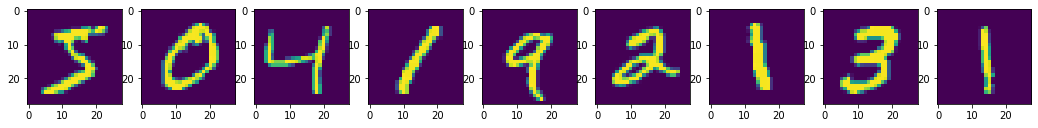

In [57]:
plt.figure(figsize=(18,5))
for i in range(9):
    plt.subplot(191+i)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')
plt.show()

## Buidling Model

In [66]:
width = X_valid.shape[1]
height = X_valid.shape[2]
color_channel = 1

class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        
        self.encoder = tf.keras.Sequential([
            keras.layers.Dense(width * height, activation='relu'),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(32, activation='relu'),])
        
        self.decoder = tf.keras.Sequential([
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(width * height, activation='sigmoid'),])
        
    def call(self, x):
        x_reshape = self.flatten(x)
        x = self.encoder(x_reshape)
        x = self.decoder(x)
        return x, x_reshape
    
def loss(x, x_bar):
    return tf.losses.mean_squared_error(x, x_bar)

def grad(model, inputs):
    with tf.GradientTape() as tape:
        reconstruction, inputs_reshaped = model(inputs)
        loss_value = loss(inputs_reshaped, reconstruction)
    return loss_value, tape.gradient(loss_value, model.trainable_variables), inputs_reshaped, reconstruction

In [82]:
model = AutoEncoder()

optimizer = tf.optimizers.Adam(learning_rate=0.1)
global_step = tf.Variable(0)

num_epochs = 5
batch_size = 4

for epoch in range(num_epochs):
    print("Epoch: ", epoch)
    for x in range(0, len(X_train), batch_size):
        x_inp = X_train[x : x + batch_size]
        loss_value, grads, inputs_reshaped, reconstruction = grad(model, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)
        
        if global_step.numpy() % 200 == 0:
            print("Step: {},         Loss: {}".format(global_step.numpy(), loss(inputs_reshaped, reconstruction).numpy()))
        

Epoch:  0
Step: 0,         Loss: [7541.505  8569.496  4895.4194 4822.8794]
Step: 0,         Loss: [ 6356.569   7940.6543  5071.898  10110.983 ]
Step: 0,         Loss: [2938.3264 5849.8164 8089.597  3756.8445]
Step: 0,         Loss: [9966.358  7635.0776 3173.7092 6978.561 ]
Step: 0,         Loss: [6594.0396 7285.324  3317.6519 4707.967 ]
Step: 0,         Loss: [9707.871  9886.634  3987.968  4600.1875]
Step: 0,         Loss: [ 5870.406  11549.395   3424.5166 13427.905 ]
Step: 0,         Loss: [12046.755   4217.731   6787.038   9232.0625]
Step: 0,         Loss: [ 4435.042  5705.541 10499.43   4224.561]
Step: 0,         Loss: [ 9206.993  10579.508   5891.9146  7398.288 ]
Step: 0,         Loss: [3767.8457 7714.8633 3226.703  4772.235 ]
Step: 0,         Loss: [4398.7983 6561.097  5897.717  6423.509 ]
Step: 0,         Loss: [ 4357.954  9202.321  4827.787 13119.771]
Step: 0,         Loss: [7748.712 4199.482 6326.551 8949.053]
Step: 0,         Loss: [12095.916   5330.9834  9945.389   4714.546 ]

Step: 0,         Loss: [4733.2056 4869.5293 3498.0945 6241.2397]
Step: 0,         Loss: [10040.768   6831.514   7077.1035  4683.1235]
Step: 0,         Loss: [4592.528 8339.03  3399.903 5933.117]
Step: 0,         Loss: [ 9004.512   5184.4414  4176.5664 10308.517 ]
Step: 0,         Loss: [ 7120.811  7986.265  4919.394 11675.263]
Step: 0,         Loss: [7893.3994 9022.426  7579.0996 3991.8813]
Step: 0,         Loss: [ 8625.697  6834.454 12329.55   6915.519]
Step: 0,         Loss: [12713.107   6847.921   5899.8076  5186.9707]
Step: 0,         Loss: [7798.8813 4399.537  6654.777  5042.0728]
Step: 0,         Loss: [ 4304.3276  5975.5894  3171.782  10288.81  ]
Step: 0,         Loss: [ 4274.5664  6092.236  10382.5     4935.9785]
Step: 0,         Loss: [8887.589  7697.7856 6670.431  6215.848 ]
Step: 0,         Loss: [10385.313   7501.186   6350.764   8012.0854]
Step: 0,         Loss: [ 5783.3813  4289.0776 11110.227   7855.0215]
Step: 0,         Loss: [5790.7974 8696.683  3364.246  8070.1035]
S

Step: 0,         Loss: [ 7187.116   5723.866  10699.382   7771.1978]
Step: 0,         Loss: [3858.7476 6457.0396 7489.5396 6918.426 ]
Step: 0,         Loss: [6795.3433 2550.111  9891.589  7994.768 ]
Step: 0,         Loss: [6801.8735 5638.366  2961.5764 3202.8877]
Step: 0,         Loss: [5112.334  4976.898  7273.4453 4066.4158]
Step: 0,         Loss: [ 8194.732   7035.005  13693.51    2449.3074]
Step: 0,         Loss: [7331.792  6898.1724 4003.4426 5871.315 ]
Step: 0,         Loss: [6885.348  3843.1313 6593.634  6013.0215]
Step: 0,         Loss: [11788.176   7945.4185  5265.469   7950.094 ]
Step: 0,         Loss: [4109.05   7836.662  4225.1606 9855.349 ]
Step: 0,         Loss: [9965.45   5917.1377 6641.6978 4169.1235]
Step: 0,         Loss: [4015.019  5622.111  5874.7295 6188.102 ]
Step: 0,         Loss: [4829.4883 4798.871  5066.1313 5267.8076]
Step: 0,         Loss: [3449.695  6092.3315 6952.8965 5047.773 ]
Step: 0,         Loss: [5788.0317 2668.7805 5691.496  8860.905 ]
Step: 0,     

Step: 0,         Loss: [6281.1235 6445.9517 7085.242  7349.8086]
Step: 0,         Loss: [3287.7053 5053.3022 6867.6606 4066.8086]
Step: 0,         Loss: [ 3892.5408  6526.139  13477.3545  6872.393 ]
Step: 0,         Loss: [5234.223  5018.7144 4373.9194 5290.9834]
Step: 0,         Loss: [9708.2   4472.912 9970.12  6465.121]
Step: 0,         Loss: [8023.375  7690.5    3821.3813 8713.813 ]
Step: 0,         Loss: [ 6192.4795  5715.3213 10163.751   7250.402 ]
Step: 0,         Loss: [ 7207.1045  7507.663   4974.281  10990.887 ]
Step: 0,         Loss: [ 4326.6914  4164.1187 10076.429   4851.3203]
Step: 0,         Loss: [ 3711.621   5085.3774 11027.003   4919.459 ]
Step: 0,         Loss: [6642.5215 9380.145  7267.6694 9816.858 ]
Step: 0,         Loss: [ 5379.6084  4797.296  11892.139   6219.875 ]
Step: 0,         Loss: [7056.969  7330.8306 7608.121  7157.2935]
Step: 0,         Loss: [6160.6978 6991.2485 4903.3213 6414.3306]
Step: 0,         Loss: [9255.7705 4576.5103 7004.4556 7734.9146]
Step:

Step: 0,         Loss: [ 4206.0728  8675.525   5910.908  10193.843 ]
Step: 0,         Loss: [ 6392.972 10789.328  5130.156  9159.651]
Step: 0,         Loss: [ 7894.074  8959.06   5067.788 10926.181]
Step: 0,         Loss: [ 5784.5903 13052.13    3928.1914 12922.6   ]
Step: 0,         Loss: [ 5498.592 15934.922  5579.283 15893.592]
Step: 0,         Loss: [ 5867.902  10002.33    7962.723   3827.3086]
Step: 0,         Loss: [12357.57   9122.326  2985.301  8536.493]
Step: 0,         Loss: [7423.408 6913.912 8607.18  8244.846]
Step: 0,         Loss: [4655.199 8440.666 5265.163 6599.394]
Step: 0,         Loss: [8302.343  8262.675  7911.6367 5751.7334]
Step: 0,         Loss: [10751.986  10312.717   7403.6694  3504.5344]
Step: 0,         Loss: [10147.541  9986.317  7958.742  8316.882]
Step: 0,         Loss: [3580.8584 8143.8545 3303.8508 9213.667 ]
Step: 0,         Loss: [9559.129  8973.6875 4857.334  5790.7383]
Step: 0,         Loss: [5441.5625 8567.817  9347.324  6662.8545]
Step: 0,         

Step: 0,         Loss: [3143.347  9530.528  4060.1519 7886.89  ]
Step: 0,         Loss: [8285.466  9667.629  6666.6567 4731.656 ]
Step: 0,         Loss: [3335.282 9256.005 7903.158 8499.184]
Step: 0,         Loss: [ 9654.834  6843.788 12940.313  9849.982]
Step: 0,         Loss: [3419.3674 8066.7017 6868.537  7037.6694]
Step: 0,         Loss: [ 7361.8496 11353.929   8439.988   7389.231 ]
Step: 0,         Loss: [ 5022.7285  8461.914  12490.526   5251.12  ]
Step: 0,         Loss: [ 9323.525   9836.767   9643.388  10244.5625]
Step: 0,         Loss: [4213.704  7134.3403 4981.6836 5799.3354]
Step: 0,         Loss: [11463.395   9717.809   3386.9937  5962.546 ]
Step: 0,         Loss: [ 4373.166 11834.325 13444.617  4233.742]
Step: 0,         Loss: [4997.9707 7895.3306 4953.5356 9404.454 ]
Step: 0,         Loss: [3881.7576 9557.0205 5821.8813 7927.3228]
Step: 0,         Loss: [7640.031  5854.5024 4583.2373 8592.838 ]
Step: 0,         Loss: [5195.735 6149.815 5740.621 8074.847]
Step: 0,         

Step: 0,         Loss: [6443.2256 6029.1313 9533.24   6341.8965]
Step: 0,         Loss: [ 6553.0933  4492.45   11091.264   5451.879 ]
Step: 0,         Loss: [ 4107.0664  5391.402  12040.904   7428.898 ]
Step: 0,         Loss: [5853.837  7169.1006 8004.384  5255.4897]
Step: 0,         Loss: [5618.541  6551.63   3641.338  4739.8994]
Step: 0,         Loss: [6850.0063 5663.5015 5973.064  3744.968 ]
Step: 0,         Loss: [ 3233.6467  7248.8267 16840.639   7190.11  ]
Step: 0,         Loss: [ 5889.3506  6758.4526 10088.8125  3998.7231]
Step: 0,         Loss: [7891.0522 4359.5254 5076.1963 7833.9883]
Step: 0,         Loss: [4927.732  7425.421  7946.5815 6227.4224]
Step: 0,         Loss: [2300.9592 4968.1543 3894.032  6388.5903]
Step: 0,         Loss: [6190.2285 5688.5024 6705.1274 5830.4517]
Step: 0,         Loss: [9772.254  5738.5767 2506.5906 9074.065 ]
Step: 0,         Loss: [2941.4846 8830.741  5144.4683 8154.541 ]
Step: 0,         Loss: [3269.1646 7206.9004 7490.0664 6022.8047]
Step: 0, 

Step: 0,         Loss: [2419.1199 2931.2935 7721.852  7645.686 ]
Step: 0,         Loss: [8970.661  8847.028  7335.6963 7752.4478]
Step: 0,         Loss: [ 3546.519   9253.034   3416.4746 12458.8   ]
Step: 0,         Loss: [ 3209.0166  6522.2285  7470.264  14641.221 ]
Step: 0,         Loss: [ 5485.4453 10858.695   8791.501   7926.015 ]
Step: 0,         Loss: [11172.651   7949.44   12000.33    8076.6924]
Step: 0,         Loss: [10043.253   8107.6416  6401.6353 10653.274 ]
Step: 0,         Loss: [ 5681.1694  4325.4297  8790.383  10709.93  ]
Step: 0,         Loss: [ 5489.741   6568.0244  2978.546  10942.935 ]
Step: 0,         Loss: [ 4457.166   8255.951  11752.474   5358.5537]
Step: 0,         Loss: [9363.271  6164.857  4909.0103 8476.466 ]
Step: 0,         Loss: [5616.12   7831.75   6856.6416 4791.7847]
Step: 0,         Loss: [4169.1694 8778.816  6144.13   9887.911 ]
Step: 0,         Loss: [ 5667.1274 10219.658   7861.561  11623.496 ]
Step: 0,         Loss: [ 4923.3394  3724.1812  8358.25

Step: 0,         Loss: [4801.4653 4328.6416 7327.819  6717.63  ]
Step: 0,         Loss: [6213.005  4905.594  6305.8403 4553.783 ]
Step: 0,         Loss: [ 7779.12   6796.212 10333.661 11653.738]
Step: 0,         Loss: [6235.6416 7246.602  4801.0347 8746.459 ]
Step: 0,         Loss: [ 3155.9312  9568.117   8100.1914 13456.125 ]
Step: 0,         Loss: [ 4518.1914  7092.0293  7069.0396 10213.73  ]
Step: 0,         Loss: [5169.027  6445.148  4569.6597 6483.8203]
Step: 0,         Loss: [7069.102  7138.6274 5076.973  8460.73  ]
Step: 0,         Loss: [6868.027  4559.0957 7015.667  6701.352 ]
Step: 0,         Loss: [4564.2617 6009.3203 8003.508  6352.0435]
Step: 0,         Loss: [ 4829.1265 10806.553   3042.6736 10690.73  ]
Step: 0,         Loss: [5900.2617 5020.6787 6329.9414 9483.712 ]
Step: 0,         Loss: [2376.0076 3657.514  4717.2603 7890.371 ]
Step: 0,         Loss: [ 8474.549 10884.949  5643.074  9687.624]
Step: 0,         Loss: [6200.25   7950.995  3894.18   5171.3687]
Step: 0,     

Step: 0,         Loss: [6025.906  9534.43   4045.1428 4511.6035]
Step: 0,         Loss: [ 6573.842  10818.613   5545.8076  7091.5996]
Step: 0,         Loss: [3817.805  9164.078  9836.663  7711.4644]
Step: 0,         Loss: [6416.7983 5964.7026 6707.9185 6317.995 ]
Step: 0,         Loss: [ 9586.305 14591.097  4808.472 14958.953]
Step: 0,         Loss: [ 3959.5945  4052.2754  6763.861  10712.185 ]
Step: 0,         Loss: [ 9847.342   6411.1953 12150.586  10500.734 ]
Step: 0,         Loss: [12297.133  10272.878   8377.688   7143.1504]
Step: 0,         Loss: [6344.0015 9569.957  9564.846  7806.1543]
Step: 0,         Loss: [ 6452.5806 12771.888   9225.029  12156.946 ]
Step: 0,         Loss: [ 6739.0317 10884.284   8368.405   8764.45  ]
Step: 0,         Loss: [ 5217.791  12416.247   7739.5117 11784.161 ]
Step: 0,         Loss: [11526.203  6612.519 10055.562  5785.583]
Step: 0,         Loss: [ 6687.283   8606.211   5456.8403 11002.658 ]
Step: 0,         Loss: [15355.528 10936.018 13783.208  576

Step: 0,         Loss: [ 7310.421 13387.87  13031.118  6318.675]
Step: 0,         Loss: [ 8577.283   4292.2705  3574.2769 11635.08  ]
Step: 0,         Loss: [ 5665.5996  8430.467   7388.0103 11705.67  ]
Step: 0,         Loss: [ 6652.2524 10531.918   7669.607  12890.95  ]
Step: 0,         Loss: [ 4551.12    5445.8125 10473.537   8015.4004]
Step: 0,         Loss: [6872.389 9784.188 4255.439 6956.801]
Step: 0,         Loss: [ 3187.2524  5154.1836  5296.495  10149.567 ]
Step: 0,         Loss: [4944.606  7425.9834 9523.243  8740.345 ]
Step: 0,         Loss: [ 5926.9375  7657.3394  6505.212  11898.816 ]
Step: 0,         Loss: [ 3867.0486  5076.1772  6921.5444 12439.19  ]
Step: 0,         Loss: [9541.722  9459.487  8839.753  7011.2563]
Step: 0,         Loss: [ 4037.6008  8037.4795  5253.389  10703.134 ]
Step: 0,         Loss: [ 5930.8315  5961.936   8060.4746 13131.194 ]
Step: 0,         Loss: [ 3686.6736 10598.99    5759.019   9100.556 ]
Step: 0,         Loss: [5754.0024 6525.6826 7427.235  

Step: 0,         Loss: [4283.8535 8150.3774 6026.8633 5137.8228]
Step: 0,         Loss: [10213.976  8054.046 11413.683  9151.372]
Step: 0,         Loss: [ 7989.027  9364.384 14120.545 10849.197]
Step: 0,         Loss: [6564.2847 8033.7485 7487.296  7311.241 ]
Step: 0,         Loss: [3603.0305 6628.768  3114.8877 8335.27  ]
Step: 0,         Loss: [4217.444 8247.878 9631.433 9732.654]
Step: 0,         Loss: [ 6543.163   5325.5547  2744.6697 12119.466 ]
Step: 0,         Loss: [ 3259.4324 12169.441   6124.0356  7346.991 ]
Step: 0,         Loss: [6124.4297 9274.828  6287.1035 8119.338 ]
Step: 0,         Loss: [7609.6733 8102.508  9552.909  7604.6914]
Step: 0,         Loss: [ 8905.039  9915.604 13465.431  5385.338]
Step: 0,         Loss: [ 3708.4285 10620.7705  5920.7485  6242.7856]
Step: 0,         Loss: [7519.9785 7041.2373 4831.811  7901.6235]
Step: 0,         Loss: [14285.759   7614.2856  8484.0625  7420.7017]
Step: 0,         Loss: [9455.3545 6782.015  3296.6274 8958.922 ]
Step: 0,     

Step: 0,         Loss: [ 8840.838  7309.117  5248.005 11933.008]
Step: 0,         Loss: [ 3490.6226 10037.625   2979.028  11891.826 ]
Step: 0,         Loss: [ 7752.1235  4506.2847  4868.537  12043.276 ]
Step: 0,         Loss: [ 4431.8037 10335.101   8713.004   9019.556 ]
Step: 0,         Loss: [ 7182.4478 11462.266   9602.793  11899.038 ]
Step: 0,         Loss: [ 8075.8867  6212.3086  7755.204  11021.584 ]
Step: 0,         Loss: [ 3919.3928 13136.593   4323.4106  5670.986 ]
Step: 0,         Loss: [ 8837.675  11503.134   3040.6555 12549.236 ]
Step: 0,         Loss: [ 7963.7   10637.971  4577.258  9265.922]
Step: 0,         Loss: [ 7436.3164 10412.824   6699.472   8734.595 ]
Step: 0,         Loss: [ 5386.092  11029.155   2870.8481  7928.5767]
Step: 0,         Loss: [4411.148 9079.94  8354.479 8890.383]
Step: 0,         Loss: [4931.4414 9662.513  6808.473  8460.321 ]
Step: 0,         Loss: [ 5895.5728 10934.18    9480.319  10610.76  ]
Step: 0,         Loss: [ 4832.0317  5096.4565  4968.38

Step: 0,         Loss: [6382.5547 3829.273  4517.667  3935.9055]
Step: 0,         Loss: [7013.255  4066.384  4131.7935 5193.689 ]
Step: 0,         Loss: [7002.546  4318.11   3973.9375 4929.829 ]
Step: 0,         Loss: [12682.977   9219.81    6405.7437  3633.9795]
Step: 0,         Loss: [7150.7183 3452.5396 5879.602  5002.288 ]
Step: 0,         Loss: [8216.745  4444.686  6823.528  5281.5703]
Step: 0,         Loss: [3709.1582 5205.0356 6172.883  6754.6147]
Step: 0,         Loss: [4563.9336 4987.079  6575.866  4324.435 ]
Step: 0,         Loss: [9858.454 2350.435 8821.102 2218.93 ]
Step: 0,         Loss: [2781.7385 4547.9224 6405.9106 5270.917 ]
Step: 0,         Loss: [4496.1772 5404.4873 5979.023  9940.357 ]
Step: 0,         Loss: [8811.08   8385.845  6504.4463 5665.617 ]
Step: 0,         Loss: [10451.82    5895.579   4561.3916  7092.1797]
Step: 0,         Loss: [9580.6455 5279.6787 5320.871  5023.8433]
Step: 0,         Loss: [13721.643   4813.3267  5055.9985  4056.5728]
Step: 0,         

Step: 0,         Loss: [ 5696.117   2624.254  12981.891   4334.3774]
Step: 0,         Loss: [6821.825  6501.3125 5946.292  7299.939 ]
Step: 0,         Loss: [ 4693.1914  6362.2373 12062.611   5013.6504]
Step: 0,         Loss: [4866.0703 6294.1685 6494.102  6480.6914]
Step: 0,         Loss: [6339.694  4739.098  6663.6045 5058.4707]
Step: 0,         Loss: [16003.589   4324.2295  8798.874   2619.9158]
Step: 0,         Loss: [4508.273  3087.2935 3897.0842 2196.8647]
Step: 0,         Loss: [ 5994.889 11284.967  7987.621  7708.519]
Step: 0,         Loss: [ 6842.6367  4073.241  12534.259   4080.2793]
Step: 0,         Loss: [12178.604  4953.94   8576.212  4232.231]
Step: 0,         Loss: [6945.787  5693.5103 6983.515  4652.023 ]
Step: 0,         Loss: [4547.046  5636.7817 5865.167  3122.4656]
Step: 0,         Loss: [12324.361  4781.311 10335.428  3074.963]
Step: 0,         Loss: [7444.825  6012.8955 5824.0347 4734.3955]
Step: 0,         Loss: [5914.8354 3933.7002 7679.3623 1879.3113]
Step: 0, 

Step: 0,         Loss: [2859.9822 6552.482  6967.4517 6958.408 ]
Step: 0,         Loss: [ 2860.32  10375.921  6581.018  5979.633]
Step: 0,         Loss: [3042.1633 6724.009  4397.291  7300.9526]
Step: 0,         Loss: [4265.5996 4788.7383 6932.926  7383.166 ]
Step: 0,         Loss: [3876.43   6533.9985 6579.163  7122.686 ]
Step: 0,         Loss: [9518.945  7152.7524 3744.218  6067.098 ]
Step: 0,         Loss: [ 5546.6694  8612.078  10576.539   6997.306 ]
Step: 0,         Loss: [5548.5205 6612.931  5848.2974 6764.232 ]
Step: 0,         Loss: [5511.1377 6197.842  7275.9272 5991.8213]
Step: 0,         Loss: [ 7395.587   6715.3022 12393.611   7577.0728]
Step: 0,         Loss: [ 6100.717  5608.394 11845.747  6895.538]
Step: 0,         Loss: [10413.754   7841.829   8227.024   7124.4194]
Step: 0,         Loss: [14533.747   8131.931   8743.566   6428.8267]
Step: 0,         Loss: [6192.495  7377.4297 8325.138  9199.495 ]
Step: 0,         Loss: [8520.253 9030.084 3046.602 8366.437]
Step: 0,     

Step: 0,         Loss: [ 6475.815  14196.675   6734.6685 13636.589 ]
Step: 0,         Loss: [7684.518  8204.102  7274.8774 4876.916 ]
Step: 0,         Loss: [ 6524.0127  9247.185   8931.676  10801.634 ]
Step: 0,         Loss: [7423.7793 9045.987  6790.2705 6415.508 ]
Step: 0,         Loss: [10365.01   10538.804  12230.512   6569.8765]
Step: 0,         Loss: [12359.935 10209.204  5092.656 10801.876]
Step: 0,         Loss: [4382.6455 6744.2295 8181.8354 6046.689 ]
Step: 0,         Loss: [ 7087.5215 11336.817   6426.7017  5812.894 ]
Step: 0,         Loss: [5972.051  9496.725  4058.1938 5033.0625]
Step: 0,         Loss: [8016.367  9744.584  7112.7437 7992.7617]
Step: 0,         Loss: [ 2676.422   7211.531   7195.9414 10402.342 ]
Step: 0,         Loss: [5173.579  8077.5127 5729.4517 8066.38  ]
Step: 0,         Loss: [8113.7856 6942.2373 7590.6353 4735.2373]
Step: 0,         Loss: [ 7499.4287 11722.646   9397.308   7552.3506]
Step: 0,         Loss: [7351.241  8866.056  5926.5674 6444.902 ]
S

Step: 0,         Loss: [6462.236  4160.847  6280.412  7320.2666]
Step: 0,         Loss: [ 8500.941   4654.6035 12118.733   5512.6045]
Step: 0,         Loss: [12336.871   7118.2944  7172.3765  7208.9985]
Step: 0,         Loss: [11390.518  6265.352 10539.194  8568.667]
Step: 0,         Loss: [8615.27   5512.5933 5299.283  5972.5854]
Step: 0,         Loss: [3774.9375 4020.1492 7194.5317 9831.329 ]
Step: 0,         Loss: [11936.368   5877.492   6679.709   4224.0767]
Step: 0,         Loss: [8008.3496 9794.826  7001.731  9289.595 ]
Step: 0,         Loss: [7573.69   7079.9287 6606.838  7320.342 ]
Step: 0,         Loss: [3492.1377 6662.8203 4197.1963 5611.884 ]
Step: 0,         Loss: [ 8568.615   4647.199  10421.334   7009.3267]
Step: 0,         Loss: [ 6632.857  6930.176  4792.264 11170.474]
Step: 0,         Loss: [9065.857  6927.5024 4769.134  8808.887 ]
Step: 0,         Loss: [12839.788   6754.699   9542.832   6523.3276]
Step: 0,         Loss: [5946.8813 6846.2144 5699.8687 6183.4897]
Step:

Step: 0,         Loss: [ 4039.958   3290.2449 11472.646   4299.4233]
Step: 0,         Loss: [6158.2104 5463.796  9652.501  3097.8418]
Step: 0,         Loss: [8754.717  3890.1812 3042.8086 6803.658 ]
Step: 0,         Loss: [ 4631.356   5653.542  10391.916   5811.9375]
Step: 0,         Loss: [2322.3215 4845.4424 4046.0728 3370.94  ]
Step: 0,         Loss: [11129.685  16029.259   2137.2551  6448.094 ]
Step: 0,         Loss: [ 9694.133 12453.226  7714.383 11510.801]
Step: 0,         Loss: [ 9320.137 10388.871  8329.332  9230.293]
Step: 0,         Loss: [ 7708.0703  8706.091  10538.039   8501.912 ]
Step: 0,         Loss: [4393.111 8641.514 6919.292 5101.033]
Step: 0,         Loss: [ 3524.139 13366.916  9411.586 10004.976]
Step: 0,         Loss: [3371.2065 7821.342  8418.107  4064.273 ]
Step: 0,         Loss: [6538.792  7516.31   4640.5815 7675.3086]
Step: 0,         Loss: [5627.754  7388.8584 4924.4795 6194.413 ]
Step: 0,         Loss: [ 4433.894 11682.437  5392.606  9731.153]
Step: 0,     

Step: 0,         Loss: [5766.5356 8819.7295 9300.266  6851.166 ]
Step: 0,         Loss: [5076.541  7464.3535 4742.908  4066.5715]
Step: 0,         Loss: [ 2625.5242  5276.5356  9213.445  10573.141 ]
Step: 0,         Loss: [ 8350.092  6790.031 10508.072  9962.639]
Step: 0,         Loss: [5723.4653 5717.7153 6921.393  5114.9795]
Step: 0,         Loss: [4919.6836 7027.834  6483.4194 5853.6084]
Step: 0,         Loss: [ 8159.921   6613.3877 10041.842   6920.7603]
Step: 0,         Loss: [7485.806  4136.6123 6849.61   7621.1724]
Step: 0,         Loss: [9881.597 9393.01  5045.311 5635.759]
Step: 0,         Loss: [ 4840.829   6733.8213  7279.2485 10452.92  ]
Step: 0,         Loss: [ 5027.0903  4130.0063 11235.192   7632.758 ]
Step: 0,         Loss: [12689.171  8471.431  5784.05   7945.05 ]
Step: 0,         Loss: [4137.0703 9176.211  7897.3647 4653.329 ]
Step: 0,         Loss: [3845.4746 9216.047  8974.345  9546.949 ]
Step: 0,         Loss: [ 9943.089 10001.142  5120.421  6129.722]
Step: 0,     

Step: 0,         Loss: [ 2983.2092  8343.946   8223.266  10456.588 ]
Step: 0,         Loss: [11590.676  8443.972  2708.815 11196.162]
Step: 0,         Loss: [ 9766.384   5271.8433  3557.4949 10068.797 ]
Step: 0,         Loss: [ 7034.4746  9757.621  12237.467   7857.6084]
Step: 0,         Loss: [ 6925.5293  8927.898  11173.851   8143.2974]
Step: 0,         Loss: [ 5673.6597  9800.408   2979.153  11199.145 ]
Step: 0,         Loss: [ 5847.7144  9161.232   3889.8315 12416.874 ]
Step: 0,         Loss: [ 4732.0806  4580.7944  4945.8496 11569.316 ]
Step: 0,         Loss: [ 8305.988 11291.227  4381.857  8859.053]
Step: 0,         Loss: [7094.538  9144.843  5523.5117 8797.237 ]
Step: 0,         Loss: [ 2069.7832  7299.6465  4871.1494 11147.95  ]
Step: 0,         Loss: [ 8918.983  9409.416  5506.5   11957.112]
Step: 0,         Loss: [ 7509.921  13102.1455  9928.543   9376.534 ]
Step: 0,         Loss: [ 5718.2856 12121.558   7868.2485  8609.837 ]
Step: 0,         Loss: [ 4030.004  11995.328   503

Step: 0,         Loss: [ 6781.518  11061.982   6953.8545  8554.8545]
Step: 0,         Loss: [4522.962 9159.925 5506.064 9690.108]
Step: 0,         Loss: [10449.968   7211.2373  7700.7817 11380.896 ]
Step: 0,         Loss: [ 5060.2715 12376.274  13003.178   4605.2334]
Step: 0,         Loss: [6413.7817 8579.105  5118.3735 6827.412 ]
Step: 0,         Loss: [3841.028  8970.172  5134.6797 6461.014 ]
Step: 0,         Loss: [ 8889.601   7997.0293 11446.592   9199.542 ]
Step: 0,         Loss: [8074.4097 8679.258  3043.1353 8760.233 ]
Step: 0,         Loss: [12572.938   8873.238   7430.8955  7131.806 ]
Step: 0,         Loss: [ 3290.9834  4603.992   5163.879  11040.505 ]
Step: 0,         Loss: [ 7143.241 11094.232  2739.574 10536.417]
Step: 0,         Loss: [ 3130.4656 10871.024   3933.0728 11417.782 ]
Step: 0,         Loss: [8554.854  5761.9224 7100.6733 9346.132 ]
Step: 0,         Loss: [ 5730.906 10568.653  7043.158  6681.508]
Step: 0,         Loss: [6081.3276 7553.504  9787.633  4109.0205]
S

Step: 0,         Loss: [7954.639  6488.5674 5134.56   8666.18  ]
Step: 0,         Loss: [4710.6504 8582.343  3407.3928 6775.134 ]
Step: 0,         Loss: [7402.219 9242.328 3930.782 8261.134]
Step: 0,         Loss: [6345.074 6143.139 4653.814 4074.125]
Step: 0,         Loss: [3336.3394 8725.214  5216.0854 7684.735 ]
Step: 0,         Loss: [ 6031.1953  8193.449   8059.527  13356.401 ]
Step: 0,         Loss: [12449.464   7843.4526 14860.592   8099.2896]
Step: 0,         Loss: [9124.288  6229.709  7493.4043 3338.8853]
Step: 0,         Loss: [11424.183   5606.6035  9274.472  10036.471 ]
Step: 0,         Loss: [6748.098  7090.467  5960.1313 8233.542 ]
Step: 0,         Loss: [ 9564.063  7264.292 11016.681  7418.14 ]
Step: 0,         Loss: [2433.8623 6479.1123 5974.6914 8401.143 ]
Step: 0,         Loss: [ 4447.3916  4663.893  11422.333   8735.445 ]
Step: 0,         Loss: [ 5468.008  10112.834   5308.6685  5798.4976]
Step: 0,         Loss: [4463.7373 6814.778  7334.5317 6485.9976]
Step: 0,     

Step: 0,         Loss: [ 7527.0767  7372.9106 14181.434   7934.7817]
Step: 0,         Loss: [8679.424 9475.486 5450.523 5507.13 ]
Step: 0,         Loss: [4300.2026 7296.0815 4463.551  3621.3086]
Step: 0,         Loss: [8236.133  8594.309  4983.5806 9719.862 ]
Step: 0,         Loss: [9653.133  7660.3276 5165.9517 9754.589 ]
Step: 0,         Loss: [10491.8125  5101.1147  6075.5586  3442.2397]
Step: 0,         Loss: [7071.7563 5945.412  4005.5688 8901.31  ]
Step: 0,         Loss: [4430.352  3655.1238 7021.5024 5840.903 ]
Step: 0,         Loss: [9856.446  5553.482  5749.9517 5128.992 ]
Step: 0,         Loss: [7425.768  6929.7817 6439.9146 9153.005 ]
Step: 0,         Loss: [2865.2258 5256.3457 9362.392  8586.634 ]
Step: 0,         Loss: [7761.0205 4746.8584 6714.7207 7439.315 ]
Step: 0,         Loss: [9567.882  8982.928  9737.067  7228.0586]
Step: 0,         Loss: [ 4181.6265  6771.5127  4586.1313 10281.85  ]
Step: 0,         Loss: [10567.19    6069.708   7459.31    5036.2666]
Step: 0,     

Step: 0,         Loss: [ 5629.9272 10312.184   7570.311   5052.4375]
Step: 0,         Loss: [5807.8086 9467.122  7529.848  9712.762 ]
Step: 0,         Loss: [ 8463.425 10042.547  7873.598 12451.98 ]
Step: 0,         Loss: [ 6349.0894 11115.694   5630.037   8952.27  ]
Step: 0,         Loss: [ 4781.194  12764.361  12371.842   7727.8916]
Step: 0,         Loss: [ 4473.5444  8827.734   2744.9426 12487.572 ]
Step: 0,         Loss: [ 3118.907  10233.247   5295.973   7216.3086]
Step: 0,         Loss: [3597.741  5031.06   5705.8545 9225.549 ]
Step: 0,         Loss: [ 8447.949   8233.457   5866.2437 11020.787 ]
Step: 0,         Loss: [ 5513.64    5265.223   6540.9897 11212.354 ]
Step: 0,         Loss: [ 5820.893   7692.153   5880.4883 12187.017 ]
Step: 0,         Loss: [ 8105.1226 10747.662  12552.116   5469.6733]
Step: 0,         Loss: [ 6256.9883 11307.922   6036.171   9486.041 ]
Step: 0,         Loss: [ 6148.0166  8298.99    4187.2617 10446.661 ]
Step: 0,         Loss: [13602.039  10005.687  

Step: 0,         Loss: [ 6135.3047  9013.934   3935.5625 10957.556 ]
Step: 0,         Loss: [ 5461.8774  7547.8877  6259.666  13112.747 ]
Step: 0,         Loss: [ 4233.9326 11791.882   4358.7817 12082.668 ]
Step: 0,         Loss: [ 8930.589   8532.892   7337.0317 13765.438 ]
Step: 0,         Loss: [ 4246.189 11710.951  9729.297 14018.747]
Step: 0,         Loss: [ 4994.685  8662.898  3922.222 15953.108]
Step: 0,         Loss: [4329.5547 9462.764  4659.1006 7147.2744]
Step: 0,         Loss: [ 6680.4194 10603.887   7405.5063 10167.984 ]
Step: 0,         Loss: [ 5700.3213 11659.493   4316.969  10099.529 ]
Step: 0,         Loss: [ 9019.632 10541.003  6077.629 11004.395]
Step: 0,         Loss: [ 8076.37   10511.9795  9693.725   7623.245 ]
Step: 0,         Loss: [ 8950.745  13902.2705  6141.842   9051.312 ]
Step: 0,         Loss: [ 9636.017 10610.786  4571.477 10378.25 ]
Step: 0,         Loss: [ 5369.1353  8670.3955  7071.4756 10664.087 ]
Step: 0,         Loss: [2791.3508 7471.88   3716.0254 

Step: 0,         Loss: [10485.325   3273.829   7210.2144  6220.8545]
Step: 0,         Loss: [11114.914   7036.6875  5431.6875  6896.2856]
Step: 0,         Loss: [7391.3315 7199.861  5503.287  6364.857 ]
Step: 0,         Loss: [ 7358.9756 10410.205   7235.3276 12063.317 ]
Step: 0,         Loss: [6277.208  5007.3047 7012.3403 6634.2603]
Step: 0,         Loss: [ 5307.769  4180.492 11845.905 11241.062]
Step: 0,         Loss: [ 5512.7974  7637.893   5532.2207 11272.158 ]
Step: 0,         Loss: [6940.4985 8802.567  4898.6646 6164.906 ]
Step: 0,         Loss: [11279.389   8237.31    6897.1494 14360.346 ]
Step: 0,         Loss: [ 4422.504  7561.981  3138.68  10726.825]
Step: 0,         Loss: [4492.6367 6239.153  2339.792  5826.9272]
Step: 0,         Loss: [ 5638.791 11882.842  9084.455  8157.708]
Step: 0,         Loss: [ 6302.352 10208.018  6373.765 14574.363]
Step: 0,         Loss: [ 8433.482  11746.211   6595.2373  6379.0586]
Step: 0,         Loss: [ 4244.1685 11555.321   7380.2397  8767.825

Step: 0,         Loss: [8852.365  4509.8877 9288.958  7481.8306]
Step: 0,         Loss: [3438.949  5475.6953 5868.2627 3731.2856]
Step: 0,         Loss: [3889.2156 7527.9297 8603.336  8048.713 ]
Step: 0,         Loss: [7219.0474 7464.8174 3281.574  7054.223 ]
Step: 0,         Loss: [5465.565  6806.0996 5721.6006 8381.32  ]
Step: 0,         Loss: [8614.74   4476.1274 2458.449  8564.4795]
Step: 0,         Loss: [4883.406  6603.7983 8417.741  4040.879 ]
Step: 0,         Loss: [ 5613.0127 10527.466   8555.446   8755.726 ]
Step: 0,         Loss: [2660.9885 5670.639  7716.7476 7977.403 ]
Step: 0,         Loss: [5785.425  6890.315  7284.4517 5506.06  ]
Step: 0,         Loss: [3035.157  4314.2563 5945.699  6338.283 ]
Step: 0,         Loss: [8916.333  7011.258  7328.1353 6492.7563]
Step: 0,         Loss: [3870.0752 4365.9297 6428.8994 6434.342 ]
Step: 0,         Loss: [6548.334  6659.031  5541.62   8177.2847]
Step: 0,         Loss: [ 2022.162   5147.0625  2725.991  12924.736 ]
Step: 0,         

Step: 0,         Loss: [5288.2104 6884.4336 8640.476  7920.1597]
Step: 0,         Loss: [4574.472  5640.3457 4407.5166 6988.6567]
Step: 0,         Loss: [3335.0918 5561.9683 3775.7742 3220.2334]
Step: 0,         Loss: [5558.8813 5136.867  8244.601  5591.185 ]
Step: 0,         Loss: [3987.9387 4560.3877 8977.709  8790.607 ]
Step: 0,         Loss: [7256.6147 9166.1875 5230.625  8304.795 ]
Step: 0,         Loss: [ 4405.583 10969.572  7538.75   5012.083]
Step: 0,         Loss: [9482.898  3803.5024 3373.273  5410.0903]
Step: 0,         Loss: [4232.7896 5694.723  5268.0547 5645.8306]
Step: 0,         Loss: [4199.1147 4481.9785 8729.143  4164.425 ]
Step: 0,         Loss: [ 5409.6504  5361.954  14302.126   4257.1963]
Step: 0,         Loss: [ 8929.401   5737.0767 10289.191   5503.212 ]
Step: 0,         Loss: [5822.652  3334.7397 5311.0547 7246.0903]
Step: 0,         Loss: [9208.194  9849.1455 4869.5576 4634.875 ]
Step: 0,         Loss: [2865.3481 6599.791  5632.5815 4944.991 ]
Step: 0,         

Step: 0,         Loss: [ 8320.395  6528.176  6894.325 10819.437]
Step: 0,         Loss: [ 3896.2844 10988.316   4692.1606  7591.189 ]
Step: 0,         Loss: [13565.909   4656.1494  4106.9194  8181.13  ]
Step: 0,         Loss: [10290.17    6739.4565 10844.276   6035.5254]
Step: 0,         Loss: [ 4228.102  10604.35    7458.5728  6585.087 ]
Step: 0,         Loss: [2701.4746 6660.333  4225.5024 6353.7793]
Step: 0,         Loss: [6893.967  9481.778  6782.037  7371.2563]
Step: 0,         Loss: [5134.875  8285.8    8534.083  5392.0317]
Step: 0,         Loss: [7496.5063 5084.014  6271.3394 7629.875 ]
Step: 0,         Loss: [8894.074 9994.58  9599.468 6544.61 ]
Step: 0,         Loss: [4558.893  8695.904  4937.8584 9226.655 ]
Step: 0,         Loss: [4382.9683 4010.3545 3567.9707 7041.2974]
Step: 0,         Loss: [4894.689 8331.678 8568.368 6451.389]
Step: 0,         Loss: [10000.836   4643.8047  2626.208  10197.12  ]
Step: 0,         Loss: [5765.074  6718.7896 5979.908  5393.709 ]
Step: 0,     

Step: 0,         Loss: [ 6262.88    4208.1187 11852.903   5343.6045]
Step: 0,         Loss: [ 4264.64   8405.514 13152.207  9380.467]
Step: 0,         Loss: [4201.3394 8730.875  4911.379  5890.6694]
Step: 0,         Loss: [4819.8813 6378.783  3186.019  4128.9756]
Step: 0,         Loss: [2342.1033 5015.3047 4788.7617 8424.032 ]
Step: 0,         Loss: [ 8228.529  9781.089 11838.059 11800.343]
Step: 0,         Loss: [3961.1965 9338.227  3353.579  8340.799 ]
Step: 0,         Loss: [ 4503.3867  7186.6597 12899.763   7690.666 ]
Step: 0,         Loss: [5477.212 6702.143 8750.4   9433.163]
Step: 0,         Loss: [7184.3584 6232.417  6285.505  8112.254 ]
Step: 0,         Loss: [11097.029   7326.675   6623.3037  7486.2744]
Step: 0,         Loss: [4705.7246 9373.504  4698.6377 6676.5586]
Step: 0,         Loss: [3015.0664 6308.777  3575.7769 4299.921 ]
Step: 0,         Loss: [3468.8445 8050.8457 9600.9795 7051.7793]
Step: 0,         Loss: [9423.788  6256.2207 5031.402  8885.95  ]
Step: 0,         

Step: 0,         Loss: [ 7920.3633 11595.164  11716.51    8432.946 ]
Step: 0,         Loss: [6540.189  4114.064  2612.1926 9894.658 ]
Step: 0,         Loss: [12867.97    6587.1914  9408.501   8651.018 ]
Step: 0,         Loss: [2809.9783 8661.732  5930.3867 6969.254 ]
Step: 0,         Loss: [ 5819.181  11109.582   5667.7974  6597.6377]
Step: 0,         Loss: [4921.625 7953.769 7884.083 8811.699]
Step: 0,         Loss: [ 3293.2168 11182.724   6171.7256 10285.008 ]
Step: 0,         Loss: [10304.833  15180.601   4731.8496  5571.5317]
Step: 0,         Loss: [ 6912.7705  8881.654   5234.4883 10658.134 ]
Step: 0,         Loss: [ 5705.527  7479.449 11448.225  8760.199]
Step: 0,         Loss: [ 5920.3276 10970.417   6676.3228 10020.559 ]
Step: 0,         Loss: [ 2400.6685 11216.17    6281.926   8110.6597]
Step: 0,         Loss: [ 6982.1265 12139.225   5694.7     5010.551 ]
Step: 0,         Loss: [10105.023   6726.936   3178.8853 13207.737 ]
Step: 0,         Loss: [ 9079.6    7267.12  13342.638 

Step: 0,         Loss: [8569.69   6620.2705 8617.617  7378.4233]
Step: 0,         Loss: [6110.311  4122.408  5564.334  7156.4683]
Step: 0,         Loss: [8510.037  9301.995  4368.8174 6736.371 ]
Step: 0,         Loss: [7424.63   5603.074  7568.8164 3032.042 ]
Step: 0,         Loss: [5265.704  7619.1353 4406.4106 7970.4873]
Step: 0,         Loss: [8301.947  7119.4653 8348.612  7443.5996]
Step: 0,         Loss: [5918.1597 7063.663  9297.784  8283.768 ]
Step: 0,         Loss: [ 5166.8047  9516.887  10159.108  10566.874 ]
Step: 0,         Loss: [3111.8125 5869.6797 2659.19   8003.7026]
Step: 0,         Loss: [6287.652  5322.347  2326.0356 7290.7983]
Step: 0,         Loss: [ 4920.6836  6798.338  10535.222   6690.537 ]
Step: 0,         Loss: [7577.2705 6568.538  5231.236  6598.259 ]
Step: 0,         Loss: [7095.356  7118.977  8174.1455 8124.981 ]
Step: 0,         Loss: [8726.572  5936.213  3903.5408 5605.6353]
Step: 0,         Loss: [ 6308.111   5159.9517 10441.99    3998.621 ]
Step: 0,     

Step: 0,         Loss: [ 8996.9795  8555.571   3902.1033 12623.654 ]
Step: 0,         Loss: [5966.4375 6376.598  5983.7983 6187.883 ]
Step: 0,         Loss: [ 9798.9375  4212.842   5958.3174 11032.036 ]
Step: 0,         Loss: [ 5834.4795 11213.819   7045.527   5103.421 ]
Step: 0,         Loss: [ 9259.167  5304.745 11828.134  6519.967]
Step: 0,         Loss: [6731.6694 6055.61   4493.0815 8440.249 ]
Step: 0,         Loss: [5161.1353 5115.371  6562.3765 5428.181 ]
Step: 0,         Loss: [ 3396.644  7551.985  7417.63  10195.039]
Step: 0,         Loss: [ 8045.6045  5053.653   9504.685  10144.543 ]
Step: 0,         Loss: [8582.374  9553.227  4916.5396 7978.758 ]
Step: 0,         Loss: [ 3219.4285 11204.85    8070.939   7384.143 ]
Step: 0,         Loss: [ 5629.5776 15933.78    9382.291  13494.259 ]
Step: 0,         Loss: [7463.6978 8385.37   6056.8994 8240.365 ]
Step: 0,         Loss: [ 3972.5957 12133.909   6049.639   8409.426 ]
Step: 0,         Loss: [ 8363.876  11595.857   3827.1875  5888

Step: 0,         Loss: [11288.366  8394.154  5528.579  7565.541]
Step: 0,         Loss: [10049.15    4751.311   6018.5317  3257.3916]
Step: 0,         Loss: [11304.688   7972.3813 18514.178   6342.9297]
Step: 0,         Loss: [7895.338  4332.366  9917.633  3864.2476]
Step: 0,         Loss: [8434.     5202.842  3956.0024 6116.847 ]
Step: 0,         Loss: [2436.6887 4123.9785 6169.2817 4894.264 ]
Step: 0,         Loss: [5555.64   6285.094  2417.9976 8291.667 ]
Step: 0,         Loss: [7299.186  8009.2246 8031.352  7640.5103]
Step: 0,         Loss: [5830.1646 4737.61   8340.184  4217.5728]
Step: 0,         Loss: [4001.4363 6612.656  4788.2983 7423.9644]
Step: 0,         Loss: [5171.4873 4163.5674 9139.291  5081.7285]
Step: 0,         Loss: [7704.065  2380.1863 3225.3904 2636.1045]
Step: 0,         Loss: [6889.796  5288.829  5909.278  7021.6455]
Step: 0,         Loss: [7622.9834 3644.551  8722.243  4826.254 ]
Step: 0,         Loss: [7795.36   4531.9478 2002.8188 4973.1045]
Step: 0,         

Step: 0,         Loss: [9763.7705 8924.783  8647.02   8269.57  ]
Step: 0,         Loss: [ 6434.217   5888.0483 10255.237   7527.462 ]
Step: 0,         Loss: [6273.134  6599.7397 5515.0767 6314.3584]
Step: 0,         Loss: [11138.629   9348.596   5157.7017  5817.6274]
Step: 0,         Loss: [9952.668  8653.332  7154.273  4616.6187]
Step: 0,         Loss: [3090.7246 9924.52   5955.425  7895.3203]
Step: 0,         Loss: [4712.1084 7269.325  5870.088  8563.838 ]
Step: 0,         Loss: [11480.053   7893.6494  4950.5483  6546.4067]
Step: 0,         Loss: [ 7230.755 10690.912  8433.507  6894.719]
Step: 0,         Loss: [ 8446.955  8352.403  7572.265 10083.475]
Step: 0,         Loss: [4370.403  8059.8306 7706.8403 9943.712 ]
Step: 0,         Loss: [8876.85   5988.009  9262.462  5535.9224]
Step: 0,         Loss: [10301.925   5840.0103  7422.107   9731.912 ]
Step: 0,         Loss: [3224.0344 7675.334  9054.8    7818.3813]
Step: 0,         Loss: [6886.269 5844.421 5455.663 7215.811]
Step: 0,     

Step: 0,         Loss: [7904.736 5797.473 6443.75  6101.492]
Step: 0,         Loss: [5167.45   7447.9526 6648.8174 5170.995 ]
Step: 0,         Loss: [11228.179  5935.087  7597.652 10694.028]
Step: 0,         Loss: [ 7699.617 11928.947  8472.389  7041.3  ]
Step: 0,         Loss: [5434.1416 6556.935  6536.7056 7007.712 ]
Step: 0,         Loss: [ 4195.7817  9321.338   9917.191  10494.083 ]
Step: 0,         Loss: [9864.43  7358.666 6520.634 3737.532]
Step: 0,         Loss: [ 5893.6597  5511.745  11057.808   9017.365 ]
Step: 0,         Loss: [11601.596   7486.5356  6057.4976  6444.9785]
Step: 0,         Loss: [ 6978.222   7536.663  11151.141   3314.3584]
Step: 0,         Loss: [7242.018  9254.474  6437.144  3523.5242]
Step: 0,         Loss: [3270.8367 9793.999  5633.699  7707.811 ]
Step: 0,         Loss: [9994.825  6360.1963 2984.4949 6712.426 ]
Step: 0,         Loss: [6695.2183 8196.392  9764.101  7087.514 ]
Step: 0,         Loss: [4513.042  5518.158  5543.5776 9764.857 ]
Step: 0,         

Step: 0,         Loss: [6125.9233 5040.2974 8550.449  6812.735 ]
Step: 0,         Loss: [5746.7485 4125.894  7081.4194 5551.064 ]
Step: 0,         Loss: [6146.867  7976.732  3396.0854 4210.338 ]
Step: 0,         Loss: [ 9381.203   6576.7627 11113.253   6320.296 ]
Step: 0,         Loss: [11104.287   6377.079   5644.3276  5530.0293]
Step: 0,         Loss: [7812.185  8341.453  6485.2705 6168.292 ]
Step: 0,         Loss: [8617.662  7374.5674 5468.7144 5148.6924]
Step: 0,         Loss: [5315.709 8613.454 6488.426 7608.027]
Step: 0,         Loss: [4143.7397 4938.175  7662.3394 6967.2715]
Step: 0,         Loss: [2521.269 6489.454 8581.18  8583.626]
Step: 0,         Loss: [ 5759.212  6785.296 10226.967  7907.134]
Step: 0,         Loss: [2467.9336 8244.026  4075.0127 9265.676 ]
Step: 0,         Loss: [ 6449.722  6987.06  10357.115  6080.759]
Step: 0,         Loss: [5514.518  4673.4106 7662.9834 7902.038 ]
Step: 0,         Loss: [4443.1377 7990.3765 4602.9785 5255.788 ]
Step: 0,         Loss: [1

Step: 0,         Loss: [ 8325.125  12189.113   5589.311   6257.6963]
Step: 0,         Loss: [ 8380.141  10784.696   3660.8813  6683.231 ]
Step: 0,         Loss: [ 8544.226 10639.216  2517.523 11730.083]
Step: 0,         Loss: [ 9359.362  8671.893 10960.102 10107.578]
Step: 0,         Loss: [ 6086.723  13128.041   4889.0933  5248.2944]
Step: 0,         Loss: [ 4297.329 10723.143  7058.292  5320.166]
Step: 0,         Loss: [ 4335.268  15000.      9920.536   5426.7627]
Step: 0,         Loss: [ 6070.0806 12145.523   9319.355  10736.783 ]
Step: 0,         Loss: [2498.9553 7633.152  4760.819  8650.766 ]
Step: 0,         Loss: [ 4523.439  11906.878   6250.1953  6658.143 ]
Step: 0,         Loss: [ 5666.967 10325.727  8271.076  6697.485]
Step: 0,         Loss: [ 4724.55   12314.597   4770.6235  8157.3174]
Step: 0,         Loss: [7501.348 8470.74  8916.3   7155.991]
Step: 0,         Loss: [ 7867.866 10820.087  6889.366  9834.3  ]
Step: 0,         Loss: [ 7843.825 10992.819  9880.293 12049.44 ]
S

Step: 0,         Loss: [3339.9976 7736.6606 5687.7627 6750.63  ]
Step: 0,         Loss: [8158.189 6661.514 6070.931 4539.732]
Step: 0,         Loss: [7851.5015 6396.4233 9150.409  5802.875 ]
Step: 0,         Loss: [7478.972 8888.926 7209.333 7765.459]
Step: 0,         Loss: [16484.377  10012.504   6580.9194  5695.5474]
Step: 0,         Loss: [6242.675  3982.903  6657.2144 7043.3315]
Step: 0,         Loss: [ 3158.9414  8463.065   5151.8276 12622.671 ]
Step: 0,         Loss: [3483.5867 7277.2983 4840.995  5249.4883]
Step: 0,         Loss: [ 5282.6226 10723.316   4786.94    6347.89  ]
Step: 0,         Loss: [ 6467.7334 12683.021   8550.13    8550.4   ]
Step: 0,         Loss: [8647.632  6863.1685 5927.996  4924.3994]
Step: 0,         Loss: [2884.7769 7388.972  3217.6072 4683.486 ]
Step: 0,         Loss: [ 6220.8853  5755.325  13954.222   5832.617 ]
Step: 0,         Loss: [13897.47    5037.0103 12897.113   7443.4233]
Step: 0,         Loss: [6922.778  9398.089  7209.4463 8463.589 ]
Step: 0, 

Step: 0,         Loss: [ 6702.8726  7956.129   5749.7373 13051.234 ]
Step: 0,         Loss: [2987.6646 9606.121  4601.7744 5640.4517]
Step: 0,         Loss: [ 9077.3545  7936.95    6586.523  11475.337 ]
Step: 0,         Loss: [ 2894.741  6519.723 11774.683 10575.583]
Step: 0,         Loss: [ 8001.2485  6587.8     6593.9526 11988.861 ]
Step: 0,         Loss: [6357.1797 8369.059  5952.12   7242.6924]
Step: 0,         Loss: [4244.5806 8320.44   6199.383  9015.141 ]
Step: 0,         Loss: [8769.367  6027.1787 5159.8813 9828.3   ]
Step: 0,         Loss: [ 7600.5127  4140.9224  4472.746  11935.565 ]
Step: 0,         Loss: [8549.276 9710.816 6010.925 4945.981]
Step: 0,         Loss: [3869.5906 7810.2935 7893.065  8048.2617]
Step: 0,         Loss: [3574.8125 9936.259  8420.747  6515.2437]
Step: 0,         Loss: [5186.222 7750.495 5494.883 6256.485]
Step: 0,         Loss: [5764.7847 5842.639  7423.5537 7731.0664]
Step: 0,         Loss: [4596.4106 4610.1606 4884.7183 6473.7896]
Step: 0,         

Step: 0,         Loss: [ 6767.561   7234.9785 12124.445   4390.121 ]
Step: 0,         Loss: [5947.9463 6609.5474 6102.8267 2701.2195]
Step: 0,         Loss: [ 2239.7168  7529.3164  5714.8853 11099.253 ]
Step: 0,         Loss: [ 6667.5537  3604.3481 10090.971  11147.921 ]
Step: 0,         Loss: [6778.3086 7979.439  6075.264  8231.176 ]
Step: 0,         Loss: [ 9446.276  10476.883   5497.4478  5916.2983]
Step: 0,         Loss: [6590.588  4751.944  7306.1235 4922.324 ]
Step: 0,         Loss: [ 4095.3801  5101.996   8684.204  10618.9375]
Step: 0,         Loss: [ 4292.6646 10660.621   9834.887   8710.325 ]
Step: 0,         Loss: [ 6091.2437  5541.5444  3480.3572 14309.33  ]
Step: 0,         Loss: [ 9190.162   6107.0586  7374.788  12658.671 ]
Step: 0,         Loss: [ 8087.0703 12775.795   6591.2026  6462.246 ]
Step: 0,         Loss: [2029.5243 8236.537  5937.3955 9446.234 ]
Step: 0,         Loss: [ 2919.9106  8582.882   5983.255  13587.81  ]
Step: 0,         Loss: [ 5015.1787  6435.291   588

Step: 0,         Loss: [ 7984.1606  2867.8074 11644.508   3061.954 ]
Step: 0,         Loss: [ 8570.222  14347.718   8072.8726  5803.889 ]
Step: 0,         Loss: [ 6396.531  10543.9375  6056.9604 10159.211 ]
Step: 0,         Loss: [ 9897.113   8881.246   6761.144  13378.6455]
Step: 0,         Loss: [16728.39  12106.378  9292.496  8825.138]
Step: 0,         Loss: [10710.23  12691.516  8474.192  8464.159]
Step: 0,         Loss: [ 8039.681  16919.791   2765.8774  7409.166 ]
Step: 0,         Loss: [10073.408 12985.441  4223.768 11837.93 ]
Step: 0,         Loss: [ 5671.2524 11330.115   5231.2563 13130.336 ]
Step: 0,         Loss: [13479.109  13151.404   5771.5396  9968.246 ]
Step: 0,         Loss: [ 6621.7515 13630.653   6271.079   7637.0396]
Step: 0,         Loss: [ 7077.81   14279.717   4222.1006  7183.232 ]
Step: 0,         Loss: [ 7566.633 11567.01   7235.694 11672.642]
Step: 0,         Loss: [ 6780.379   9756.363   2142.2947 13439.546 ]
Step: 0,         Loss: [ 6653.166  15194.895   481

Step: 0,         Loss: [ 7008.656   7366.6494 11267.213   5741.8022]
Step: 0,         Loss: [2808.6633 9909.282  7672.004  5750.5576]
Step: 0,         Loss: [7105.268  4849.7705 4694.9565 3267.7246]
Step: 0,         Loss: [8026.056  5203.764  7762.2144 8714.977 ]
Step: 0,         Loss: [8603.092  7919.1147 8045.719  7014.421 ]
Step: 0,         Loss: [2216.3394 4863.491  6034.8276 8438.095 ]
Step: 0,         Loss: [ 6283.9556 11925.424   5959.8955  4877.992 ]
Step: 0,         Loss: [6482.3877 7782.4556 6152.4517 9086.233 ]
Step: 0,         Loss: [7187.777  4532.8545 7499.958  7834.792 ]
Step: 0,         Loss: [4904.5483 7810.1978 4060.9617 7106.7207]
Step: 0,         Loss: [5213.325  5940.3086 5562.773  6936.1377]
Step: 0,         Loss: [ 5744.754  13082.237   5385.0483  6988.8086]
Step: 0,         Loss: [12381.056  11455.0625  5563.788   3779.3176]
Step: 0,         Loss: [16580.605   4208.8315  7267.8955  4102.6567]
Step: 0,         Loss: [6103.069  3515.9082 6577.019  4458.556 ]
Step:

Step: 0,         Loss: [6413.574  9081.142  4440.8955 6121.129 ]
Step: 0,         Loss: [ 5611.236  10518.904   7544.8315  7312.463 ]
Step: 0,         Loss: [13483.571  10806.524   6043.7056  7729.4478]
Step: 0,         Loss: [ 2937.528  15725.551   6211.37    4177.0703]
Step: 0,         Loss: [ 4228.717   5093.7026  3713.9656 11515.124 ]
Step: 0,         Loss: [ 3885.7551 10163.558  11994.368   9254.862 ]
Step: 0,         Loss: [4802.2754 8699.013  4553.954  8984.901 ]
Step: 0,         Loss: [ 5840.44   10390.08    6185.042   4584.9834]
Step: 0,         Loss: [ 2572.7615  9986.866   3277.991  11905.868 ]
Step: 0,         Loss: [ 6404.6978 10271.31    6109.9517  7940.9224]
Step: 0,         Loss: [ 7906.0435 15604.088   2818.6736  8458.045 ]
Step: 0,         Loss: [12709.045 11601.591  5307.241  9275.247]
Step: 0,         Loss: [ 7061.569  11383.607   5119.6465  5896.236 ]
Step: 0,         Loss: [ 4320.1353 11372.98    9568.955   8583.942 ]
Step: 0,         Loss: [ 4170.4097  9373.143  

Step: 0,         Loss: [ 3816.3687  9633.217   6793.844  12690.222 ]
Step: 0,         Loss: [ 8675.259   5170.9233 10263.055  11329.303 ]
Step: 0,         Loss: [6598.496  8653.404  6460.9985 5684.6353]
Step: 0,         Loss: [ 5729.379 10507.218  8865.612  6766.985]
Step: 0,         Loss: [ 6189.0713  6837.6724  5280.296  11863.714 ]
Step: 0,         Loss: [ 6025.352   5001.194   7623.6836 10439.474 ]
Step: 0,         Loss: [14558.613  9636.276  3638.504  7428.005]
Step: 0,         Loss: [ 6231.064  10868.9795  9079.732   6563.5127]
Step: 0,         Loss: [8832.1    6822.6455 3017.055  7835.9375]
Step: 0,         Loss: [ 8099.6123  8611.791  13529.393   6236.992 ]
Step: 0,         Loss: [ 8943.743  12504.368   1635.4426 11701.257 ]
Step: 0,         Loss: [ 7528.0576  7097.4272  9164.582  14757.31  ]
Step: 0,         Loss: [2544.2053 8197.08   8876.216  6291.273 ]
Step: 0,         Loss: [ 6317.64   10949.268   9202.336   8176.0713]
Step: 0,         Loss: [3754.3315 8177.107  6411.7256 

Step: 0,         Loss: [4684.676  8647.992  4093.0676 9800.595 ]
Step: 0,         Loss: [4903.6377 7464.75   8506.75   9435.931 ]
Step: 0,         Loss: [7920.686  5545.1543 4758.2817 7629.3203]
Step: 0,         Loss: [ 5427.1123  5521.533   8642.187  10122.111 ]
Step: 0,         Loss: [3004.2678 9816.845  5137.2144 9450.81  ]
Step: 0,         Loss: [ 7821.268  10356.53    8438.25    8135.9424]
Step: 0,         Loss: [7069.9517 8394.678  5958.046  6912.575 ]
Step: 0,         Loss: [2519.565  8524.174  6622.37   7804.2847]
Step: 0,         Loss: [3941.426  5866.009  2631.0562 6547.6265]
Step: 0,         Loss: [7780.6265 6920.9478 5152.765  8687.398 ]
Step: 0,         Loss: [8271.865  7428.0024 6229.4004 7131.783 ]
Step: 0,         Loss: [4967.958  4755.9004 5543.3687 6256.393 ]
Step: 0,         Loss: [ 7273.1353  6078.5903 10114.082   5996.722 ]
Step: 0,         Loss: [7270.458  8353.388  5496.6772 4789.3853]
Step: 0,         Loss: [3541.051 8576.584 9825.486 9127.551]
Step: 0,         

Step: 0,         Loss: [10261.709   6588.0127  6468.5625  3201.7207]
Step: 0,         Loss: [8958.07   3772.0356 7064.7617 7532.56  ]
Step: 0,         Loss: [ 6110.736   6795.5103 13872.007   7247.569 ]
Step: 0,         Loss: [ 8905.133   6437.2383 10070.03    5020.2383]
Step: 0,         Loss: [13910.865  7957.773  9689.115  9628.195]
Step: 0,         Loss: [ 8579.872   4577.7256 14946.593   6590.1724]
Step: 0,         Loss: [ 7151.9106  6916.1265 11251.817   8248.789 ]
Step: 0,         Loss: [ 7470.2705 13973.975   9439.666   5265.8047]
Step: 0,         Loss: [ 7183.14  11100.607  3498.051 13203.029]
Step: 0,         Loss: [ 2463.0305 11826.042   6993.903  10646.908 ]
Step: 0,         Loss: [ 8861.727  9657.264 11498.749 10040.904]
Step: 0,         Loss: [5789.9106 9543.2    7274.4287 5739.0127]
Step: 0,         Loss: [ 7989.416  9663.629  8501.852 14658.986]
Step: 0,         Loss: [ 9831.987 11050.668  8315.81   7732.462]
Step: 0,         Loss: [8267.556  8575.628  4988.139  6335.603

Step: 0,         Loss: [4989.37   5047.4272 5394.773  6028.217 ]
Step: 0,         Loss: [2642.7947 3947.264  4968.0293 6181.027 ]
Step: 0,         Loss: [10246.05    7885.792   3449.7397  3913.9644]
Step: 0,         Loss: [6784.481  5823.44   3862.172  6177.6646]
Step: 0,         Loss: [6017.162  5373.902  5433.4756 5037.1797]
Step: 0,         Loss: [6226.194  5453.1045 3309.9795 3311.4746]
Step: 0,         Loss: [11065.041   7358.856   4058.8445  5656.094 ]
Step: 0,         Loss: [6178.065  3991.3188 2579.9004 5808.5728]
Step: 0,         Loss: [10606.6045  5557.4287  9165.218   6871.4556]
Step: 0,         Loss: [4246.1597 6107.056  3300.157  5206.94  ]
Step: 0,         Loss: [9960.045  5362.4785 5546.969  4771.1123]
Step: 0,         Loss: [9016.409  3736.1697 5263.9287 3951.4795]
Step: 0,         Loss: [4523.6265 5006.4004 8598.4795 5872.727 ]
Step: 0,         Loss: [6221.018  6356.6567 9925.593  3963.7896]
Step: 0,         Loss: [ 4612.018  12850.375   7430.097   5571.9453]
Step: 0, 

Step: 0,         Loss: [ 3584.1187 10374.638   6097.1504 11191.832 ]
Step: 0,         Loss: [11298.148 13408.468 10857.567  9131.412]
Step: 0,         Loss: [ 4805.551  9357.017  6463.519 11364.757]
Step: 0,         Loss: [6021.268  8503.602  6038.6567 8228.642 ]
Step: 0,         Loss: [7957.5776 5627.574  4955.38   9726.526 ]
Step: 0,         Loss: [ 7456.075 10859.48   4211.546  7435.435]
Step: 0,         Loss: [ 7408.435   8488.959   5797.9653 11055.889 ]
Step: 0,         Loss: [ 9015.304   5816.6416  6405.185  13198.362 ]
Step: 0,         Loss: [5023.518 9561.143 6672.829 7472.675]
Step: 0,         Loss: [ 7297.6035 13693.078   6136.394  12803.883 ]
Step: 0,         Loss: [ 3847.3928 12406.017   7238.5293 13478.542 ]
Step: 0,         Loss: [ 8956.836 11604.616  3627.653  9937.176]
Step: 0,         Loss: [ 3942.958 10014.487  4298.394 11378.201]
Step: 0,         Loss: [ 4383.306  10433.1875 10438.743   8654.967 ]
Step: 0,         Loss: [5735.778 7258.163 9682.791 9892.817]
Step: 0, 

Step: 0,         Loss: [ 6850.8994  5785.676  10349.81    5162.9185]
Step: 0,         Loss: [10593.968   7437.1465  7081.5015  6842.375 ]
Step: 0,         Loss: [6147.046  3672.708  4308.2744 3373.968 ]
Step: 0,         Loss: [ 8735.332  5489.936  8572.343 12733.861]
Step: 0,         Loss: [8894.28   6344.6045 5828.342  9412.229 ]
Step: 0,         Loss: [7117.792  9059.787  6712.825  5798.4873]
Step: 0,         Loss: [10353.196 10590.357  9061.49   9961.181]
Step: 0,         Loss: [ 3583.509   7622.7437  4133.7246 10917.084 ]
Step: 0,         Loss: [4307.     5709.2285 4504.6147 9157.501 ]
Step: 0,         Loss: [ 9652.687  5007.663  4861.606 11780.319]
Step: 0,         Loss: [ 5094.653 10955.855  9308.166  9523.045]
Step: 0,         Loss: [10548.371  13473.562   5362.4526 13875.5   ]
Step: 0,         Loss: [11721.045  8683.624 10218.447  9950.708]
Step: 0,         Loss: [ 4555.991   6648.8086  3633.0522 11163.45  ]
Step: 0,         Loss: [5379.963 4353.235 5086.495 8931.593]
Step: 0, 

Step: 0,         Loss: [3391.6926 6588.597  2362.7168 8906.537 ]
Step: 0,         Loss: [5705.541  8776.3545 4792.616  8779.655 ]
Step: 0,         Loss: [9412.166  8653.151  4515.719  7287.4043]
Step: 0,         Loss: [4164.9785 2976.477  3826.6326 3050.0535]
Step: 0,         Loss: [10037.482   5833.0254  8307.674   8018.7485]
Step: 0,         Loss: [4401.89   8699.274  7711.7817 4924.926 ]
Step: 0,         Loss: [7140.1914 3988.0178 5848.0957 7153.6646]
Step: 0,         Loss: [5560.814  6144.64   6416.1045 2410.9949]
Step: 0,         Loss: [ 9567.8     8906.24   11024.385   3534.0625]
Step: 0,         Loss: [4215.7856 2817.3635 6100.4897 3394.2717]
Step: 0,         Loss: [ 6909.7153 11773.096   3157.8865  7301.028 ]
Step: 0,         Loss: [9699.591  7955.643  9375.816  7061.0317]
Step: 0,         Loss: [6475.3037 5817.9976 4709.008  7487.824 ]
Step: 0,         Loss: [5196.283  7041.111  5835.6416 6640.6567]
Step: 0,         Loss: [2908.3113 4180.3125 4025.7014 2172.297 ]
Step: 0,     

Step: 0,         Loss: [5178.8774 3800.6326 2647.69   8451.914 ]
Step: 0,         Loss: [5921.245  5643.0024 7764.681  7514.5713]
Step: 0,         Loss: [6242.347  5286.5244 6683.8535 8654.221 ]
Step: 0,         Loss: [ 7314.527  10741.028   6417.4604  8545.72  ]
Step: 0,         Loss: [ 9310.005   6757.4565 14770.321  10526.392 ]
Step: 0,         Loss: [5732.857  8243.074  5633.8687 5397.898 ]
Step: 0,         Loss: [4469.8867 4693.458  6422.9233 5685.621 ]
Step: 0,         Loss: [11736.712   5710.0127  7139.5317  3701.4312]
Step: 0,         Loss: [3169.8418 7495.065  9140.722  7887.467 ]
Step: 0,         Loss: [ 6017.533  10963.642   7547.111   5728.9414]
Step: 0,         Loss: [ 5054.3994 10686.026   4606.2153 11543.608 ]
Step: 0,         Loss: [ 9793.947  8258.472  9122.851 10135.776]
Step: 0,         Loss: [ 6432.538 10513.313 16349.07   8720.955]
Step: 0,         Loss: [ 6090.9644 10438.264   4881.519   5903.3267]
Step: 0,         Loss: [ 3524.1965 11200.226   6918.9683  3515.947

Step: 0,         Loss: [8263.664  6212.7056 5139.829  6790.6826]
Step: 0,         Loss: [2927.9617 5546.7397 8891.601  8995.263 ]
Step: 0,         Loss: [8338.001  3703.2769 8212.126  8085.736 ]
Step: 0,         Loss: [5578.088  7588.0435 3556.5586 5484.5483]
Step: 0,         Loss: [5113.4224 5072.597  4953.694  7104.9653]
Step: 0,         Loss: [12133.849   5488.037   1359.9783  9617.128 ]
Step: 0,         Loss: [6780.7065 4941.587  6517.259  7240.6123]
Step: 0,         Loss: [3522.1863 7080.148  4046.0867 4450.417 ]
Step: 0,         Loss: [3914.8584 6073.1465 4587.236  7539.4873]
Step: 0,         Loss: [10131.18   7792.769  8567.105  8844.363]
Step: 0,         Loss: [5847.2285 5314.962  7045.8315 9211.884 ]
Step: 0,         Loss: [4446.903  5769.972  6259.3535 7313.883 ]
Step: 0,         Loss: [7219.315  7819.3    7504.5474 4791.38  ]
Step: 0,         Loss: [6453.5254 6357.45   4877.4517 6503.981 ]
Step: 0,         Loss: [7652.472  6043.6313 7468.5576 4744.917 ]
Step: 0,         Loss

Step: 0,         Loss: [ 4653.4106  8072.259   4780.829  13766.618 ]
Step: 0,         Loss: [10750.705  10318.83    2443.2053  9608.891 ]
Step: 0,         Loss: [4739.925  9432.053  2184.805  3954.8394]
Step: 0,         Loss: [ 4738.9414 14915.276  10488.624   6990.4336]
Step: 0,         Loss: [ 6415.162  12056.222   5959.3584 10220.447 ]
Step: 0,         Loss: [12165.222   9662.591   2307.8022  9871.521 ]
Step: 0,         Loss: [ 4952.6875  8196.341   6562.3086 10799.334 ]
Step: 0,         Loss: [10230.333   8700.442   4865.3228  9511.286 ]
Step: 0,         Loss: [ 5305.306 10606.865  6776.658  9892.168]
Step: 0,         Loss: [ 5545.5767 16609.428   9202.28   10975.996 ]
Step: 0,         Loss: [ 7482.5     7527.4004  3688.8228 13019.1   ]
Step: 0,         Loss: [5214.5903 4823.0435 4781.6265 5632.0103]
Step: 0,         Loss: [11059.273   8784.194   5963.713   7201.9424]
Step: 0,         Loss: [9031.392  8711.157  5884.2705 8008.86  ]
Step: 0,         Loss: [ 8268.109  9387.433  8209.

Step: 0,         Loss: [9888.809  9926.093  5704.3994 8004.3047]
Step: 0,         Loss: [10870.317   4287.5244  5261.5     7216.3315]
Step: 0,         Loss: [ 4838.3315  7030.8315  3892.5715 10643.382 ]
Step: 0,         Loss: [ 3757.8164  8576.767   6339.7256 14258.746 ]
Step: 0,         Loss: [12283.459  5762.594  8773.617  8560.487]
Step: 0,         Loss: [ 5357.094   8873.174   4158.2183 10129.556 ]
Step: 0,         Loss: [8080.4375 5601.0254 3539.1772 9032.493 ]
Step: 0,         Loss: [ 5674.1567  8243.358   7857.6772 10168.778 ]
Step: 0,         Loss: [ 6162.7056  9760.65    2520.847  12604.959 ]
Step: 0,         Loss: [ 3684.754   5496.4985  3685.3496 10004.786 ]
Step: 0,         Loss: [ 9774.2    10749.009   3600.634   7857.5166]
Step: 0,         Loss: [2557.81   3961.5522 6273.504  9135.232 ]
Step: 0,         Loss: [ 4028.1262  8163.13   13808.743  11625.222 ]
Step: 0,         Loss: [ 5666.5815  8497.563   5461.6724 10945.043 ]
Step: 0,         Loss: [ 6968.1367  8629.951   277

Step: 0,         Loss: [11185.516  3655.898  7492.477  6663.352]
Step: 0,         Loss: [5832.004  3483.9746 5547.185  6725.584 ]
Step: 0,         Loss: [10369.133   5354.1035  4181.25    3975.2334]
Step: 0,         Loss: [6168.913  6354.519  4360.9653 6206.867 ]
Step: 0,         Loss: [9314.039  4961.2026 3292.8367 7795.117 ]
Step: 0,         Loss: [6428.9478 5856.352  3977.2065 7992.533 ]
Step: 0,         Loss: [6345.61  4838.458 4139.842 3783.676]
Step: 0,         Loss: [4223.426  6405.5254 7689.621  6339.992 ]
Step: 0,         Loss: [ 7735.0117  6266.1006 10527.287   3993.328 ]
Step: 0,         Loss: [8062.9756 3735.2156 7338.3994 6833.9644]
Step: 0,         Loss: [7471.5767 5280.8735 6140.2334 5173.9985]
Step: 0,         Loss: [6600.166  6133.871  3829.139  7181.3047]
Step: 0,         Loss: [7833.2065 7180.0586 6830.6724 7405.0127]
Step: 0,         Loss: [8114.2715 7844.117  8970.431  9475.876 ]
Step: 0,         Loss: [ 7728.533   5583.1313 13483.042   5034.6006]
Step: 0,         

Step: 0,         Loss: [8342.382 8128.63  8235.664 5576.783]
Step: 0,         Loss: [ 5503.94    8479.77    2635.3367 10091.638 ]
Step: 0,         Loss: [3967.7065 7145.199  7571.383  7267.3394]
Step: 0,         Loss: [7413.833  8464.034  3098.5305 7961.981 ]
Step: 0,         Loss: [3482.8508 4228.6787 7688.3867 6531.1772]
Step: 0,         Loss: [7373.394  4128.4336 9918.536  7449.8037]
Step: 0,         Loss: [ 4601.2666 12004.07    7794.288   3684.736 ]
Step: 0,         Loss: [9009.197  8949.926  5628.0117 6746.6772]
Step: 0,         Loss: [10423.214   7623.223   7447.8647  4863.4097]
Step: 0,         Loss: [5466.19   5389.2026 6859.416  6909.3496]
Step: 0,         Loss: [ 6000.3022  4601.1504  3230.1404 10846.088 ]
Step: 0,         Loss: [6157.9746 3701.2856 6237.144  6629.2847]
Step: 0,         Loss: [5094.4297 5131.379  7129.121  6223.3228]
Step: 0,         Loss: [ 5641.6724  5539.848  11006.73    4091.0217]
Step: 0,         Loss: [7908.6567 6791.0063 6778.528  6435.319 ]
Step: 0, 

Step: 0,         Loss: [3941.5103 5054.7285 6472.227  4750.028 ]
Step: 0,         Loss: [8430.398 5269.875 7526.367 9232.988]
Step: 0,         Loss: [ 5202.065   5647.7056  2441.8481 10193.683 ]
Step: 0,         Loss: [10170.896   5514.4067  3454.6504  9545.236 ]
Step: 0,         Loss: [8655.921  8759.874  3395.1135 8546.959 ]
Step: 0,         Loss: [12595.78    8046.2295  2181.4324  8010.2026]
Step: 0,         Loss: [3585.8303 6380.209  3761.676  7549.55  ]
Step: 0,         Loss: [ 5926.2627  6766.8867  4510.87   11685.005 ]
Step: 0,         Loss: [6635.519  3910.4426 5031.602  9667.528 ]
Step: 0,         Loss: [7934.4653 9302.891  8125.959  6110.689 ]
Step: 0,         Loss: [7318.315  6975.425  5449.5903 8479.982 ]
Step: 0,         Loss: [ 6055.8276  6158.102  10527.018   9424.649 ]
Step: 0,         Loss: [5337.958  3438.9236 4902.783  8329.08  ]
Step: 0,         Loss: [4421.019  7390.9795 3416.218  6059.4043]
Step: 0,         Loss: [8500.218  7755.7793 5273.463  7658.704 ]
Step: 0, 

Step: 0,         Loss: [7448.2056 5708.7817 6979.1494 5257.8306]
Step: 0,         Loss: [11297.705   5258.0586  4673.3306  3412.088 ]
Step: 0,         Loss: [6019.879  5418.4375 6071.992  5556.4375]
Step: 0,         Loss: [5240.492  5269.9424 6089.783  3386.3801]
Step: 0,         Loss: [7319.584  3205.07   3744.4695 3632.019 ]
Step: 0,         Loss: [ 7170.4463  3915.704  10884.153   3974.7947]
Step: 0,         Loss: [4676.6494 4380.829  6583.116  2915.866 ]
Step: 0,         Loss: [ 9159.898   6221.7144 13677.918   3849.7742]
Step: 0,         Loss: [ 3626.3445  3272.9248 10863.334   4263.0522]
Step: 0,         Loss: [5406.504  4287.3774 5620.232  5080.4287]
Step: 0,         Loss: [8768.883  4529.5713 7958.383  6889.379 ]
Step: 0,         Loss: [9286.879  2858.2754 8601.183  5827.732 ]
Step: 0,         Loss: [6233.944  4802.1367 3623.3176 4724.0293]
Step: 0,         Loss: [5571.3276 3026.9082 8251.655  4857.3403]
Step: 0,         Loss: [7716.5933 2923.0803 9861.412  4900.367 ]
Step: 0, 

Step: 0,         Loss: [6491.5317 8167.31   5617.2666 5076.8164]
Step: 0,         Loss: [3576.0715 8826.6875 7072.6963 5678.5806]
Step: 0,         Loss: [9209.608  3658.1033 5868.116  4257.245 ]
Step: 0,         Loss: [6577.9683 7730.0674 4104.86   9861.222 ]
Step: 0,         Loss: [ 5131.902  4606.148  8970.332 11625.637]
Step: 0,         Loss: [10915.992   6824.0776  6701.574   5742.594 ]
Step: 0,         Loss: [5896.129  6426.0483 6735.7485 7378.367 ]
Step: 0,         Loss: [6115.245  5880.3633 5916.1416 6975.417 ]
Step: 0,         Loss: [7408.491 5024.504 7560.769 9616.495]
Step: 0,         Loss: [ 5154.258  4188.222  9171.023 10331.217]
Step: 0,         Loss: [7423.6875 6770.1543 9021.0205 4218.777 ]
Step: 0,         Loss: [8090.5063 6495.496  4981.722  6800.    ]
Step: 0,         Loss: [10797.441  10900.06    2431.0664  3644.5166]
Step: 0,         Loss: [3634.4846 8848.974  3552.741  6324.084 ]
Step: 0,         Loss: [5586.1978 7331.1826 2863.5996 2316.7832]
Step: 0,         Loss

Step: 0,         Loss: [6568.0854 7771.235  8739.132  6351.153 ]
Step: 0,         Loss: [ 8813.375   8686.763   3955.4731 10780.339 ]
Step: 0,         Loss: [3840.7717 9021.632  3355.4846 6791.4336]
Step: 0,         Loss: [3923.5383 9537.493  7826.2974 4281.916 ]
Step: 0,         Loss: [7090.3267 8064.884  6343.4897 7239.023 ]
Step: 0,         Loss: [5621.5396 9643.375  7624.7207 8750.142 ]
Step: 0,         Loss: [3647.5435 8739.058  5976.967  7243.6772]
Step: 0,         Loss: [3240.6365 7286.185  7653.514  4483.5483]
Step: 0,         Loss: [6707.0625 7245.213  6227.015  8426.9   ]
Step: 0,         Loss: [6082.708 7384.084 8420.139 8766.725]
Step: 0,         Loss: [5338.537 7145.314 3016.662 6324.421]
Step: 0,         Loss: [10827.3545  8822.507   6240.3076  6274.5728]
Step: 0,         Loss: [6706.6123 7102.0522 7392.0103 7230.967 ]
Step: 0,         Loss: [8041.992  6762.2153 7386.972  7522.644 ]
Step: 0,         Loss: [8963.241  9067.805  8261.286  4393.1772]
Step: 0,         Loss: [7

Step: 0,         Loss: [4618.8867 9644.69   5733.235  5092.416 ]
Step: 0,         Loss: [5644.2065 8006.8403 5155.699  6089.4326]
Step: 0,         Loss: [7587.883  7445.7817 6788.5254 7417.3394]
Step: 0,         Loss: [11865.303  15918.304   3194.458   8020.9297]
Step: 0,         Loss: [ 4004.4272 14069.704   7568.097  12415.596 ]
Step: 0,         Loss: [13439.241  10953.88    4450.8765  9465.221 ]
Step: 0,         Loss: [6268.939 9915.529 6040.491 9774.167]
Step: 0,         Loss: [ 5707.759 12280.037  3481.866  8493.121]
Step: 0,         Loss: [ 4884.523  12801.141   2647.5063  7473.791 ]
Step: 0,         Loss: [ 7396.496  13864.137   5974.652  11342.3125]
Step: 0,         Loss: [7869.6187 8187.9746 5327.8022 5848.1597]
Step: 0,         Loss: [ 8053.6826 11912.773   3262.2488  9096.76  ]
Step: 0,         Loss: [ 2868.9387 12130.579  10800.6875  9401.578 ]
Step: 0,         Loss: [ 3595.5217 13096.543   5672.652   6954.0713]
Step: 0,         Loss: [10208.2705 11994.521   5390.4526 12724

Step: 0,         Loss: [3805.4976 6709.9517 9436.499  3641.81  ]
Step: 0,         Loss: [4109.9106 7085.7563 9779.026  7310.324 ]
Step: 0,         Loss: [6437.792  6786.12   6299.2563 6372.0015]
Step: 0,         Loss: [10124.477   6612.2856  6326.87    5990.3774]
Step: 0,         Loss: [6807.347  5323.3955 4374.357  3217.583 ]
Step: 0,         Loss: [4081.7397 6521.3633 6487.4414 8052.371 ]
Step: 0,         Loss: [6173.163  7327.265  2702.213  7833.4424]
Step: 0,         Loss: [6150.9565 7351.663  8609.841  3922.1875]
Step: 0,         Loss: [11215.832   7146.2153  4082.5356  8185.0317]
Step: 0,         Loss: [6575.1694 7443.3506 4018.9976 8232.803 ]
Step: 0,         Loss: [ 5437.8496  6743.8457 13113.479   6276.6724]
Step: 0,         Loss: [5167.879 5978.913 8192.104 8401.607]
Step: 0,         Loss: [ 4835.8687  4565.219  11959.28    3107.5574]
Step: 0,         Loss: [6672.694  5634.913  7197.102  3734.8113]
Step: 0,         Loss: [7068.9146 7032.3022 4430.403  3996.6633]
Step: 0,     

Step: 0,         Loss: [ 5399.1494  8042.366   8274.666  10142.113 ]
Step: 0,         Loss: [ 4253.958  10909.708   8100.602   5456.7144]
Step: 0,         Loss: [8943.613  6986.6274 7085.722  3663.3445]
Step: 0,         Loss: [6230.283  7634.7666 7594.2437 5181.857 ]
Step: 0,         Loss: [7327.176  9180.337  6731.9526 5873.9424]
Step: 0,         Loss: [7819.152  4401.7026 3764.551  7937.594 ]
Step: 0,         Loss: [3067.1467 8702.084  3432.787  6700.735 ]
Step: 0,         Loss: [ 5260.611   6565.588  10803.345   3729.6135]
Step: 0,         Loss: [5790.908 9609.789 9307.187 9131.018]
Step: 0,         Loss: [6666.258 2890.079 9505.343 8349.757]
Step: 0,         Loss: [4045.69   5245.027  2275.7156 7124.7476]
Step: 0,         Loss: [9168.316  7669.6733 2844.5764 7615.787 ]
Step: 0,         Loss: [10603.083  3870.852  9490.463  8342.273]
Step: 0,         Loss: [ 8510.47   10375.328   3857.2195  5886.338 ]
Step: 0,         Loss: [4651.675  3902.2283 7018.6226 9691.879 ]
Step: 0,         

Step: 0,         Loss: [ 5804.7627  6873.4424  9265.918  10255.329 ]
Step: 0,         Loss: [ 5663.0166 11029.736   4189.156  10656.8   ]
Step: 0,         Loss: [ 9205.828   5387.462   6857.1646 11150.799 ]
Step: 0,         Loss: [10920.929   4947.992   4947.2817  9393.891 ]
Step: 0,         Loss: [5132.2944 4866.2295 5507.625  5700.4976]
Step: 0,         Loss: [8360.396  7598.258  8811.579  7149.3203]
Step: 0,         Loss: [ 6244.842   7724.8506  9141.946  10452.253 ]
Step: 0,         Loss: [ 4765.6978  9787.875   7680.356  11884.351 ]
Step: 0,         Loss: [ 6740.0894  9988.392  10474.297   8964.355 ]
Step: 0,         Loss: [8025.8867 6249.8633 6447.2153 5995.3506]
Step: 0,         Loss: [6225.181 8482.014 8357.095 9199.472]
Step: 0,         Loss: [ 8330.521 11055.773  9542.928  6567.242]
Step: 0,         Loss: [7523.2144 8809.971  5717.4272 9308.258 ]
Step: 0,         Loss: [7590.7437 6556.288  3096.116  8011.019 ]
Step: 0,         Loss: [5670.5806 9694.58   3621.0024 7493.6494]
S

Step: 0,         Loss: [ 9352.736  13150.933   6572.2026  4951.005 ]
Step: 0,         Loss: [ 7504.6597 12667.764   3192.8315  9482.725 ]
Step: 0,         Loss: [2817.0498 7461.755  4246.134  8801.928 ]
Step: 0,         Loss: [8802.616  9664.075  5735.4883 9494.865 ]
Step: 0,         Loss: [ 6620.1978 11578.616   9499.546   4195.4644]
Step: 0,         Loss: [ 8104.4375 11486.6     5082.5015  5740.0444]
Step: 0,         Loss: [11720.56  12034.007  9568.303 11489.543]
Step: 0,         Loss: [4419.37   7859.4883 2542.991  6963.7334]
Step: 0,         Loss: [4346.7256 9542.899  4745.426  9260.305 ]
Step: 0,         Loss: [ 7781.579  10449.708   4655.6274  6230.6646]
Step: 0,         Loss: [ 5934.449 13814.454 11281.622  4031.731]
Step: 0,         Loss: [ 5690.015  13743.23    2893.1226 10919.078 ]
Step: 0,         Loss: [ 7392.644  9975.47   5243.666 10607.618]
Step: 0,         Loss: [ 4497.0713 10102.938   5697.7183 10042.7705]
Step: 0,         Loss: [ 8813.02  10489.192  7621.842  7656.33

Step: 0,         Loss: [12125.891  9798.492  5083.281  9551.365]
Step: 0,         Loss: [6895.7476 5499.2295 5624.5903 3672.227 ]
Step: 0,         Loss: [8801.025  8202.704  4016.9438 7359.3647]
Step: 0,         Loss: [8823.141  8653.196  4369.8125 5759.008 ]
Step: 0,         Loss: [3679.287  8456.999  3257.4897 4001.537 ]
Step: 0,         Loss: [6827.167  7616.9644 2771.4197 5180.889 ]
Step: 0,         Loss: [12213.604  11169.341   4186.9336 10516.801 ]
Step: 0,         Loss: [5244.2207 9992.15   2929.7104 7008.546 ]
Step: 0,         Loss: [10833.226   3340.9553  2914.9949  7459.7476]
Step: 0,         Loss: [ 5460.848   6109.8315 11602.146   8115.3774]
Step: 0,         Loss: [8985.803  3741.8086 8697.896  6676.2974]
Step: 0,         Loss: [3319.6685 8703.53   2623.7856 8327.429 ]
Step: 0,         Loss: [8029.8813 7245.495  9255.258  5773.925 ]
Step: 0,         Loss: [5790.367  7344.4517 9750.653  7876.9326]
Step: 0,         Loss: [ 6324.018  10215.629   4554.6724  8194.472 ]
Step: 0, 

Step: 0,         Loss: [ 4623.7563  6645.7754  4990.1035 10094.913 ]
Step: 0,         Loss: [14241.607  8003.156  5900.62   6027.973]
Step: 0,         Loss: [3746.917 9978.841 9102.829 9519.034]
Step: 0,         Loss: [8106.2153 7338.6543 8355.722  7428.2   ]
Step: 0,         Loss: [ 4779.8394  9885.075   4967.9746 10345.225 ]
Step: 0,         Loss: [ 1523.9235 10650.387   9482.957   6230.663 ]
Step: 0,         Loss: [11057.889   9821.379   5165.2896  5838.9453]
Step: 0,         Loss: [ 5204.6963  9944.805   8435.946  10336.043 ]
Step: 0,         Loss: [14130.371   7457.4683  6660.231  10130.778 ]
Step: 0,         Loss: [10580.188  11671.446   6135.1265  8451.529 ]
Step: 0,         Loss: [ 6912.5347 11987.067   7623.9272  8557.559 ]
Step: 0,         Loss: [8175.242 9472.805 8491.18  7105.736]
Step: 0,         Loss: [3741.4668 9640.979  7103.212  6317.8174]
Step: 0,         Loss: [ 2891.3074 12260.06    7120.0996 10686.197 ]
Step: 0,         Loss: [ 7198.0293 10067.405  10383.336   4453

Step: 0,         Loss: [6437.8726 4829.1606 8829.639  3035.3687]
Step: 0,         Loss: [ 8712.072   3901.7014 10204.94    7505.546 ]
Step: 0,         Loss: [ 7471.4653  3977.6404 10594.773   6587.0903]
Step: 0,         Loss: [4234.523  5627.143  7925.6045 6522.3916]
Step: 0,         Loss: [7405.1875 4754.227  9615.852  6302.9463]
Step: 0,         Loss: [10598.315   5033.041   6691.421   3972.0574]
Step: 0,         Loss: [9095.33   4498.9224 3228.5728 5046.806 ]
Step: 0,         Loss: [ 3095.4795  4974.9194 10237.287   5745.5015]
Step: 0,         Loss: [5660.2017 2703.074  7686.4517 4618.06  ]
Step: 0,         Loss: [6147.9463 3814.9565 4504.719  4705.954 ]
Step: 0,         Loss: [ 6027.75    4087.4731 10805.545   2366.5254]
Step: 0,         Loss: [7952.5483 7272.824  3301.5906 6881.7627]
Step: 0,         Loss: [7894.065  7101.7285 4094.6582 5298.0024]
Step: 0,         Loss: [5638.213  5632.033  7054.2515 4460.985 ]
Step: 0,         Loss: [7026.0713 5611.629  5664.235  5121.319 ]
Step:

Step: 0,         Loss: [6262.5854 7032.8164 6535.834  4479.0435]
Step: 0,         Loss: [10617.584 10054.645  8289.904  6926.926]
Step: 0,         Loss: [3464.412  9927.453  2946.5356 8716.5205]
Step: 0,         Loss: [8481.018  3722.3188 4709.3535 4677.913 ]
Step: 0,         Loss: [5754.2627 5579.6797 6644.967  5284.8877]
Step: 0,         Loss: [5126.1353 3868.1238 9910.317  8794.6875]
Step: 0,         Loss: [ 5105.7715  9997.259  14364.417   4967.361 ]
Step: 0,         Loss: [8170.3545 5019.6416 5531.5244 7193.883 ]
Step: 0,         Loss: [8975.201 9916.209 7144.444 9221.422]
Step: 0,         Loss: [4146.061  4717.6772 4980.1787 8887.846 ]
Step: 0,         Loss: [3214.815  4482.393  5710.9985 6705.671 ]
Step: 0,         Loss: [10026.958   9707.972   4783.1133  9238.175 ]
Step: 0,         Loss: [6048.1133 7598.7983 5168.8267 6986.4834]
Step: 0,         Loss: [ 2859.1519 10793.324   2991.1863  5688.8877]
Step: 0,         Loss: [4146.607  8895.02   7332.14   4494.5317]
Step: 0,         

Step: 0,         Loss: [2996.9695 7999.0664 7160.2373 7983.5537]
Step: 0,         Loss: [4507.4424 6249.1567 6421.4556 4137.222 ]
Step: 0,         Loss: [3986.7014 8062.962  3093.093  7710.9233]
Step: 0,         Loss: [5318.3774 7564.8076 5283.259  8387.139 ]
Step: 0,         Loss: [7381.7026 6159.268  5836.5815 7046.1187]
Step: 0,         Loss: [ 2435.2449  5735.1924  5311.375  11497.148 ]
Step: 0,         Loss: [7794.028  6594.6367 4123.406  8287.883 ]
Step: 0,         Loss: [6403.3965 9166.7705 7663.7485 6597.8867]
Step: 0,         Loss: [2969.662  8806.747  4399.9937 8607.997 ]
Step: 0,         Loss: [8998.181  6542.3203 5605.6367 9973.826 ]
Step: 0,         Loss: [10425.431   4974.9707  4170.8315 10441.03  ]
Step: 0,         Loss: [ 6738.5815  7889.4556 11399.0205  8130.3853]
Step: 0,         Loss: [10341.941   8369.079   7486.3022  5235.8955]
Step: 0,         Loss: [ 4960.1465  4728.241   3850.009  15710.005 ]
Step: 0,         Loss: [ 4553.6606  5564.1914  5589.4683 10107.824 ]
S

Step: 0,         Loss: [5075.883  8741.829  7396.621  2747.0166]
Step: 0,         Loss: [8303.575  6244.592  5597.889  5267.4556]
Step: 0,         Loss: [11080.855   5216.6455  6311.1226  5399.4375]
Step: 0,         Loss: [ 5403.366   4770.0894 18800.451   8345.617 ]
Step: 0,         Loss: [8160.6924 8312.62   5151.288  3516.5063]
Step: 0,         Loss: [9285.99   8421.056  3957.5996 4790.329 ]
Step: 0,         Loss: [9415.922  5455.2944 7025.2896 6642.8647]
Step: 0,         Loss: [4107.143  3880.5728 4819.759  7499.004 ]
Step: 0,         Loss: [5224.629  5436.9272 5023.1543 3548.579 ]
Step: 0,         Loss: [3442.2666 3626.4514 5770.7026 5287.9756]
Step: 0,         Loss: [ 3122.4514  5000.5483  4208.2256 12912.916 ]
Step: 0,         Loss: [9483.918  5672.347  7250.4556 5002.8545]
Step: 0,         Loss: [8374.352  8221.776  9911.176  3709.7002]
Step: 0,         Loss: [6546.867  5625.634  2531.6455 5187.344 ]
Step: 0,         Loss: [7289.4287 3586.0664 6165.1646 5550.7485]
Step: 0,     

Step: 0,         Loss: [6605.735  4986.0293 8505.736  6000.0244]
Step: 0,         Loss: [ 4732.86    5959.2524 10178.332   5971.9375]
Step: 0,         Loss: [5958.121 5589.028 8503.858 6782.742]
Step: 0,         Loss: [6535.6465 8131.3545 5206.4463 8399.821 ]
Step: 0,         Loss: [ 5812.939  6727.306 10714.648  4278.087]
Step: 0,         Loss: [2959.3354 4330.098  8077.689  3986.5305]
Step: 0,         Loss: [5477.62   2660.912  4914.9883 5077.8877]
Step: 0,         Loss: [10734.729   2881.6404  5340.2104  4695.754 ]
Step: 0,         Loss: [4359.61   8741.03   8203.533  6128.0347]
Step: 0,         Loss: [8939.913  5695.245  8496.164  6637.9644]
Step: 0,         Loss: [9144.8955 4038.6008 6823.186  4041.5076]
Step: 0,         Loss: [4470.2256 3606.8687 5195.3076 6887.8276]
Step: 0,         Loss: [ 9559.222   4001.504   6671.2246 12664.977 ]
Step: 0,         Loss: [ 7068.9976  6841.1606  6390.949  14525.566 ]
Step: 0,         Loss: [ 7647.8545 10943.137   9646.837   7667.454 ]
Step: 0, 

Step: 0,         Loss: [ 8748.464   3458.0906  7334.8315 12526.813 ]
Step: 0,         Loss: [ 6174.2144 12497.48    7107.2056 10488.292 ]
Step: 0,         Loss: [ 2732.0344  5189.735   2670.4949 10148.028 ]
Step: 0,         Loss: [4534.167  9595.859  8137.0215 3743.2883]
Step: 0,         Loss: [ 2621.9272 12321.374   8190.3545  5282.7705]
Step: 0,         Loss: [9815.483  9855.225  4997.8354 8435.846 ]
Step: 0,         Loss: [9551.621 5335.765 8534.075 8451.104]
Step: 0,         Loss: [4185.663  9240.229  5182.5127 9466.649 ]
Step: 0,         Loss: [ 8758.212   9205.407   3040.0242 11356.513 ]
Step: 0,         Loss: [ 7540.0713 12968.045  11157.199   9120.24  ]
Step: 0,         Loss: [ 6572.4897  7993.6826 12073.503   8885.149 ]
Step: 0,         Loss: [ 4438.185   7402.163   5979.1543 11780.437 ]
Step: 0,         Loss: [ 8795.167  8906.013  8517.909 10017.979]
Step: 0,         Loss: [6254.015  5737.9194 7894.348  7221.3037]
Step: 0,         Loss: [ 6854.791  11668.299   6308.4985 10737

Step: 0,         Loss: [ 9007.937   8479.166   6039.709  12320.3125]
Step: 0,         Loss: [ 6543.4336 10499.408   2181.9375  7610.969 ]
Step: 0,         Loss: [ 6462.156  12081.283  10516.786   7120.7476]
Step: 0,         Loss: [ 6772.9526  9432.672   7084.3994 12435.146 ]
Step: 0,         Loss: [ 9256.609   8253.349   8838.363  11421.9795]
Step: 0,         Loss: [4539.8228 8316.775  6751.6787 8992.841 ]
Step: 0,         Loss: [10363.725  11289.842   5180.2246  9618.648 ]
Step: 0,         Loss: [ 9110.009  10120.667   7764.268  10561.3545]
Step: 0,         Loss: [13332.694   7809.3267  5532.663   9532.084 ]
Step: 0,         Loss: [6386.5444 8412.597  2659.0854 7728.8433]
Step: 0,         Loss: [4976.273 9947.297 6483.87  9485.174]
Step: 0,         Loss: [ 7756.944  13555.55    7718.8203 10278.526 ]
Step: 0,         Loss: [2782.3481 9738.587  7247.5957 9981.374 ]
Step: 0,         Loss: [ 4119.958 12932.225  6531.842 14029.763]
Step: 0,         Loss: [ 6251.6646  4993.0474 10324.326   

Step: 0,         Loss: [8359.532 8223.53  7572.167 8336.692]
Step: 0,         Loss: [11811.141   5583.1353 10111.12   11467.666 ]
Step: 0,         Loss: [6861.9937 8991.685  3517.8137 6012.265 ]
Step: 0,         Loss: [ 4572.4976  4145.3965  8391.53   11000.361 ]
Step: 0,         Loss: [8652.709  8863.197  6107.2935 6055.8174]
Step: 0,         Loss: [5990.3774 6087.4043 2903.0842 5814.7017]
Step: 0,         Loss: [ 6574.1367  9750.387  11397.07    8917.747 ]
Step: 0,         Loss: [ 4307.0576  9561.671   7353.38   11618.7705]
Step: 0,         Loss: [11097.328   7788.6836  4958.436   7290.5664]
Step: 0,         Loss: [ 6551.389  6879.069 12572.646 10813.237]
Step: 0,         Loss: [14719.286   7090.1377  5595.027   8213.551 ]
Step: 0,         Loss: [ 8695.4    10006.0205  4386.62    6932.515 ]
Step: 0,         Loss: [3841.3801 9815.276  5623.838  9905.575 ]
Step: 0,         Loss: [5302.235  7993.4873 7176.834  6563.269 ]
Step: 0,         Loss: [ 6455.8545  7457.871  10109.315  10860.801

Step: 0,         Loss: [ 2007.8176 11379.654  13558.275  11604.901 ]
Step: 0,         Loss: [ 5476.1685  5059.4185  6696.0127 10385.893 ]
Step: 0,         Loss: [ 6796.009 10133.966  6973.027  8435.524]
Step: 0,         Loss: [ 6911.508   7842.277  13188.6455  7872.152 ]
Step: 0,         Loss: [ 8488.306   6691.2183 10125.385   7270.533 ]
Step: 0,         Loss: [ 7975.6646 10106.751   6302.8022  9728.753 ]
Step: 0,         Loss: [ 3133.8916 13595.167   4963.8877  9402.389 ]
Step: 0,         Loss: [ 8137.4785  7591.9272  2430.0486 11254.47  ]
Step: 0,         Loss: [ 5692.1123  4698.583   6544.4185 12498.803 ]
Step: 0,         Loss: [4681.2715 7181.231  9921.226  6360.6963]
Step: 0,         Loss: [6014.281  6813.338  2875.4387 6996.531 ]
Step: 0,         Loss: [ 5868.7603  6530.106  13094.043   7029.4756]
Step: 0,         Loss: [2422.6313 5585.1353 9365.158  9269.692 ]
Step: 0,         Loss: [ 8918.262  5387.533  5620.838 10435.029]
Step: 0,         Loss: [4729.2666 8372.931  7534.541  

Step: 0,         Loss: [5853.769  6493.8457 6578.9067 8910.086 ]
Step: 0,         Loss: [ 4724.844   8942.464  10450.472   6438.6924]
Step: 0,         Loss: [3830.129  7929.2285 2529.7476 7386.1187]
Step: 0,         Loss: [5035.9883 7413.561  6323.31   6735.2383]
Step: 0,         Loss: [ 8030.689   6323.1187 10327.258   7932.921 ]
Step: 0,         Loss: [3422.8022 4417.1567 2915.5063 3998.921 ]
Step: 0,         Loss: [1463.2168 6556.8735 4045.8508 6743.7104]
Step: 0,         Loss: [3858.445 8357.167 6493.486 5974.723]
Step: 0,         Loss: [ 7624.9272 10674.8     5456.5293  4543.2056]
Step: 0,         Loss: [9690.858  6395.5474 2907.7576 6208.745 ]
Step: 0,         Loss: [6646.1787 5956.7026 3387.8813 7797.8403]
Step: 0,         Loss: [3373.4158 7418.7515 4047.4656 8440.654 ]
Step: 0,         Loss: [5336.1772 9137.654  6384.7666 7093.255 ]
Step: 0,         Loss: [3220.6226 3458.3916 8926.776  6791.9517]
Step: 0,         Loss: [5671.3965 7787.14   7207.2603 5252.8228]
Step: 0,         

Step: 0,         Loss: [10873.138  11114.233   6279.0625  8276.496 ]
Step: 0,         Loss: [5245.4478 4707.0166 5047.5728 9901.471 ]
Step: 0,         Loss: [ 7368.86   4530.814  2290.593 12390.129]
Step: 0,         Loss: [8687.204  8717.524  4956.5483 9153.842 ]
Step: 0,         Loss: [6601.509 8347.444 6742.288 5810.315]
Step: 0,         Loss: [6314.337  5982.1084 2930.458  6611.792 ]
Step: 0,         Loss: [8158.2485 7085.6787 4752.9326 5546.3584]
Step: 0,         Loss: [9097.039 8185.352 4933.347 9502.941]
Step: 0,         Loss: [5786.3125 9673.517  5030.3433 7655.675 ]
Step: 0,         Loss: [6117.906  7574.981  4214.6772 8310.874 ]
Step: 0,         Loss: [5992.962  3511.0293 3223.2014 7052.2944]
Step: 0,         Loss: [ 6013.6597 13834.55    5654.5894  4957.926 ]
Step: 0,         Loss: [1545.1147 6401.2334 3262.7832 6601.712 ]
Step: 0,         Loss: [9707.589  8270.007  5917.8765 8491.072 ]
Step: 0,         Loss: [11012.726  6999.588  4766.844 10257.771]
Step: 0,         Loss: [9

Step: 0,         Loss: [ 9434.247  3457.333 10584.878  4143.634]
Step: 0,         Loss: [2666.4795 5895.607  7151.375  4175.3877]
Step: 0,         Loss: [3444.6238 2053.4106 5620.1416 6132.912 ]
Step: 0,         Loss: [11901.7     6674.967   7255.473   3305.7334]
Step: 0,         Loss: [10898.571   6550.936  10564.493   5634.9287]
Step: 0,         Loss: [5337.2754 4536.176  4442.8765 5394.3174]
Step: 0,         Loss: [2703.2908 4779.8037 2901.9106 5683.939 ]
Step: 0,         Loss: [5932.504 3403.481 8827.208 4305.334]
Step: 0,         Loss: [5383.2183 5292.7334 6608.1045 4840.7705]
Step: 0,         Loss: [3149.5562 4136.393  6508.973  2787.588 ]
Step: 0,         Loss: [6200.719  2989.18   5495.75   3400.2373]
Step: 0,         Loss: [7922.019  4098.223  4862.95   3856.5728]
Step: 0,         Loss: [5881.736  3409.157  6887.3535 4090.2678]
Step: 0,         Loss: [7049.5903 2461.0115 7646.8203 3966.0676]
Step: 0,         Loss: [5858.7793 3802.4834 7896.5728 4220.4985]
Step: 0,         Loss

Step: 0,         Loss: [ 7042.338   8318.967   7038.0664 11172.793 ]
Step: 0,         Loss: [ 5005.106 11045.56   5967.222 13086.672]
Step: 0,         Loss: [5821.9067 8981.599  7785.505  8930.079 ]
Step: 0,         Loss: [3511.3967 5845.2207 8752.747  8610.983 ]
Step: 0,         Loss: [7530.508  8210.26   6531.292  3639.2883]
Step: 0,         Loss: [ 5720.9683 10147.091   7560.39   10241.363 ]
Step: 0,         Loss: [ 5362.      9715.804   5527.0767 13478.395 ]
Step: 0,         Loss: [ 3946.7717 14957.301   6670.306   5439.954 ]
Step: 0,         Loss: [8101.936  6347.0815 6315.31   6864.337 ]
Step: 0,         Loss: [4727.616  5898.1963 5891.0703 3905.764 ]
Step: 0,         Loss: [4080.055 6245.86  2625.004 9931.609]
Step: 0,         Loss: [ 5237.69    6214.4106  4652.3394 13255.018 ]
Step: 0,         Loss: [ 8546.617 10195.192  7847.231 10609.613]
Step: 0,         Loss: [8434.392 8827.19  9251.633 9940.076]
Step: 0,         Loss: [ 5337.5703 10912.431   3857.894   6261.0063]
Step: 0, 

Step: 0,         Loss: [12899.718 10698.512  4415.916  7990.995]
Step: 0,         Loss: [ 6738.63    7917.598   2432.9758 11482.526 ]
Step: 0,         Loss: [6484.4653 9983.513  3092.56   7863.8735]
Step: 0,         Loss: [ 7150.8    12452.25    3981.0764 11945.31  ]
Step: 0,         Loss: [ 9362.48    9504.347   7465.0576 13924.914 ]
Step: 0,         Loss: [ 7303.783 13147.913  3639.542  5308.722]
Step: 0,         Loss: [ 6739.347   9907.375  10423.183   4259.2246]
Step: 0,         Loss: [ 4477.8276 11643.441   3198.4656 10587.565 ]
Step: 0,         Loss: [7058.1465 9029.921  6797.125  7611.3047]
Step: 0,         Loss: [ 4981.565 10330.801  6976.883  7976.449]
Step: 0,         Loss: [ 3848.106 10802.466  6019.056  5582.383]
Step: 0,         Loss: [ 8309.999 13212.753  4223.648 11176.303]
Step: 0,         Loss: [4326.7563 8414.183  4856.259  8392.167 ]
Step: 0,         Loss: [ 6407.0547  8619.121  12935.315   7664.5293]
Step: 0,         Loss: [17203.85    9700.308   3285.5996 10061.441

Step: 0,         Loss: [3195.7678 3004.2449 6026.0015 7516.3765]
Step: 0,         Loss: [4158.611  6819.574  4342.5444 7668.781 ]
Step: 0,         Loss: [ 7842.199   6857.7397 10025.622   6828.0215]
Step: 0,         Loss: [ 8674.85   12039.933   7427.8647  7878.3086]
Step: 0,         Loss: [13631.102   7292.2295 10709.596   4308.981 ]
Step: 0,         Loss: [3601.6123 7895.8    3392.579  8685.558 ]
Step: 0,         Loss: [ 7267.069 10492.115  9530.681  3277.773]
Step: 0,         Loss: [4619.472  5545.709  5276.8955 5980.3076]
Step: 0,         Loss: [2818.8635 7692.133  5420.9644 7373.356 ]
Step: 0,         Loss: [4626.12  8607.938 6859.458 7801.379]
Step: 0,         Loss: [ 3972.6147  6365.038  12962.737   4420.7603]
Step: 0,         Loss: [3470.1914 7784.2285 4912.462  6893.7705]
Step: 0,         Loss: [ 8159.7065  7294.056   8455.124  13081.887 ]
Step: 0,         Loss: [7087.2256 5802.6597 2541.801  8996.696 ]
Step: 0,         Loss: [ 6933.9756 10086.774   4271.9106  8312.933 ]
Step:

Step: 0,         Loss: [5350.371  4813.4424 7080.3354 6580.366 ]
Step: 0,         Loss: [6461.527  4026.5715 8932.638  9004.666 ]
Step: 0,         Loss: [ 7558.2485 10994.741  16183.162   5332.0674]
Step: 0,         Loss: [3164.4746 2853.2488 4988.425  6369.0996]
Step: 0,         Loss: [6133.25   6795.6187 6972.3496 9340.73  ]
Step: 0,         Loss: [ 2694.1365  5677.4526 11614.238   6550.519 ]
Step: 0,         Loss: [7988.056  5152.1377 4313.3403 9441.291 ]
Step: 0,         Loss: [ 4684.792 11001.587  7494.046  5812.459]
Step: 0,         Loss: [11420.754   6070.788   5975.1353  5938.2935]
Step: 0,         Loss: [5494.106  6721.4272 4183.4336 4924.36  ]
Step: 0,         Loss: [3503.6582 9150.868  8207.954  7614.1084]
Step: 0,         Loss: [6425.143  7893.0537 2648.199  9310.17  ]
Step: 0,         Loss: [5799.9067 6615.1733 7867.5996 6154.7627]
Step: 0,         Loss: [8247.462  7265.5674 9565.834  3936.5486]
Step: 0,         Loss: [8574.183  4103.3037 6823.241  8071.598 ]
Step: 0,     

Step: 0,         Loss: [10141.324  7753.223  7965.523  5545.412]
Step: 0,         Loss: [9969.604  6191.004  5054.3403 7954.8535]
Step: 0,         Loss: [4608.6606 6474.0957 9589.2705 5154.972 ]
Step: 0,         Loss: [7520.542 6126.486 5442.533 7339.45 ]
Step: 0,         Loss: [6511.084  9598.887  2680.7986 5047.3774]
Step: 0,         Loss: [3858.972  3311.75   2073.1875 7863.292 ]
Step: 0,         Loss: [12052.029  8523.671  9894.775  5652.833]
Step: 0,         Loss: [ 3745.588 10770.161  9048.545  5906.55 ]
Step: 0,         Loss: [6125.741  5407.0957 8924.521  7630.0933]
Step: 0,         Loss: [4850.597  4963.3623 4641.469  4134.3022]
Step: 0,         Loss: [8659.6    5145.4897 7110.268  9556.773 ]
Step: 0,         Loss: [4165.1963 6713.5483 4625.4287 4958.3867]
Step: 0,         Loss: [4670.367  9082.128  3751.2065 9472.195 ]
Step: 0,         Loss: [7242.0024 8597.591  5949.2246 5655.2334]
Step: 0,         Loss: [11464.657   4302.62    6980.1606  4363.515 ]
Step: 0,         Loss: [5

Step: 0,         Loss: [4756.6606 5081.8203 6240.8687 6500.0474]
Step: 0,         Loss: [ 6860.325   8022.3647 13842.712   6903.278 ]
Step: 0,         Loss: [7250.6133 6466.1045 5943.768  3905.1008]
Step: 0,         Loss: [6094.537  5847.204  5953.541  4024.0981]
Step: 0,         Loss: [6609.4424 6698.5576 6184.9834 6991.6235]
Step: 0,         Loss: [ 8594.172  11425.033   5444.935   2500.8303]
Step: 0,         Loss: [10403.9795  7586.158   7587.6543 13528.262 ]
Step: 0,         Loss: [10511.694   5245.1953  2766.8125  5137.7847]
Step: 0,         Loss: [4885.459  9014.639  6507.4336 5474.88  ]
Step: 0,         Loss: [4671.969  6823.6147 9887.934  4224.3267]
Step: 0,         Loss: [ 5041.037  12104.916   5496.014   4235.3994]
Step: 0,         Loss: [ 8061.9565  6047.2397  4035.315  11290.412 ]
Step: 0,         Loss: [ 6750.7856 11672.44    7082.949   5572.171 ]
Step: 0,         Loss: [6547.1274 7755.1455 7961.8354 5215.2817]
Step: 0,         Loss: [ 9488.917  12325.159  13754.676   3707

Step: 0,         Loss: [10055.812  9597.913  6074.258  9253.504]
Step: 0,         Loss: [5226.3774 7763.44   8052.133  7265.097 ]
Step: 0,         Loss: [6973.4707 9061.2    5313.727  6048.417 ]
Step: 0,         Loss: [7449.5244 6713.4106 7937.2485 8626.767 ]
Step: 0,         Loss: [3713.9375 3523.6938 7216.408  3409.468 ]
Step: 0,         Loss: [6345.5356 5652.5117 9606.711  5690.9272]
Step: 0,         Loss: [5615.9556 4546.8315 8603.996  4982.584 ]
Step: 0,         Loss: [4900.815  3769.2576 4944.5537 5352.8403]
Step: 0,         Loss: [5463.301  3395.1274 5333.819  3935.472 ]
Step: 0,         Loss: [6709.152 4899.217 5228.977 6523.825]
Step: 0,         Loss: [4163.491  5877.1504 5125.107  7183.6187]
Step: 0,         Loss: [7950.732  4468.9224 6691.435  3220.731 ]
Step: 0,         Loss: [5456.231 8343.925 5990.31  5564.421]
Step: 0,         Loss: [6763.9463 5146.913  4394.7617 7845.9185]
Step: 0,         Loss: [5977.352  6184.7183 8737.017  4733.496 ]
Step: 0,         Loss: [7651.231 

Step: 0,         Loss: [ 5579.6465  5139.402  10263.175   2420.5498]
Step: 0,         Loss: [4776.4653 5750.333  4917.2285 6298.769 ]
Step: 0,         Loss: [4854.199  3714.047  7617.6045 5073.515 ]
Step: 0,         Loss: [ 4584.838   3163.5764 15182.638   5843.0576]
Step: 0,         Loss: [9490.584  3896.653  6760.223  4455.4463]
Step: 0,         Loss: [5118.4097 6092.6606 3824.2832 4446.796 ]
Step: 0,         Loss: [9621.329  3264.8992 6503.3535 2300.6824]
Step: 0,         Loss: [7219.6646 4611.7847 6567.0547 3463.8342]
Step: 0,         Loss: [10122.551   3042.7437  5141.958   5367.8735]
Step: 0,         Loss: [3870.5293 4382.588  8511.503  3630.0103]
Step: 0,         Loss: [11583.238   5401.472   7768.7485  4687.519 ]
Step: 0,         Loss: [5226.9004 3671.4604 5127.1416 7865.492 ]
Step: 0,         Loss: [7472.8633 3790.2334 5630.2485 6106.153 ]
Step: 0,         Loss: [ 4288.504   3358.6785 10655.53    5469.2104]
Step: 0,         Loss: [5005.5537 6069.1416 4357.824  4194.81  ]
Step:

Step: 0,         Loss: [5979.9746 8448.401  7080.9526 6204.462 ]
Step: 0,         Loss: [ 6974.8022  8015.005   8524.584  10599.685 ]
Step: 0,         Loss: [5259.264  4320.9937 2950.879  8738.885 ]
Step: 0,         Loss: [ 5808.1353 11752.806   5731.519   6125.8535]
Step: 0,         Loss: [2378.352  9636.7295 3013.1633 6556.676 ]
Step: 0,         Loss: [7147.906  5568.5    7468.4746 8693.775 ]
Step: 0,         Loss: [12955.51   5060.88   8287.464 10181.99 ]
Step: 0,         Loss: [ 7482.6646  4116.3457  6263.8647 12164.13  ]
Step: 0,         Loss: [8793.6455 8812.453  7430.098  6191.1367]
Step: 0,         Loss: [5634.6724 7908.5703 5233.7334 7703.963 ]
Step: 0,         Loss: [ 7565.879   8095.3535 11990.524   9128.453 ]
Step: 0,         Loss: [4923.8584 4947.844  3346.5764 4296.3457]
Step: 0,         Loss: [8836.422  7155.6235 7529.199  6563.963 ]
Step: 0,         Loss: [4017.2373 7152.7705 5493.814  3780.5063]
Step: 0,         Loss: [8924.299  7077.166  5198.7983 6779.038 ]
Step: 0, 

Step: 0,         Loss: [11363.2295  9040.681   7116.62   10619.841 ]
Step: 0,         Loss: [2924.1812 8545.666  3969.2998 7043.727 ]
Step: 0,         Loss: [4199.8203 4755.435  4589.2476 6809.408 ]
Step: 0,         Loss: [ 4535.342  8943.163 10695.101  7588.64 ]
Step: 0,         Loss: [ 6839.7285  8785.368  11585.505   6335.7373]
Step: 0,         Loss: [6266.0996 8321.274  6167.893  5236.5254]
Step: 0,         Loss: [ 5377.1084 11467.508   9572.9     8484.049 ]
Step: 0,         Loss: [4428.4565 5909.602  9062.699  6848.5625]
Step: 0,         Loss: [2984.532  7592.5063 9079.407  5531.065 ]
Step: 0,         Loss: [9076.016 5943.148 7843.491 5987.005]
Step: 0,         Loss: [3435.801  7109.5547 2266.8826 9477.5625]
Step: 0,         Loss: [6108.4424 8385.871  8160.3687 8262.093 ]
Step: 0,         Loss: [11966.396   7756.9272  4789.1465  9794.784 ]
Step: 0,         Loss: [6017.394  8888.7295 5869.379  5476.265 ]
Step: 0,         Loss: [4928.746  7652.7744 6939.3203 7015.508 ]
Step: 0,     

Step: 0,         Loss: [4012.519 8611.101 8318.297 8258.229]
Step: 0,         Loss: [ 5812.5024 11231.028   7442.2256  9926.838 ]
Step: 0,         Loss: [6006.8867 9983.249  4157.426  8819.083 ]
Step: 0,         Loss: [4216.884  7449.4707 5009.824  9247.779 ]
Step: 0,         Loss: [7432.633  6762.5586 5366.564  7315.625 ]
Step: 0,         Loss: [ 9239.482  12067.2     8167.7754  4892.64  ]
Step: 0,         Loss: [ 7165.268   8828.058   6088.2144 10216.663 ]
Step: 0,         Loss: [ 2846.042   9774.493  11695.379   5461.1597]
Step: 0,         Loss: [11140.232   8291.138   5186.171   7891.0396]
Step: 0,         Loss: [6679.0024 7647.265  3819.949  6845.787 ]
Step: 0,         Loss: [7761.189  3817.625  5747.1924 6091.344 ]
Step: 0,         Loss: [12380.935   9483.276   7671.5215  5449.273 ]
Step: 0,         Loss: [11220.276  5152.653  6934.403 11292.267]
Step: 0,         Loss: [ 6623.6724  8565.793  15760.963   5369.3203]
Step: 0,         Loss: [ 8801.461  10389.584   7467.6084  7963.876

Step: 0,         Loss: [ 7671.3916 10559.505   2963.5242  8004.592 ]
Step: 0,         Loss: [ 6702.4146 14031.175   8037.259  15085.039 ]
Step: 0,         Loss: [ 4798.5767  5243.643   3221.1519 10691.504 ]
Step: 0,         Loss: [5392.6978 8735.12   8493.549  7841.9897]
Step: 0,         Loss: [ 2741.4644 11474.666   5788.175  10241.167 ]
Step: 0,         Loss: [ 8939.142 12729.333  2882.672 10251.887]
Step: 0,         Loss: [ 6008.152   5206.7144 11238.096  16843.373 ]
Step: 0,         Loss: [ 5901.2334  4589.565   5286.87   11773.3   ]
Step: 0,         Loss: [8699.654  6913.0933 6747.3076 7639.9375]
Step: 0,         Loss: [ 4837.6836 11846.6045  5069.875   9777.913 ]
Step: 0,         Loss: [11317.75   7382.106  2662.606  9479.376]
Step: 0,         Loss: [6184.633  4739.1274 7748.393  5337.686 ]
Step: 0,         Loss: [ 6959.662   9619.871   6456.6465 11977.858 ]
Step: 0,         Loss: [10377.328  4986.12   5140.015  9866.966]
Step: 0,         Loss: [9385.81   7460.8086 5607.181  8053

Step: 0,         Loss: [ 2761.2717  8794.642   7917.1924 12469.008 ]
Step: 0,         Loss: [11300.845   9254.425   7058.2383  7644.986 ]
Step: 0,         Loss: [3001.9312 6435.2437 7650.708  7805.686 ]
Step: 0,         Loss: [9701.208  6465.7383 7110.7295 9789.737 ]
Step: 0,         Loss: [6840.531  4960.1006 6677.6597 8422.174 ]
Step: 0,         Loss: [7566.181  8702.475  8673.567  5218.3267]
Step: 0,         Loss: [4767.311  8050.5347 6822.2744 3569.379 ]
Step: 0,         Loss: [5400.1455 7568.031  8685.388  7140.148 ]
Step: 0,         Loss: [5539.1504 7707.893  2865.1863 7427.8623]
Step: 0,         Loss: [4228.561  8155.406  5870.0703 8451.6455]
Step: 0,         Loss: [ 4020.172  10590.48    9645.447   7996.8647]
Step: 0,         Loss: [ 5469.4883 11377.472   8000.041   8427.58  ]
Step: 0,         Loss: [ 5690.5103 10795.148   6368.8623 14824.849 ]
Step: 0,         Loss: [ 9347.866 10393.065  3487.93   5524.337]
Step: 0,         Loss: [ 7598.7207 10695.389   5095.9424  7926.4478]
S

Step: 0,         Loss: [ 8093.3    11067.17    7115.4604  5531.8496]
Step: 0,         Loss: [ 8446.49   12147.833   3710.6748 10075.732 ]
Step: 0,         Loss: [ 8151.1646 10668.672   7277.814  10896.72  ]
Step: 0,         Loss: [ 4780.379  10560.655   5364.5015  7125.972 ]
Step: 0,         Loss: [ 6959.6494 12452.166   6047.5767  9803.479 ]
Step: 0,         Loss: [3250.8533 7943.996  6310.773  6058.9414]
Step: 0,         Loss: [ 7956.2515 12224.953   7236.2715  9278.909 ]
Step: 0,         Loss: [ 3554.7769  7483.356   8413.5    10085.621 ]
Step: 0,         Loss: [ 5040.015  14471.008   4504.7437  9410.374 ]
Step: 0,         Loss: [3355.9783 7112.8994 5698.722  4854.116 ]
Step: 0,         Loss: [8743.94  8090.133 6078.736 8759.241]
Step: 0,         Loss: [ 4038.398 10723.329  7576.36   4864.515]
Step: 0,         Loss: [3009.088  9760.751  1731.8278 7064.6416]
Step: 0,         Loss: [ 4121.8965  8775.622  10705.621   6258.2944]
Step: 0,         Loss: [8582.771  4292.8267 5601.1685 5015

Step: 0,         Loss: [2282.398  4448.6045 4744.121  5467.4233]
Step: 0,         Loss: [5911.5776 8219.816  4103.834  5612.6274]
Step: 0,         Loss: [11552.9    10925.613   5608.486   4182.4106]
Step: 0,         Loss: [11923.574   7522.0933  5470.1646  8499.479 ]
Step: 0,         Loss: [4346.996  8545.638  9079.363  4758.1353]
Step: 0,         Loss: [ 8403.57   10016.57    6203.3354  6656.8267]
Step: 0,         Loss: [3542.2512 9056.101  4469.829  9990.834 ]
Step: 0,         Loss: [3711.0981 5148.2515 9158.539  8727.279 ]
Step: 0,         Loss: [7906.2666 8059.837  4803.1235 7208.518 ]
Step: 0,         Loss: [ 6644.444   6381.8086 10761.737   7668.074 ]
Step: 0,         Loss: [9211.979  5622.4414 6205.5103 7316.833 ]
Step: 0,         Loss: [ 8777.447  10504.207   4813.0854  8484.976 ]
Step: 0,         Loss: [11971.055   7801.742   4794.7983  5587.2856]
Step: 0,         Loss: [3975.3176 5730.745  5511.255  3661.    ]
Step: 0,         Loss: [9920.6455 6394.2017 5715.8213 6174.2617]
S

Step: 0,         Loss: [7277.8403 8471.412  3757.4514 6929.3164]
Step: 0,         Loss: [7325.324  6752.1494 8988.19   7066.9453]
Step: 0,         Loss: [7782.704 8817.825 2464.31  9271.472]
Step: 0,         Loss: [3387.5613 7234.6733 7301.8164 7665.5854]
Step: 0,         Loss: [13817.141   9373.887   4201.5254  8281.504 ]
Step: 0,         Loss: [8429.738  8342.913  3868.468  6773.1685]
Step: 0,         Loss: [12458.52    6068.1543  7744.3994  6642.6377]
Step: 0,         Loss: [6449.617 6922.606 6843.278 8075.166]
Step: 0,         Loss: [5691.5728 6679.1504 7671.148  7131.1455]
Step: 0,         Loss: [8924.839  6492.1694 3417.953  8229.221 ]
Step: 0,         Loss: [8659.139  7843.3867 8531.282  8660.579 ]
Step: 0,         Loss: [4448.991  9538.108  7601.6914 7041.5063]
Step: 0,         Loss: [ 7357.5244  6060.787   3290.736  10381.961 ]
Step: 0,         Loss: [4930.3433 6910.913  4093.454  6895.9326]
Step: 0,         Loss: [3521.445  7855.338  6860.9424 5847.0015]
Step: 0,         Loss

Step: 0,         Loss: [ 9252.166   3985.0981 10021.721   6576.288 ]
Step: 0,         Loss: [3953.2805 5286.75   8613.142  4021.1582]
Step: 0,         Loss: [7259.931  7466.527  4288.473  6498.2207]
Step: 0,         Loss: [7946.884  5650.518  7854.7627 7400.7563]
Step: 0,         Loss: [10635.805   8829.691   4064.5613  9064.653 ]
Step: 0,         Loss: [3295.9248 5092.56   3772.2104 6307.038 ]
Step: 0,         Loss: [9849.822  3280.3877 5762.0776 8949.758 ]
Step: 0,         Loss: [7935.134 7469.926 6418.259 5453.893]
Step: 0,         Loss: [5434.143 7245.89  5991.819 8199.007]
Step: 0,         Loss: [6179.5215 5328.2856 5803.773  5174.806 ]
Step: 0,         Loss: [6273.6826 6526.486  9577.37   6847.0703]
Step: 0,         Loss: [6969.7817 7939.371  4897.81   6517.7744]
Step: 0,         Loss: [3402.597  3624.5586 7060.913  6269.283 ]
Step: 0,         Loss: [7003.6924 5598.3545 8659.401  7983.982 ]
Step: 0,         Loss: [8385.108  5562.7056 3494.1033 7562.7515]
Step: 0,         Loss: [4

Step: 0,         Loss: [10542.086   7435.6953  7057.963   5216.727 ]
Step: 0,         Loss: [ 3373.8481  9933.172   4056.8342 13340.055 ]
Step: 0,         Loss: [5671.2383 9801.621  5870.8545 7468.5903]
Step: 0,         Loss: [5147.8853 6510.5254 4493.745  9978.475 ]
Step: 0,         Loss: [ 3277.2986  8924.362   4142.6133 10848.276 ]
Step: 0,         Loss: [ 8841.249  10502.679   2888.4937  9836.709 ]
Step: 0,         Loss: [7686.6367 8722.88   9900.224  8438.495 ]
Step: 0,         Loss: [13203.262   9285.701   7802.5483 14627.56  ]
Step: 0,         Loss: [13461.27   9513.455 11847.736 10934.988]
Step: 0,         Loss: [12033.697   8960.45    4904.8125  9853.417 ]
Step: 0,         Loss: [ 5613.527 10157.648  9145.718 10687.176]
Step: 0,         Loss: [6488.2026 7117.5776 3897.347  8002.2603]
Step: 0,         Loss: [ 8765.096 12062.501  9247.944 13636.514]
Step: 0,         Loss: [ 8149.8022  9726.326   4173.4897 10870.931 ]
Step: 0,         Loss: [ 4963.6465 11821.393   6774.8545 11216

Step: 0,         Loss: [5510.7856 6392.36   4813.814  7267.1646]
Step: 0,         Loss: [8569.149  8223.708  6861.7383 8503.411 ]
Step: 0,         Loss: [6215.7383 8260.847  6246.8076 3256.4185]
Step: 0,         Loss: [1500.8635 5257.902  7079.6953 5415.944 ]
Step: 0,         Loss: [ 9573.968   4615.0903 14441.316   5250.485 ]
Step: 0,         Loss: [7476.6924 7938.5474 5328.694  8036.333 ]
Step: 0,         Loss: [6238.1953 8466.474  6103.393  4273.8623]
Step: 0,         Loss: [2889.4185 2834.695  4001.296  7234.5806]
Step: 0,         Loss: [6628.7563 6059.283  4165.2793 6438.856 ]
Step: 0,         Loss: [5634.898  3808.6543 5381.1313 9466.449 ]
Step: 0,         Loss: [6244.417  9820.113  6219.3022 5453.6494]
Step: 0,         Loss: [11318.891   5534.3687  7489.436   5980.2754]
Step: 0,         Loss: [ 9534.658  10053.445   9405.23    6078.1567]
Step: 0,         Loss: [8701.342  6135.7056 4534.482  3998.8738]
Step: 0,         Loss: [5663.9565 7246.8403 3375.8877 6108.175 ]
Step: 0,     

Step: 0,         Loss: [5721.8457 7334.9106 6738.0015 3509.384 ]
Step: 0,         Loss: [4345.0474 5255.0815 4132.3735 8994.176 ]
Step: 0,         Loss: [ 4306.538  5232.732 10040.82   7463.241]
Step: 0,         Loss: [7021.046  4604.6733 2844.3113 3556.6226]
Step: 0,         Loss: [7777.5815 5030.379  6059.36   4619.931 ]
Step: 0,         Loss: [6922.2856 4781.344  2821.102  5592.5   ]
Step: 0,         Loss: [8624.632  5250.6797 7014.7715 3926.8062]
Step: 0,         Loss: [3644.1008 6209.0815 8879.422  6649.759 ]
Step: 0,         Loss: [ 4985.3022  4542.879  11934.089   4456.2   ]
Step: 0,         Loss: [10983.422   3493.3035  3817.0676  2143.9465]
Step: 0,         Loss: [8461.966  6651.694  5007.6963 7553.4233]
Step: 0,         Loss: [9846.664  5723.2246 6813.4272 6643.4565]
Step: 0,         Loss: [11436.195   8762.638   3831.8113  4289.528 ]
Step: 0,         Loss: [ 5798.982   6930.1265 10291.363   7364.7256]
Step: 0,         Loss: [6649.2485 6143.0957 7398.7246 8027.5957]
Step: 0, 

Step: 0,         Loss: [4224.2524 4525.6953 4801.2104 9781.763 ]
Step: 0,         Loss: [3655.2437 8157.9297 6372.2144 7482.935 ]
Step: 0,         Loss: [6828.0586 3396.7231 5555.7817 5920.2144]
Step: 0,         Loss: [3930.9695 6095.291  8994.659  6526.602 ]
Step: 0,         Loss: [ 6544.717  10661.596   5568.954   5035.6353]
Step: 0,         Loss: [ 6651.9414  4504.2476 10151.405   4797.5547]
Step: 0,         Loss: [5797.594  8024.694  7339.9146 4547.4287]
Step: 0,         Loss: [9071.409  7290.171  6469.3086 8127.602 ]
Step: 0,         Loss: [7218.4976 8659.81   4011.9514 8878.809 ]
Step: 0,         Loss: [8714.964  8075.9233 6171.7705 4963.6274]
Step: 0,         Loss: [15930.632   6998.337   5100.8076  3841.0103]
Step: 0,         Loss: [7286.727  6891.1826 8002.9194 4220.6377]
Step: 0,         Loss: [4709.875  4450.4297 7483.333  3183.1519]
Step: 0,         Loss: [5399.1978 8307.63   2781.528  4180.3022]
Step: 0,         Loss: [3577.6467 5182.556  8095.663  4408.5547]
Step: 0,     

Step: 0,         Loss: [ 6057.018  11109.341  10971.246   7843.5547]
Step: 0,         Loss: [5169.6226 4224.367  8689.714  5851.9097]
Step: 0,         Loss: [ 4831.0806  9252.341  12832.547   6773.852 ]
Step: 0,         Loss: [2700.3367 7752.092  1751.8495 8675.763 ]
Step: 0,         Loss: [6659.1367 6274.482  2790.2231 7765.7817]
Step: 0,         Loss: [10846.354   5080.389   4998.6147 10121.28  ]
Step: 0,         Loss: [5098.861  3936.282  7197.1235 8159.1924]
Step: 0,         Loss: [6326.765  8143.508  4359.3994 6217.0933]
Step: 0,         Loss: [8988.295 7813.158 6208.963 7031.731]
Step: 0,         Loss: [9846.836  6154.4185 5258.7183 7070.463 ]
Step: 0,         Loss: [ 6943.824   5453.0674  3513.996  10024.372 ]
Step: 0,         Loss: [4510.8076 5229.788  3789.8813 6534.7705]
Step: 0,         Loss: [ 7695.815 10598.017  5225.334  6235.329]
Step: 0,         Loss: [ 3683.6123  4895.3633 10806.036   3577.5815]
Step: 0,         Loss: [ 7699.709 10469.315  6992.259  8421.403]
Step: 0, 

Step: 0,         Loss: [4111.6797 4936.492  5718.89   6257.2207]
Step: 0,         Loss: [5869.709  3869.1096 4458.969  7614.204 ]
Step: 0,         Loss: [7486.8213 7480.598  5888.5254 5247.949 ]
Step: 0,         Loss: [5875.232  6764.518  4442.277  5183.2373]
Step: 0,         Loss: [6665.9897 6360.301  4654.3687 6232.05  ]
Step: 0,         Loss: [ 7740.9976  3497.9976  6503.629  10047.033 ]
Step: 0,         Loss: [ 4296.514   8205.2705 12204.982   6686.5728]
Step: 0,         Loss: [ 3042.218  10669.762   4045.5447  6212.4707]
Step: 0,         Loss: [ 9525.996  12028.214   7798.3955  8050.6123]
Step: 0,         Loss: [7997.4683 7685.027  2425.7014 7776.768 ]
Step: 0,         Loss: [6796.2026 5671.1084 2855.0815 3038.9363]
Step: 0,         Loss: [ 7404.819   7951.5117  6569.315  10575.974 ]
Step: 0,         Loss: [7455.598  4488.175  9741.851  7006.8647]
Step: 0,         Loss: [13290.547  10875.808   7155.8276  6701.1465]
Step: 0,         Loss: [7868.8496 6488.639  4315.6914 3254.5063]
S

Step: 0,         Loss: [ 4482.3076  4204.9795 10817.325  13016.275 ]
Step: 0,         Loss: [ 6995.8726 16087.157   5292.3076  7887.0903]
Step: 0,         Loss: [6654.314  9613.241  9050.4795 9003.22  ]
Step: 0,         Loss: [ 6168.88   8101.528  4688.288 10650.374]
Step: 0,         Loss: [10179.88    8782.545   6336.4785 11000.575 ]
Step: 0,         Loss: [ 5529.594   3574.7666  8336.476  10755.545 ]
Step: 0,         Loss: [ 6420.162  15521.449   5219.2847  6899.186 ]
Step: 0,         Loss: [ 6002.268  12437.5205  3798.176  10147.516 ]
Step: 0,         Loss: [3690.0894 7631.939  6852.9287 9542.204 ]
Step: 0,         Loss: [ 4844.38    9122.403   5187.1914 17166.654 ]
Step: 0,         Loss: [6876.2295 5458.3955 3520.9375 9179.4375]
Step: 0,         Loss: [ 4974.3047 13877.846   4166.6646  7317.6797]
Step: 0,         Loss: [10356.164  9370.483  5776.482 10585.972]
Step: 0,         Loss: [ 5728.4375 10140.479   7451.8     9021.217 ]
Step: 0,         Loss: [7842.259  7733.639  6240.8765 

Step: 0,         Loss: [7739.065  6444.6567 6345.5903 3643.3113]
Step: 0,         Loss: [10776.526   9670.309   3355.8699  7897.88  ]
Step: 0,         Loss: [5405.531  7553.3306 7817.5244 4517.8457]
Step: 0,         Loss: [8660.646  8931.566  7768.681  5741.1313]
Step: 0,         Loss: [6450.31   4079.657  7369.7974 4631.306 ]
Step: 0,         Loss: [8871.385  4305.7183 5803.0713 4282.495 ]
Step: 0,         Loss: [6101.199  7026.258  7360.1147 8550.808 ]
Step: 0,         Loss: [6262.7246 6251.9795 5678.7705 4751.3228]
Step: 0,         Loss: [4115.0713 2483.514  6041.5576 8144.5767]
Step: 0,         Loss: [11530.908  4195.171  6871.746  5807.175]
Step: 0,         Loss: [ 8601.912   6105.6978 10575.808   9036.097 ]
Step: 0,         Loss: [ 8883.491  8311.293  5713.39  15716.77 ]
Step: 0,         Loss: [5371.811  8406.499  5134.883  3754.0664]
Step: 0,         Loss: [6769.1084 7961.5435 6184.996  6148.8687]
Step: 0,         Loss: [ 4136.152  6062.981  4622.106 10747.711]
Step: 0,         

Step: 0,         Loss: [9996.446  5943.148  7902.3457 3366.672 ]
Step: 0,         Loss: [3725.958 6324.482 4620.204 3741.356]
Step: 0,         Loss: [2900.889  3506.7437 2799.2512 6939.459 ]
Step: 0,         Loss: [3933.3086 7399.8276 5468.787  4138.292 ]
Step: 0,         Loss: [4537.662  5622.3584 6711.325  6999.0933]
Step: 0,         Loss: [5394.3994 9677.912  7583.3633 5895.015 ]
Step: 0,         Loss: [ 7242.31   5604.939 10159.385  6887.005]
Step: 0,         Loss: [6863.102  8306.312  7000.2485 5981.594 ]
Step: 0,         Loss: [3587.6199 6378.8315 5378.2476 6480.3164]
Step: 0,         Loss: [ 7083.398 10492.287  8267.484  9980.471]
Step: 0,         Loss: [3743.454  3731.486  8990.115  7538.2896]
Step: 0,         Loss: [4698.338  7891.065  4356.866  8163.7246]
Step: 0,         Loss: [ 2988.759  10756.707   5914.1978  8690.657 ]
Step: 0,         Loss: [6655.246  6287.6147 5799.56   9298.017 ]
Step: 0,         Loss: [6437.88   8005.617  8120.9565 4375.2563]
Step: 0,         Loss: [6

Step: 0,         Loss: [ 4593.94   10398.934  11083.497   4670.4873]
Step: 0,         Loss: [7224.986 9116.642 6526.361 7046.884]
Step: 0,         Loss: [ 4206.361  6204.917  7791.908 10881.555]
Step: 0,         Loss: [ 4255.1313  6628.656   4061.106  10343.605 ]
Step: 0,         Loss: [ 6823.356  10604.534   4624.2524  5409.755 ]
Step: 0,         Loss: [5086.6274 6315.     4180.288  8695.149 ]
Step: 0,         Loss: [7105.6084 4756.051  9579.729  5443.773 ]
Step: 0,         Loss: [ 7252.8354  8788.018   4314.5    10454.033 ]
Step: 0,         Loss: [ 6480.926  11049.847   9692.234   5370.0903]
Step: 0,         Loss: [7313.352  8151.731  5049.4336 7513.2017]
Step: 0,         Loss: [4696.342  7004.314  4434.3506 9056.692 ]
Step: 0,         Loss: [4222.6567 5615.19   8627.592  7834.788 ]
Step: 0,         Loss: [ 8595.55  10361.06  10428.757 11096.396]
Step: 0,         Loss: [ 3624.6914  9782.47    4736.1724 11351.466 ]
Step: 0,         Loss: [6734.153 8249.007 5635.972 4719.598]
Step: 0, 

Step: 0,         Loss: [8597.403  8077.6914 7326.041  8165.3735]
Step: 0,         Loss: [ 4791.1045 13302.907   8143.0103  3895.514 ]
Step: 0,         Loss: [ 6636.4424  9775.404  12474.574   8318.692 ]
Step: 0,         Loss: [7900.556  6190.5444 7338.671  9758.964 ]
Step: 0,         Loss: [5531.4756 6838.496  8250.72   5225.2256]
Step: 0,         Loss: [7668.913  8840.743  5210.1724 5244.8965]
Step: 0,         Loss: [9019.553 8611.563 3329.356 3704.509]
Step: 0,         Loss: [5795.4834 8204.796  4881.0522 5707.569 ]
Step: 0,         Loss: [ 6306.2153  6843.9937  5754.5996 10206.163 ]
Step: 0,         Loss: [7914.143  9045.021  7287.6035 7838.982 ]
Step: 0,         Loss: [5571.7285 8035.357  3052.9106 4856.6567]
Step: 0,         Loss: [6524.296  9084.949  3532.5688 4559.356 ]
Step: 0,         Loss: [6679.0625 9992.254  5429.913  8970.942 ]
Step: 0,         Loss: [11666.382  10803.588   5584.7515  6590.541 ]
Step: 0,         Loss: [ 5600.074   5910.3584 10192.683   7458.6133]
Step: 0, 

Step: 0,         Loss: [4877.0854 8162.5854 5960.847  3396.0344]
Step: 0,         Loss: [8745.967 7201.594 6189.963 7057.944]
Step: 0,         Loss: [3455.227  5326.4453 7792.5024 6446.5   ]
Step: 0,         Loss: [14356.371  4980.496  7225.375  9852.562]
Step: 0,         Loss: [3853.6685 4139.2    7767.436  9073.372 ]
Step: 0,         Loss: [3700.9695 8338.362  6500.6235 5794.5586]
Step: 0,         Loss: [5387.8774 5851.681  2797.4375 7402.417 ]
Step: 0,         Loss: [6285.504  3716.9592 8387.9795 5840.042 ]
Step: 0,         Loss: [10611.211   4140.935   2670.8113  4897.9976]
Step: 0,         Loss: [ 6598.463   3320.7754  5004.7    10225.58  ]
Step: 0,         Loss: [5274.6875 6513.8623 4449.491  5225.644 ]
Step: 0,         Loss: [5928.8535 5273.144  9384.058  4622.4785]
Step: 0,         Loss: [5052.8022 3006.889  5836.792  4496.1504]
Step: 0,         Loss: [8345.591  5412.486  6255.4683 3513.894 ]
Step: 0,         Loss: [4290.0347 5582.1694 2259.7373 4404.1367]
Step: 0,         Loss

Step: 0,         Loss: [ 6337.166   9318.23   12386.8125  9508.259 ]
Step: 0,         Loss: [ 4344.143   4681.7153 11180.63    7204.36  ]
Step: 0,         Loss: [5937.666  4496.087  6884.2285 8239.237 ]
Step: 0,         Loss: [ 7332.015  11151.185   5266.8813  7469.834 ]
Step: 0,         Loss: [5463.5703 6123.801  5572.379  7031.7183]
Step: 0,         Loss: [7971.3916 8108.0854 8503.007  8523.621 ]
Step: 0,         Loss: [ 8462.904   7138.406  11268.32    6651.5474]
Step: 0,         Loss: [ 9653.28    5983.8457 13195.12   11763.5   ]
Step: 0,         Loss: [5805.653  6481.575  6274.156  6586.1606]
Step: 0,         Loss: [6846.713  6356.1694 5063.288  6174.7207]
Step: 0,         Loss: [ 3962.5664  5430.8228 10413.501   6857.834 ]
Step: 0,         Loss: [5669.449  8230.243  4975.0117 8225.018 ]
Step: 0,         Loss: [6600.3203 7261.9653 8319.446  7210.194 ]
Step: 0,         Loss: [4587.801  8080.037  6640.2397 7881.742 ]
Step: 0,         Loss: [8597.77   5914.584  7813.5474 4658.9478]
S

Step: 0,         Loss: [7515.969  5166.0435 4000.2832 5210.0522]
Step: 0,         Loss: [ 6767.      4576.944  12590.565   3254.7117]
Step: 0,         Loss: [5743.4463 4226.584  8020.06   3202.8992]
Step: 0,         Loss: [5272.2207 9283.576  4074.379  5171.712 ]
Step: 0,         Loss: [2889.3928 4829.092  9556.192  4943.4224]
Step: 0,         Loss: [ 4938.666   4730.6133 11529.319   8362.004 ]
Step: 0,         Loss: [6244.027  8690.024  3875.5498 7832.537 ]
Step: 0,         Loss: [6157.485 4928.413 9542.701 8323.984]
Step: 0,         Loss: [ 6459.7246 15165.924   4679.6724  3533.8315]
Step: 0,         Loss: [8777.251  6452.3076 5463.12   5235.925 ]
Step: 0,         Loss: [12327.174   3989.5205  2728.7385  3116.2627]
Step: 0,         Loss: [4534.6377 6880.9336 4657.894  8691.49  ]
Step: 0,         Loss: [5827.5713 7814.296  5469.6694 1894.5358]
Step: 0,         Loss: [5343.3    4191.129  7883.417  4034.9004]
Step: 0,         Loss: [5521.9746 5376.5483 7173.167  3719.403 ]
Step: 0,     

Step: 0,         Loss: [8756.181  5532.1694 3963.6492 6114.3086]
Step: 0,         Loss: [6888.402  6463.3433 4962.2246 7758.8315]
Step: 0,         Loss: [2209.9592 5657.1953 5409.746  4371.463 ]
Step: 0,         Loss: [2981.4336 8521.657  7697.092  5651.528 ]
Step: 0,         Loss: [5726.023  6932.837  2462.3572 8549.574 ]
Step: 0,         Loss: [1884.1608 4120.425  8444.045  2285.3826]
Step: 0,         Loss: [4636.092  3049.019  7553.583  5349.2603]
Step: 0,         Loss: [5875.847  2704.8303 4534.4604 6196.973 ]
Step: 0,         Loss: [3356.1555 8217.612  5126.245  5914.8076]
Step: 0,         Loss: [7033.0547 6113.4565 4890.4424 6188.8403]
Step: 0,         Loss: [4219.8403 5572.9185 2830.8113 8692.597 ]
Step: 0,         Loss: [8199.116  5485.3394 5042.008  6317.153 ]
Step: 0,         Loss: [4273.342  7065.2983 3579.153  8353.824 ]
Step: 0,         Loss: [7040.459  6445.69   7330.4795 7807.2705]
Step: 0,         Loss: [5593.5576 6987.685  8767.909  4705.0347]
Step: 0,         Loss: [8

Step: 0,         Loss: [8781.058  9534.126  8057.2627 8657.438 ]
Step: 0,         Loss: [4817.879  9972.509  6926.5483 8575.38  ]
Step: 0,         Loss: [ 8228.451  11314.5625  4130.1685  8684.6   ]
Step: 0,         Loss: [7264.5244 7817.031  7816.3867 3838.2512]
Step: 0,         Loss: [5143.5703 7130.7153 9015.3    5640.967 ]
Step: 0,         Loss: [4148.158  4903.894  3937.7615 4875.0396]
Step: 0,         Loss: [4145.7397 5823.2935 4821.4604 6567.87  ]
Step: 0,         Loss: [6289.1494 6804.163  9329.22   8316.565 ]
Step: 0,         Loss: [6088.8164 7106.223  6824.491  5051.801 ]
Step: 0,         Loss: [7349.6133 9043.374  6534.917  6125.084 ]
Step: 0,         Loss: [6307.5015 4430.1035 5245.462  8517.287 ]
Step: 0,         Loss: [6493.531  7860.8877 6580.9146 6917.469 ]
Step: 0,         Loss: [ 5583.3076  6876.986   9918.809  10164.896 ]
Step: 0,         Loss: [7180.4644 7144.7715 7520.2065 6133.9272]
Step: 0,         Loss: [10707.975  4755.031  3877.134  8671.767]
Step: 0,         

Step: 0,         Loss: [ 6064.722 10687.997  9905.918  7986.719]
Step: 0,         Loss: [ 7107.3306  5353.616   6122.3813 10245.162 ]
Step: 0,         Loss: [7310.528  5519.3228 6510.834  5952.028 ]
Step: 0,         Loss: [4157.5063 5538.773  4573.5586 5537.1724]
Step: 0,         Loss: [6031.0474 7527.1265 6141.6836 9576.934 ]
Step: 0,         Loss: [ 7413.1377  6934.913   8641.408  10253.051 ]
Step: 0,         Loss: [4807.491  5376.4746 7188.107  7133.916 ]
Step: 0,         Loss: [8896.736  6962.2524 6697.8687 6334.8765]
Step: 0,         Loss: [8689.5625 4179.4795 6118.2295 9200.163 ]
Step: 0,         Loss: [10546.625   9044.928   6688.8545  9530.378 ]
Step: 0,         Loss: [6615.0474 4817.094  3139.2832 7256.1543]
Step: 0,         Loss: [6285.0166 5168.3022 9249.828  7786.8877]
Step: 0,         Loss: [ 6330.8647 15109.738  10299.563   4500.075 ]
Step: 0,         Loss: [10543.804  8234.996  7956.606 12836.13 ]
Step: 0,         Loss: [9872.842 7481.768 7591.186 7108.156]
Step: 0,     

Step: 0,         Loss: [4634.783  9876.043  7344.0103 7424.5   ]
Step: 0,         Loss: [4064.894  4043.0486 5598.796  8179.3774]
Step: 0,         Loss: [7441.606  9044.983  3922.0435 8234.082 ]
Step: 0,         Loss: [ 5653.37   10199.819   5864.5024  6355.8076]
Step: 0,         Loss: [10539.236  9047.128  5658.508  6743.538]
Step: 0,         Loss: [ 8961.6045 10773.408   5906.3306  9657.282 ]
Step: 0,         Loss: [6662.9194 3848.0063 3243.6174 6130.594 ]
Step: 0,         Loss: [ 5479.6836  6052.9565  6114.3022 10112.929 ]
Step: 0,         Loss: [4440.283  9723.306  7464.6494 6918.0933]
Step: 0,         Loss: [ 3768.5     7949.408   6009.4272 11363.842 ]
Step: 0,         Loss: [7580.311  9267.315  8184.6494 4222.6084]
Step: 0,         Loss: [8769.688  7398.491  8382.134  5983.6187]
Step: 0,         Loss: [7961.583  6429.592  7800.495  7327.1494]
Step: 0,         Loss: [5024.708  5117.186  6839.3647 8805.503 ]
Step: 0,         Loss: [ 6591.1084  4927.972  10163.158   7805.8735]
Step:

Step: 0,         Loss: [3629.111  8551.767  3816.7754 8076.676 ]
Step: 0,         Loss: [ 5404.783  10722.326   3029.782   8089.7153]
Step: 0,         Loss: [9510.326  7737.019  4271.5166 7688.408 ]
Step: 0,         Loss: [ 6082.713  10836.213   6274.8496  6209.7754]
Step: 0,         Loss: [6919.9146 8007.2246 5843.3965 7829.223 ]
Step: 0,         Loss: [4684.19  8305.301 4897.663 8426.572]
Step: 0,         Loss: [ 4662.4897 10487.525   8855.387   7573.8955]
Step: 0,         Loss: [8407.859  7857.959  6292.1084 6922.6235]
Step: 0,         Loss: [5340.102  9800.049  3745.1938 5326.1978]
Step: 0,         Loss: [11745.788  11766.383   6432.8813  8914.613 ]
Step: 0,         Loss: [10123.42    9395.637   4495.9297 11596.203 ]
Step: 0,         Loss: [ 5215.2563 10058.475   7961.246   7841.0063]
Step: 0,         Loss: [8417.889  8509.825  5682.4326 6963.528 ]
Step: 0,         Loss: [3760.208  8821.178  6949.7065 7931.3394]
Step: 0,         Loss: [ 8933.551 10290.461 10416.963  8616.94 ]
Step:

Step: 0,         Loss: [ 6321.314  9095.488 11181.666 15345.678]
Step: 0,         Loss: [ 8366.555  15917.787   6641.6494  6297.4414]
Step: 0,         Loss: [ 5953.116 10470.374  9722.387 13221.398]
Step: 0,         Loss: [ 5532.1978 10065.233   5443.156  13779.463 ]
Step: 0,         Loss: [ 7604.189  12395.942   4680.2285 13752.023 ]
Step: 0,         Loss: [4684.265 9577.773 8124.671 9097.276]
Step: 0,         Loss: [ 4786.075  7975.921  4583.315 10165.349]
Step: 0,         Loss: [ 4727.985  12830.979   5564.0396  9162.534 ]
Step: 0,         Loss: [ 7362.8125 11132.028   3451.328  11189.056 ]
Step: 0,         Loss: [ 3751.1467 12966.909   2307.2769  7983.3047]
Step: 0,         Loss: [ 8355.493  11363.95    6230.1045 14219.345 ]
Step: 0,         Loss: [ 6757.2207 11491.433   5730.4375  9816.879 ]
Step: 0,         Loss: [ 4288.8164 12951.121   7312.781  13049.53  ]
Step: 0,         Loss: [3778.6914 9364.405  7606.906  9079.782 ]
Step: 0,         Loss: [ 5780.3853 10848.194  11650.505  1

Step: 0,         Loss: [3911.4644 4883.181  4039.708  7354.829 ]
Step: 0,         Loss: [4653.439  6778.2065 5458.495  5089.5815]
Step: 0,         Loss: [ 5783.5537  7701.496  10332.967   5819.4565]
Step: 0,         Loss: [4553.9897 8498.3    5161.7617 4974.574 ]
Step: 0,         Loss: [6642.6567 7595.264  7130.5024 5538.083 ]
Step: 0,         Loss: [6106.8545 8716.321  6852.55   8320.403 ]
Step: 0,         Loss: [8594.9795 7496.139  7495.681  9747.733 ]
Step: 0,         Loss: [8669.25   5730.038  4481.344  3694.7856]
Step: 0,         Loss: [7137.222  4470.075  9365.62   4274.9097]
Step: 0,         Loss: [10856.508  8243.789  3459.231 10927.626]
Step: 0,         Loss: [ 9240.703   7024.4785  7696.8765 10357.612 ]
Step: 0,         Loss: [7977.7437 7225.4478 8902.575  4537.982 ]
Step: 0,         Loss: [8785.141  6118.7437 4912.7603 8345.609 ]
Step: 0,         Loss: [10151.026   3818.4082  2390.7283  3464.8035]
Step: 0,         Loss: [ 7713.787   4700.5435 10349.021   6669.75  ]
Step: 0, 

Step: 0,         Loss: [3188.0063 7955.492  3862.3303 6746.7944]
Step: 0,         Loss: [7524.936  8488.486  6515.4653 7275.1953]
Step: 0,         Loss: [12621.063  11471.725   7048.671   6555.9556]
Step: 0,         Loss: [ 6516.6953 10229.974   5933.6606  8018.505 ]
Step: 0,         Loss: [7302.722 5921.334 9169.533 8496.733]
Step: 0,         Loss: [10618.217  11778.854   4743.565   8444.3125]
Step: 0,         Loss: [8507.35  8311.137 2725.296 9441.297]
Step: 0,         Loss: [11564.695   6606.2026  7880.301   6662.3086]
Step: 0,         Loss: [8229.878  7693.8633 6085.4453 6913.7524]
Step: 0,         Loss: [ 5301.8735  5757.2793 10406.042   7210.713 ]
Step: 0,         Loss: [5730.755  3641.75   6904.306  7391.1646]
Step: 0,         Loss: [7370.4424 9609.107  3054.111  3557.1301]
Step: 0,         Loss: [6171.158  9913.347  4689.8877 8542.341 ]
Step: 0,         Loss: [7089.769  8295.345  7263.7397 7315.856 ]
Step: 0,         Loss: [3499.9617 6299.6455 2457.445  7305.4795]
Step: 0,     

Step: 0,         Loss: [6480.0244 8368.403  4231.3496 8693.657 ]
Step: 0,         Loss: [15413.529   7266.7065  6441.8916  6844.9604]
Step: 0,         Loss: [ 4029.672  9688.949  4837.056 11413.8  ]
Step: 0,         Loss: [8654.883  7929.765  9749.383  5551.6978]
Step: 0,         Loss: [ 7179.3735  6934.2246 11367.414   3567.2832]
Step: 0,         Loss: [6267.3037 9622.082  5974.7104 9637.966 ]
Step: 0,         Loss: [10380.82    7379.5063  7352.125   9640.171 ]
Step: 0,         Loss: [7699.393  7045.098  6773.6685 6971.268 ]
Step: 0,         Loss: [4933.995 6895.765 9852.787 7097.7  ]
Step: 0,         Loss: [7917.05   7503.2437 3224.5435 4426.6606]
Step: 0,         Loss: [ 4354.0063  9827.889   3962.3406 11242.842 ]
Step: 0,         Loss: [12012.243   7717.436   3982.8904  6253.991 ]
Step: 0,         Loss: [11054.309   6543.094   6824.7666  7354.098 ]
Step: 0,         Loss: [ 3371.588 10047.125  6966.     7976.936]
Step: 0,         Loss: [8533.668 9094.283 6122.842 9690.812]
Step: 0, 

Step: 0,         Loss: [4417.5396 6322.2705 6869.75   7737.939 ]
Step: 0,         Loss: [6611.2617 6823.1733 4741.6724 7559.538 ]
Step: 0,         Loss: [10624.882  10237.707   8745.021   6887.8623]
Step: 0,         Loss: [5649.9883 8360.078  5066.883  6569.3354]
Step: 0,         Loss: [10744.674  11101.091  12118.9795  6434.787 ]
Step: 0,         Loss: [6178.598 8846.111 9802.315 7271.117]
Step: 0,         Loss: [4422.902 4129.11  9164.914 7699.027]
Step: 0,         Loss: [5155.1914 5429.9604 3222.2512 5633.967 ]
Step: 0,         Loss: [6593.389  5770.569  6101.281  4794.7793]
Step: 0,         Loss: [5485.7974 8218.938  4272.015  4438.8213]
Step: 0,         Loss: [ 6827.667   6010.8433 14488.536   7058.4375]
Step: 0,         Loss: [5278.7563 8901.683  6225.356  7574.1455]
Step: 0,         Loss: [ 5684.675   9039.205  13547.295   8122.5474]
Step: 0,         Loss: [3091.4707 4540.5244 8178.2207 3799.606 ]
Step: 0,         Loss: [11721.48    9376.982   8164.4517  4153.7715]
Step: 0,     

Step: 0,         Loss: [ 6277.9194 10066.398   8882.183   7871.3306]
Step: 0,         Loss: [4283.3203 7560.551  2950.3635 6878.8076]
Step: 0,         Loss: [4742.009  7445.348  7123.3506 5628.2246]
Step: 0,         Loss: [ 4695.2373 10918.546   8846.77    4543.7183]
Step: 0,         Loss: [8128.634  8908.232  5008.6953 9483.783 ]
Step: 0,         Loss: [7906.7373 7231.3726 3492.9158 7623.81  ]
Step: 0,         Loss: [3368.7742 9367.029  8710.58   6332.245 ]
Step: 0,         Loss: [4707.898  6884.629  7803.75   6035.8813]
Step: 0,         Loss: [9304.309  8037.6685 4175.13   4442.5356]
Step: 0,         Loss: [4707.05  8689.108 8839.38  6361.25 ]
Step: 0,         Loss: [9224.125  7090.1875 8960.488  6185.402 ]
Step: 0,         Loss: [9432.38   7291.329  7283.2983 4298.7334]
Step: 0,         Loss: [5863.254  5531.6953 4573.038  4946.8   ]
Step: 0,         Loss: [7327.509  7234.6416 9054.924  6482.949 ]
Step: 0,         Loss: [10334.516   7692.8276  8188.421   5676.0396]
Step: 0,         

Step: 0,         Loss: [ 8911.417   7965.6045 12128.791   7430.2563]
Step: 0,         Loss: [9576.549 5183.995 7993.204 9797.62 ]
Step: 0,         Loss: [5394.31   7843.     5203.6187 4371.5435]
Step: 0,         Loss: [5251.9194 5746.2397 5493.1226 9886.905 ]
Step: 0,         Loss: [12698.803   7308.676   4788.0776  6449.883 ]
Step: 0,         Loss: [10514.988   6928.348   4602.6416  6306.1084]
Step: 0,         Loss: [6034.375  5621.7246 3320.9146 7141.2476]
Step: 0,         Loss: [7002.496  7484.7563 5531.1924 8063.8647]
Step: 0,         Loss: [8990.771  4694.0127 7687.9556 6871.546 ]
Step: 0,         Loss: [7949.925  7744.0063 4244.675  5500.666 ]
Step: 0,         Loss: [8049.6377 6463.723  6182.6123 6689.6826]
Step: 0,         Loss: [8596.828  6597.4653 3396.3303 3724.1697]
Step: 0,         Loss: [5870.074  7559.153  2160.148  6236.1733]
Step: 0,         Loss: [9017.842  6853.616  4261.1924 6350.967 ]
Step: 0,         Loss: [4048.759  3503.4873 6455.199  6907.008 ]
Step: 0,         

Step: 0,         Loss: [ 6209.107  10986.982   7564.732   9076.4795]
Step: 0,         Loss: [ 4322.699   9656.013   7854.5522 10757.301 ]
Step: 0,         Loss: [6385.492  9714.122  6497.8535 5953.3394]
Step: 0,         Loss: [10551.609  9844.069 15756.727  8928.53 ]
Step: 0,         Loss: [ 7004.3    9864.579  8329.462 10480.4  ]
Step: 0,         Loss: [ 6421.6646  4122.4653 10119.962  10403.741 ]
Step: 0,         Loss: [ 9171.104  6560.19   6512.083 11011.567]
Step: 0,         Loss: [9826.838  7349.7065 9028.275  8482.352 ]
Step: 0,         Loss: [ 4545.931  10054.1875  5088.6733  9569.602 ]
Step: 0,         Loss: [7348.051 8886.733 9025.563 9695.483]
Step: 0,         Loss: [7169.4985 9396.0625 9171.899  8582.124 ]
Step: 0,         Loss: [5270.4414 9262.036  9342.347  8572.712 ]
Step: 0,         Loss: [ 9803.082  9681.695  5522.2   10182.839]
Step: 0,         Loss: [12693.615   7639.515   7061.9883  8774.112 ]
Step: 0,         Loss: [8339.617  7107.287  4815.4707 7677.463 ]
Step: 0, 

Step: 0,         Loss: [ 9151.679  11847.986   3160.9553  7461.0205]
Step: 0,         Loss: [ 6375.486  11292.447   8317.2705  5654.6274]
Step: 0,         Loss: [ 4429.1826 13106.72   10888.964  12400.597 ]
Step: 0,         Loss: [6335.14  7892.709 5748.781 8702.916]
Step: 0,         Loss: [ 6383.4097  8788.414   6792.0815 10446.941 ]
Step: 0,         Loss: [ 5523.587 13710.392  8381.315  9381.867]
Step: 0,         Loss: [7061.9097 8015.5625 2275.7678 9344.132 ]
Step: 0,         Loss: [4508.3354 7172.9526 9148.414  9494.324 ]
Step: 0,         Loss: [ 5987.314 10777.795 12384.74   8747.207]
Step: 0,         Loss: [5663.6367 5868.9004 4219.1226 9564.391 ]
Step: 0,         Loss: [ 3660.0522  6507.89   10212.37    9457.278 ]
Step: 0,         Loss: [ 5304.8203 11043.626   4998.722  10631.374 ]
Step: 0,         Loss: [10465.928  9014.868  8205.653  6061.004]
Step: 0,         Loss: [ 2509.6226  7270.9653 11067.545   6844.5996]
Step: 0,         Loss: [4744.255  6418.139  7493.9834 7312.0806]
S

Step: 0,         Loss: [ 7929.7666  9997.834   3973.296  10096.543 ]
Step: 0,         Loss: [9354.957 8878.666 8279.17  9942.349]
Step: 0,         Loss: [3390.5178 5305.675  8174.212  7052.5483]
Step: 0,         Loss: [6500.8647 8909.288  4553.5547 7928.491 ]
Step: 0,         Loss: [5644.3813 3489.093  6939.569  8974.349 ]
Step: 0,         Loss: [ 3740.0498  6370.4683 12657.118   9070.513 ]
Step: 0,         Loss: [6966.7563 8093.4785 5212.027  9036.5   ]
Step: 0,         Loss: [4572.699  5695.7896 6502.0894 6537.288 ]
Step: 0,         Loss: [7067.107  9643.153  2950.6926 9899.22  ]
Step: 0,         Loss: [10610.329   6893.969   7130.2285  4973.367 ]
Step: 0,         Loss: [8291.167  4278.0894 7398.7065 7935.6035]
Step: 0,         Loss: [ 5498.8774 13803.422   4620.117   7914.7817]
Step: 0,         Loss: [ 4757.912  13559.534   1915.0536 15311.732 ]
Step: 0,         Loss: [7745.1353 9634.995  7317.6724 6642.4097]
Step: 0,         Loss: [20919.566 15854.336  4877.163 12715.06 ]
Step: 0, 

Step: 0,         Loss: [5520.0103 7613.4756 6640.45   4349.463 ]
Step: 0,         Loss: [6811.2744 9705.536  8581.438  6134.815 ]
Step: 0,         Loss: [8727.953  8690.154  4471.6377 6020.719 ]
Step: 0,         Loss: [5117.0483 7941.19   9284.953  5635.6606]
Step: 0,         Loss: [ 4293.258  8433.755  9867.461 12743.493]
Step: 0,         Loss: [ 5487.9873  8027.676  10571.221   4762.745 ]
Step: 0,         Loss: [ 6267.083   7810.1875 11280.505   6060.0854]
Step: 0,         Loss: [6110.8315 8419.396  9327.166  5384.0205]
Step: 0,         Loss: [4806.041 5403.462 7281.856 4605.242]
Step: 0,         Loss: [6051.292  6130.2563 7523.644  5973.5103]
Step: 0,         Loss: [3453.009  8075.63   3217.9375 5486.6787]
Step: 0,         Loss: [4459.31   7715.769  3331.8647 6443.3174]
Step: 0,         Loss: [4357.754  7298.6416 2903.0356 5551.4453]
Step: 0,         Loss: [ 5377.1875  3650.3596 11121.322   8881.824 ]
Step: 0,         Loss: [5585.768  9491.868  7200.617  8042.3994]
Step: 0,         

Step: 0,         Loss: [ 4040.3303  4611.745   6456.384  13740.696 ]
Step: 0,         Loss: [4965.8916 6092.625  7506.4004 4063.6772]
Step: 0,         Loss: [ 6817.167   3884.8394  4260.217  13804.672 ]
Step: 0,         Loss: [ 5643.8623  3402.9248  6588.9746 10537.8   ]
Step: 0,         Loss: [6573.597  8997.626  9906.896  7275.7627]
Step: 0,         Loss: [4962.477  6728.8623 4423.278  8856.216 ]
Step: 0,         Loss: [ 6277.9004  7333.186   5771.5894 12935.0625]
Step: 0,         Loss: [ 8390.871 10920.955  5954.969  4639.523]
Step: 0,         Loss: [12478.887   6566.781   8415.25    4860.3647]
Step: 0,         Loss: [8204.409  8065.982  6602.0254 5214.3506]
Step: 0,         Loss: [5607.6377 6678.4194 9996.773  6110.116 ]
Step: 0,         Loss: [ 2842.8674 10123.762   4485.4834  7300.62  ]
Step: 0,         Loss: [ 7134.8813 10856.849   6728.5103  4022.088 ]
Step: 0,         Loss: [7246.935 8202.08  8502.736 6846.94 ]
Step: 0,         Loss: [ 7022.152   8369.274  10030.101   6349.137

Step: 0,         Loss: [9235.056  4695.528  7578.7437 5352.344 ]
Step: 0,         Loss: [6582.564  4097.538  6789.533  5849.8535]
Step: 0,         Loss: [5824.8076 4567.1455 9209.066  7020.925 ]
Step: 0,         Loss: [11286.2705  4522.996   8343.333   6591.9336]
Step: 0,         Loss: [8052.4194 6404.153  9166.579  7267.0356]
Step: 0,         Loss: [5429.3726 4066.7053 9677.904  4271.621 ]
Step: 0,         Loss: [4328.2793 6030.852  4670.06   7620.769 ]
Step: 0,         Loss: [2825.8188 5729.0474 5409.4683 7403.079 ]
Step: 0,         Loss: [4499.6235 6702.9414 5762.963  7237.3394]
Step: 0,         Loss: [6016.19   5228.5664 5672.6226 6017.9604]
Step: 0,         Loss: [7760.4653 5080.3813 5941.0317 5646.3267]
Step: 0,         Loss: [12776.187   6870.0205 10506.124   4573.838 ]
Step: 0,         Loss: [6062.379  2518.1658 4676.356  6229.574 ]
Step: 0,         Loss: [6700.306 6314.129 7474.492 6270.492]
Step: 0,         Loss: [5995.485  3268.6594 8371.672  2726.731 ]
Step: 0,         Loss

Step: 0,         Loss: [8227.046 5814.219 8275.713 5607.7  ]
Step: 0,         Loss: [5430.069 8845.023 7959.459 9410.609]
Step: 0,         Loss: [2467.2512 9412.087  3655.4731 8071.087 ]
Step: 0,         Loss: [5354.538  7569.5996 4583.88   7430.5576]
Step: 0,         Loss: [ 4209.6606  8551.5     8334.953  10255.317 ]
Step: 0,         Loss: [4656.056 7581.676 8101.158 9153.413]
Step: 0,         Loss: [7812.258  8963.821  6816.5103 2661.7053]
Step: 0,         Loss: [ 4978.643   5956.2603  6320.041  11653.865 ]
Step: 0,         Loss: [ 8420.879 12475.089  8952.701 12312.597]
Step: 0,         Loss: [ 7905.9233 10955.366   3099.7322  5483.2983]
Step: 0,         Loss: [ 4783.454  9546.399  5951.459 10406.243]
Step: 0,         Loss: [7772.5205 7484.9785 4804.8735 9984.255 ]
Step: 0,         Loss: [ 7412.1235  7432.027   6399.3955 11805.537 ]
Step: 0,         Loss: [ 5868.527  11447.836   7296.6084 11666.907 ]
Step: 0,         Loss: [1216.0166 9277.339  9592.834  5772.3022]
Step: 0,         

Step: 0,         Loss: [ 5910.4707 11074.713   4349.6963  9949.774 ]
Step: 0,         Loss: [ 4698.8765 12512.83    4449.9185  8481.988 ]
Step: 0,         Loss: [12326.537  12921.372   7395.5537 10968.6045]
Step: 0,         Loss: [5308.2666 6835.023  7165.1465 9355.779 ]
Step: 0,         Loss: [ 3586.5305 13076.541   2854.8164  6395.0625]
Step: 0,         Loss: [7555.5776 9296.27   3180.2705 7939.917 ]
Step: 0,         Loss: [ 8223.346   8042.8076  8393.317  12394.054 ]
Step: 0,         Loss: [ 9722.587 10882.118 15499.378 11752.592]
Step: 0,         Loss: [ 3284.9438  5986.9707  6019.9937 11878.065 ]
Step: 0,         Loss: [ 4453.6377 14209.112   8109.606   7044.992 ]
Step: 0,         Loss: [ 4033.0625 11261.901   8005.675  12282.538 ]
Step: 0,         Loss: [ 3225.8303 10912.5205  3458.621  10548.658 ]
Step: 0,         Loss: [ 3111.4885 10702.584   9232.447   8577.255 ]
Step: 0,         Loss: [ 7684.3276 11426.7295  1965.4452 13647.491 ]
Step: 0,         Loss: [11694.6    12425.459  

Step: 0,         Loss: [4636.9785 4917.0713 3087.9248 6022.7817]
Step: 0,         Loss: [10241.245  5325.531  9344.688  6568.985]
Step: 0,         Loss: [6412.9565 7483.144  4635.2246 5158.4146]
Step: 0,         Loss: [9044.1045 3446.718  9082.324  6773.4556]
Step: 0,         Loss: [6689.462  7137.6606 5692.7    4994.084 ]
Step: 0,         Loss: [3750.574  6465.3545 3245.5115 6734.212 ]
Step: 0,         Loss: [4757.625  6878.7437 2948.2742 5919.6353]
Step: 0,         Loss: [7301.936 6859.324 4862.2   4601.259]
Step: 0,         Loss: [5729.6377 6657.925  8949.499  4423.44  ]
Step: 0,         Loss: [4708.6455 2790.6812 4343.986  5595.2944]
Step: 0,         Loss: [11536.942   6132.8086  4763.8584  4290.1875]
Step: 0,         Loss: [ 6891.496  5255.383  3594.097 10136.681]
Step: 0,         Loss: [4575.144  3806.7844 4284.519  8026.8037]
Step: 0,         Loss: [3188.2334 6251.607  5609.8584 6959.4834]
Step: 0,         Loss: [ 9930.93    5109.277  10093.78    4172.1377]
Step: 0,         Loss

Step: 0,         Loss: [8935.429  8513.342  8378.843  3927.5103]
Step: 0,         Loss: [ 5036.8457 10647.788   3130.787   7388.9517]
Step: 0,         Loss: [6328.1494 9831.224  3551.4668 8347.616 ]
Step: 0,         Loss: [5767.7617 9371.618  6409.4937 8765.917 ]
Step: 0,         Loss: [4793.348  8825.476  6314.4526 8265.934 ]
Step: 0,         Loss: [9248.937  5777.991  6557.5674 9703.266 ]
Step: 0,         Loss: [ 5691.505  8253.618  9772.181 10117.646]
Step: 0,         Loss: [7894.481  3187.69   5868.1265 4498.467 ]
Step: 0,         Loss: [6942.5317 8614.412  8166.2603 8211.533 ]
Step: 0,         Loss: [ 5053.406  10661.337   9008.372   3683.3992]
Step: 0,         Loss: [11223.924   4972.6787  6289.019   6811.7207]
Step: 0,         Loss: [6214.185 6188.575 7046.598 9688.211]
Step: 0,         Loss: [4946.5483 5132.4873 6917.416  9407.009 ]
Step: 0,         Loss: [9233.5625 6961.2285 9833.824  6067.412 ]
Step: 0,         Loss: [ 6088.62    6083.495   5856.0103 11792.58  ]
Step: 0,     

Step: 0,         Loss: [13165.857   6768.1836  4509.542   5841.1724]
Step: 0,         Loss: [5376.689  3894.9885 6433.7617 4181.995 ]
Step: 0,         Loss: [5945.5063 6389.462  5648.098  5762.1836]
Step: 0,         Loss: [4868.2437 4649.9478 5660.152  9362.405 ]
Step: 0,         Loss: [5182.9937 4506.847  6063.617  5115.644 ]
Step: 0,         Loss: [11062.124   7043.3457  6125.515   7162.088 ]
Step: 0,         Loss: [ 5178.2383  6775.37    4636.796  10987.001 ]
Step: 0,         Loss: [12011.85    3489.945   5377.8394  5219.1367]
Step: 0,         Loss: [4878.7026 2925.884  5791.0166 5089.379 ]
Step: 0,         Loss: [9650.405  5013.8306 7894.982  6180.338 ]
Step: 0,         Loss: [4159.913  5592.8354 5318.235  7799.3765]
Step: 0,         Loss: [10343.378   4781.7935  7584.6416  6756.9565]
Step: 0,         Loss: [10694.775   7762.504   8965.266   3440.0269]
Step: 0,         Loss: [8470.963  5697.5293 7312.7397 8281.852 ]
Step: 0,         Loss: [5223.3076 6172.6963 7737.5347 6299.912 ]
S

Step: 0,         Loss: [7847.0293 5469.2256 5813.0396 8844.549 ]
Step: 0,         Loss: [7007.6646 7991.875  4629.1353 4799.5713]
Step: 0,         Loss: [7507.527  9670.393  6624.356  6911.7856]
Step: 0,         Loss: [8447.257  7161.4297 4172.662  5066.098 ]
Step: 0,         Loss: [3396.3774 6359.3    4967.143  5715.3354]
Step: 0,         Loss: [6063.755  8169.9746 5371.621  9378.962 ]
Step: 0,         Loss: [4976.4756 7179.1353 6208.834  5764.5815]
Step: 0,         Loss: [6567.3584 7965.583  4808.5537 6410.0347]
Step: 0,         Loss: [5386.144  4359.2896 8700.571  3657.139 ]
Step: 0,         Loss: [6546.616  9026.5625 5357.4067 3634.0562]
Step: 0,         Loss: [5991.4097 8460.305  6719.315  9476.546 ]
Step: 0,         Loss: [3385.0178 4101.8867 8485.082  5781.9297]
Step: 0,         Loss: [7806.028  7143.38   7475.004  3619.7385]
Step: 0,         Loss: [8435.466 5749.236 5443.232 8310.578]
Step: 0,         Loss: [5230.829  9168.499  6550.3496 5981.3354]
Step: 0,         Loss: [11978

Step: 0,         Loss: [ 7179.912   7353.3394  4828.8853 12576.73  ]
Step: 0,         Loss: [ 5406.7563  7672.9097  5226.88   13227.797 ]
Step: 0,         Loss: [4862.325  9349.154  4957.639  7160.5522]
Step: 0,         Loss: [12626.3125  7420.787   6812.1265  5982.0522]
Step: 0,         Loss: [ 3395.4082  7654.3877 10794.463  10580.861 ]
Step: 0,         Loss: [6703.473  5430.5483 5279.8877 5940.0254]
Step: 0,         Loss: [10873.681   8922.066   3281.2576 10000.757 ]
Step: 0,         Loss: [5872.9937 9869.396  4348.1265 5818.5776]
Step: 0,         Loss: [ 4262.015  13682.713   6635.6963  8361.628 ]
Step: 0,         Loss: [6424.936  7377.8774 9039.618  7055.884 ]
Step: 0,         Loss: [5177.5537 5754.0767 7678.617  7381.906 ]
Step: 0,         Loss: [ 2344.0562  6541.768  14426.461  10176.142 ]
Step: 0,         Loss: [10630.496   8342.907  12212.276   5387.1123]
Step: 0,         Loss: [ 4024.671   5883.848   4126.7817 11089.725 ]
Step: 0,         Loss: [ 6470.0576 10085.855   3301.11

Step: 0,         Loss: [6643.63   6055.0347 8241.396  4455.7856]
Step: 0,         Loss: [ 5100.973   6615.084  13066.23    7009.2017]
Step: 0,         Loss: [10725.084  6195.185  8316.054  6346.856]
Step: 0,         Loss: [4601.133  5831.515  6658.2974 6933.435 ]
Step: 0,         Loss: [ 4020.9746 11720.383   4653.2017  7666.181 ]
Step: 0,         Loss: [7527.6836 8498.587  6986.9272 4238.4517]
Step: 0,         Loss: [5735.463  9691.271  5733.0347 5301.425 ]
Step: 0,         Loss: [8388.699  9156.292  4670.4644 3045.3762]
Step: 0,         Loss: [ 5417.12    5165.9326 18874.188   6249.329 ]
Step: 0,         Loss: [10301.059   7376.348   7067.944   7782.0435]
Step: 0,         Loss: [ 4129.617   6189.611  12115.368   6481.4185]
Step: 0,         Loss: [10258.096   5896.916  13549.319   4383.4336]
Step: 0,         Loss: [ 2261.2092  8092.9883 10391.341   6892.0894]
Step: 0,         Loss: [5885.213  4547.5996 5115.653  4574.037 ]
Step: 0,         Loss: [6406.8496 6745.268  3713.5957 6740.317

Step: 0,         Loss: [ 6358.518   4511.3726 12957.276  10819.491 ]
Step: 0,         Loss: [ 5553.9463 11665.876   5426.6875  8788.409 ]
Step: 0,         Loss: [5692.8545 5800.8584 7485.2715 8873.176 ]
Step: 0,         Loss: [6281.64   9070.184  5762.6963 8931.324 ]
Step: 0,         Loss: [12371.155 10173.289  7546.042  7872.079]
Step: 0,         Loss: [ 8834.039  6305.181  6075.023 12362.928]
Step: 0,         Loss: [ 8043.875 10623.342 11881.499  9917.838]
Step: 0,         Loss: [ 6197.8203  4874.8584  6970.1494 10710.086 ]
Step: 0,         Loss: [ 5982.0957  8077.991   7829.051  10563.467 ]
Step: 0,         Loss: [5457.097  8703.3    6465.2397 9640.004 ]
Step: 0,         Loss: [7407.773 9321.995 8618.583 9881.641]
Step: 0,         Loss: [5610.528 8676.116 8595.199 7126.181]
Step: 0,         Loss: [5549.1953 6113.986  9092.709  6785.398 ]
Step: 0,         Loss: [5935.102  7662.467  5044.8306 9209.668 ]
Step: 0,         Loss: [ 3881.0894  9830.153  10062.795  10971.418 ]
Step: 0,     

Step: 0,         Loss: [6641.361  5190.4194 3715.3252 7293.9336]
Step: 0,         Loss: [5633.9424 9103.137  6095.509  4992.2705]
Step: 0,         Loss: [ 7118.175   5011.3022  8208.207  10120.408 ]
Step: 0,         Loss: [10295.3   12496.754  7829.129  5692.477]
Step: 0,         Loss: [4700.4146 6669.898  6425.8394 5188.033 ]
Step: 0,         Loss: [6597.893  3122.7334 4006.2627 7103.9653]
Step: 0,         Loss: [14656.091   6592.704   5041.436   8024.9097]
Step: 0,         Loss: [9602.709  5127.8076 9564.479  7764.6045]
Step: 0,         Loss: [6974.519  5510.819  4481.0815 4192.3086]
Step: 0,         Loss: [5222.232  3309.787  5946.2334 3415.9146]
Step: 0,         Loss: [2209.8545 6269.898  5321.611  9556.227 ]
Step: 0,         Loss: [6750.357  3560.1365 6983.348  5075.283 ]
Step: 0,         Loss: [ 6130.9746  6332.663  10782.371   8413.025 ]
Step: 0,         Loss: [3710.1633 7633.5356 6687.389  5352.412 ]
Step: 0,         Loss: [2893.787 6745.241 4935.95  6514.939]
Step: 0,         

Step: 0,         Loss: [ 8012.9185 11107.392   4039.9375 13040.852 ]
Step: 0,         Loss: [ 4537.755 11843.374  9288.453  5417.656]
Step: 0,         Loss: [3772.5586 9645.0205 8316.138  7247.606 ]
Step: 0,         Loss: [7483.0244 8370.94   7270.156  7397.2896]
Step: 0,         Loss: [10195.926   7831.1045 10503.696   9782.58  ]
Step: 0,         Loss: [8441.8955 5586.352  9060.788  9586.078 ]
Step: 0,         Loss: [6924.709  8731.426  7383.8813 9136.366 ]
Step: 0,         Loss: [3835.0854 9215.487  5328.969  5578.315 ]
Step: 0,         Loss: [ 7250.5806  9136.02    1713.5038 11996.148 ]
Step: 0,         Loss: [13139.503   6985.1978  6774.528   8073.3496]
Step: 0,         Loss: [ 7976.8916 10007.834   6185.2144 10184.35  ]
Step: 0,         Loss: [15547.018   3285.1543  8119.8164  7697.8433]
Step: 0,         Loss: [ 7882.5244  8084.019   6890.916  10226.225 ]
Step: 0,         Loss: [3688.8188 7017.2026 6800.8994 6965.538 ]
Step: 0,         Loss: [ 4813.663  11279.225   6195.1597  7789

Step: 0,         Loss: [6654.352  6277.2373 8306.645  6564.824 ]
Step: 0,         Loss: [6221.685  8881.113  4890.8687 5717.088 ]
Step: 0,         Loss: [12286.569   7750.4424  9316.309   9367.795 ]
Step: 0,         Loss: [3456.746  6406.6772 5501.9097 4781.689 ]
Step: 0,         Loss: [6452.352  9992.012  5807.4043 7190.778 ]
Step: 0,         Loss: [6111.792  8351.549  6864.306  5903.3433]
Step: 0,         Loss: [5173.231  8224.895  6137.314  4839.4336]
Step: 0,         Loss: [3081.7014 7770.5103 9187.184  8183.3545]
Step: 0,         Loss: [11384.975   6621.583   5217.7847  4779.296 ]
Step: 0,         Loss: [8582.76   9147.237  6005.0547 6937.117 ]
Step: 0,         Loss: [ 7074.4067 10289.716   6997.3306  7338.235 ]
Step: 0,         Loss: [8547.164 9041.891 9260.634 6362.546]
Step: 0,         Loss: [5782.3203 9440.655  2811.6033 8164.4644]
Step: 0,         Loss: [8548.008  9074.137  2758.6555 6845.1797]
Step: 0,         Loss: [2593.7563 8525.466  6779.463  8652.625 ]
Step: 0,         

Step: 0,         Loss: [5380.2246 5248.1187 6324.389  9499.812 ]
Step: 0,         Loss: [ 7947.9883 12197.954   6416.278   6555.7437]
Step: 0,         Loss: [ 7105.394  9278.94   9571.576 10281.329]
Step: 0,         Loss: [9027.429  8361.616  3243.5254 9862.801 ]
Step: 0,         Loss: [10557.729   7598.2056  6735.485   6123.8496]
Step: 0,         Loss: [ 3523.676  11091.829   3833.3687  5847.213 ]
Step: 0,         Loss: [ 5592.542 11755.3    8564.887  8283.825]
Step: 0,         Loss: [4936.0293 7894.6006 5827.7153 9472.214 ]
Step: 0,         Loss: [ 4088.578  8649.734  8632.954 11142.155]
Step: 0,         Loss: [7372.019  3857.204  8159.8164 9776.963 ]
Step: 0,         Loss: [ 7472.806  9848.917  8580.674 11540.078]
Step: 0,         Loss: [ 5096.727  8066.167 10038.53   8427.508]
Step: 0,         Loss: [ 8317.78  10348.513 11315.078  9171.178]
Step: 0,         Loss: [ 6204.394 10814.42   5690.254  7630.278]
Step: 0,         Loss: [3308.8533 8605.347  7286.787  6632.6416]
Step: 0,     

Step: 0,         Loss: [5172.9556 7372.842  3148.629  6265.3164]
Step: 0,         Loss: [8703.049  7557.3623 8219.178  8188.223 ]
Step: 0,         Loss: [6894.2524 9807.838  4189.5625 7220.3867]
Step: 0,         Loss: [9906.787  8763.218  4142.39   4935.7515]
Step: 0,         Loss: [ 2642.0076  8279.593   7119.3647 11633.171 ]
Step: 0,         Loss: [3645.8877 8230.426  3371.9565 8104.4873]
Step: 0,         Loss: [4753.8457 4373.8174 6239.5444 7602.962 ]
Step: 0,         Loss: [12181.24   8670.516  8290.95   6489.189]
Step: 0,         Loss: [ 4097.1787  5606.777   8970.076  10767.2   ]
Step: 0,         Loss: [8562.904 6186.477 4783.38  8229.328]
Step: 0,         Loss: [3891.981  7765.8955 3505.5562 6911.348 ]
Step: 0,         Loss: [6443.102  4145.4463 7469.5674 7575.6045]
Step: 0,         Loss: [ 5211.37   8824.479  8639.153 10432.737]
Step: 0,         Loss: [ 2684.8699 11486.976   8396.205   6569.264 ]
Step: 0,         Loss: [5356.0625 6838.431  4248.879  6501.7104]
Step: 0,         

Step: 0,         Loss: [9650.409  6211.281  5525.6226 5494.712 ]
Step: 0,         Loss: [7554.597  4293.0166 9418.259  5871.3633]
Step: 0,         Loss: [4803.0293 5417.5015 6915.3276 6069.6367]
Step: 0,         Loss: [4766.6494 5719.5015 2760.5574 6504.4146]
Step: 0,         Loss: [6927.759  3953.778  4978.825  3483.1072]
Step: 0,         Loss: [4160.2056 4512.4004 7289.925  6645.6772]
Step: 0,         Loss: [8473.524  7257.8535 2566.907  3181.5356]
Step: 0,         Loss: [5237.0215 6454.7065 2102.93   3231.3928]
Step: 0,         Loss: [11331.329   5314.6123  7664.935   5786.982 ]
Step: 0,         Loss: [5821.051  6849.583  6817.7847 5602.462 ]
Step: 0,         Loss: [8408.218  3452.1467 6192.408  2738.4236]
Step: 0,         Loss: [7826.412 5512.954 8759.043 5285.375]
Step: 0,         Loss: [ 6493.883   6282.079  12432.958   5230.1978]
Step: 0,         Loss: [6042.0894 6447.5024 7420.153  6892.621 ]
Step: 0,         Loss: [4133.116  4604.518  7687.5347 6826.8164]
Step: 0,         Loss

Step: 0,         Loss: [2779.4375 9639.467  9758.805  7208.95  ]
Step: 0,         Loss: [4668.8633 9127.274  8037.13   9111.234 ]
Step: 0,         Loss: [3624.968  5057.5015 6045.227  9225.773 ]
Step: 0,         Loss: [ 5456.3203  8187.875   5910.9146 13796.774 ]
Step: 0,         Loss: [7141.269  9176.987  5131.1733 4835.6455]
Step: 0,         Loss: [6221.008  6141.102  4591.8047 7894.38  ]
Step: 0,         Loss: [ 3474.6326 11432.592   6499.7383  3262.2705]
Step: 0,         Loss: [ 6285.027   5254.7     3376.0396 11125.495 ]
Step: 0,         Loss: [ 6245.425  11155.751   1955.1875  6041.015 ]
Step: 0,         Loss: [ 6402.4414  4366.6606  9435.891  10036.336 ]
Step: 0,         Loss: [ 3171.847   6547.2026 10862.286   7218.417 ]
Step: 0,         Loss: [6980.815  8373.907  7386.5396 7853.969 ]
Step: 0,         Loss: [5984.1953 5931.4834 3704.3086 6618.2944]
Step: 0,         Loss: [ 7237.3037 10778.545   8563.31    8961.082 ]
Step: 0,         Loss: [6072.6685 6540.6826 6172.1416 4992.489

Step: 0,         Loss: [7406.931 8240.845 4561.931 8101.704]
Step: 0,         Loss: [2860.5854 6804.867  7601.0728 6953.4873]
Step: 0,         Loss: [4689.4683 9107.612  5228.88   6669.4937]
Step: 0,         Loss: [4980.223  6880.7705 3618.0854 7191.0586]
Step: 0,         Loss: [6180.75   6538.884  6333.806  6095.8633]
Step: 0,         Loss: [ 9623.659  10216.109   7449.1265  8315.306 ]
Step: 0,         Loss: [7130.986  8716.009  5172.6226 8599.459 ]
Step: 0,         Loss: [ 9758.45    5192.1826 10423.357   3840.458 ]
Step: 0,         Loss: [6964.2153 8265.468  9196.694  7828.5293]
Step: 0,         Loss: [9133.688 9915.787 8286.87  9130.424]
Step: 0,         Loss: [6052.4517 6716.542  5571.0522 6511.4233]
Step: 0,         Loss: [2847.657  4167.246  4636.7705 9085.008 ]
Step: 0,         Loss: [8784.33   7572.825  4847.727  6963.7144]
Step: 0,         Loss: [12240.451  6531.847 10240.126  8695.976]
Step: 0,         Loss: [7326.689  5783.0957 6289.3633 9544.464 ]
Step: 0,         Loss: [3

Step: 0,         Loss: [ 8117.787   7790.9707 10839.149   6740.3047]
Step: 0,         Loss: [5322.242  9718.039  5976.273  4933.7603]
Step: 0,         Loss: [ 9093.931  6929.426  6375.857 12971.301]
Step: 0,         Loss: [9354.204  6281.041  4157.4336 6697.6787]
Step: 0,         Loss: [ 9946.58   12009.018   7194.8813  8018.0127]
Step: 0,         Loss: [ 4340.482  9174.855 10814.442  8471.23 ]
Step: 0,         Loss: [4749.861  5482.778  4691.5815 4959.5117]
Step: 0,         Loss: [4037.6187 7486.3037 4084.1492 6611.509 ]
Step: 0,         Loss: [ 8041.9937 10695.013   4908.005   6268.5625]
Step: 0,         Loss: [3348.7856 4215.3506 3378.287  6438.334 ]
Step: 0,         Loss: [2429.8877 5131.662  3472.1033 5090.625 ]
Step: 0,         Loss: [8753.251  7521.2437 5808.7246 3575.9783]
Step: 0,         Loss: [7629.9707 9111.247  3878.1096 7922.644 ]
Step: 0,         Loss: [11350.913   4915.2524  8144.038   7311.348 ]
Step: 0,         Loss: [ 8840.207 10922.207 10192.299  9843.213]
Step: 0, 

Step: 0,         Loss: [8791.153  4824.991  4178.2847 5063.329 ]
Step: 0,         Loss: [6831.8228 6411.31   7633.8867 5265.241 ]
Step: 0,         Loss: [4031.8022 5886.181  8348.232  7491.7896]
Step: 0,         Loss: [4939.842  6051.7485 2741.0344 8277.734 ]
Step: 0,         Loss: [9370.688  4438.8545 9428.609  3522.9375]
Step: 0,         Loss: [7871.3813 7481.2065 4946.084  6422.2183]
Step: 0,         Loss: [7487.3633 5784.575  6589.2056 5996.5674]
Step: 0,         Loss: [5036.769  8186.1694 3630.2754 7275.1465]
Step: 0,         Loss: [6169.4287 5565.8965 6703.0444 6211.758 ]
Step: 0,         Loss: [4350.602  5911.606  5424.287  4240.6963]
Step: 0,         Loss: [5414.231  3369.6812 5225.69   3721.0293]
Step: 0,         Loss: [9043.267  7038.185  5765.3496 5348.875 ]
Step: 0,         Loss: [ 5543.0854  5341.0166 10128.767   7737.0903]
Step: 0,         Loss: [3437.5728 5133.713  7477.5674 5056.084 ]
Step: 0,         Loss: [7684.3037 7018.62   8208.608  6528.8994]
Step: 0,         Loss

Step: 0,         Loss: [ 9437.795  4011.356  4195.787 10741.115]
Step: 0,         Loss: [ 3557.3315  6572.939  12579.339   5971.4297]
Step: 0,         Loss: [8683.449  7345.764  6662.3047 6907.324 ]
Step: 0,         Loss: [7180.7603 8508.982  6584.3    6022.902 ]
Step: 0,         Loss: [10610.792   6952.856   3116.7424  5643.019 ]
Step: 0,         Loss: [3882.972  8156.0854 2778.713  3333.5945]
Step: 0,         Loss: [5019.5894 8291.212  5440.9478 5980.4653]
Step: 0,         Loss: [6468.3267 5395.4897 8943.787  7388.087 ]
Step: 0,         Loss: [7566.6274 6156.6924 4042.153  5898.1733]
Step: 0,         Loss: [5910.7896 6718.7285 5695.005  5278.871 ]
Step: 0,         Loss: [8477.958  9138.112  6089.2246 4049.6467]
Step: 0,         Loss: [9763.7705 8924.783  8647.02   8269.57  ]
Step: 0,         Loss: [ 6434.217   5888.0483 10255.237   7527.462 ]
Step: 0,         Loss: [6273.134  6599.7397 5515.0767 6314.3584]
Step: 0,         Loss: [11138.629   9348.596   5157.7017  5817.6274]
Step: 0, 

Step: 0,         Loss: [4888.8267 9893.289  4615.509  3392.4272]
Step: 0,         Loss: [ 6186.367 10090.58   8569.346  7913.255]
Step: 0,         Loss: [7524.194  7191.2563 7903.033  6600.7515]
Step: 0,         Loss: [8794.977  7626.046  6849.9883 7175.9873]
Step: 0,         Loss: [ 6263.2715  8577.175  13915.268  13114.299 ]
Step: 0,         Loss: [4924.015  5753.653  6126.3047 8606.924 ]
Step: 0,         Loss: [4319.1772 5472.844  7320.213  5429.0894]
Step: 0,         Loss: [7202.065  4933.268  6031.144  7551.6963]
Step: 0,         Loss: [ 5102.94   9314.454 12105.049  8938.803]
Step: 0,         Loss: [3512.5562 6172.255  8113.1133 6948.356 ]
Step: 0,         Loss: [7904.736 5797.473 6443.75  6101.492]
Step: 0,         Loss: [5167.45   7447.9526 6648.8174 5170.995 ]
Step: 0,         Loss: [11228.179  5935.087  7597.652 10694.028]
Step: 0,         Loss: [ 7699.617 11928.947  8472.389  7041.3  ]
Step: 0,         Loss: [5434.1416 6556.935  6536.7056 7007.712 ]
Step: 0,         Loss: [ 

Step: 0,         Loss: [8559.163  7712.473  6560.5674 7130.7793]
Step: 0,         Loss: [5875.0396 5428.094  8185.9526 4582.505 ]
Step: 0,         Loss: [10131.562   8626.633   7927.8164  9125.554 ]
Step: 0,         Loss: [7627.973  6223.5166 4613.1978 5115.39  ]
Step: 0,         Loss: [5639.2246 5388.7983 8029.028  9990.828 ]
Step: 0,         Loss: [5788.6875 7232.801  4581.8965 7134.7285]
Step: 0,         Loss: [9649.929  7995.7627 5686.134  4953.8955]
Step: 0,         Loss: [5260.709  4523.4106 4804.731  4799.867 ]
Step: 0,         Loss: [6125.9233 5040.2974 8550.449  6812.735 ]
Step: 0,         Loss: [5746.7485 4125.894  7081.4194 5551.064 ]
Step: 0,         Loss: [6146.867  7976.732  3396.0854 4210.338 ]
Step: 0,         Loss: [ 9381.203   6576.7627 11113.253   6320.296 ]
Step: 0,         Loss: [11104.287   6377.079   5644.3276  5530.0293]
Step: 0,         Loss: [7812.185  8341.453  6485.2705 6168.292 ]
Step: 0,         Loss: [8617.662  7374.5674 5468.7144 5148.6924]
Step: 0,     

Step: 0,         Loss: [4003.875  7679.31   7751.9097 5978.982 ]
Step: 0,         Loss: [3244.8481 9898.532  4624.4224 8384.843 ]
Step: 0,         Loss: [ 5698.959  14326.534   8597.6045 10995.863 ]
Step: 0,         Loss: [5780.0205 9657.007  8448.586  5728.0767]
Step: 0,         Loss: [ 3674.2717 14081.579   9924.35   14993.674 ]
Step: 0,         Loss: [2718.8726 7828.5664 5047.9414 9929.2705]
Step: 0,         Loss: [8103.755 9506.115 9876.368 8860.668]
Step: 0,         Loss: [ 8325.125  12189.113   5589.311   6257.6963]
Step: 0,         Loss: [ 8380.141  10784.696   3660.8813  6683.231 ]
Step: 0,         Loss: [ 8544.226 10639.216  2517.523 11730.083]
Step: 0,         Loss: [ 9359.362  8671.893 10960.102 10107.578]
Step: 0,         Loss: [ 6086.723  13128.041   4889.0933  5248.2944]
Step: 0,         Loss: [ 4297.329 10723.143  7058.292  5320.166]
Step: 0,         Loss: [ 4335.268  15000.      9920.536   5426.7627]
Step: 0,         Loss: [ 6070.0806 12145.523   9319.355  10736.783 ]
S

Step: 0,         Loss: [7360.1504 7415.63   8054.2983 9384.296 ]
Step: 0,         Loss: [ 5624.0537 10047.828  12370.961   6767.5474]
Step: 0,         Loss: [10474.559  8077.133 11643.012  8606.374]
Step: 0,         Loss: [6262.902  4458.857  4814.778  7876.3623]
Step: 0,         Loss: [5527.2563 9090.734  6854.906  8246.5205]
Step: 0,         Loss: [ 4784.3037  6253.781   3897.2053 10239.806 ]
Step: 0,         Loss: [3339.9976 7736.6606 5687.7627 6750.63  ]
Step: 0,         Loss: [8158.189 6661.514 6070.931 4539.732]
Step: 0,         Loss: [7851.5015 6396.4233 9150.409  5802.875 ]
Step: 0,         Loss: [7478.972 8888.926 7209.333 7765.459]
Step: 0,         Loss: [16484.377  10012.504   6580.9194  5695.5474]
Step: 0,         Loss: [6242.675  3982.903  6657.2144 7043.3315]
Step: 0,         Loss: [ 3158.9414  8463.065   5151.8276 12622.671 ]
Step: 0,         Loss: [3483.5867 7277.2983 4840.995  5249.4883]
Step: 0,         Loss: [ 5282.6226 10723.316   4786.94    6347.89  ]
Step: 0,     

Step: 0,         Loss: [ 9761.199   6934.3955  4794.2017 10488.958 ]
Step: 0,         Loss: [6656.8306 9521.295  7801.898  5893.1978]
Step: 0,         Loss: [10690.043   6852.092   3734.1965  6116.8735]
Step: 0,         Loss: [5465.431  8745.275  2386.0752 7559.662 ]
Step: 0,         Loss: [4580.765 9190.538 5325.406 7016.337]
Step: 0,         Loss: [ 7503.2793 14774.346   6398.9683  9057.236 ]
Step: 0,         Loss: [ 6702.8726  7956.129   5749.7373 13051.234 ]
Step: 0,         Loss: [2987.6646 9606.121  4601.7744 5640.4517]
Step: 0,         Loss: [ 9077.3545  7936.95    6586.523  11475.337 ]
Step: 0,         Loss: [ 2894.741  6519.723 11774.683 10575.583]
Step: 0,         Loss: [ 8001.2485  6587.8     6593.9526 11988.861 ]
Step: 0,         Loss: [6357.1797 8369.059  5952.12   7242.6924]
Step: 0,         Loss: [4244.5806 8320.44   6199.383  9015.141 ]
Step: 0,         Loss: [8769.367  6027.1787 5159.8813 9828.3   ]
Step: 0,         Loss: [ 7600.5127  4140.9224  4472.746  11935.565 ]
S

Step: 0,         Loss: [3524.852  8822.279  5465.8228 5782.2017]
Step: 0,         Loss: [8817.812  7166.3813 5819.0215 8945.595 ]
Step: 0,         Loss: [ 8532.111  11202.446   4267.9653  8104.0713]
Step: 0,         Loss: [5129.0625 8102.4526 4849.689  5164.583 ]
Step: 0,         Loss: [8386.447  7310.4985 9433.126  7356.3174]
Step: 0,         Loss: [ 6767.561   7234.9785 12124.445   4390.121 ]
Step: 0,         Loss: [5947.9463 6609.5474 6102.8267 2701.2195]
Step: 0,         Loss: [ 2239.7168  7529.3164  5714.8853 11099.253 ]
Step: 0,         Loss: [ 6667.5537  3604.3481 10090.971  11147.921 ]
Step: 0,         Loss: [6778.3086 7979.439  6075.264  8231.176 ]
Step: 0,         Loss: [ 9446.276  10476.883   5497.4478  5916.2983]
Step: 0,         Loss: [6590.588  4751.944  7306.1235 4922.324 ]
Step: 0,         Loss: [ 4095.3801  5101.996   8684.204  10618.9375]
Step: 0,         Loss: [ 4292.6646 10660.621   9834.887   8710.325 ]
Step: 0,         Loss: [ 6091.2437  5541.5444  3480.3572 14309

Step: 0,         Loss: [9835.107  5206.7666 6654.69   2384.31  ]
Step: 0,         Loss: [5975.9526 5789.5854 5431.653  5901.9937]
Step: 0,         Loss: [7100.426  4269.6597 4676.89   9797.016 ]
Step: 0,         Loss: [9836.7295 3953.8699 6091.44   5738.296 ]
Step: 0,         Loss: [ 7984.1606  2867.8074 11644.508   3061.954 ]
Step: 0,         Loss: [ 8570.222  14347.718   8072.8726  5803.889 ]
Step: 0,         Loss: [ 6396.531  10543.9375  6056.9604 10159.211 ]
Step: 0,         Loss: [ 9897.113   8881.246   6761.144  13378.6455]
Step: 0,         Loss: [16728.39  12106.378  9292.496  8825.138]
Step: 0,         Loss: [10710.23  12691.516  8474.192  8464.159]
Step: 0,         Loss: [ 8039.681  16919.791   2765.8774  7409.166 ]
Step: 0,         Loss: [10073.408 12985.441  4223.768 11837.93 ]
Step: 0,         Loss: [ 5671.2524 11330.115   5231.2563 13130.336 ]
Step: 0,         Loss: [13479.109  13151.404   5771.5396  9968.246 ]
Step: 0,         Loss: [ 6621.7515 13630.653   6271.079   7637

Step: 0,         Loss: [4649.3403 7076.097  4374.736  4705.148 ]
Step: 0,         Loss: [ 8348.6   11174.251 10074.571  4943.742]
Step: 0,         Loss: [2647.4707 7320.3965 9970.045  4480.4517]
Step: 0,         Loss: [8886.072  9026.411  8086.3267 7137.2   ]
Step: 0,         Loss: [ 7008.656   7366.6494 11267.213   5741.8022]
Step: 0,         Loss: [2808.6633 9909.282  7672.004  5750.5576]
Step: 0,         Loss: [7105.268  4849.7705 4694.9565 3267.7246]
Step: 0,         Loss: [8026.056  5203.764  7762.2144 8714.977 ]
Step: 0,         Loss: [8603.092  7919.1147 8045.719  7014.421 ]
Step: 0,         Loss: [2216.3394 4863.491  6034.8276 8438.095 ]
Step: 0,         Loss: [ 6283.9556 11925.424   5959.8955  4877.992 ]
Step: 0,         Loss: [6482.3877 7782.4556 6152.4517 9086.233 ]
Step: 0,         Loss: [7187.777  4532.8545 7499.958  7834.792 ]
Step: 0,         Loss: [4904.5483 7810.1978 4060.9617 7106.7207]
Step: 0,         Loss: [5213.325  5940.3086 5562.773  6936.1377]
Step: 0,         

Step: 0,         Loss: [ 6869.199  5344.861  6191.893 16589.719]
Step: 0,         Loss: [ 6843.194 12517.112 10622.071 10405.517]
Step: 0,         Loss: [ 1831.4209 12118.714   7328.37    4553.875 ]
Step: 0,         Loss: [6413.574  9081.142  4440.8955 6121.129 ]
Step: 0,         Loss: [ 5611.236  10518.904   7544.8315  7312.463 ]
Step: 0,         Loss: [13483.571  10806.524   6043.7056  7729.4478]
Step: 0,         Loss: [ 2937.528  15725.551   6211.37    4177.0703]
Step: 0,         Loss: [ 4228.717   5093.7026  3713.9656 11515.124 ]
Step: 0,         Loss: [ 3885.7551 10163.558  11994.368   9254.862 ]
Step: 0,         Loss: [4802.2754 8699.013  4553.954  8984.901 ]
Step: 0,         Loss: [ 5840.44   10390.08    6185.042   4584.9834]
Step: 0,         Loss: [ 2572.7615  9986.866   3277.991  11905.868 ]
Step: 0,         Loss: [ 6404.6978 10271.31    6109.9517  7940.9224]
Step: 0,         Loss: [ 7906.0435 15604.088   2818.6736  8458.045 ]
Step: 0,         Loss: [12709.045 11601.591  5307.

Step: 0,         Loss: [ 3441.6187 12241.9795  5492.3726  6007.1733]
Step: 0,         Loss: [2439.644  9651.407  2874.6301 7320.092 ]
Step: 0,         Loss: [ 8934.651   6802.2666  5392.5767 13501.434 ]
Step: 0,         Loss: [ 3816.3687  9633.217   6793.844  12690.222 ]
Step: 0,         Loss: [ 8675.259   5170.9233 10263.055  11329.303 ]
Step: 0,         Loss: [6598.496  8653.404  6460.9985 5684.6353]
Step: 0,         Loss: [ 5729.379 10507.218  8865.612  6766.985]
Step: 0,         Loss: [ 6189.0713  6837.6724  5280.296  11863.714 ]
Step: 0,         Loss: [ 6025.352   5001.194   7623.6836 10439.474 ]
Step: 0,         Loss: [14558.613  9636.276  3638.504  7428.005]
Step: 0,         Loss: [ 6231.064  10868.9795  9079.732   6563.5127]
Step: 0,         Loss: [8832.1    6822.6455 3017.055  7835.9375]
Step: 0,         Loss: [ 8099.6123  8611.791  13529.393   6236.992 ]
Step: 0,         Loss: [ 8943.743  12504.368   1635.4426 11701.257 ]
Step: 0,         Loss: [ 7528.0576  7097.4272  9164.58

Step: 0,         Loss: [4059.2258 7805.4146 2523.7986 9961.293 ]
Step: 0,         Loss: [ 5183.311   8838.5625  9593.243  10187.759 ]
Step: 0,         Loss: [5567.634  6807.4233 4924.477  8163.9604]
Step: 0,         Loss: [ 2996.6187  9810.361   6889.746  11761.832 ]
Step: 0,         Loss: [4684.676  8647.992  4093.0676 9800.595 ]
Step: 0,         Loss: [4903.6377 7464.75   8506.75   9435.931 ]
Step: 0,         Loss: [7920.686  5545.1543 4758.2817 7629.3203]
Step: 0,         Loss: [ 5427.1123  5521.533   8642.187  10122.111 ]
Step: 0,         Loss: [3004.2678 9816.845  5137.2144 9450.81  ]
Step: 0,         Loss: [ 7821.268  10356.53    8438.25    8135.9424]
Step: 0,         Loss: [7069.9517 8394.678  5958.046  6912.575 ]
Step: 0,         Loss: [2519.565  8524.174  6622.37   7804.2847]
Step: 0,         Loss: [3941.426  5866.009  2631.0562 6547.6265]
Step: 0,         Loss: [7780.6265 6920.9478 5152.765  8687.398 ]
Step: 0,         Loss: [8271.865  7428.0024 6229.4004 7131.783 ]
Step: 0, 

Step: 0,         Loss: [ 9846.295 10406.773  5448.194 11434.62 ]
Step: 0,         Loss: [4215.0674 7598.2153 5869.6606 6854.9097]
Step: 0,         Loss: [8220.271  3756.2246 8105.2153 9726.181 ]
Step: 0,         Loss: [10261.709   6588.0127  6468.5625  3201.7207]
Step: 0,         Loss: [8958.07   3772.0356 7064.7617 7532.56  ]
Step: 0,         Loss: [ 6110.736   6795.5103 13872.007   7247.569 ]
Step: 0,         Loss: [ 8905.133   6437.2383 10070.03    5020.2383]
Step: 0,         Loss: [13910.865  7957.773  9689.115  9628.195]
Step: 0,         Loss: [ 8579.872   4577.7256 14946.593   6590.1724]
Step: 0,         Loss: [ 7151.9106  6916.1265 11251.817   8248.789 ]
Step: 0,         Loss: [ 7470.2705 13973.975   9439.666   5265.8047]
Step: 0,         Loss: [ 7183.14  11100.607  3498.051 13203.029]
Step: 0,         Loss: [ 2463.0305 11826.042   6993.903  10646.908 ]
Step: 0,         Loss: [ 8861.727  9657.264 11498.749 10040.904]
Step: 0,         Loss: [5789.9106 9543.2    7274.4287 5739.012

Step: 0,         Loss: [2926.0383 5227.7144 5327.8    5336.8276]
Step: 0,         Loss: [5024.3203 6784.0117 3502.8215 4238.439 ]
Step: 0,         Loss: [3369.9885 6238.7524 7975.621  7037.092 ]
Step: 0,         Loss: [4989.37   5047.4272 5394.773  6028.217 ]
Step: 0,         Loss: [2642.7947 3947.264  4968.0293 6181.027 ]
Step: 0,         Loss: [10246.05    7885.792   3449.7397  3913.9644]
Step: 0,         Loss: [6784.481  5823.44   3862.172  6177.6646]
Step: 0,         Loss: [6017.162  5373.902  5433.4756 5037.1797]
Step: 0,         Loss: [6226.194  5453.1045 3309.9795 3311.4746]
Step: 0,         Loss: [11065.041   7358.856   4058.8445  5656.094 ]
Step: 0,         Loss: [6178.065  3991.3188 2579.9004 5808.5728]
Step: 0,         Loss: [10606.6045  5557.4287  9165.218   6871.4556]
Step: 0,         Loss: [4246.1597 6107.056  3300.157  5206.94  ]
Step: 0,         Loss: [9960.045  5362.4785 5546.969  4771.1123]
Step: 0,         Loss: [9016.409  3736.1697 5263.9287 3951.4795]
Step: 0,     

Step: 0,         Loss: [ 7058.3965 11564.593   6191.515   5612.9517]
Step: 0,         Loss: [3241.2805 9814.001  3064.8035 5578.561 ]
Step: 0,         Loss: [ 4312.5703 11179.362   6308.806  12216.849 ]
Step: 0,         Loss: [ 3584.1187 10374.638   6097.1504 11191.832 ]
Step: 0,         Loss: [11298.148 13408.468 10857.567  9131.412]
Step: 0,         Loss: [ 4805.551  9357.017  6463.519 11364.757]
Step: 0,         Loss: [6021.268  8503.602  6038.6567 8228.642 ]
Step: 0,         Loss: [7957.5776 5627.574  4955.38   9726.526 ]
Step: 0,         Loss: [ 7456.075 10859.48   4211.546  7435.435]
Step: 0,         Loss: [ 7408.435   8488.959   5797.9653 11055.889 ]
Step: 0,         Loss: [ 9015.304   5816.6416  6405.185  13198.362 ]
Step: 0,         Loss: [5023.518 9561.143 6672.829 7472.675]
Step: 0,         Loss: [ 7297.6035 13693.078   6136.394  12803.883 ]
Step: 0,         Loss: [ 3847.3928 12406.017   7238.5293 13478.542 ]
Step: 0,         Loss: [ 8956.836 11604.616  3627.653  9937.176]
S

Step: 0,         Loss: [10593.968   7437.1465  7081.5015  6842.375 ]
Step: 0,         Loss: [6147.046  3672.708  4308.2744 3373.968 ]
Step: 0,         Loss: [ 8735.332  5489.936  8572.343 12733.861]
Step: 0,         Loss: [8894.28   6344.6045 5828.342  9412.229 ]
Step: 0,         Loss: [7117.792  9059.787  6712.825  5798.4873]
Step: 0,         Loss: [10353.196 10590.357  9061.49   9961.181]
Step: 0,         Loss: [ 3583.509   7622.7437  4133.7246 10917.084 ]
Step: 0,         Loss: [4307.     5709.2285 4504.6147 9157.501 ]
Step: 0,         Loss: [ 9652.687  5007.663  4861.606 11780.319]
Step: 0,         Loss: [ 5094.653 10955.855  9308.166  9523.045]
Step: 0,         Loss: [10548.371  13473.562   5362.4526 13875.5   ]
Step: 0,         Loss: [11721.045  8683.624 10218.447  9950.708]
Step: 0,         Loss: [ 4555.991   6648.8086  3633.0522 11163.45  ]
Step: 0,         Loss: [5379.963 4353.235 5086.495 8931.593]
Step: 0,         Loss: [5734.2666 6564.278  7646.3877 4761.348 ]
Step: 0,     

Step: 0,         Loss: [9412.166  8653.151  4515.719  7287.4043]
Step: 0,         Loss: [4164.9785 2976.477  3826.6326 3050.0535]
Step: 0,         Loss: [10037.482   5833.0254  8307.674   8018.7485]
Step: 0,         Loss: [4401.89   8699.274  7711.7817 4924.926 ]
Step: 0,         Loss: [7140.1914 3988.0178 5848.0957 7153.6646]
Step: 0,         Loss: [5560.814  6144.64   6416.1045 2410.9949]
Step: 0,         Loss: [ 9567.8     8906.24   11024.385   3534.0625]
Step: 0,         Loss: [4215.7856 2817.3635 6100.4897 3394.2717]
Step: 0,         Loss: [ 6909.7153 11773.096   3157.8865  7301.028 ]
Step: 0,         Loss: [9699.591  7955.643  9375.816  7061.0317]
Step: 0,         Loss: [6475.3037 5817.9976 4709.008  7487.824 ]
Step: 0,         Loss: [5196.283  7041.111  5835.6416 6640.6567]
Step: 0,         Loss: [2908.3113 4180.3125 4025.7014 2172.297 ]
Step: 0,         Loss: [ 5151.8125  7792.9937  8976.017  10797.675 ]
Step: 0,         Loss: [6505.277  7291.014  7783.005  5163.0293]
Step: 0, 

Step: 0,         Loss: [5921.245  5643.0024 7764.681  7514.5713]
Step: 0,         Loss: [6242.347  5286.5244 6683.8535 8654.221 ]
Step: 0,         Loss: [ 7314.527  10741.028   6417.4604  8545.72  ]
Step: 0,         Loss: [ 9310.005   6757.4565 14770.321  10526.392 ]
Step: 0,         Loss: [5732.857  8243.074  5633.8687 5397.898 ]
Step: 0,         Loss: [4469.8867 4693.458  6422.9233 5685.621 ]
Step: 0,         Loss: [11736.712   5710.0127  7139.5317  3701.4312]
Step: 0,         Loss: [3169.8418 7495.065  9140.722  7887.467 ]
Step: 0,         Loss: [ 6017.533  10963.642   7547.111   5728.9414]
Step: 0,         Loss: [ 5054.3994 10686.026   4606.2153 11543.608 ]
Step: 0,         Loss: [ 9793.947  8258.472  9122.851 10135.776]
Step: 0,         Loss: [ 6432.538 10513.313 16349.07   8720.955]
Step: 0,         Loss: [ 6090.9644 10438.264   4881.519   5903.3267]
Step: 0,         Loss: [ 3524.1965 11200.226   6918.9683  3515.9478]
Step: 0,         Loss: [ 9191.407  10422.638   6661.7563 10062

Step: 0,         Loss: [2927.9617 5546.7397 8891.601  8995.263 ]
Step: 0,         Loss: [8338.001  3703.2769 8212.126  8085.736 ]
Step: 0,         Loss: [5578.088  7588.0435 3556.5586 5484.5483]
Step: 0,         Loss: [5113.4224 5072.597  4953.694  7104.9653]
Step: 0,         Loss: [12133.849   5488.037   1359.9783  9617.128 ]
Step: 0,         Loss: [6780.7065 4941.587  6517.259  7240.6123]
Step: 0,         Loss: [3522.1863 7080.148  4046.0867 4450.417 ]
Step: 0,         Loss: [3914.8584 6073.1465 4587.236  7539.4873]
Step: 0,         Loss: [10131.18   7792.769  8567.105  8844.363]
Step: 0,         Loss: [5847.2285 5314.962  7045.8315 9211.884 ]
Step: 0,         Loss: [4446.903  5769.972  6259.3535 7313.883 ]
Step: 0,         Loss: [7219.315  7819.3    7504.5474 4791.38  ]
Step: 0,         Loss: [6453.5254 6357.45   4877.4517 6503.981 ]
Step: 0,         Loss: [7652.472  6043.6313 7468.5576 4744.917 ]
Step: 0,         Loss: [15914.815   6248.556  10791.94    6180.0396]
Step: 0,         

Step: 0,         Loss: [10750.705  10318.83    2443.2053  9608.891 ]
Step: 0,         Loss: [4739.925  9432.053  2184.805  3954.8394]
Step: 0,         Loss: [ 4738.9414 14915.276  10488.624   6990.4336]
Step: 0,         Loss: [ 6415.162  12056.222   5959.3584 10220.447 ]
Step: 0,         Loss: [12165.222   9662.591   2307.8022  9871.521 ]
Step: 0,         Loss: [ 4952.6875  8196.341   6562.3086 10799.334 ]
Step: 0,         Loss: [10230.333   8700.442   4865.3228  9511.286 ]
Step: 0,         Loss: [ 5305.306 10606.865  6776.658  9892.168]
Step: 0,         Loss: [ 5545.5767 16609.428   9202.28   10975.996 ]
Step: 0,         Loss: [ 7482.5     7527.4004  3688.8228 13019.1   ]
Step: 0,         Loss: [5214.5903 4823.0435 4781.6265 5632.0103]
Step: 0,         Loss: [11059.273   8784.194   5963.713   7201.9424]
Step: 0,         Loss: [9031.392  8711.157  5884.2705 8008.86  ]
Step: 0,         Loss: [ 8268.109  9387.433  8209.591 11967.014]
Step: 0,         Loss: [ 8310.317   9033.675   4223.70

Step: 0,         Loss: [ 4838.3315  7030.8315  3892.5715 10643.382 ]
Step: 0,         Loss: [ 3757.8164  8576.767   6339.7256 14258.746 ]
Step: 0,         Loss: [12283.459  5762.594  8773.617  8560.487]
Step: 0,         Loss: [ 5357.094   8873.174   4158.2183 10129.556 ]
Step: 0,         Loss: [8080.4375 5601.0254 3539.1772 9032.493 ]
Step: 0,         Loss: [ 5674.1567  8243.358   7857.6772 10168.778 ]
Step: 0,         Loss: [ 6162.7056  9760.65    2520.847  12604.959 ]
Step: 0,         Loss: [ 3684.754   5496.4985  3685.3496 10004.786 ]
Step: 0,         Loss: [ 9774.2    10749.009   3600.634   7857.5166]
Step: 0,         Loss: [2557.81   3961.5522 6273.504  9135.232 ]
Step: 0,         Loss: [ 4028.1262  8163.13   13808.743  11625.222 ]
Step: 0,         Loss: [ 5666.5815  8497.563   5461.6724 10945.043 ]
Step: 0,         Loss: [ 6968.1367  8629.951   2779.1226 10732.57  ]
Step: 0,         Loss: [6276.0957 4271.268  6459.278  9169.95  ]
Step: 0,         Loss: [4087.6504 9725.075  5599.2

Step: 0,         Loss: [9314.039  4961.2026 3292.8367 7795.117 ]
Step: 0,         Loss: [6428.9478 5856.352  3977.2065 7992.533 ]
Step: 0,         Loss: [6345.61  4838.458 4139.842 3783.676]
Step: 0,         Loss: [4223.426  6405.5254 7689.621  6339.992 ]
Step: 0,         Loss: [ 7735.0117  6266.1006 10527.287   3993.328 ]
Step: 0,         Loss: [8062.9756 3735.2156 7338.3994 6833.9644]
Step: 0,         Loss: [7471.5767 5280.8735 6140.2334 5173.9985]
Step: 0,         Loss: [6600.166  6133.871  3829.139  7181.3047]
Step: 0,         Loss: [7833.2065 7180.0586 6830.6724 7405.0127]
Step: 0,         Loss: [8114.2715 7844.117  8970.431  9475.876 ]
Step: 0,         Loss: [ 7728.533   5583.1313 13483.042   5034.6006]
Step: 0,         Loss: [12533.6455  5888.5293  5821.1924  4440.2627]
Step: 0,         Loss: [ 6968.4463  4080.324  11313.9795  7772.356 ]
Step: 0,         Loss: [7294.852  3696.208  4860.4897 7291.0625]
Step: 0,         Loss: [3953.6633 5759.9604 4172.712  4560.107 ]
Step: 0,     

Step: 0,         Loss: [ 4601.2666 12004.07    7794.288   3684.736 ]
Step: 0,         Loss: [9009.197  8949.926  5628.0117 6746.6772]
Step: 0,         Loss: [10423.214   7623.223   7447.8647  4863.4097]
Step: 0,         Loss: [5466.19   5389.2026 6859.416  6909.3496]
Step: 0,         Loss: [ 6000.3022  4601.1504  3230.1404 10846.088 ]
Step: 0,         Loss: [6157.9746 3701.2856 6237.144  6629.2847]
Step: 0,         Loss: [5094.4297 5131.379  7129.121  6223.3228]
Step: 0,         Loss: [ 5641.6724  5539.848  11006.73    4091.0217]
Step: 0,         Loss: [7908.6567 6791.0063 6778.528  6435.319 ]
Step: 0,         Loss: [ 6551.4937 12563.137   5119.8774  3311.0498]
Step: 0,         Loss: [ 5530.4707  8642.135  12648.668   5590.9644]
Step: 0,         Loss: [6451.6235 4915.2896 6871.425  3804.4055]
Step: 0,         Loss: [8466.852 6318.379 8205.333 5096.584]
Step: 0,         Loss: [4260.781  7871.277  2956.324  3523.9924]
Step: 0,         Loss: [6905.208  4676.213  5448.0117 8243.43  ]
Step:

Step: 0,         Loss: [ 5926.2627  6766.8867  4510.87   11685.005 ]
Step: 0,         Loss: [6635.519  3910.4426 5031.602  9667.528 ]
Step: 0,         Loss: [7934.4653 9302.891  8125.959  6110.689 ]
Step: 0,         Loss: [7318.315  6975.425  5449.5903 8479.982 ]
Step: 0,         Loss: [ 6055.8276  6158.102  10527.018   9424.649 ]
Step: 0,         Loss: [5337.958  3438.9236 4902.783  8329.08  ]
Step: 0,         Loss: [4421.019  7390.9795 3416.218  6059.4043]
Step: 0,         Loss: [8500.218  7755.7793 5273.463  7658.704 ]
Step: 0,         Loss: [8097.857  6208.1274 4951.5254 9562.416 ]
Step: 0,         Loss: [7234.602  8648.209  3758.2476 5021.769 ]
Step: 0,         Loss: [4307.347  5668.509  7862.7563 8285.329 ]
Step: 0,         Loss: [8894.954 9671.65  6610.94  8242.539]
Step: 0,         Loss: [4052.9976 6955.4756 7113.7935 9429.2705]
Step: 0,         Loss: [6813.621  6432.9336 6201.3765 6635.6226]
Step: 0,         Loss: [7361.0063 3996.0356 9239.599  5941.015 ]
Step: 0,         Loss

Step: 0,         Loss: [ 9159.898   6221.7144 13677.918   3849.7742]
Step: 0,         Loss: [ 3626.3445  3272.9248 10863.334   4263.0522]
Step: 0,         Loss: [5406.504  4287.3774 5620.232  5080.4287]
Step: 0,         Loss: [8768.883  4529.5713 7958.383  6889.379 ]
Step: 0,         Loss: [9286.879  2858.2754 8601.183  5827.732 ]
Step: 0,         Loss: [6233.944  4802.1367 3623.3176 4724.0293]
Step: 0,         Loss: [5571.3276 3026.9082 8251.655  4857.3403]
Step: 0,         Loss: [7716.5933 2923.0803 9861.412  4900.367 ]
Step: 0,         Loss: [4649.515  3775.5356 6394.1235 4222.436 ]
Step: 0,         Loss: [5040.675  5200.5356 4064.3457 3756.6467]
Step: 0,         Loss: [4869.3047 3696.787  8084.117  5384.268 ]
Step: 0,         Loss: [5699.097  3921.1428 8218.181  3128.0486]
Step: 0,         Loss: [ 4985.2207  4779.4985 12786.496   4265.856 ]
Step: 0,         Loss: [ 8808.037   3850.2563  5311.5396 10663.684 ]
Step: 0,         Loss: [3283.1353 3864.7104 9615.025  9307.896 ]
Step: 0, 

Step: 0,         Loss: [6115.245  5880.3633 5916.1416 6975.417 ]
Step: 0,         Loss: [7408.491 5024.504 7560.769 9616.495]
Step: 0,         Loss: [ 5154.258  4188.222  9171.023 10331.217]
Step: 0,         Loss: [7423.6875 6770.1543 9021.0205 4218.777 ]
Step: 0,         Loss: [8090.5063 6495.496  4981.722  6800.    ]
Step: 0,         Loss: [10797.441  10900.06    2431.0664  3644.5166]
Step: 0,         Loss: [3634.4846 8848.974  3552.741  6324.084 ]
Step: 0,         Loss: [5586.1978 7331.1826 2863.5996 2316.7832]
Step: 0,         Loss: [11175.332   7416.515   7328.1606  5447.981 ]
Step: 0,         Loss: [11310.599   7405.5957  4768.1597  5768.413 ]
Step: 0,         Loss: [3016.875  8085.87   7506.7754 8284.408 ]
Step: 0,         Loss: [3313.1033 6173.584  9956.803  9596.916 ]
Step: 0,         Loss: [5406.6543 7128.8623 9418.491  4789.723 ]
Step: 0,         Loss: [10764.321   9030.517  11372.843   6503.9526]
Step: 0,         Loss: [9076.871 6744.629 9035.975 6370.56 ]
Step: 0,         

Step: 0,         Loss: [6707.0625 7245.213  6227.015  8426.9   ]
Step: 0,         Loss: [6082.708 7384.084 8420.139 8766.725]
Step: 0,         Loss: [5338.537 7145.314 3016.662 6324.421]
Step: 0,         Loss: [10827.3545  8822.507   6240.3076  6274.5728]
Step: 0,         Loss: [6706.6123 7102.0522 7392.0103 7230.967 ]
Step: 0,         Loss: [8041.992  6762.2153 7386.972  7522.644 ]
Step: 0,         Loss: [8963.241  9067.805  8261.286  4393.1772]
Step: 0,         Loss: [7647.334 8429.816 6713.944 8428.703]
Step: 0,         Loss: [6817.764  8174.3228 5789.9424 8068.893 ]
Step: 0,         Loss: [ 7492.0103 10330.799   5565.181   8611.55  ]
Step: 0,         Loss: [6877.857 2848.407 6443.592 8834.178]
Step: 0,         Loss: [9915.707  6086.962  6333.0664 6811.3086]
Step: 0,         Loss: [11358.76    8237.8125  4891.111   4105.9653]
Step: 0,         Loss: [8666.479  8490.99   3597.648  3893.0356]
Step: 0,         Loss: [ 9103.267 10393.233  2292.759  9666.243]
Step: 0,         Loss: [1999.

Step: 0,         Loss: [6268.939 9915.529 6040.491 9774.167]
Step: 0,         Loss: [ 5707.759 12280.037  3481.866  8493.121]
Step: 0,         Loss: [ 4884.523  12801.141   2647.5063  7473.791 ]
Step: 0,         Loss: [ 7396.496  13864.137   5974.652  11342.3125]
Step: 0,         Loss: [7869.6187 8187.9746 5327.8022 5848.1597]
Step: 0,         Loss: [ 8053.6826 11912.773   3262.2488  9096.76  ]
Step: 0,         Loss: [ 2868.9387 12130.579  10800.6875  9401.578 ]
Step: 0,         Loss: [ 3595.5217 13096.543   5672.652   6954.0713]
Step: 0,         Loss: [10208.2705 11994.521   5390.4526 12724.292 ]
Step: 0,         Loss: [6146.6133 9518.803  5594.0776 7929.389 ]
Step: 0,         Loss: [8300.983  8960.217  4847.1377 8426.293 ]
Step: 0,         Loss: [ 9011.547 13678.113  4342.083 10303.707]
Step: 0,         Loss: [ 9215.467   5677.7935  5826.269  11139.028 ]
Step: 0,         Loss: [4189.5435 8428.366  2760.2512 7740.7744]
Step: 0,         Loss: [ 4681.8633 13021.784  11781.725   8363.134

Step: 0,         Loss: [10124.477   6612.2856  6326.87    5990.3774]
Step: 0,         Loss: [6807.347  5323.3955 4374.357  3217.583 ]
Step: 0,         Loss: [4081.7397 6521.3633 6487.4414 8052.371 ]
Step: 0,         Loss: [6173.163  7327.265  2702.213  7833.4424]
Step: 0,         Loss: [6150.9565 7351.663  8609.841  3922.1875]
Step: 0,         Loss: [11215.832   7146.2153  4082.5356  8185.0317]
Step: 0,         Loss: [6575.1694 7443.3506 4018.9976 8232.803 ]
Step: 0,         Loss: [ 5437.8496  6743.8457 13113.479   6276.6724]
Step: 0,         Loss: [5167.879 5978.913 8192.104 8401.607]
Step: 0,         Loss: [ 4835.8687  4565.219  11959.28    3107.5574]
Step: 0,         Loss: [6672.694  5634.913  7197.102  3734.8113]
Step: 0,         Loss: [7068.9146 7032.3022 4430.403  3996.6633]
Step: 0,         Loss: [ 7632.8955  6927.175   9531.172  10015.725 ]
Step: 0,         Loss: [11709.56   10645.6455  9211.605   3755.991 ]
Step: 0,         Loss: [7685.954  7178.3125 6259.6147 7618.2153]
Step:

Step: 0,         Loss: [7819.152  4401.7026 3764.551  7937.594 ]
Step: 0,         Loss: [3067.1467 8702.084  3432.787  6700.735 ]
Step: 0,         Loss: [ 5260.611   6565.588  10803.345   3729.6135]
Step: 0,         Loss: [5790.908 9609.789 9307.187 9131.018]
Step: 0,         Loss: [6666.258 2890.079 9505.343 8349.757]
Step: 0,         Loss: [4045.69   5245.027  2275.7156 7124.7476]
Step: 0,         Loss: [9168.316  7669.6733 2844.5764 7615.787 ]
Step: 0,         Loss: [10603.083  3870.852  9490.463  8342.273]
Step: 0,         Loss: [ 8510.47   10375.328   3857.2195  5886.338 ]
Step: 0,         Loss: [4651.675  3902.2283 7018.6226 9691.879 ]
Step: 0,         Loss: [10895.654   7322.389   5020.685   5929.2026]
Step: 0,         Loss: [7345.0703 8581.995  2119.5728 8407.928 ]
Step: 0,         Loss: [2487.7295 7985.8306 2881.9272 7496.792 ]
Step: 0,         Loss: [9646.347  9493.509  4995.4756 9460.303 ]
Step: 0,         Loss: [10168.536   8054.6787  3029.1965  6783.4604]
Step: 0,         

Step: 0,         Loss: [ 6244.842   7724.8506  9141.946  10452.253 ]
Step: 0,         Loss: [ 4765.6978  9787.875   7680.356  11884.351 ]
Step: 0,         Loss: [ 6740.0894  9988.392  10474.297   8964.355 ]
Step: 0,         Loss: [8025.8867 6249.8633 6447.2153 5995.3506]
Step: 0,         Loss: [6225.181 8482.014 8357.095 9199.472]
Step: 0,         Loss: [ 8330.521 11055.773  9542.928  6567.242]
Step: 0,         Loss: [7523.2144 8809.971  5717.4272 9308.258 ]
Step: 0,         Loss: [7590.7437 6556.288  3096.116  8011.019 ]
Step: 0,         Loss: [5670.5806 9694.58   3621.0024 7493.6494]
Step: 0,         Loss: [5418.574 8247.224 8679.975 9510.99 ]
Step: 0,         Loss: [3987.921 6964.829 3786.246 9415.968]
Step: 0,         Loss: [ 9521.971 16499.502  6938.584 11104.743]
Step: 0,         Loss: [1942.9363 8217.118  6059.602  7554.5474]
Step: 0,         Loss: [5244.7183 9404.092  3940.0613 9427.803 ]
Step: 0,         Loss: [ 4138.4194 13884.615   5856.3     4982.819 ]
Step: 0,         Loss

Step: 0,         Loss: [ 7504.6597 12667.764   3192.8315  9482.725 ]
Step: 0,         Loss: [2817.0498 7461.755  4246.134  8801.928 ]
Step: 0,         Loss: [8802.616  9664.075  5735.4883 9494.865 ]
Step: 0,         Loss: [ 6620.1978 11578.616   9499.546   4195.4644]
Step: 0,         Loss: [ 8104.4375 11486.6     5082.5015  5740.0444]
Step: 0,         Loss: [11720.56  12034.007  9568.303 11489.543]
Step: 0,         Loss: [4419.37   7859.4883 2542.991  6963.7334]
Step: 0,         Loss: [4346.7256 9542.899  4745.426  9260.305 ]
Step: 0,         Loss: [ 7781.579  10449.708   4655.6274  6230.6646]
Step: 0,         Loss: [ 5934.449 13814.454 11281.622  4031.731]
Step: 0,         Loss: [ 5690.015  13743.23    2893.1226 10919.078 ]
Step: 0,         Loss: [ 7392.644  9975.47   5243.666 10607.618]
Step: 0,         Loss: [ 4497.0713 10102.938   5697.7183 10042.7705]
Step: 0,         Loss: [ 8813.02  10489.192  7621.842  7656.333]
Step: 0,         Loss: [6570.7935 7759.4565 6373.481  9916.268 ]
S

Step: 0,         Loss: [ 7022.3164 10724.615   3207.6633  8684.292 ]
Step: 0,         Loss: [6792.1377 5689.255  4178.556  7828.648 ]
Step: 0,         Loss: [ 8457.504   9242.529   5693.8354 10760.521 ]
Step: 0,         Loss: [ 3833.7627  9565.292   9167.962  10037.143 ]
Step: 0,         Loss: [ 5432.8496  5514.9746  7897.2847 10848.326 ]
Step: 0,         Loss: [5841.1953 9620.579  4970.444  7963.0547]
Step: 0,         Loss: [4251.4336 9977.101  6961.764  9663.082 ]
Step: 0,         Loss: [ 9232.849 11335.209  8770.072  7793.217]
Step: 0,         Loss: [12125.891  9798.492  5083.281  9551.365]
Step: 0,         Loss: [6895.7476 5499.2295 5624.5903 3672.227 ]
Step: 0,         Loss: [8801.025  8202.704  4016.9438 7359.3647]
Step: 0,         Loss: [8823.141  8653.196  4369.8125 5759.008 ]
Step: 0,         Loss: [3679.287  8456.999  3257.4897 4001.537 ]
Step: 0,         Loss: [6827.167  7616.9644 2771.4197 5180.889 ]
Step: 0,         Loss: [12213.604  11169.341   4186.9336 10516.801 ]
Step:

Step: 0,         Loss: [3925.7769 9044.207  4339.834  4781.8047]
Step: 0,         Loss: [4982.5166 5897.7515 9246.02   5261.731 ]
Step: 0,         Loss: [12301.328   6768.1963  4943.098  11811.839 ]
Step: 0,         Loss: [ 2394.2168 12141.935   4247.732  10534.843 ]
Step: 0,         Loss: [11488.339 10917.212 10354.705 11266.162]
Step: 0,         Loss: [ 5152.436  9086.521  3543.736 11456.974]
Step: 0,         Loss: [ 6685.2817 11499.079   6162.8647  9570.751 ]
Step: 0,         Loss: [ 2858.3674  8025.5854  9139.418  12460.983 ]
Step: 0,         Loss: [6050.2983 9602.388  5160.094  4225.754 ]
Step: 0,         Loss: [ 4623.7563  6645.7754  4990.1035 10094.913 ]
Step: 0,         Loss: [14241.607  8003.156  5900.62   6027.973]
Step: 0,         Loss: [3746.917 9978.841 9102.829 9519.034]
Step: 0,         Loss: [8106.2153 7338.6543 8355.722  7428.2   ]
Step: 0,         Loss: [ 4779.8394  9885.075   4967.9746 10345.225 ]
Step: 0,         Loss: [ 1523.9235 10650.387   9482.957   6230.663 ]
S

Step: 0,         Loss: [7391.732  5659.134  7075.4233 5226.306 ]
Step: 0,         Loss: [11820.767   2301.824  12046.862   4562.6597]
Step: 0,         Loss: [ 9036.843   3701.1428 10190.711   4377.495 ]
Step: 0,         Loss: [ 9590.26    4938.1187 10275.563   3310.6428]
Step: 0,         Loss: [10553.727   3499.1174  4190.217   5625.3726]
Step: 0,         Loss: [10399.624   3614.8774  4255.45    2626.5715]
Step: 0,         Loss: [11746.808   2537.537   7052.1133  4440.13  ]
Step: 0,         Loss: [6466.6685 4288.408  6199.1045 5224.8813]
Step: 0,         Loss: [6437.8726 4829.1606 8829.639  3035.3687]
Step: 0,         Loss: [ 8712.072   3901.7014 10204.94    7505.546 ]
Step: 0,         Loss: [ 7471.4653  3977.6404 10594.773   6587.0903]
Step: 0,         Loss: [4234.523  5627.143  7925.6045 6522.3916]
Step: 0,         Loss: [7405.1875 4754.227  9615.852  6302.9463]
Step: 0,         Loss: [10598.315   5033.041   6691.421   3972.0574]
Step: 0,         Loss: [9095.33   4498.9224 3228.5728 

Step: 0,         Loss: [3870.1045 8456.033  6746.6504 4455.1685]
Step: 0,         Loss: [11405.505   4037.5435  7901.449   8057.371 ]
Step: 0,         Loss: [3323.7334 4055.468  4674.6045 6542.939 ]
Step: 0,         Loss: [6590.37   4507.7373 6900.768  8691.872 ]
Step: 0,         Loss: [ 7812.0127  5735.551  11320.971   8510.692 ]
Step: 0,         Loss: [6318.106  4388.6694 9051.778  8588.267 ]
Step: 0,         Loss: [ 7691.689   7697.764   7032.7817 15508.696 ]
Step: 0,         Loss: [ 9869.821   4887.486  10064.757   8050.3394]
Step: 0,         Loss: [6262.5854 7032.8164 6535.834  4479.0435]
Step: 0,         Loss: [10617.584 10054.645  8289.904  6926.926]
Step: 0,         Loss: [3464.412  9927.453  2946.5356 8716.5205]
Step: 0,         Loss: [8481.018  3722.3188 4709.3535 4677.913 ]
Step: 0,         Loss: [5754.2627 5579.6797 6644.967  5284.8877]
Step: 0,         Loss: [5126.1353 3868.1238 9910.317  8794.6875]
Step: 0,         Loss: [ 5105.7715  9997.259  14364.417   4967.361 ]
Step:

Step: 0,         Loss: [ 9372.291  6708.44  10181.804  9101.896]
Step: 0,         Loss: [12836.041   8364.637   7724.0317  9920.3545]
Step: 0,         Loss: [10638.53   8538.468  4891.834  5998.949]
Step: 0,         Loss: [7419.005  7051.5664 8782.671  5914.9224]
Step: 0,         Loss: [4128.509  6223.9526 5641.3965 4556.019 ]
Step: 0,         Loss: [12284.602   4263.1187  7410.4756  7019.806 ]
Step: 0,         Loss: [8166.4746 5086.074  6488.5215 6259.083 ]
Step: 0,         Loss: [2996.9695 7999.0664 7160.2373 7983.5537]
Step: 0,         Loss: [4507.4424 6249.1567 6421.4556 4137.222 ]
Step: 0,         Loss: [3986.7014 8062.962  3093.093  7710.9233]
Step: 0,         Loss: [5318.3774 7564.8076 5283.259  8387.139 ]
Step: 0,         Loss: [7381.7026 6159.268  5836.5815 7046.1187]
Step: 0,         Loss: [ 2435.2449  5735.1924  5311.375  11497.148 ]
Step: 0,         Loss: [7794.028  6594.6367 4123.406  8287.883 ]
Step: 0,         Loss: [6403.3965 9166.7705 7663.7485 6597.8867]
Step: 0,     

Step: 0,         Loss: [5593.3765 5545.462  7209.4067 8948.588 ]
Step: 0,         Loss: [ 7562.3545  5847.992   6704.0024 10802.059 ]
Step: 0,         Loss: [8216.009 4521.551 8329.067 9315.993]
Step: 0,         Loss: [6896.7246 6770.9463 2983.1887 4275.2524]
Step: 0,         Loss: [4104.0215 7737.8774 9438.905  5554.175 ]
Step: 0,         Loss: [6599.6235 3918.787  8833.134  5884.36  ]
Step: 0,         Loss: [5075.883  8741.829  7396.621  2747.0166]
Step: 0,         Loss: [8303.575  6244.592  5597.889  5267.4556]
Step: 0,         Loss: [11080.855   5216.6455  6311.1226  5399.4375]
Step: 0,         Loss: [ 5403.366   4770.0894 18800.451   8345.617 ]
Step: 0,         Loss: [8160.6924 8312.62   5151.288  3516.5063]
Step: 0,         Loss: [9285.99   8421.056  3957.5996 4790.329 ]
Step: 0,         Loss: [9415.922  5455.2944 7025.2896 6642.8647]
Step: 0,         Loss: [4107.143  3880.5728 4819.759  7499.004 ]
Step: 0,         Loss: [5224.629  5436.9272 5023.1543 3548.579 ]
Step: 0,         

Step: 0,         Loss: [7269.7485 6853.8228 8388.242  6491.7144]
Step: 0,         Loss: [7085.3076 4732.5957 5590.038  2733.8367]
Step: 0,         Loss: [ 4549.9604  4508.55   10278.7     6048.014 ]
Step: 0,         Loss: [7826.676  6415.69   4982.7944 3373.2717]
Step: 0,         Loss: [7191.7617 6756.1733 6901.824  6890.287 ]
Step: 0,         Loss: [6605.735  4986.0293 8505.736  6000.0244]
Step: 0,         Loss: [ 4732.86    5959.2524 10178.332   5971.9375]
Step: 0,         Loss: [5958.121 5589.028 8503.858 6782.742]
Step: 0,         Loss: [6535.6465 8131.3545 5206.4463 8399.821 ]
Step: 0,         Loss: [ 5812.939  6727.306 10714.648  4278.087]
Step: 0,         Loss: [2959.3354 4330.098  8077.689  3986.5305]
Step: 0,         Loss: [5477.62   2660.912  4914.9883 5077.8877]
Step: 0,         Loss: [10734.729   2881.6404  5340.2104  4695.754 ]
Step: 0,         Loss: [4359.61   8741.03   8203.533  6128.0347]
Step: 0,         Loss: [8939.913  5695.245  8496.164  6637.9644]
Step: 0,         

Step: 0,         Loss: [6363.8174 5622.139  3789.8303 8220.183 ]
Step: 0,         Loss: [6873.462  9027.56   8868.301  6865.9834]
Step: 0,         Loss: [ 6479.815  3752.352  6186.533 10465.521]
Step: 0,         Loss: [ 2732.639  12509.053   7393.8623  8546.196 ]
Step: 0,         Loss: [ 8748.464   3458.0906  7334.8315 12526.813 ]
Step: 0,         Loss: [ 6174.2144 12497.48    7107.2056 10488.292 ]
Step: 0,         Loss: [ 2732.0344  5189.735   2670.4949 10148.028 ]
Step: 0,         Loss: [4534.167  9595.859  8137.0215 3743.2883]
Step: 0,         Loss: [ 2621.9272 12321.374   8190.3545  5282.7705]
Step: 0,         Loss: [9815.483  9855.225  4997.8354 8435.846 ]
Step: 0,         Loss: [9551.621 5335.765 8534.075 8451.104]
Step: 0,         Loss: [4185.663  9240.229  5182.5127 9466.649 ]
Step: 0,         Loss: [ 8758.212   9205.407   3040.0242 11356.513 ]
Step: 0,         Loss: [ 7540.0713 12968.045  11157.199   9120.24  ]
Step: 0,         Loss: [ 6572.4897  7993.6826 12073.503   8885.149

Step: 0,         Loss: [7487.5127 7006.5728 6789.889  9947.183 ]
Step: 0,         Loss: [ 6463.556 14213.405  5902.325  4553.653]
Step: 0,         Loss: [6435.537  9424.046  5615.5815 9423.408 ]
Step: 0,         Loss: [ 9007.937   8479.166   6039.709  12320.3125]
Step: 0,         Loss: [ 6543.4336 10499.408   2181.9375  7610.969 ]
Step: 0,         Loss: [ 6462.156  12081.283  10516.786   7120.7476]
Step: 0,         Loss: [ 6772.9526  9432.672   7084.3994 12435.146 ]
Step: 0,         Loss: [ 9256.609   8253.349   8838.363  11421.9795]
Step: 0,         Loss: [4539.8228 8316.775  6751.6787 8992.841 ]
Step: 0,         Loss: [10363.725  11289.842   5180.2246  9618.648 ]
Step: 0,         Loss: [ 9110.009  10120.667   7764.268  10561.3545]
Step: 0,         Loss: [13332.694   7809.3267  5532.663   9532.084 ]
Step: 0,         Loss: [6386.5444 8412.597  2659.0854 7728.8433]
Step: 0,         Loss: [4976.273 9947.297 6483.87  9485.174]
Step: 0,         Loss: [ 7756.944  13555.55    7718.8203 10278

Step: 0,         Loss: [ 5061.719  8356.374  6227.921 10981.933]
Step: 0,         Loss: [ 7976.2    6703.     2697.898 15899.907]
Step: 0,         Loss: [8359.532 8223.53  7572.167 8336.692]
Step: 0,         Loss: [11811.141   5583.1353 10111.12   11467.666 ]
Step: 0,         Loss: [6861.9937 8991.685  3517.8137 6012.265 ]
Step: 0,         Loss: [ 4572.4976  4145.3965  8391.53   11000.361 ]
Step: 0,         Loss: [8652.709  8863.197  6107.2935 6055.8174]
Step: 0,         Loss: [5990.3774 6087.4043 2903.0842 5814.7017]
Step: 0,         Loss: [ 6574.1367  9750.387  11397.07    8917.747 ]
Step: 0,         Loss: [ 4307.0576  9561.671   7353.38   11618.7705]
Step: 0,         Loss: [11097.328   7788.6836  4958.436   7290.5664]
Step: 0,         Loss: [ 6551.389  6879.069 12572.646 10813.237]
Step: 0,         Loss: [14719.286   7090.1377  5595.027   8213.551 ]
Step: 0,         Loss: [ 8695.4    10006.0205  4386.62    6932.515 ]
Step: 0,         Loss: [3841.3801 9815.276  5623.838  9905.575 ]
S

Step: 0,         Loss: [8646.258  7542.0103 6905.1265 4624.1123]
Step: 0,         Loss: [ 2007.8176 11379.654  13558.275  11604.901 ]
Step: 0,         Loss: [ 5476.1685  5059.4185  6696.0127 10385.893 ]
Step: 0,         Loss: [ 6796.009 10133.966  6973.027  8435.524]
Step: 0,         Loss: [ 6911.508   7842.277  13188.6455  7872.152 ]
Step: 0,         Loss: [ 8488.306   6691.2183 10125.385   7270.533 ]
Step: 0,         Loss: [ 7975.6646 10106.751   6302.8022  9728.753 ]
Step: 0,         Loss: [ 3133.8916 13595.167   4963.8877  9402.389 ]
Step: 0,         Loss: [ 8137.4785  7591.9272  2430.0486 11254.47  ]
Step: 0,         Loss: [ 5692.1123  4698.583   6544.4185 12498.803 ]
Step: 0,         Loss: [4681.2715 7181.231  9921.226  6360.6963]
Step: 0,         Loss: [6014.281  6813.338  2875.4387 6996.531 ]
Step: 0,         Loss: [ 5868.7603  6530.106  13094.043   7029.4756]
Step: 0,         Loss: [2422.6313 5585.1353 9365.158  9269.692 ]
Step: 0,         Loss: [ 8918.262  5387.533  5620.838 

Step: 0,         Loss: [ 6513.7896  8702.001  11499.76    6282.6597]
Step: 0,         Loss: [5853.769  6493.8457 6578.9067 8910.086 ]
Step: 0,         Loss: [ 4724.844   8942.464  10450.472   6438.6924]
Step: 0,         Loss: [3830.129  7929.2285 2529.7476 7386.1187]
Step: 0,         Loss: [5035.9883 7413.561  6323.31   6735.2383]
Step: 0,         Loss: [ 8030.689   6323.1187 10327.258   7932.921 ]
Step: 0,         Loss: [3422.8022 4417.1567 2915.5063 3998.921 ]
Step: 0,         Loss: [1463.2168 6556.8735 4045.8508 6743.7104]
Step: 0,         Loss: [3858.445 8357.167 6493.486 5974.723]
Step: 0,         Loss: [ 7624.9272 10674.8     5456.5293  4543.2056]
Step: 0,         Loss: [9690.858  6395.5474 2907.7576 6208.745 ]
Step: 0,         Loss: [6646.1787 5956.7026 3387.8813 7797.8403]
Step: 0,         Loss: [3373.4158 7418.7515 4047.4656 8440.654 ]
Step: 0,         Loss: [5336.1772 9137.654  6384.7666 7093.255 ]
Step: 0,         Loss: [3220.6226 3458.3916 8926.776  6791.9517]
Step: 0,     

Step: 0,         Loss: [8755.534  9114.681  6083.8276 6523.3867]
Step: 0,         Loss: [10873.138  11114.233   6279.0625  8276.496 ]
Step: 0,         Loss: [5245.4478 4707.0166 5047.5728 9901.471 ]
Step: 0,         Loss: [ 7368.86   4530.814  2290.593 12390.129]
Step: 0,         Loss: [8687.204  8717.524  4956.5483 9153.842 ]
Step: 0,         Loss: [6601.509 8347.444 6742.288 5810.315]
Step: 0,         Loss: [6314.337  5982.1084 2930.458  6611.792 ]
Step: 0,         Loss: [8158.2485 7085.6787 4752.9326 5546.3584]
Step: 0,         Loss: [9097.039 8185.352 4933.347 9502.941]
Step: 0,         Loss: [5786.3125 9673.517  5030.3433 7655.675 ]
Step: 0,         Loss: [6117.906  7574.981  4214.6772 8310.874 ]
Step: 0,         Loss: [5992.962  3511.0293 3223.2014 7052.2944]
Step: 0,         Loss: [ 6013.6597 13834.55    5654.5894  4957.926 ]
Step: 0,         Loss: [1545.1147 6401.2334 3262.7832 6601.712 ]
Step: 0,         Loss: [9707.589  8270.007  5917.8765 8491.072 ]
Step: 0,         Loss: [1

Step: 0,         Loss: [5994.3174 5593.7793 9057.783  2605.2449]
Step: 0,         Loss: [ 9434.247  3457.333 10584.878  4143.634]
Step: 0,         Loss: [2666.4795 5895.607  7151.375  4175.3877]
Step: 0,         Loss: [3444.6238 2053.4106 5620.1416 6132.912 ]
Step: 0,         Loss: [11901.7     6674.967   7255.473   3305.7334]
Step: 0,         Loss: [10898.571   6550.936  10564.493   5634.9287]
Step: 0,         Loss: [5337.2754 4536.176  4442.8765 5394.3174]
Step: 0,         Loss: [2703.2908 4779.8037 2901.9106 5683.939 ]
Step: 0,         Loss: [5932.504 3403.481 8827.208 4305.334]
Step: 0,         Loss: [5383.2183 5292.7334 6608.1045 4840.7705]
Step: 0,         Loss: [3149.5562 4136.393  6508.973  2787.588 ]
Step: 0,         Loss: [6200.719  2989.18   5495.75   3400.2373]
Step: 0,         Loss: [7922.019  4098.223  4862.95   3856.5728]
Step: 0,         Loss: [5881.736  3409.157  6887.3535 4090.2678]
Step: 0,         Loss: [7049.5903 2461.0115 7646.8203 3966.0676]
Step: 0,         Loss

Step: 0,         Loss: [ 8624.975 10340.986 11876.628 10438.15 ]
Step: 0,         Loss: [7409.6797 9831.195  8696.5625 6411.6416]
Step: 0,         Loss: [ 3742.3916  7398.199   7720.7334 10089.935 ]
Step: 0,         Loss: [6197.7935 3899.5625 6194.1084 9832.23  ]
Step: 0,         Loss: [ 6162.8394 10121.242   3380.0728  6127.9985]
Step: 0,         Loss: [ 7182.592  12251.957   6565.6963 16679.785 ]
Step: 0,         Loss: [ 7042.338   8318.967   7038.0664 11172.793 ]
Step: 0,         Loss: [ 5005.106 11045.56   5967.222 13086.672]
Step: 0,         Loss: [5821.9067 8981.599  7785.505  8930.079 ]
Step: 0,         Loss: [3511.3967 5845.2207 8752.747  8610.983 ]
Step: 0,         Loss: [7530.508  8210.26   6531.292  3639.2883]
Step: 0,         Loss: [ 5720.9683 10147.091   7560.39   10241.363 ]
Step: 0,         Loss: [ 5362.      9715.804   5527.0767 13478.395 ]
Step: 0,         Loss: [ 3946.7717 14957.301   6670.306   5439.954 ]
Step: 0,         Loss: [8101.936  6347.0815 6315.31   6864.337

Step: 0,         Loss: [5884.6963 7147.1416 6250.792  7130.893 ]
Step: 0,         Loss: [ 6756.148  6608.181 13263.572  4777.758]
Step: 0,         Loss: [ 8403.571   6744.2666  7268.8315 10207.491 ]
Step: 0,         Loss: [ 6722.4526 13412.349   2962.5906  5893.8354]
Step: 0,         Loss: [ 2794.801  11271.5625  2979.917   6920.824 ]
Step: 0,         Loss: [ 9631.908 10099.734  6138.607 11950.612]
Step: 0,         Loss: [ 6549.3853 13000.317   4732.152   7394.0205]
Step: 0,         Loss: [12307.692  8088.277 11113.951 11644.38 ]
Step: 0,         Loss: [10263.841   7537.7944  4478.1724 13128.096 ]
Step: 0,         Loss: [6440.6313 9198.393  7234.913  8129.819 ]
Step: 0,         Loss: [9209.556  5563.5396 6178.473  8118.3315]
Step: 0,         Loss: [ 2594.0178  4382.314   4591.1978 12260.734 ]
Step: 0,         Loss: [ 5150.8267  7805.959   8041.167  11041.523 ]
Step: 0,         Loss: [12899.718 10698.512  4415.916  7990.995]
Step: 0,         Loss: [ 6738.63    7917.598   2432.9758 11482

Step: 0,         Loss: [10130.524  8364.428  6680.235 10106.887]
Step: 0,         Loss: [ 5818.4453 12186.22    4549.509  13292.979 ]
Step: 0,         Loss: [8871.351  4189.014  5759.8047 6876.722 ]
Step: 0,         Loss: [7824.8457 5138.319  7611.648  7341.5396]
Step: 0,         Loss: [5529.403  6779.296  4755.9644 5942.9185]
Step: 0,         Loss: [4909.235  2766.7258 6642.8394 6542.5815]
Step: 0,         Loss: [ 8612.341 11682.713 10451.388  4783.958]
Step: 0,         Loss: [10354.345   4647.6416  7613.8545  8376.296 ]
Step: 0,         Loss: [6483.1147 7413.518  5945.783  6017.125 ]
Step: 0,         Loss: [10321.671   7175.992   8076.7856  8465.889 ]
Step: 0,         Loss: [ 7199.227   6509.7793  6963.518  10910.491 ]
Step: 0,         Loss: [4359.689 6381.597 4432.469 6460.311]
Step: 0,         Loss: [8805.02   8819.961  8172.656  6608.5483]
Step: 0,         Loss: [ 5075.3916  8509.234  10134.903   5897.8623]
Step: 0,         Loss: [3195.7678 3004.2449 6026.0015 7516.3765]
Step: 0, 

Step: 0,         Loss: [4685.5776 4833.7153 6530.977  6769.6953]
Step: 0,         Loss: [8508.038  2873.2195 6302.723  6499.389 ]
Step: 0,         Loss: [4771.6733 5403.7524 6657.9067 8114.741 ]
Step: 0,         Loss: [ 6830.408  10135.329   3946.0178  5848.1006]
Step: 0,         Loss: [8051.509  6934.8022 8045.3506 7494.838 ]
Step: 0,         Loss: [6779.004  6631.0435 6549.9897 3419.9514]
Step: 0,         Loss: [ 4773.6953  5279.5444  7955.1045 10384.8   ]
Step: 0,         Loss: [2544.1914 5485.5806 8240.442  7324.061 ]
Step: 0,         Loss: [4464.759 8762.88  5695.227 3756.555]
Step: 0,         Loss: [5736.7373 7112.9224 6021.1353 5362.8315]
Step: 0,         Loss: [7310.527  5417.2744 4371.2065 7228.5806]
Step: 0,         Loss: [7067.515  7270.834  4306.176  7938.8853]
Step: 0,         Loss: [ 5965.662 10187.255 12344.033  9292.441]
Step: 0,         Loss: [5155.7793 6488.459  5188.015  8822.81  ]
Step: 0,         Loss: [5954.258  4247.5483 7896.8633 9589.018 ]
Step: 0,         Loss

Step: 0,         Loss: [ 6459.81    6526.2026 10856.911   6988.296 ]
Step: 0,         Loss: [11526.387   5650.0254  6940.732   6743.3867]
Step: 0,         Loss: [7241.12   5982.189  6786.708  7300.3774]
Step: 0,         Loss: [2663.555  7426.3535 4446.094  6029.7563]
Step: 0,         Loss: [6490.36   5995.723  4845.1733 8400.349 ]
Step: 0,         Loss: [2541.5254 6466.2026 6217.9756 8168.2974]
Step: 0,         Loss: [3255.3394 5839.186  7992.005  5337.4653]
Step: 0,         Loss: [11214.253   9163.576   4096.1006  8698.655 ]
Step: 0,         Loss: [ 6871.9985  9823.128  11893.208   6893.598 ]
Step: 0,         Loss: [6768.9517 9813.632  8395.784  8042.9756]
Step: 0,         Loss: [11738.4375  4983.9272  6855.5674  8178.537 ]
Step: 0,         Loss: [7646.5703 9221.162  5450.768  5930.6875]
Step: 0,         Loss: [ 3181.778 10446.753  8608.762  8584.351]
Step: 0,         Loss: [ 8457.562   5731.028   6210.0205 11085.372 ]
Step: 0,         Loss: [ 8482.266  11886.958   5286.5933  8935.034

Step: 0,         Loss: [3458.3481 8673.484  5631.269  5130.2627]
Step: 0,         Loss: [7392.4272 5812.6226 4093.769  5678.5024]
Step: 0,         Loss: [4820.0127 5878.8506 8157.8955 4758.492 ]
Step: 0,         Loss: [7975.3267 5326.561  7968.2183 9480.703 ]
Step: 0,         Loss: [6642.9414 5182.814  7070.421  5362.75  ]
Step: 0,         Loss: [4856.6924 2897.7666 6106.556  7138.764 ]
Step: 0,         Loss: [5012.333  4730.7896 6909.143  7353.6685]
Step: 0,         Loss: [8424.743  7255.9517 3554.6147 6528.861 ]
Step: 0,         Loss: [4610.8403 5587.6226 7409.6963 6856.587 ]
Step: 0,         Loss: [9307.449  3171.69   5015.223  5330.3994]
Step: 0,         Loss: [9312.003  6596.0586 8150.778  5322.0674]
Step: 0,         Loss: [11213.058   5336.1084 10119.101   5751.7715]
Step: 0,         Loss: [ 4649.9287  7362.9336 10929.417   5926.371 ]
Step: 0,         Loss: [ 8253.8    7604.875 14413.675  7197.986]
Step: 0,         Loss: [6199.9683 5152.426  7618.712  5232.158 ]
Step: 0,         

Step: 0,         Loss: [ 4361.3506  8268.201   7453.2207 10491.014 ]
Step: 0,         Loss: [ 8396.591  8591.055 10413.217  9344.181]
Step: 0,         Loss: [5058.1772 8315.153  7467.406  7118.7   ]
Step: 0,         Loss: [5516.6597 9904.491  6900.3022 5688.3496]
Step: 0,         Loss: [6831.7183 5928.413  6713.0933 7987.4756]
Step: 0,         Loss: [5177.3623 6572.0347 9167.007  4091.7678]
Step: 0,         Loss: [13084.354   6163.5576  3865.0383  6519.676 ]
Step: 0,         Loss: [3841.954  6662.954  7003.1133 4699.9297]
Step: 0,         Loss: [12894.458   6169.0317  6202.8022  5373.0703]
Step: 0,         Loss: [5204.121  4798.8506 7000.6787 7557.4604]
Step: 0,         Loss: [3914.1416 9812.988  3731.328  9279.105 ]
Step: 0,         Loss: [3953.8354 5660.617  7355.492  7110.9463]
Step: 0,         Loss: [ 6738.3394  5697.694   8376.589  11446.545 ]
Step: 0,         Loss: [4494.8545 4835.2935 7185.847  3581.759 ]
Step: 0,         Loss: [10287.914   7467.806   3673.8813  9286.055 ]
Step:

Step: 0,         Loss: [ 3660.088   8302.06   10938.615   4015.9834]
Step: 0,         Loss: [5385.1787 5881.0522 8543.243  5818.3647]
Step: 0,         Loss: [10001.608   7922.616   4191.2485  5070.0728]
Step: 0,         Loss: [8330.975  9439.171  4368.028  7922.3545]
Step: 0,         Loss: [9954.433  8639.926  7219.5024 6689.1953]
Step: 0,         Loss: [ 6712.481  13287.621   7534.1084  4352.7026]
Step: 0,         Loss: [4577.031 7314.607 6039.458 8943.229]
Step: 0,         Loss: [ 9911.124   9118.776  11492.447   5423.6567]
Step: 0,         Loss: [5582.4897 9444.213  3445.56   6777.9653]
Step: 0,         Loss: [4762.653 2721.968 7294.485 4921.652]
Step: 0,         Loss: [ 3588.8545  5069.5244 11597.574   8073.417 ]
Step: 0,         Loss: [7664.38   6005.7397 5698.5537 4399.1724]
Step: 0,         Loss: [ 8466.425   6594.7847 10190.009   2093.7832]
Step: 0,         Loss: [11182.303   4959.508   6909.406   5051.9937]
Step: 0,         Loss: [7495.356  7606.754  9300.977  6692.3955]
Step:

Step: 0,         Loss: [18336.303   8485.767   8186.7847  4367.3276]
Step: 0,         Loss: [7404.3853 5906.371  6602.847  6212.467 ]
Step: 0,         Loss: [7166.8867 5791.189  3209.6147 6474.852 ]
Step: 0,         Loss: [14880.711   7513.4287  7781.652   6667.5815]
Step: 0,         Loss: [7243.4424 7247.2373 8241.767  6908.352 ]
Step: 0,         Loss: [ 5872.5356  5250.694  10875.037   7225.06  ]
Step: 0,         Loss: [10265.766   3966.333   8447.759   6219.7793]
Step: 0,         Loss: [2932.2117 8607.7295 8367.707  7463.2017]
Step: 0,         Loss: [7546.6045 9198.703  8853.168  6876.383 ]
Step: 0,         Loss: [10057.326   7076.538   3822.347   5716.3457]
Step: 0,         Loss: [9952.662  4526.2065 9018.73   8071.3496]
Step: 0,         Loss: [6094.194 6596.134 8081.879 7387.329]
Step: 0,         Loss: [3458.5254 8057.9873 5902.148  7465.1567]
Step: 0,         Loss: [6799.5356 6739.348  8973.67   8477.618 ]
Step: 0,         Loss: [10841.767   6762.075   6109.708   7505.5166]
Step:

Step: 0,         Loss: [8834.892 9235.559 7005.413 9074.526]
Step: 0,         Loss: [12382.268   4468.6685  8261.187   9929.388 ]
Step: 0,         Loss: [10548.974  9719.648  6750.311 10647.52 ]
Step: 0,         Loss: [6310.5996 7597.962  7246.633  5564.906 ]
Step: 0,         Loss: [8445.662  7672.439  6626.209  6289.2026]
Step: 0,         Loss: [4865.9336 8074.88   6842.514  7873.167 ]
Step: 0,         Loss: [ 6491.2207  7019.746   6217.963  10110.224 ]
Step: 0,         Loss: [6527.2256 7841.1084 9447.008  7746.867 ]
Step: 0,         Loss: [12910.616   4160.1797  5962.7944  8801.855 ]
Step: 0,         Loss: [ 8505.457  13127.762   4297.9526  9759.361 ]
Step: 0,         Loss: [7619.2744 7410.949  5365.231  8276.043 ]
Step: 0,         Loss: [ 4138.413  11115.023   3890.4285  6676.5996]
Step: 0,         Loss: [6822.3535 7664.2793 6800.348  8189.9517]
Step: 0,         Loss: [5793.931 4232.866 5561.592 4276.051]
Step: 0,         Loss: [ 4544.0254 10055.611   4203.0815  3773.1147]
Step: 0, 

Step: 0,         Loss: [ 7796.1504  8228.53    4722.2397 12485.68  ]
Step: 0,         Loss: [ 4640.255 10693.226  8394.096  7306.338]
Step: 0,         Loss: [ 6328.0063  3995.7258  3360.2551 10050.325 ]
Step: 0,         Loss: [ 4596.824   7616.806  12717.107   7248.7397]
Step: 0,         Loss: [2793.875  8243.908  9002.232  7109.9424]
Step: 0,         Loss: [ 8956.087  10354.181   3781.1238  9437.44  ]
Step: 0,         Loss: [9703.205 5122.917 5107.495 7521.018]
Step: 0,         Loss: [ 2807.736   7548.4976 10667.733   5904.143 ]
Step: 0,         Loss: [ 8864.468 10893.107  8597.717  5852.181]
Step: 0,         Loss: [4797.648 9731.708 8060.806 9581.45 ]
Step: 0,         Loss: [7726.1606 6261.777  5636.5854 8512.528 ]
Step: 0,         Loss: [4572.806 7427.094 8347.851 9490.534]
Step: 0,         Loss: [13941.447   6660.61    8094.287   5593.5537]
Step: 0,         Loss: [5585.038 7490.713 6634.133 6719.426]
Step: 0,         Loss: [ 6031.3916  5487.55   10019.946   7742.2476]
Step: 0,     

Step: 0,         Loss: [ 3954.384   7994.473   8184.2705 11111.986 ]
Step: 0,         Loss: [9321.566  9009.358  6743.607  8167.9336]
Step: 0,         Loss: [10470.0205  9733.208  10044.071  11528.232 ]
Step: 0,         Loss: [ 2526.8496  4784.152   5240.7817 10120.625 ]
Step: 0,         Loss: [4230.7563 8003.9194 5537.662  8985.929 ]
Step: 0,         Loss: [12772.054  11783.597   6686.023   7188.1567]
Step: 0,         Loss: [ 5717.954  10888.268   4787.8496  8011.531 ]
Step: 0,         Loss: [ 7563.0703 10316.039   5198.717  11960.075 ]
Step: 0,         Loss: [ 6362.027 11578.47  10388.526  9368.914]
Step: 0,         Loss: [2388.0764 7777.3306 3706.195  9901.172 ]
Step: 0,         Loss: [6408.2026 8630.9375 5426.408  4475.019 ]
Step: 0,         Loss: [8952.1455 8481.671  4359.4194 9447.62  ]
Step: 0,         Loss: [2182.1978 7494.39   8095.019  8083.607 ]
Step: 0,         Loss: [ 7449.152  10491.574   5366.5586  6241.4873]
Step: 0,         Loss: [4202.4526 4980.4883 5015.25   7630.931

Step: 0,         Loss: [ 9161.701 10212.074  5839.8    4301.148]
Step: 0,         Loss: [11507.232   6494.5576  5706.3213 11497.528 ]
Step: 0,         Loss: [ 6007.042 10470.042  5215.288 11991.681]
Step: 0,         Loss: [12684.966  14085.872   4148.8813 11259.8955]
Step: 0,         Loss: [ 7653.7017  9316.884   4866.2847 13335.797 ]
Step: 0,         Loss: [ 7474.176   4949.6123  8578.368  10516.601 ]
Step: 0,         Loss: [ 6484.3022 11508.024  10216.88   10164.988 ]
Step: 0,         Loss: [ 4580.1685 11035.854  10176.857   9387.385 ]
Step: 0,         Loss: [ 4634.5063  4877.4985  3859.343  10085.191 ]
Step: 0,         Loss: [ 3027.699  11157.51    5272.4185  8678.705 ]
Step: 0,         Loss: [ 3777.8801  9310.19    3601.2512 11411.741 ]
Step: 0,         Loss: [ 5289.0537 10016.211   6564.4185 11751.98  ]
Step: 0,         Loss: [ 2988.2437  9476.438   3960.0574 11394.455 ]
Step: 0,         Loss: [ 7623.0347  6170.0664  6804.996  14672.551 ]
Step: 0,         Loss: [ 3464.8354 12557.5

Step: 0,         Loss: [6379.662  9713.396  6604.44   2877.5842]
Step: 0,         Loss: [5258.542  6557.0957 9434.678  6724.5713]
Step: 0,         Loss: [6476.3647 6430.217  5774.592  4038.2156]
Step: 0,         Loss: [9907.245 5607.004 5628.735 2423.963]
Step: 0,         Loss: [ 4225.2793  3553.8992  4983.6494 13403.316 ]
Step: 0,         Loss: [6201.666  4068.9248 7301.0957 8317.609 ]
Step: 0,         Loss: [6556.777  4878.3955 5712.092  4686.7524]
Step: 0,         Loss: [3245.5217 3683.097  5518.778  2783.3496]
Step: 0,         Loss: [8648.48   4285.6416 7078.588  7419.848 ]
Step: 0,         Loss: [6088.3687 5343.8394 3434.458  8221.8955]
Step: 0,         Loss: [14522.851   6007.9556 11305.775   1729.9962]
Step: 0,         Loss: [ 5951.912  11768.232   5395.656   5557.8086]
Step: 0,         Loss: [6061.273  2498.1594 5793.329  3825.9592]
Step: 0,         Loss: [5934.2246 8253.028  8673.49   2992.7322]
Step: 0,         Loss: [4891.819  4728.3076 9531.409  4269.537 ]
Step: 0,         

Step: 0,         Loss: [ 4720.607  4610.175 11134.393  8687.704]
Step: 0,         Loss: [3424.0522 3881.4106 4629.7983 9473.001 ]
Step: 0,         Loss: [ 7430.166 10201.876  7270.514  8330.282]
Step: 0,         Loss: [10748.638  10107.924   4727.0674  6363.773 ]
Step: 0,         Loss: [8639.242  8827.051  7221.2476 7946.8496]
Step: 0,         Loss: [ 7193.2285  8601.523   3414.4324 13240.675 ]
Step: 0,         Loss: [ 4815.4683 10518.742   4351.2017  6809.778 ]
Step: 0,         Loss: [5048.189  9806.513  3709.3916 7635.444 ]
Step: 0,         Loss: [ 4801.569  9277.155  8765.528 11119.865]
Step: 0,         Loss: [7937.2744 7725.4785 7823.324  8093.283 ]
Step: 0,         Loss: [7180.6147 9085.574  9921.389  8411.695 ]
Step: 0,         Loss: [ 2922.4055  6134.8267  6180.097  11814.396 ]
Step: 0,         Loss: [5818.6543 7687.1045 7227.94   8317.642 ]
Step: 0,         Loss: [4368.088  6658.712  3298.4834 9024.195 ]
Step: 0,         Loss: [6847.5483 8214.37   5273.2    6377.7563]
Step: 0, 

Step: 0,         Loss: [5773.8203 9357.44   8500.984  7735.917 ]
Step: 0,         Loss: [8411.234  9735.289  5286.4414 8946.705 ]
Step: 0,         Loss: [6400.973  7882.186  6782.5166 5092.6367]
Step: 0,         Loss: [ 3273.7385  2476.296  10503.9375  5802.3203]
Step: 0,         Loss: [4022.593  6520.408  6335.189  5355.1567]
Step: 0,         Loss: [ 5572.667  7424.565  5836.811 10338.049]
Step: 0,         Loss: [3632.8904 4855.69   8628.35   5527.25  ]
Step: 0,         Loss: [10579.181   6379.472   5865.4985  3707.0115]
Step: 0,         Loss: [4608.7056 6645.852  6729.204  4867.7373]
Step: 0,         Loss: [8683.747  9892.5625 5968.44   6785.8726]
Step: 0,         Loss: [ 6722.681  9055.449 10633.729  9343.861]
Step: 0,         Loss: [8781.414  6085.469  5457.5317 7888.2026]
Step: 0,         Loss: [5557.8403 6178.769  6145.0728 7082.75  ]
Step: 0,         Loss: [6103.742  5962.906  5398.5117 5240.5537]
Step: 0,         Loss: [7102.602  4784.3955 8351.592  5643.5522]
Step: 0,         

Step: 0,         Loss: [10966.727  6037.254  5702.458  6337.579]
Step: 0,         Loss: [6927.852  5951.8076 6019.64   7690.416 ]
Step: 0,         Loss: [ 3078.292   4203.2295  8565.111  10290.887 ]
Step: 0,         Loss: [ 9138.975  5612.462 11211.074 11805.754]
Step: 0,         Loss: [3631.6658 8012.1567 6567.8047 6090.5215]
Step: 0,         Loss: [3600.0344 7196.255  7951.8765 7441.848 ]
Step: 0,         Loss: [5870.1045 3890.0715 4764.5103 6905.4424]
Step: 0,         Loss: [11229.52    3961.4949  6091.9985  8500.483 ]
Step: 0,         Loss: [6276.981  4128.4043 3606.8877 4714.4297]
Step: 0,         Loss: [16031.095  3704.713  6353.708  8281.664]
Step: 0,         Loss: [6496.5586 4951.7476 5605.3354 5656.1724]
Step: 0,         Loss: [8422.137 6031.675 8433.787 9099.625]
Step: 0,         Loss: [ 6419.546  5571.347 10146.431  4227.102]
Step: 0,         Loss: [ 5037.8276  8141.14   11862.401   4664.171 ]
Step: 0,         Loss: [ 3499.9565  6603.861   3300.2373 11044.716 ]
Step: 0,     

Step: 0,         Loss: [11609.354  10631.463   6840.5063  8516.58  ]
Step: 0,         Loss: [4970.7715 5882.8994 6317.508  9360.624 ]
Step: 0,         Loss: [4371.481  6770.4565 8104.219  3907.1492]
Step: 0,         Loss: [5974.5127 6564.1924 6853.31   5675.258 ]
Step: 0,         Loss: [6820.008  7107.8022 7774.2373 9540.128 ]
Step: 0,         Loss: [7263.5664 8978.812  6741.3853 8577.98  ]
Step: 0,         Loss: [7198.6504 4373.6685 3445.773  9915.587 ]
Step: 0,         Loss: [8965.143  6241.3647 6100.0894 6121.2944]
Step: 0,         Loss: [6111.5903 8327.967  4972.9097 4083.1938]
Step: 0,         Loss: [5936.584  3589.578  7990.736  7028.4272]
Step: 0,         Loss: [5470.0933 6866.5625 2576.856  5521.796 ]
Step: 0,         Loss: [5733.9644 9301.816  9747.916  4365.212 ]
Step: 0,         Loss: [6138.62  9695.975 6188.232 9419.25 ]
Step: 0,         Loss: [6034.765  6433.333  7158.9097 7204.1724]
Step: 0,         Loss: [9584.273  5349.8433 4113.4985 7877.1416]
Step: 0,         Loss: [3

Step: 0,         Loss: [ 8934.815   8637.075   6100.5396 10148.884 ]
Step: 0,         Loss: [ 5267.537   8768.399   6502.4883 11512.979 ]
Step: 0,         Loss: [ 8693.651  4532.116  7256.61  10657.993]
Step: 0,         Loss: [5734.319 9540.475 9888.584 9909.67 ]
Step: 0,         Loss: [4250.7246 9963.638  5736.6235 9139.828 ]
Step: 0,         Loss: [ 6103.485  9720.124 11144.363 11021.711]
Step: 0,         Loss: [6816.879  3910.3726 4997.463  9503.711 ]
Step: 0,         Loss: [11014.062   8038.745   6197.0103  4882.393 ]
Step: 0,         Loss: [6864.8037 8360.237  7056.3774 7337.7026]
Step: 0,         Loss: [9447.922  7243.621  5100.5547 6008.2246]
Step: 0,         Loss: [5494.431  7305.219  6003.8506 5702.8203]
Step: 0,         Loss: [5491.3506 3005.3264 3032.9387 6200.236 ]
Step: 0,         Loss: [ 3847.4695 10776.917   5054.223   9927.871 ]
Step: 0,         Loss: [9121.484  5372.436  6568.065  2796.0254]
Step: 0,         Loss: [1771.3776 9554.938  7266.8228 7650.241 ]
Step: 0,     

Step: 0,         Loss: [4367.342  9597.1455 2622.6174 9518.371 ]
Step: 0,         Loss: [14432.467   7639.5586 11425.413   5507.837 ]
Step: 0,         Loss: [6822.027  4405.015  5002.1265 8706.758 ]
Step: 0,         Loss: [11349.641   4802.281   4275.7026  7213.037 ]
Step: 0,         Loss: [5633.2056 6491.792  3123.185  5868.833 ]
Step: 0,         Loss: [3126.699  6495.7744 3300.708  7962.5806]
Step: 0,         Loss: [6353.9897 5837.444  5330.62   3751.422 ]
Step: 0,         Loss: [12814.94    7084.86    5933.3267  2292.523 ]
Step: 0,         Loss: [4193.5854 6574.6543 5170.806  7151.296 ]
Step: 0,         Loss: [8179.0713 7281.644  7588.3647 7930.8276]
Step: 0,         Loss: [5444.541  7059.8433 2874.7793 5946.19  ]
Step: 0,         Loss: [7705.162  7142.2485 2601.0396 6362.449 ]
Step: 0,         Loss: [5399.5586 7466.129  8362.571  3066.926 ]
Step: 0,         Loss: [4934.394  7236.3916 6169.467  3969.3572]
Step: 0,         Loss: [2732.2754 7877.8174 2336.6582 5748.5674]
Step: 0,     

Step: 0,         Loss: [ 6385.653  10371.001   8291.6875  9456.19  ]
Step: 0,         Loss: [4818.0205 6595.287  8329.0625 6296.176 ]
Step: 0,         Loss: [9359.105 7226.973 9077.185 7307.379]
Step: 0,         Loss: [10756.722  8631.92   3360.657  8960.142]
Step: 0,         Loss: [10556.67   9303.917  6133.222  8463.523]
Step: 0,         Loss: [6294.7715 4388.0776 3290.6504 7261.5933]
Step: 0,         Loss: [5586.814  8167.0103 5871.417  3632.847 ]
Step: 0,         Loss: [6126.7666 8097.5806 9071.868  5565.842 ]
Step: 0,         Loss: [6525.106  7213.8047 4293.731  8587.3125]
Step: 0,         Loss: [5057.375 9265.588 2193.685 6775.306]
Step: 0,         Loss: [ 6914.671   7584.175  10391.796   5857.1416]
Step: 0,         Loss: [11541.837  10835.155   4241.594   8020.0728]
Step: 0,         Loss: [ 8304.328  8657.455 10185.57  10611.214]
Step: 0,         Loss: [3842.1926 9505.49   7583.9883 6213.009 ]
Step: 0,         Loss: [5634.551  6315.4785 6097.9683 7481.4785]
Step: 0,         Loss

Step: 0,         Loss: [3906.1938 5916.0347 4648.505  8066.9326]
Step: 0,         Loss: [9182.209  7572.894  3486.079  6470.0776]
Step: 0,         Loss: [7151.348  9580.046  7001.3584 7955.75  ]
Step: 0,         Loss: [5864.235  9326.345  5916.5522 6686.652 ]
Step: 0,         Loss: [10740.5625  5573.6597  4242.495   8297.455 ]
Step: 0,         Loss: [ 9667.367  10524.167   9389.088   6453.6646]
Step: 0,         Loss: [ 7452.2935 10293.464   6994.0244  8655.477 ]
Step: 0,         Loss: [3751.5957 8914.054  7395.731  8647.375 ]
Step: 0,         Loss: [ 8329.861 15541.721  8335.914  5445.931]
Step: 0,         Loss: [ 8987.607  10043.609   6106.5244  7687.0474]
Step: 0,         Loss: [7956.81   8171.4746 4876.3    8783.418 ]
Step: 0,         Loss: [4375.7617 9584.991  8905.089  9282.563 ]
Step: 0,         Loss: [15191.324  8544.857  5069.666  4558.722]
Step: 0,         Loss: [7700.643  8806.993  8075.1006 8423.3545]
Step: 0,         Loss: [ 4191.7256  8922.634   4715.3647 10349.33  ]
Step:

Step: 0,         Loss: [ 8800.475 10401.351  9953.28   7539.117]
Step: 0,         Loss: [5168.325  3901.8215 8744.758  5878.7153]
Step: 0,         Loss: [10846.889  6849.908  3446.805  7545.   ]
Step: 0,         Loss: [3995.3394 3376.7666 7183.348  3566.5625]
Step: 0,         Loss: [11833.546   5784.061   4027.7488  5330.694 ]
Step: 0,         Loss: [4937.7715 2859.5178 1608.1416 5433.8994]
Step: 0,         Loss: [7351.037 8624.08  9914.867 4293.342]
Step: 0,         Loss: [4377.2515 3938.2986 5308.061  5837.3813]
Step: 0,         Loss: [3775.2832 5718.991  4239.769  7007.2563]
Step: 0,         Loss: [6296.528  6519.217  5538.783  4707.3955]
Step: 0,         Loss: [ 2909.6404  5517.6724  4834.121  12386.192 ]
Step: 0,         Loss: [5041.4785 4630.658  7544.7705 5350.0317]
Step: 0,         Loss: [3412.0764 6720.884  5366.019  6064.992 ]
Step: 0,         Loss: [ 5343.412   6830.81   10721.267   4823.5444]
Step: 0,         Loss: [7826.6416 6525.199  7305.1606 6715.375 ]
Step: 0,         

Step: 0,         Loss: [4684.991  6824.713  7240.5117 6703.1724]
Step: 0,         Loss: [5820.3228 8649.737  5775.6226 4209.152 ]
Step: 0,         Loss: [ 7003.148 11432.332 10086.838  8454.158]
Step: 0,         Loss: [8907.396  6647.8623 6134.8315 8435.63  ]
Step: 0,         Loss: [7184.472  5680.098  7259.0396 7318.6797]
Step: 0,         Loss: [ 5292.255 10699.442  7585.712  4552.232]
Step: 0,         Loss: [ 6752.1123 12576.192   3744.426   4389.9937]
Step: 0,         Loss: [ 6837.88   10611.68    3712.9158  9253.291 ]
Step: 0,         Loss: [6231.1313 6421.5767 3486.7104 6821.3306]
Step: 0,         Loss: [10346.546   7017.133   5267.0356  6524.121 ]
Step: 0,         Loss: [11864.6875  6725.519   6041.889   6813.7627]
Step: 0,         Loss: [5738.5483 9205.067  7410.551  4132.3457]
Step: 0,         Loss: [6307.847  9129.779  6847.0854 8369.975 ]
Step: 0,         Loss: [6374.2383 8961.597  5589.0674 9175.151 ]
Step: 0,         Loss: [7748.9985 7589.079  2937.5918 6242.969 ]
Step: 0, 

Step: 0,         Loss: [ 5607.533  7688.337 10609.604  8970.653]
Step: 0,         Loss: [9541.968  7263.5728 6526.699  6147.653 ]
Step: 0,         Loss: [7614.8535 9825.126  7194.8774 6018.9106]
Step: 0,         Loss: [ 4763.347  10573.671   7853.2744  3792.9004]
Step: 0,         Loss: [4711.44   9072.337  6155.133  7593.4287]
Step: 0,         Loss: [12833.574   6391.4644  6923.685   5821.246 ]
Step: 0,         Loss: [10970.555   7504.565   7663.0854  6235.079 ]
Step: 0,         Loss: [ 5088.527  11526.368   8629.999   5460.1797]
Step: 0,         Loss: [8849.457  9292.351  6127.027  4731.0244]
Step: 0,         Loss: [10722.675   8784.645   8576.588   6056.1978]
Step: 0,         Loss: [8744.621  6820.871  9719.322  7956.4795]
Step: 0,         Loss: [12737.696  8258.153 11254.81   7883.163]
Step: 0,         Loss: [ 1679.4937 10866.953   6216.8433  8779.378 ]
Step: 0,         Loss: [5415.143 6000.273 5409.594 9872.819]
Step: 0,         Loss: [7971.6265 6611.3267 5523.079  3700.4592]
Step:

Step: 0,         Loss: [4358.6123 8102.958  4206.6084 9315.315 ]
Step: 0,         Loss: [ 4551.6567  7288.811   3109.8086 11741.804 ]
Step: 0,         Loss: [6163.0474 7310.2817 5801.625  7118.0215]
Step: 0,         Loss: [5405.8086 7086.611  2392.121  7511.4004]
Step: 0,         Loss: [8565.257  9201.157  7904.008  2861.7576]
Step: 0,         Loss: [ 9113.738 10085.904 10305.635  9993.424]
Step: 0,         Loss: [7257.231  7707.5474 6338.4453 9890.446 ]
Step: 0,         Loss: [9172.024 6841.527 4117.241 7537.153]
Step: 0,         Loss: [9955.6875 6041.459  5772.4883 6881.8076]
Step: 0,         Loss: [5067.1265 5407.2485 8806.986  4634.662 ]
Step: 0,         Loss: [11192.055  11288.391   8020.1685  7746.406 ]
Step: 0,         Loss: [5712.44   7917.8647 9850.796  9033.337 ]
Step: 0,         Loss: [ 5021.046  11691.8545  7922.9478  7498.634 ]
Step: 0,         Loss: [5812.44  7318.367 4591.519 7977.694]
Step: 0,         Loss: [6984.9897 7432.477  7279.5522 7283.9707]
Step: 0,         Loss

Step: 0,         Loss: [11897.012  11378.091   6613.0254  8468.475 ]
Step: 0,         Loss: [ 7749.2397  8172.811   8614.543  15237.6875]
Step: 0,         Loss: [ 7445.033 11276.97   8538.758  9782.025]
Step: 0,         Loss: [ 5961.037  12447.861   5014.5933  6590.292 ]
Step: 0,         Loss: [ 7339.954 11333.319  8355.576  8317.32 ]
Step: 0,         Loss: [ 5970.5435  9574.122   6561.6797 14484.297 ]
Step: 0,         Loss: [ 8530.458  14112.441   6173.2334 11247.646 ]
Step: 0,         Loss: [6709.0015 9209.692  2889.1926 6301.708 ]
Step: 0,         Loss: [4660.288  8576.268  3423.0867 7404.556 ]
Step: 0,         Loss: [14575.637   9264.424   5749.6265 11903.417 ]
Step: 0,         Loss: [13971.35  11891.339 10882.766  8846.301]
Step: 0,         Loss: [ 6438.0713  7152.2153  7226.6274 10706.466 ]
Step: 0,         Loss: [ 8500.03   12043.628   9506.374   3688.0945]
Step: 0,         Loss: [5119.9517 8450.979  4268.333  8191.791 ]
Step: 0,         Loss: [ 5746.9604 11161.474   2673.7654  

Step: 0,         Loss: [8291.569  6343.454  8194.37   6944.7183]
Step: 0,         Loss: [ 4519.2666 11101.887   4612.972   4364.056 ]
Step: 0,         Loss: [8635.201  6883.0166 4958.472  4509.7524]
Step: 0,         Loss: [ 4348.741   4257.14    6284.3623 10359.575 ]
Step: 0,         Loss: [3212.695 6358.014 6019.735 8246.773]
Step: 0,         Loss: [ 4535.8125 11980.236  12079.259   7696.814 ]
Step: 0,         Loss: [10007.1455  7959.9976  6005.014   5283.592 ]
Step: 0,         Loss: [ 4752.9834  8228.791   7260.2256 11002.738 ]
Step: 0,         Loss: [5738.4004 7662.6035 7733.9517 7190.0205]
Step: 0,         Loss: [ 9330.32   11663.139   7274.8228 10746.105 ]
Step: 0,         Loss: [ 6167.3535 12376.57    5573.0356  8856.054 ]
Step: 0,         Loss: [10746.138  2807.328  5014.273  8395.066]
Step: 0,         Loss: [8833.679  9341.525  3109.079  6343.9043]
Step: 0,         Loss: [11735.315   7904.2847  6681.9746  7049.1006]
Step: 0,         Loss: [8031.3853 7011.0127 5044.898  6018.652

Step: 0,         Loss: [4858.815  8667.013  3582.8481 9414.474 ]
Step: 0,         Loss: [ 3428.2856  8242.316  10896.3545  7172.44  ]
Step: 0,         Loss: [5467.338  6206.8916 5085.1606 5163.3394]
Step: 0,         Loss: [ 7989.291   7510.8965  8347.479  10294.945 ]
Step: 0,         Loss: [ 3690.3738 12230.716   8243.497  11577.161 ]
Step: 0,         Loss: [ 4985.4326  5857.742   6470.361  13532.828 ]
Step: 0,         Loss: [8575.524 9643.822 6942.61  9518.17 ]
Step: 0,         Loss: [ 8062.4653 11314.145   5636.038   7306.9424]
Step: 0,         Loss: [ 6320.3726  7717.7285 10116.467   9423.412 ]
Step: 0,         Loss: [ 5164.431  6766.212  6242.769 12674.042]
Step: 0,         Loss: [10124.431   7000.361   3710.5063 12842.22  ]
Step: 0,         Loss: [6642.6045 9114.218  6669.652  9644.9375]
Step: 0,         Loss: [ 3775.083 10303.078 14752.612  8943.888]
Step: 0,         Loss: [ 3134.259 10768.7    7723.463 10278.49 ]
Step: 0,         Loss: [5927.0317 6451.2515 5774.491  8840.616 ]
S

Step: 0,         Loss: [5115.242 9660.284 8197.6   7016.731]
Step: 0,         Loss: [4751.4653 9792.6    3192.3647 4325.8457]
Step: 0,         Loss: [ 4121.366  12760.329   5499.3633  9661.417 ]
Step: 0,         Loss: [4291.4272 6024.449  6479.944  5225.2   ]
Step: 0,         Loss: [10373.034   9730.944   4684.065   6760.2944]
Step: 0,         Loss: [8352.431  9681.212  8128.2793 6593.791 ]
Step: 0,         Loss: [12378.391 10666.143 11626.326  4108.469]
Step: 0,         Loss: [3560.1313 8935.249  7718.2627 8629.679 ]
Step: 0,         Loss: [6468.0854 5838.258  2999.8035 5269.3306]
Step: 0,         Loss: [9663.099 9171.393 7029.36  6881.25 ]
Step: 0,         Loss: [ 4693.5547 10076.988   4321.8457  6701.606 ]
Step: 0,         Loss: [ 6669.7617  8176.2856  5556.9004 10743.836 ]
Step: 0,         Loss: [6118.1465 9713.232  4186.925  6003.1963]
Step: 0,         Loss: [2492.963  5799.8633 6598.8496 8072.857 ]
Step: 0,         Loss: [2914.121  9440.296  5227.7397 9507.229 ]
Step: 0,         

Step: 0,         Loss: [7209.406  5184.14   6617.3022 5194.5537]
Step: 0,         Loss: [9126.212  5634.9795 4023.7373 5979.3965]
Step: 0,         Loss: [2139.5945 5541.1045 4832.6914 3471.231 ]
Step: 0,         Loss: [5333.425  6708.2935 7202.931  4653.283 ]
Step: 0,         Loss: [4371.1147 3803.9133 6376.9937 5547.4453]
Step: 0,         Loss: [ 6726.277  5152.31  11247.036  4737.324]
Step: 0,         Loss: [ 6793.1787  9622.783  10766.878   7248.342 ]
Step: 0,         Loss: [9148.301  3414.6187 4961.792  7893.0474]
Step: 0,         Loss: [9470.046  5801.069  5211.1045 5450.1953]
Step: 0,         Loss: [5086.5483 7173.4287 5376.7617 5447.2383]
Step: 0,         Loss: [9261.263  5850.6313 6897.315  3425.1135]
Step: 0,         Loss: [7847.5537 7738.594  2672.5242 5075.8213]
Step: 0,         Loss: [3688.5728 4656.1875 4474.079  5550.235 ]
Step: 0,         Loss: [11777.324   3810.3074  5008.435   4318.12  ]
Step: 0,         Loss: [9268.345  3193.1226 7855.583  7744.111 ]
Step: 0,         

Step: 0,         Loss: [8158.019  3951.9375 8313.891  7643.588 ]
Step: 0,         Loss: [9763.358  9490.857  5685.4185 8654.946 ]
Step: 0,         Loss: [4541.9565 7632.829  7257.1465 7338.2617]
Step: 0,         Loss: [ 4855.639  10095.591   5381.1465  8832.908 ]
Step: 0,         Loss: [8783.555  6834.3877 4989.088  7006.727 ]
Step: 0,         Loss: [ 6057.2847  6346.1733  6571.0103 15211.326 ]
Step: 0,         Loss: [4352.3174 8702.541  8115.7207 6341.3994]
Step: 0,         Loss: [5627.6836 8805.012  6265.519  8041.227 ]
Step: 0,         Loss: [ 5502.144  10516.075   4539.0894  9011.338 ]
Step: 0,         Loss: [8738.935  5222.3955 5654.7    8026.3496]
Step: 0,         Loss: [7189.412  8167.6235 7031.342  7901.768 ]
Step: 0,         Loss: [8335.828  9667.141  6915.102  4761.7144]
Step: 0,         Loss: [6109.6924 8241.455  6910.2485 5330.944 ]
Step: 0,         Loss: [ 9363.199   7907.916  12688.342   6922.0396]
Step: 0,         Loss: [6930.777  3990.7437 7476.3174 8676.697 ]
Step: 0, 

Step: 0,         Loss: [3906.884 3244.523 5379.755 4518.852]
Step: 0,         Loss: [5173.1455 5481.758  4143.894  5153.463 ]
Step: 0,         Loss: [4451.2617 6738.3086 9229.75   5333.2295]
Step: 0,         Loss: [7725.0664 6510.393  6565.6084 4634.719 ]
Step: 0,         Loss: [4215.087  2406.2258 3336.3726 6617.4453]
Step: 0,         Loss: [6498.1963 5038.625  6784.209  6194.315 ]
Step: 0,         Loss: [5481.8584 2553.0867 5384.5728 5452.4873]
Step: 0,         Loss: [5991.708  8469.857  5152.7974 6410.9097]
Step: 0,         Loss: [4961.4756 3565.8596 2532.9236 5612.8306]
Step: 0,         Loss: [4724.5024 9509.876  4605.824  9125.797 ]
Step: 0,         Loss: [10753.539  10169.312   9434.28    6598.3955]
Step: 0,         Loss: [ 7118.6875  8865.271   5525.019  10187.055 ]
Step: 0,         Loss: [4883.883 8319.429 8785.243 7666.621]
Step: 0,         Loss: [10295.03   8408.554  6673.801 10579.42 ]
Step: 0,         Loss: [ 6399.4336 11005.387   3898.2935  8037.462 ]
Step: 0,         Loss

Step: 0,         Loss: [7616.3765 5983.597  9480.342  5874.0854]
Step: 0,         Loss: [9061.463  6847.4043 8641.398  8252.107 ]
Step: 0,         Loss: [8780.014 8870.711 7575.496 8228.88 ]
Step: 0,         Loss: [6599.425 7187.075 6471.116 7759.37 ]
Step: 0,         Loss: [9030.586  9955.593  7980.3125 8072.0444]
Step: 0,         Loss: [7996.0356 7889.681  8460.645  8076.5576]
Step: 0,         Loss: [7590.6123 9206.847  7231.6567 9287.961 ]
Step: 0,         Loss: [7570.898  8597.416  7143.8506 6527.7397]
Step: 0,         Loss: [6934.3735 6011.926  8565.273  9298.33  ]
Step: 0,         Loss: [ 9402.025   9407.222   8164.4463 10241.477 ]
Step: 0,         Loss: [4991.847 9416.832 8397.023 9898.321]
Step: 0,         Loss: [10437.649 10859.99   8392.059  7694.875]
Step: 0,         Loss: [ 7723.8086  5655.954  10317.563   9052.389 ]
Step: 0,         Loss: [7092.36   9209.958  7903.7104 7399.893 ]
Step: 0,         Loss: [5558.584  6981.824  7690.3228 7157.485 ]
Step: 0,         Loss: [ 7130

Step: 0,         Loss: [10842.462  8195.833  7705.185  8780.62 ]
Step: 0,         Loss: [8071.041  9578.597  5814.0664 8911.536 ]
Step: 0,         Loss: [12408.492  8004.717  8233.662 12294.018]
Step: 0,         Loss: [5344.5547 6649.347  6570.9873 7114.2104]
Step: 0,         Loss: [10479.867   6394.5806  8314.745   4170.416 ]
Step: 0,         Loss: [6832.3228 7670.2104 6820.1924 9590.45  ]
Step: 0,         Loss: [ 4276.25   9404.959 10628.611  9783.018]
Step: 0,         Loss: [ 5277.462 10512.601  8401.759  6072.325]
Step: 0,         Loss: [10195.245   7021.2065  7283.935   7958.1226]
Step: 0,         Loss: [8094.4746 7943.844  7437.754  8884.993 ]
Step: 0,         Loss: [10196.208   3623.0918  9547.788   8882.385 ]
Step: 0,         Loss: [ 6775.5815  8109.7715  4782.505  10169.365 ]
Step: 0,         Loss: [ 8697.216  6564.893  6734.417 11191.966]
Step: 0,         Loss: [7418.2065 9457.229  6817.4414 6440.9233]
Step: 0,         Loss: [4774.4414 8830.68   9058.021  7218.912 ]
Step: 0, 

Step: 0,         Loss: [9903.629  6769.223  7227.699  7300.9897]
Step: 0,         Loss: [6030.031  8788.861  7240.62   4691.3164]
Step: 0,         Loss: [ 5058.995  7320.758  4323.689 10300.321]
Step: 0,         Loss: [6475.6226 9488.024  4096.2485 7386.7397]
Step: 0,         Loss: [5092.0806 4926.9653 6177.8    9735.321 ]
Step: 0,         Loss: [9567.329  6757.121  6433.0576 5437.217 ]
Step: 0,         Loss: [9533.95   6119.6187 4391.2183 5573.575 ]
Step: 0,         Loss: [5234.3213 6088.087  3486.5447 9387.793 ]
Step: 0,         Loss: [8917.817  8565.275  5960.1978 5226.531 ]
Step: 0,         Loss: [4143.745  9540.626  3035.9795 8696.075 ]
Step: 0,         Loss: [5765.1826 5741.129  4822.1797 7478.213 ]
Step: 0,         Loss: [ 4633.4556  5221.6567  8557.054  10706.556 ]
Step: 0,         Loss: [5912.31   8346.12   8637.508  4669.7285]
Step: 0,         Loss: [7947.2974 9979.047  5757.6504 6880.042 ]
Step: 0,         Loss: [ 5395.338  12913.243   8590.486   6186.9233]
Step: 0,         

Step: 0,         Loss: [ 7225.8306 11632.408   5502.269   8171.954 ]
Step: 0,         Loss: [7066.5166 6424.4756 6583.4043 8342.184 ]
Step: 0,         Loss: [ 4754.5522  8720.118   4541.325  12370.249 ]
Step: 0,         Loss: [9489.99   8361.108  8702.405  5294.3315]
Step: 0,         Loss: [3084.7246 9097.5205 7071.064  8656.304 ]
Step: 0,         Loss: [3779.8418 7974.9375 4909.398  4537.1963]
Step: 0,         Loss: [12947.049 10472.047 11416.056 11322.845]
Step: 0,         Loss: [4717.9297 7166.9067 4346.5435 4655.0215]
Step: 0,         Loss: [6945.9326 8674.266  7044.1733 8998.547 ]
Step: 0,         Loss: [ 4701.2026 10764.75    8984.17    9746.201 ]
Step: 0,         Loss: [5516.515 8445.056 9396.328 4663.079]
Step: 0,         Loss: [ 4053.287 11612.839  8794.435 12908.608]
Step: 0,         Loss: [10257.554   5886.9644  6001.643   5075.2397]
Step: 0,         Loss: [3057.3687 7363.023  7458.9683 8534.38  ]
Step: 0,         Loss: [ 6892.6123  5083.5854  6986.2603 11931.512 ]
Step: 0, 

Step: 0,         Loss: [12206.685  8416.176  8907.322 17952.047]
Step: 0,         Loss: [10612.128   7415.7285  8550.98   17045.19  ]
Step: 0,         Loss: [13028.442  10499.99    5623.8867  8961.56  ]
Step: 0,         Loss: [ 4189.2627 13481.039   6434.2563  8314.009 ]
Step: 0,         Loss: [ 7875.8174  8586.262  10462.845   9697.174 ]
Step: 0,         Loss: [ 7232.564 10189.838  9489.6   13447.076]
Step: 0,         Loss: [10311.861  11035.22    3881.6199 11206.918 ]
Step: 0,         Loss: [ 7714.     11914.925   4620.9526 13729.455 ]
Step: 0,         Loss: [ 5064.7744 13931.727   8589.042  10183.646 ]
Step: 0,         Loss: [ 9509.704  13095.238   7182.065  10922.8125]
Step: 0,         Loss: [9955.484  6424.7944 8252.155  9786.678 ]
Step: 0,         Loss: [ 5682.6313 10780.808   5387.616   6789.531 ]
Step: 0,         Loss: [4778.3633 6124.7944 8790.887  6816.7153]
Step: 0,         Loss: [4797.8    7497.5244 6470.3174 6468.1685]
Step: 0,         Loss: [13181.113   4965.778   5501.54

Step: 0,         Loss: [ 6578.4224  7300.2383  5905.9004 12382.935 ]
Step: 0,         Loss: [4337.8506 7937.7246 4224.764  7406.8545]
Step: 0,         Loss: [ 7881.764  10136.25    7246.1978  6677.0244]
Step: 0,         Loss: [ 5849.9004 11929.737   4398.0547  5784.467 ]
Step: 0,         Loss: [4796.0576 8773.523  4567.4326 5821.0576]
Step: 0,         Loss: [ 3842.1467  9518.854   3087.4988 12327.391 ]
Step: 0,         Loss: [4077.9885 7209.792  3942.2615 7856.031 ]
Step: 0,         Loss: [8314.476  6775.7246 7328.551  5963.319 ]
Step: 0,         Loss: [6120.778  8418.389  8792.3125 6497.0474]
Step: 0,         Loss: [ 8264.434  8503.367  5151.902 10023.766]
Step: 0,         Loss: [12347.559   6871.5767 12978.3125 13723.424 ]
Step: 0,         Loss: [ 4173.315  10411.007   9810.324   8058.5576]
Step: 0,         Loss: [7484.3457 8056.584  4261.0166 8266.775 ]
Step: 0,         Loss: [2731.8916 5226.4194 4182.791  6668.7373]
Step: 0,         Loss: [ 9210.565   6985.788   3796.9375 10309.58 

Step: 0,         Loss: [11739.271  5356.611  4694.662  9526.297]
Step: 0,         Loss: [6492.199  4840.939  7125.1914 7834.133 ]
Step: 0,         Loss: [10081.579  9289.694  5687.587 12492.204]
Step: 0,         Loss: [9542.472  7954.194  6738.944  5136.7666]
Step: 0,         Loss: [7174.2383 9153.416  8051.8765 5679.8813]
Step: 0,         Loss: [9604.539  7370.653  6833.153  6175.8955]
Step: 0,         Loss: [2609.0586 4785.6455 6072.1694 7590.0215]
Step: 0,         Loss: [4661.8276 5324.723  8244.1455 6700.3354]
Step: 0,         Loss: [ 5736.6494  5948.6265  5603.389  10491.918 ]
Step: 0,         Loss: [4911.4873 4369.6875 3112.8826 6430.3276]
Step: 0,         Loss: [8955.192  7585.4985 5415.509  7148.1377]
Step: 0,         Loss: [5421.783  5736.491  2978.6492 6332.008 ]
Step: 0,         Loss: [4447.982  6219.9785 9871.743  7343.62  ]
Step: 0,         Loss: [5259.408  8182.565  6261.7476 7313.462 ]
Step: 0,         Loss: [5851.8647 7591.69   4772.8267 8179.121 ]
Step: 0,         Loss

Step: 0,         Loss: [3867.0242 8609.554  4558.459  9930.148 ]
Step: 0,         Loss: [9081.37  9467.393 5420.606 7437.634]
Step: 0,         Loss: [5165.658 6543.653 5074.935 8553.121]
Step: 0,         Loss: [ 3814.1428  5941.588   7338.4526 10639.12  ]
Step: 0,         Loss: [7348.801  4663.31   2264.7705 7986.925 ]
Step: 0,         Loss: [11003.503   8610.264   8335.3955  7031.416 ]
Step: 0,         Loss: [10332.133   5632.223   5250.3306  6569.7754]
Step: 0,         Loss: [6171.491  5961.325  2926.1492 8137.546 ]
Step: 0,         Loss: [7762.208  6497.9414 4134.69   7141.533 ]
Step: 0,         Loss: [8219.317  3542.9897 8645.9    7680.4976]
Step: 0,         Loss: [6737.417 6456.837 9610.759 6913.389]
Step: 0,         Loss: [7042.592  4364.912  9189.639  6685.1685]
Step: 0,         Loss: [8166.3086 6279.0957 2837.496  6887.166 ]
Step: 0,         Loss: [5245.3267 5162.754  7885.5703 8003.735 ]
Step: 0,         Loss: [6431.4326 3961.379  5792.985  6450.861 ]
Step: 0,         Loss: [5

Step: 0,         Loss: [5615.755  5247.291  4616.939  4278.1924]
Step: 0,         Loss: [ 4792.14    5961.7373  5094.6265 10426.48  ]
Step: 0,         Loss: [8078.268  8377.26   8077.7715 4583.394 ]
Step: 0,         Loss: [2499.9158 7006.4326 5404.334  6034.1187]
Step: 0,         Loss: [8969.699  4266.894  5382.6963 3870.3074]
Step: 0,         Loss: [5199.8774 3996.588  4719.417  5327.121 ]
Step: 0,         Loss: [10797.809   6796.6147  3714.7065  4939.611 ]
Step: 0,         Loss: [2925.4272 5703.314  6186.7246 7994.383 ]
Step: 0,         Loss: [4099.787  5894.027  9072.153  6813.0903]
Step: 0,         Loss: [10459.899   2732.171   6038.7065  5297.9653]
Step: 0,         Loss: [8682.253  5554.199  5138.4834 6224.408 ]
Step: 0,         Loss: [ 9592.754   5914.4834 10695.977   6592.463 ]
Step: 0,         Loss: [6253.235  5501.3125 4376.2246 3629.4695]
Step: 0,         Loss: [ 1819.8252  5568.2026 12371.342   5549.0117]
Step: 0,         Loss: [11182.922   6985.7207  6553.658   6673.11  ]
S

Step: 0,         Loss: [ 6702.314   7172.3076 11585.574   6669.9463]
Step: 0,         Loss: [6662.925  5181.504  4599.4097 4153.7   ]
Step: 0,         Loss: [6220.982  8141.6133 2589.246  5771.134 ]
Step: 0,         Loss: [ 7198.36    9156.6    11045.727   3767.0217]
Step: 0,         Loss: [9541.241 7608.579 8404.02  6910.528]
Step: 0,         Loss: [6608.621  5474.621  6307.1226 5716.36  ]
Step: 0,         Loss: [13078.317  6978.473  4844.009  4415.527]
Step: 0,         Loss: [4670.9287 5996.4937 9313.82   6314.787 ]
Step: 0,         Loss: [6930.9565 6499.     6594.833  5918.667 ]
Step: 0,         Loss: [7061.2104 7178.4795 4507.6543 7582.4683]
Step: 0,         Loss: [3017.4731 9173.191  7133.652  6282.0127]
Step: 0,         Loss: [ 6985.6084  7229.666  12825.441   3739.2832]
Step: 0,         Loss: [7127.45  7225.652 3021.555 6368.383]
Step: 0,         Loss: [7313.639  7545.083  2393.8406 7706.8086]
Step: 0,         Loss: [3941.6135 3350.1875 4303.097  7913.2627]
Step: 0,         Loss

Step: 0,         Loss: [ 5101.227  11322.446   2908.6326  7067.7295]
Step: 0,         Loss: [ 7370.884 12259.991  9835.112  7490.815]
Step: 0,         Loss: [ 1466.3368 10975.793   6430.894   5469.278 ]
Step: 0,         Loss: [15672.8   10125.267  5184.019 11214.43 ]
Step: 0,         Loss: [ 4393.9336  7775.61    7034.3765 13731.438 ]
Step: 0,         Loss: [ 5747.7256 11855.336   3411.9324  9225.245 ]
Step: 0,         Loss: [9494.051  8020.0063 8504.629  6621.283 ]
Step: 0,         Loss: [ 2404.8992 12169.35   10341.513   5482.792 ]
Step: 0,         Loss: [ 7127.848   9414.4795 11660.368  10522.768 ]
Step: 0,         Loss: [ 7237.0586  8730.355   4444.5117 10208.455 ]
Step: 0,         Loss: [6901.134 9956.02  5865.421 9468.507]
Step: 0,         Loss: [9723.005  8906.963  3264.0981 5255.449 ]
Step: 0,         Loss: [ 2308.296  8504.774  9618.83  12471.172]
Step: 0,         Loss: [ 6457.866  12147.98    6850.2183 10243.325 ]
Step: 0,         Loss: [11009.797   8657.289   3349.7449  9072

Step: 0,         Loss: [10404.962   8234.194   1898.4502  6357.9517]
Step: 0,         Loss: [8581.718  8316.5    6409.5396 6184.7627]
Step: 0,         Loss: [ 3234.4656  9330.666   4563.3916 10875.304 ]
Step: 0,         Loss: [4661.634 9397.646 8888.087 7534.186]
Step: 0,         Loss: [ 3721.4885 10951.629   6005.607  11634.111 ]
Step: 0,         Loss: [ 6467.981  9978.672 14084.554 12144.109]
Step: 0,         Loss: [2665.0498 6668.879  7385.1772 4013.4746]
Step: 0,         Loss: [4259.6826 5291.4883 6994.038  6896.9604]
Step: 0,         Loss: [ 7178.778 10372.207  6666.792  8372.967]
Step: 0,         Loss: [ 8308.904   5919.079  15038.538   6039.3584]
Step: 0,         Loss: [6330.12   6326.38   4469.4297 6317.176 ]
Step: 0,         Loss: [9484.033 8794.663 5061.505 8528.917]
Step: 0,         Loss: [9701.76   9322.883  3860.5867 5717.3877]
Step: 0,         Loss: [8051.9976 7590.829  6904.616  5213.6924]
Step: 0,         Loss: [ 7040.223  10550.861   4664.0356  8793.286 ]
Step: 0,     

Step: 0,         Loss: [11186.743   7961.185   7304.0444  7027.9985]
Step: 0,         Loss: [6038.686  7628.259  4887.606  6550.0396]
Step: 0,         Loss: [ 3247.1978 11081.324   7215.833   6837.5483]
Step: 0,         Loss: [ 6629.3545 13354.841   2514.611   6491.1694]
Step: 0,         Loss: [ 8206.45    9497.533   3086.1187 13238.613 ]
Step: 0,         Loss: [9359.968  6704.819  7730.406  5469.5806]
Step: 0,         Loss: [10395.727   9591.411   3866.0981  6382.607 ]
Step: 0,         Loss: [ 4547.9453 11360.31    5035.686   5107.12  ]
Step: 0,         Loss: [4658.477  7251.662  3453.8394 9502.408 ]
Step: 0,         Loss: [7635.0024 8283.497  4386.537  5965.792 ]
Step: 0,         Loss: [ 2873.9502 10124.3545 11066.185   7528.0063]
Step: 0,         Loss: [ 7114.9565 10204.028   8007.8076  8644.17  ]
Step: 0,         Loss: [15889.217   7579.5166  9191.525  11989.9   ]
Step: 0,         Loss: [ 4188.8394  8706.237  10297.771   9988.462 ]
Step: 0,         Loss: [3771.1736 6209.6353 2746.0

Step: 0,         Loss: [ 8520.845  14785.589   5674.9834 10155.435 ]
Step: 0,         Loss: [ 5104.417  8350.92   8058.065 12424.843]
Step: 0,         Loss: [ 4444.     12627.273   4033.0154  7248.9517]
Step: 0,         Loss: [ 5015.838  17175.96    7733.1733 14526.852 ]
Step: 0,         Loss: [3940.3955 7289.6006 7017.2056 9447.661 ]
Step: 0,         Loss: [ 3980.986 11900.273  5991.722 13210.626]
Step: 0,         Loss: [ 8847.921 13520.089  8275.751 11634.342]
Step: 0,         Loss: [ 5180.6147 13798.109   3708.8176 15303.763 ]
Step: 0,         Loss: [ 4228.0815 13640.059  12696.942   8784.838 ]
Step: 0,         Loss: [ 5652.39   14569.884   4662.0474 13153.593 ]
Step: 0,         Loss: [7973.3276 8468.946  5121.254  7696.117 ]
Step: 0,         Loss: [12406.935   7156.7524  6728.815  12379.037 ]
Step: 0,         Loss: [ 2794.926  13912.801   2099.1594  7576.6646]
Step: 0,         Loss: [ 6476.232 11363.804  7027.86   9885.725]
Step: 0,         Loss: [ 8446.247  14359.687   6632.8    1

Step: 0,         Loss: [7312.1733 6640.152  5551.246  9686.319 ]
Step: 0,         Loss: [5646.4067 8164.061  8785.074  8570.541 ]
Step: 0,         Loss: [6002.644  7061.6963 2760.8215 5912.844 ]
Step: 0,         Loss: [ 6921.357   5484.9194  3422.6875 10035.218 ]
Step: 0,         Loss: [7671.8867 9568.591  5777.9297 6322.287 ]
Step: 0,         Loss: [9049.187  4018.9924 4628.86   7412.713 ]
Step: 0,         Loss: [2554.829 5523.3   3485.246 8383.129]
Step: 0,         Loss: [6174.041  8270.6455 6640.541  4481.1377]
Step: 0,         Loss: [7187.3584 6825.3853 9764.963  6113.1494]
Step: 0,         Loss: [12927.624   7929.0547  8069.083   5435.848 ]
Step: 0,         Loss: [5228.2896 8860.754  3807.847  6832.676 ]
Step: 0,         Loss: [ 7651.028  5109.531  5581.236 10568.899]
Step: 0,         Loss: [ 9116.588 10563.878  8887.832  8112.509]
Step: 0,         Loss: [9004.988  6438.755  6805.958  6344.5806]
Step: 0,         Loss: [ 4461.667   8773.126   6033.1465 12167.694 ]
Step: 0,         

Step: 0,         Loss: [5187.1543 6807.4976 6015.602  6625.1836]
Step: 0,         Loss: [9436.174  6015.269  7839.689  5735.4897]
Step: 0,         Loss: [8427.592  3531.1836 5258.2935 7141.8965]
Step: 0,         Loss: [9709.368  4839.1953 8156.     7607.1274]
Step: 0,         Loss: [5929.5776 3955.1926 4637.492  5078.3086]
Step: 0,         Loss: [4202.8276 8576.213  9476.663  4203.6226]
Step: 0,         Loss: [9374.363  3521.754  5600.0728 4717.324 ]
Step: 0,         Loss: [4422.469  8058.212  5430.847  5386.1353]
Step: 0,         Loss: [9764.497  5096.3584 8332.534  4785.6187]
Step: 0,         Loss: [5969.0205 7127.2563 8661.736  4884.977 ]
Step: 0,         Loss: [ 8809.641   3495.3584 10699.4     7597.556 ]
Step: 0,         Loss: [6018.4517 5831.6724 4976.667  5602.379 ]
Step: 0,         Loss: [ 6031.3403 11171.926   8764.792   5956.4414]
Step: 0,         Loss: [3503.82   6466.7373 6697.9233 6686.0117]
Step: 0,         Loss: [9838.635  6108.8813 5535.5347 5696.967 ]
Step: 0,         

Step: 0,         Loss: [ 7255.875   5423.9556 14623.755   6261.9556]
Step: 0,         Loss: [ 4866.4224  5941.8955 10296.227   5605.848 ]
Step: 0,         Loss: [3297.6416 4102.0117 4569.2065 6525.1377]
Step: 0,         Loss: [9350.424  5940.504  4602.4146 4061.3342]
Step: 0,         Loss: [5926.518  5337.0767 9026.76   7430.727 ]
Step: 0,         Loss: [4980.092  5597.0015 8954.499  7499.337 ]
Step: 0,         Loss: [2542.1772 7136.5806 6637.625  7472.8535]
Step: 0,         Loss: [6027.6353 6566.791  6960.8203 7744.902 ]
Step: 0,         Loss: [12139.089   6772.7256  6845.186   3566.    ]
Step: 0,         Loss: [ 7285.097   7018.7056 10558.697   2712.7397]
Step: 0,         Loss: [5832.575  4987.86   7163.6455 6749.708 ]
Step: 0,         Loss: [8613.834  2766.2168 5499.7017 3890.1824]
Step: 0,         Loss: [6138.995 5337.033 9024.666 5706.148]
Step: 0,         Loss: [5216.633 6240.681 4679.449 6040.319]
Step: 0,         Loss: [3834.2295 7637.227  6274.0522 5317.1597]
Step: 0,         

Step: 0,         Loss: [ 7412.1235  7432.027   6399.3955 11805.537 ]
Step: 0,         Loss: [ 5868.527  11447.836   7296.6084 11666.907 ]
Step: 0,         Loss: [1216.0166 9277.339  9592.834  5772.3022]
Step: 0,         Loss: [ 4405.7856 12917.446   4594.814   7706.959 ]
Step: 0,         Loss: [11108.703 17076.834  6036.742 12403.276]
Step: 0,         Loss: [ 4400.7983 13533.497   7790.527   4629.2563]
Step: 0,         Loss: [ 4565.9224  7823.6646 11799.1045  9898.591 ]
Step: 0,         Loss: [4222.7617 7201.574  9015.67   7685.5205]
Step: 0,         Loss: [9901.635  6250.413  2800.6008 5924.1367]
Step: 0,         Loss: [14123.755   6022.3813  8590.399   5378.7017]
Step: 0,         Loss: [ 6847.1147 11090.361   6213.6543  6646.014 ]
Step: 0,         Loss: [10123.763   7050.643   8468.551   4737.7256]
Step: 0,         Loss: [4047.4553 5626.4043 9299.924  3916.3125]
Step: 0,         Loss: [4704.8853 5729.255  5794.281  4609.213 ]
Step: 0,         Loss: [6636.223  8982.124  5418.1914 3313

Step: 0,         Loss: [ 9722.587 10882.118 15499.378 11752.592]
Step: 0,         Loss: [ 3284.9438  5986.9707  6019.9937 11878.065 ]
Step: 0,         Loss: [ 4453.6377 14209.112   8109.606   7044.992 ]
Step: 0,         Loss: [ 4033.0625 11261.901   8005.675  12282.538 ]
Step: 0,         Loss: [ 3225.8303 10912.5205  3458.621  10548.658 ]
Step: 0,         Loss: [ 3111.4885 10702.584   9232.447   8577.255 ]
Step: 0,         Loss: [ 7684.3276 11426.7295  1965.4452 13647.491 ]
Step: 0,         Loss: [11694.6    12425.459   6776.05    7527.8853]
Step: 0,         Loss: [ 4750.212  13149.0625  7799.7246 12697.378 ]
Step: 0,         Loss: [ 6944.2563 10713.801   9386.539   6950.801 ]
Step: 0,         Loss: [ 4851.769   6266.153   5525.1953 11357.599 ]
Step: 0,         Loss: [ 9164.288  10883.933   3891.4988  9983.187 ]
Step: 0,         Loss: [10487.773   5179.893   5059.9272 12448.058 ]
Step: 0,         Loss: [ 4956.768  8840.23   6078.917 12491.409]
Step: 0,         Loss: [ 4679.8584  9786.7

Step: 0,         Loss: [3750.574  6465.3545 3245.5115 6734.212 ]
Step: 0,         Loss: [4757.625  6878.7437 2948.2742 5919.6353]
Step: 0,         Loss: [7301.936 6859.324 4862.2   4601.259]
Step: 0,         Loss: [5729.6377 6657.925  8949.499  4423.44  ]
Step: 0,         Loss: [4708.6455 2790.6812 4343.986  5595.2944]
Step: 0,         Loss: [11536.942   6132.8086  4763.8584  4290.1875]
Step: 0,         Loss: [ 6891.496  5255.383  3594.097 10136.681]
Step: 0,         Loss: [4575.144  3806.7844 4284.519  8026.8037]
Step: 0,         Loss: [3188.2334 6251.607  5609.8584 6959.4834]
Step: 0,         Loss: [ 9930.93    5109.277  10093.78    4172.1377]
Step: 0,         Loss: [7469.2373 6458.333  4356.5713 8903.461 ]
Step: 0,         Loss: [4684.0347 5301.1006 7205.5854 9518.407 ]
Step: 0,         Loss: [ 8093.8965  6111.028  14227.81    5949.4424]
Step: 0,         Loss: [7974.4326 4808.255  6494.2334 3883.5435]
Step: 0,         Loss: [5235.5576 4009.204  7084.9746 4946.402 ]
Step: 0,         

Step: 0,         Loss: [4793.348  8825.476  6314.4526 8265.934 ]
Step: 0,         Loss: [9248.937  5777.991  6557.5674 9703.266 ]
Step: 0,         Loss: [ 5691.505  8253.618  9772.181 10117.646]
Step: 0,         Loss: [7894.481  3187.69   5868.1265 4498.467 ]
Step: 0,         Loss: [6942.5317 8614.412  8166.2603 8211.533 ]
Step: 0,         Loss: [ 5053.406  10661.337   9008.372   3683.3992]
Step: 0,         Loss: [11223.924   4972.6787  6289.019   6811.7207]
Step: 0,         Loss: [6214.185 6188.575 7046.598 9688.211]
Step: 0,         Loss: [4946.5483 5132.4873 6917.416  9407.009 ]
Step: 0,         Loss: [9233.5625 6961.2285 9833.824  6067.412 ]
Step: 0,         Loss: [ 6088.62    6083.495   5856.0103 11792.58  ]
Step: 0,         Loss: [8288.286  6515.7334 5190.7017 6988.9985]
Step: 0,         Loss: [5266.906 7550.254 3038.597 9309.649]
Step: 0,         Loss: [ 6101.8354  6254.5347 11686.329   5501.8584]
Step: 0,         Loss: [ 5197.0537  8734.546   4995.658  16518.395 ]
Step: 0,     

Step: 0,         Loss: [5376.689  3894.9885 6433.7617 4181.995 ]
Step: 0,         Loss: [5945.5063 6389.462  5648.098  5762.1836]
Step: 0,         Loss: [4868.2437 4649.9478 5660.152  9362.405 ]
Step: 0,         Loss: [5182.9937 4506.847  6063.617  5115.644 ]
Step: 0,         Loss: [11062.124   7043.3457  6125.515   7162.088 ]
Step: 0,         Loss: [ 5178.2383  6775.37    4636.796  10987.001 ]
Step: 0,         Loss: [12011.85    3489.945   5377.8394  5219.1367]
Step: 0,         Loss: [4878.7026 2925.884  5791.0166 5089.379 ]
Step: 0,         Loss: [9650.405  5013.8306 7894.982  6180.338 ]
Step: 0,         Loss: [4159.913  5592.8354 5318.235  7799.3765]
Step: 0,         Loss: [10343.378   4781.7935  7584.6416  6756.9565]
Step: 0,         Loss: [10694.775   7762.504   8965.266   3440.0269]
Step: 0,         Loss: [8470.963  5697.5293 7312.7397 8281.852 ]
Step: 0,         Loss: [5223.3076 6172.6963 7737.5347 6299.912 ]
Step: 0,         Loss: [ 6645.972   6559.129   4854.1465 20818.836 ]
S

Step: 0,         Loss: [12368.708   5100.5664  7761.735   4991.852 ]
Step: 0,         Loss: [7847.0293 5469.2256 5813.0396 8844.549 ]
Step: 0,         Loss: [7007.6646 7991.875  4629.1353 4799.5713]
Step: 0,         Loss: [7507.527  9670.393  6624.356  6911.7856]
Step: 0,         Loss: [8447.257  7161.4297 4172.662  5066.098 ]
Step: 0,         Loss: [3396.3774 6359.3    4967.143  5715.3354]
Step: 0,         Loss: [6063.755  8169.9746 5371.621  9378.962 ]
Step: 0,         Loss: [4976.4756 7179.1353 6208.834  5764.5815]
Step: 0,         Loss: [6567.3584 7965.583  4808.5537 6410.0347]
Step: 0,         Loss: [5386.144  4359.2896 8700.571  3657.139 ]
Step: 0,         Loss: [6546.616  9026.5625 5357.4067 3634.0562]
Step: 0,         Loss: [5991.4097 8460.305  6719.315  9476.546 ]
Step: 0,         Loss: [3385.0178 4101.8867 8485.082  5781.9297]
Step: 0,         Loss: [7806.028  7143.38   7475.004  3619.7385]
Step: 0,         Loss: [8435.466 5749.236 5443.232 8310.578]
Step: 0,         Loss: [5

Step: 0,         Loss: [ 7179.912   7353.3394  4828.8853 12576.73  ]
Step: 0,         Loss: [ 5406.7563  7672.9097  5226.88   13227.797 ]
Step: 0,         Loss: [4862.325  9349.154  4957.639  7160.5522]
Step: 0,         Loss: [12626.3125  7420.787   6812.1265  5982.0522]
Step: 0,         Loss: [ 3395.4082  7654.3877 10794.463  10580.861 ]
Step: 0,         Loss: [6703.473  5430.5483 5279.8877 5940.0254]
Step: 0,         Loss: [10873.681   8922.066   3281.2576 10000.757 ]
Step: 0,         Loss: [5872.9937 9869.396  4348.1265 5818.5776]
Step: 0,         Loss: [ 4262.015  13682.713   6635.6963  8361.628 ]
Step: 0,         Loss: [6424.936  7377.8774 9039.618  7055.884 ]
Step: 0,         Loss: [5177.5537 5754.0767 7678.617  7381.906 ]
Step: 0,         Loss: [ 2344.0562  6541.768  14426.461  10176.142 ]
Step: 0,         Loss: [10630.496   8342.907  12212.276   5387.1123]
Step: 0,         Loss: [ 4024.671   5883.848   4126.7817 11089.725 ]
Step: 0,         Loss: [ 6470.0576 10085.855   3301.11

Step: 0,         Loss: [ 6165.0903 12592.185   3752.537   8317.145 ]
Step: 0,         Loss: [7209.55   7662.731  5974.8813 6332.14  ]
Step: 0,         Loss: [9183.378  5683.9653 7959.0586 5291.2974]
Step: 0,         Loss: [6643.63   6055.0347 8241.396  4455.7856]
Step: 0,         Loss: [ 5100.973   6615.084  13066.23    7009.2017]
Step: 0,         Loss: [10725.084  6195.185  8316.054  6346.856]
Step: 0,         Loss: [4601.133  5831.515  6658.2974 6933.435 ]
Step: 0,         Loss: [ 4020.9746 11720.383   4653.2017  7666.181 ]
Step: 0,         Loss: [7527.6836 8498.587  6986.9272 4238.4517]
Step: 0,         Loss: [5735.463  9691.271  5733.0347 5301.425 ]
Step: 0,         Loss: [8388.699  9156.292  4670.4644 3045.3762]
Step: 0,         Loss: [ 5417.12    5165.9326 18874.188   6249.329 ]
Step: 0,         Loss: [10301.059   7376.348   7067.944   7782.0435]
Step: 0,         Loss: [ 4129.617   6189.611  12115.368   6481.4185]
Step: 0,         Loss: [10258.096   5896.916  13549.319   4383.433

Step: 0,         Loss: [ 3410.2092  5442.4517  5463.981  13435.021 ]
Step: 0,         Loss: [9030.297 8972.701 4188.61  8190.194]
Step: 0,         Loss: [6787.223  7816.6772 2830.797  7097.5317]
Step: 0,         Loss: [3702.8264 8555.004  8039.0547 9484.053 ]
Step: 0,         Loss: [ 4940.0474  8917.778   4622.741  12889.909 ]
Step: 0,         Loss: [ 6358.518   4511.3726 12957.276  10819.491 ]
Step: 0,         Loss: [ 5553.9463 11665.876   5426.6875  8788.409 ]
Step: 0,         Loss: [5692.8545 5800.8584 7485.2715 8873.176 ]
Step: 0,         Loss: [6281.64   9070.184  5762.6963 8931.324 ]
Step: 0,         Loss: [12371.155 10173.289  7546.042  7872.079]
Step: 0,         Loss: [ 8834.039  6305.181  6075.023 12362.928]
Step: 0,         Loss: [ 8043.875 10623.342 11881.499  9917.838]
Step: 0,         Loss: [ 6197.8203  4874.8584  6970.1494 10710.086 ]
Step: 0,         Loss: [ 5982.0957  8077.991   7829.051  10563.467 ]
Step: 0,         Loss: [5457.097  8703.3    6465.2397 9640.004 ]
Step:

Step: 0,         Loss: [4227.63   5235.1924 7712.629  5556.342 ]
Step: 0,         Loss: [ 6335.606 11606.734  8418.063  4531.88 ]
Step: 0,         Loss: [6874.958  8900.104  2511.5957 8543.088 ]
Step: 0,         Loss: [8678.159  6116.3726 7730.199  5705.1567]
Step: 0,         Loss: [7683.2974 5839.231  5198.9272 5434.4785]
Step: 0,         Loss: [6624.0015 6931.3315 9838.477  4852.3774]
Step: 0,         Loss: [5950.879  6935.7603 3981.3992 4207.9565]
Step: 0,         Loss: [6338.675  8701.347  5837.6797 8208.668 ]
Step: 0,         Loss: [5608.1567 5238.9683 5103.2104 4061.43  ]
Step: 0,         Loss: [6641.361  5190.4194 3715.3252 7293.9336]
Step: 0,         Loss: [5633.9424 9103.137  6095.509  4992.2705]
Step: 0,         Loss: [ 7118.175   5011.3022  8208.207  10120.408 ]
Step: 0,         Loss: [10295.3   12496.754  7829.129  5692.477]
Step: 0,         Loss: [4700.4146 6669.898  6425.8394 5188.033 ]
Step: 0,         Loss: [6597.893  3122.7334 4006.2627 7103.9653]
Step: 0,         Loss

Step: 0,         Loss: [6430.621  3942.1875 2497.8188 8655.712 ]
Step: 0,         Loss: [ 6464.5396 11263.354   8490.224   5598.6187]
Step: 0,         Loss: [ 2913.0906 11398.759  13045.899  11693.368 ]
Step: 0,         Loss: [ 6084.3774  6877.106   2258.856  10829.287 ]
Step: 0,         Loss: [10273.184  12448.27    4993.2856 11286.955 ]
Step: 0,         Loss: [ 2168.3967  6331.9414 13879.9375 10538.122 ]
Step: 0,         Loss: [ 8613.593  11014.078   5742.1724  4525.4326]
Step: 0,         Loss: [8472.931  9380.803  9271.317  4071.9695]
Step: 0,         Loss: [ 7488.204  6679.962 12110.467  8066.209]
Step: 0,         Loss: [5132.2856 7384.883  7892.8354 8441.543 ]
Step: 0,         Loss: [ 3467.1504  5152.6978  7539.5625 10585.259 ]
Step: 0,         Loss: [2802.269  4636.408  7412.0103 8985.155 ]
Step: 0,         Loss: [ 8012.9185 11107.392   4039.9375 13040.852 ]
Step: 0,         Loss: [ 4537.755 11843.374  9288.453  5417.656]
Step: 0,         Loss: [3772.5586 9645.0205 8316.138  7247

Step: 0,         Loss: [7395.0854 6126.45   8277.313  4320.366 ]
Step: 0,         Loss: [ 7609.9526  9437.888   9856.746  11153.26  ]
Step: 0,         Loss: [5884.6597 6046.1367 6848.995  5726.1313]
Step: 0,         Loss: [7018.8867 6065.6147 3871.4553 9638.967 ]
Step: 0,         Loss: [7989.898  8454.321  6965.3765 5568.153 ]
Step: 0,         Loss: [5046.9556 2473.4197 5855.4683 4643.259 ]
Step: 0,         Loss: [2729.8406 3165.7705 5440.3086 4430.223 ]
Step: 0,         Loss: [10219.847  6681.704  5565.824  8811.862]
Step: 0,         Loss: [ 5681.2295  5531.2817 12359.28    8970.383 ]
Step: 0,         Loss: [8927.741  5213.5356 8135.917  7786.644 ]
Step: 0,         Loss: [6372.2017 4208.8267 4528.037  7481.314 ]
Step: 0,         Loss: [10746.138   6066.1353  3013.8928  3885.954 ]
Step: 0,         Loss: [6208.89   7998.3047 4064.828  3878.1326]
Step: 0,         Loss: [10110.852   7980.3774  5001.671   3417.496 ]
Step: 0,         Loss: [5811.719  3369.0574 9654.214  3539.144 ]
Step: 0, 

Step: 0,         Loss: [ 4480.9644  7411.4297 14907.409  12125.097 ]
Step: 0,         Loss: [8303.092  9313.462  6378.9004 9303.062 ]
Step: 0,         Loss: [ 7501.356 10040.158  8614.095 11603.115]
Step: 0,         Loss: [4797.515  5750.7935 7129.444  6962.505 ]
Step: 0,         Loss: [ 5237.4194 11347.457   3571.3916  7296.9976]
Step: 0,         Loss: [5717.217 8818.806 5741.745 9906.947]
Step: 0,         Loss: [8476.337 9809.067 8572.142 9524.809]
Step: 0,         Loss: [ 4823.0396  7320.1694  1622.6837 13884.987 ]
Step: 0,         Loss: [ 6113.9185  9406.678   4728.531  11417.185 ]
Step: 0,         Loss: [ 7377.5815  9117.238   9649.793  15174.776 ]
Step: 0,         Loss: [ 6547.9336  6559.819   7329.508  11105.949 ]
Step: 0,         Loss: [ 8198.556 13510.422  8791.674  5730.038]
Step: 0,         Loss: [ 6077.2144  7831.3037  5485.758  10025.442 ]
Step: 0,         Loss: [ 5405.542 10213.447  8094.639  9662.07 ]
Step: 0,         Loss: [ 7882.5244  8322.3     8623.111  12558.615 ]
S

Step: 0,         Loss: [9057.845 8659.866 4555.097 7998.967]
Step: 0,         Loss: [7297.4707 7196.6597 3661.884  9899.559 ]
Step: 0,         Loss: [ 5879.8    11601.161   5044.5894  5960.884 ]
Step: 0,         Loss: [3947.4375 5731.985  3225.9055 4999.1274]
Step: 0,         Loss: [ 8416.749  11922.855   3990.3967 13272.101 ]
Step: 0,         Loss: [ 6752.1274  4957.9272  5521.     10216.563 ]
Step: 0,         Loss: [5919.5674 8891.508  6097.269  6313.496 ]
Step: 0,         Loss: [4330.6978 4547.0586 6574.463  9503.76  ]
Step: 0,         Loss: [ 8096.7983  6977.717   3315.5728 12817.209 ]
Step: 0,         Loss: [10512.659  11829.092   8965.876   6559.1235]
Step: 0,         Loss: [9183.083  6280.5625 6644.569  5363.383 ]
Step: 0,         Loss: [9334.1    8042.6377 4976.296  8632.694 ]
Step: 0,         Loss: [5802.594  4501.712  3807.5344 9848.066 ]
Step: 0,         Loss: [ 5910.2524  5579.2944  3359.7424 10352.662 ]
Step: 0,         Loss: [10969.617  12693.01    3259.1824  4874.2485]
S

Step: 0,         Loss: [10679.697   5932.903   7052.208   4586.0547]
Step: 0,         Loss: [6375.741  8939.25   5340.616  5360.8535]
Step: 0,         Loss: [9807.997  9134.982  3199.889  4518.2476]
Step: 0,         Loss: [6925.3774 6754.4526 6965.0957 7786.458 ]
Step: 0,         Loss: [7428.143  5401.6606 7763.477  7835.7515]
Step: 0,         Loss: [5144.2183 7100.116  4858.537  6633.736 ]
Step: 0,         Loss: [7750.519  3259.1226 7557.755  4655.449 ]
Step: 0,         Loss: [7576.153  5494.1377 6104.1826 7051.431 ]
Step: 0,         Loss: [6001.6235 3345.935  4808.1597 6112.3228]
Step: 0,         Loss: [7980.0396 5156.472  7503.2935 4454.015 ]
Step: 0,         Loss: [3790.5383 2541.2883 6749.8545 6051.656 ]
Step: 0,         Loss: [9313.121  7239.676  5849.074  5127.5015]
Step: 0,         Loss: [7038.565  4132.6685 8939.029  4682.7603]
Step: 0,         Loss: [6048.7603 3828.8342 7633.5063 6338.977 ]
Step: 0,         Loss: [3056.7654 7028.7485 8394.01   9336.403 ]
Step: 0,         Loss

Step: 0,         Loss: [3200.0764 5934.242  6403.069  7560.0815]
Step: 0,         Loss: [5331.0547 7513.259  7951.2856 6455.186 ]
Step: 0,         Loss: [7603.9004 5078.5396 5537.444  4106.3433]
Step: 0,         Loss: [5789.565  6410.7856 9422.601  7144.2   ]
Step: 0,         Loss: [5179.3994 6098.9478 6160.2563 6552.611 ]
Step: 0,         Loss: [3360.6785 6865.6133 7459.458  9918.643 ]
Step: 0,         Loss: [5658.5522 3043.722  7443.699  7672.219 ]
Step: 0,         Loss: [ 5916.098   5377.7144 11435.157   5932.467 ]
Step: 0,         Loss: [6951.777  3480.5127 5235.2485 8092.5483]
Step: 0,         Loss: [7231.8506 8214.538  4726.06   9840.629 ]
Step: 0,         Loss: [10435.403   5590.9883 10852.379   9903.782 ]
Step: 0,         Loss: [ 7123.712   4854.6465 12410.602   8331.075 ]
Step: 0,         Loss: [ 3203.227  7069.361 15894.953  8176.416]
Step: 0,         Loss: [4252.288  7109.084  3317.3062 9469.299 ]
Step: 0,         Loss: [6893.6694 8814.784  3509.352  7929.6953]
Step: 0,     

Step: 0,         Loss: [7578.652 6771.008 2824.204 8988.982]
Step: 0,         Loss: [4490.033  8411.375  5384.6353 3915.1492]
Step: 0,         Loss: [4687.018  6239.259  5621.1494 4216.254 ]
Step: 0,         Loss: [ 7538.9604  8774.468   4127.4453 11055.593 ]
Step: 0,         Loss: [11696.562   8014.0293  8971.218  12025.194 ]
Step: 0,         Loss: [ 6180.0205  5552.8965 11070.763   7835.542 ]
Step: 0,         Loss: [ 2704.797   4534.1978 12511.493   5597.492 ]
Step: 0,         Loss: [ 5935.2437  7790.2524 10633.312   6032.469 ]
Step: 0,         Loss: [6715.75   8965.412  5660.2476 6285.3735]
Step: 0,         Loss: [5754.4375 7197.8765 4667.4937 4321.9897]
Step: 0,         Loss: [5563.606  6573.0703 8275.518  7179.643 ]
Step: 0,         Loss: [6247.8086 7723.1963 7089.713  9296.024 ]
Step: 0,         Loss: [4992.496  6664.6416 7226.379  7859.704 ]
Step: 0,         Loss: [8386.507  6613.0767 8932.632  9972.143 ]
Step: 0,         Loss: [10189.283   8510.416   3588.606   6274.2246]
Step:

Step: 0,         Loss: [5362.765 4896.403 8446.532 6592.492]
Step: 0,         Loss: [4270.741  2861.9387 5139.9937 4605.1504]
Step: 0,         Loss: [8019.712  7276.5435 8545.476  7219.533 ]
Step: 0,         Loss: [5676.009  7170.389  6561.6187 5384.95  ]
Step: 0,         Loss: [9164.567  6227.7207 7804.2524 5493.1963]
Step: 0,         Loss: [8313.424  7895.5674 6460.894  9036.004 ]
Step: 0,         Loss: [ 3492.3457 10001.524   1965.8546  5880.4224]
Step: 0,         Loss: [ 6941.1313 10284.979   7317.6567 12464.483 ]
Step: 0,         Loss: [4067.5127 6830.866  4506.871  5140.5166]
Step: 0,         Loss: [10026.495   8291.124   3340.287   5669.0356]
Step: 0,         Loss: [ 9275.372  15666.521   7559.8174  4639.889 ]
Step: 0,         Loss: [ 5036.394  11085.179   4048.2986  7819.014 ]
Step: 0,         Loss: [11230.287   8210.12    1512.5637  3897.6135]
Step: 0,         Loss: [3059.6658 6383.5215 5861.5537 6002.014 ]
Step: 0,         Loss: [6320.4746 6474.1353 3005.231  4953.8022]
Step:

Step: 0,         Loss: [9067.589  8908.382  3028.9834 9118.053 ]
Step: 0,         Loss: [ 7167.454   8698.349   4991.4463 10943.53  ]
Step: 0,         Loss: [7553.3647 9898.457  5587.4146 8894.295 ]
Step: 0,         Loss: [6131.042  6070.8267 7188.329  7766.2856]
Step: 0,         Loss: [7351.8765 6829.5903 3044.9822 6396.417 ]
Step: 0,         Loss: [8019.9106 6972.041  4255.246  4844.403 ]
Step: 0,         Loss: [5823.9834 4860.838  6692.7754 6394.64  ]
Step: 0,         Loss: [10197.316   4770.4185  2420.417   9030.789 ]
Step: 0,         Loss: [5542.625  4882.7285 7710.3125 7476.515 ]
Step: 0,         Loss: [6254.8687 7956.505  3446.3801 9035.797 ]
Step: 0,         Loss: [4202.486 5275.768 8464.121 5126.653]
Step: 0,         Loss: [9254.743  7477.708  5028.8584 6387.009 ]
Step: 0,         Loss: [9250.716 9189.149 3225.903 5780.639]
Step: 0,         Loss: [ 8889.713   4594.106  13032.866   6719.0996]
Step: 0,         Loss: [5328.2207 5128.699  9778.987  5784.4976]
Step: 0,         Loss

Step: 0,         Loss: [5317.5522 6974.883  6414.3726 9027.81  ]
Step: 0,         Loss: [ 5922.9194  6200.2026  6894.4185 10354.408 ]
Step: 0,         Loss: [4743.199  5194.61   4973.7896 8452.962 ]
Step: 0,         Loss: [3900.9502 6871.4272 7555.4004 6884.2563]
Step: 0,         Loss: [7187.2153 8737.9375 6668.2256 6659.6924]
Step: 0,         Loss: [6023.3813 9054.704  3254.004  7379.083 ]
Step: 0,         Loss: [ 4941.866  11145.846   3286.0166  5904.5024]
Step: 0,         Loss: [ 6190.6567 10900.171   5955.7744 10254.875 ]
Step: 0,         Loss: [8716.058  6145.2056 5512.625  7566.505 ]
Step: 0,         Loss: [9975.232  8200.07   7220.306  6723.6836]
Step: 0,         Loss: [7107.6235 8418.87   9177.534  7193.985 ]
Step: 0,         Loss: [ 5428.458  13882.662   6809.2295 11224.391 ]
Step: 0,         Loss: [4896.6274 7469.9565 6407.3047 9281.694 ]
Step: 0,         Loss: [8144.575  7414.8315 3017.4746 8495.02  ]
Step: 0,         Loss: [ 9796.3955 11701.651   5448.1875  9141.0625]
Step:

Step: 0,         Loss: [4710.723  5332.4756 3889.5918 7182.7754]
Step: 0,         Loss: [9842.523  5635.7944 2120.8418 9756.125 ]
Step: 0,         Loss: [4129.852  5083.7334 4853.944  7340.931 ]
Step: 0,         Loss: [10381.181   3845.3877  6348.735   2255.264 ]
Step: 0,         Loss: [2040.2615 6438.9336 8197.538  7830.81  ]
Step: 0,         Loss: [4609.662  7785.9453 4070.889  6280.166 ]
Step: 0,         Loss: [6516.3    9139.178  7745.4272 8808.153 ]
Step: 0,         Loss: [4978.781  8700.283  9758.3125 7047.176 ]
Step: 0,         Loss: [ 8235.196  4647.394  2193.578 10059.633]
Step: 0,         Loss: [5693.219  6452.9043 4622.1797 6550.1963]
Step: 0,         Loss: [7370.2856 8479.85   9231.201  5465.4653]
Step: 0,         Loss: [4510.884  7328.125  4569.492  8021.5664]
Step: 0,         Loss: [10779.247   8729.134   9330.6455  7070.148 ]
Step: 0,         Loss: [ 4114.764 10288.905  8825.613  8493.148]
Step: 0,         Loss: [2063.8164 5099.811  6957.087  6420.8867]
Step: 0,         

Step: 0,         Loss: [6152.412  8528.566  2914.7998 7044.656 ]
Step: 0,         Loss: [ 3779.9082  5969.935  10664.6     3742.4094]
Step: 0,         Loss: [7659.834  7947.8545 4586.1045 8932.493 ]
Step: 0,         Loss: [6902.1504 8182.616  6014.2383 9423.183 ]
Step: 0,         Loss: [7339.2334 5960.152  4289.176  7699.598 ]
Step: 0,         Loss: [4089.1238 8348.727  5603.9604 8406.338 ]
Step: 0,         Loss: [4016.9106 5959.0767 5869.6147 3955.894 ]
Step: 0,         Loss: [8315.937  8513.77   4063.7231 4761.2017]
Step: 0,         Loss: [5359.5576 9182.668  4757.985  7194.7056]
Step: 0,         Loss: [11596.111   3497.2002  7066.64    6516.0903]
Step: 0,         Loss: [6180.7373 6342.1606 8160.0317 6190.394 ]
Step: 0,         Loss: [9388.82  4999.538 9773.705 5946.538]
Step: 0,         Loss: [11463.9795  7157.666   8104.7373  5889.9746]
Step: 0,         Loss: [6497.4883 6910.8726 5007.1133 3389.4019]
Step: 0,         Loss: [10953.783   7826.7515  6240.472   6058.3633]
Step: 0,     

Step: 0,         Loss: [ 6527.7017 11040.245   1474.6569  7178.921 ]
Step: 0,         Loss: [ 5338.644  12602.692   2321.2524 10792.445 ]
Step: 0,         Loss: [ 7025.2974 10374.917  15386.172  15564.832 ]
Step: 0,         Loss: [10004.817   9109.37    5020.1274 10148.372 ]
Step: 0,         Loss: [ 6442.0215 10245.509   4199.8647  9889.576 ]
Step: 0,         Loss: [ 8647.8125  9231.514   7366.866  12435.171 ]
Step: 0,         Loss: [11604.2705  8617.416   4959.3506  5835.2104]
Step: 0,         Loss: [10651.142   7292.074   2808.9644  8301.149 ]
Step: 0,         Loss: [4918.0435 6394.995  7249.283  7815.4233]
Step: 0,         Loss: [ 3607.079   5559.1313  5879.222  12809.543 ]
Step: 0,         Loss: [ 3954.2998 11663.07    5488.162   9604.191 ]
Step: 0,         Loss: [ 5016.36   10931.8545  3985.449   9159.685 ]
Step: 0,         Loss: [ 4750.906 12390.32   8658.878 10460.721]
Step: 0,         Loss: [ 5393.0215 10491.399   3535.088  15103.217 ]
Step: 0,         Loss: [ 7986.231  9055.47

Step: 0,         Loss: [6249.8965 4990.1035 6071.356  9284.791 ]
Step: 0,         Loss: [10079.268   8183.773   6784.8813  8961.546 ]
Step: 0,         Loss: [6232.7935 7868.7285 3892.6606 8873.632 ]
Step: 0,         Loss: [ 4574.301 10564.421  9979.721  9196.653]
Step: 0,         Loss: [ 8915.012  11491.289   5287.6353 10683.139 ]
Step: 0,         Loss: [ 4841.931  13051.315   5279.352   7428.7485]
Step: 0,         Loss: [ 5361.986  7827.713 10547.398 11356.428]
Step: 0,         Loss: [ 5581.546  12933.387   4597.7715  4926.0806]
Step: 0,         Loss: [5316.5815 5272.9756 4247.515  6401.467 ]
Step: 0,         Loss: [ 4629.325 11294.204  7460.954 12164.741]
Step: 0,         Loss: [ 4086.2896 11706.968   3568.0625  6851.8037]
Step: 0,         Loss: [ 5183.4453  4301.186  11341.1045  8858.712 ]
Step: 0,         Loss: [5977.5356 4879.3433 1812.4822 4036.3813]
Step: 0,         Loss: [ 5689.421 11547.292 10683.95  13074.076]
Step: 0,         Loss: [4103.5674 8572.602  4935.6543 8871.846 ]
S

Step: 0,         Loss: [ 6604.796 11355.99  10258.133  5840.167]
Step: 0,         Loss: [6820.0806 8612.329  6832.796  9470.572 ]
Step: 0,         Loss: [7195.7373 6315.1694 7003.963  5950.1597]
Step: 0,         Loss: [ 8960.852  5838.834  6991.681 10422.016]
Step: 0,         Loss: [3199.8674 9351.78   1812.9438 8558.087 ]
Step: 0,         Loss: [3756.546  8355.2705 5146.2295 6485.7144]
Step: 0,         Loss: [ 6688.982   6304.2705 10729.921   6965.992 ]
Step: 0,         Loss: [14071.322   8174.8545  6313.027   7994.758 ]
Step: 0,         Loss: [6684.1313 7225.936  5424.083  8732.238 ]
Step: 0,         Loss: [8656.491  7057.412  4802.0063 8238.758 ]
Step: 0,         Loss: [3610.8176 6756.1045 4922.7437 9500.154 ]
Step: 0,         Loss: [ 5360.542 10022.088  4392.235  4323.208]
Step: 0,         Loss: [8171.796  5980.759  6220.031  6913.7793]
Step: 0,         Loss: [9209.605  7038.7383 9211.898  9620.407 ]
Step: 0,         Loss: [6385.2383 7514.5205 8066.0063 5895.338 ]
Step: 0,         

Step: 0,         Loss: [6621.564  5033.7935 5745.3545 7639.954 ]
Step: 0,         Loss: [10717.388   7603.8633  6976.9106  6217.7715]
Step: 0,         Loss: [6252.5996 6284.9233 3285.227  5971.556 ]
Step: 0,         Loss: [ 7492.8174 12136.787   5518.777   4062.449 ]
Step: 0,         Loss: [ 2726.8228 11713.582   3003.903  10634.587 ]
Step: 0,         Loss: [6306.152  5384.2104 7450.5522 8676.295 ]
Step: 0,         Loss: [4459.236  8935.865  5484.2603 4291.117 ]
Step: 0,         Loss: [4019.4387 5952.4185 7841.9653 4448.375 ]
Step: 0,         Loss: [3194.3904 8386.6    3135.     4261.371 ]
Step: 0,         Loss: [5204.348  9245.301  6356.7847 6497.1953]
Step: 0,         Loss: [6953.028  5822.719  8987.516  6119.5356]
Step: 0,         Loss: [5523.9883 8885.024  9672.097  5360.3687]
Step: 0,         Loss: [6462.098  7810.1235 5746.2285 5629.867 ]
Step: 0,         Loss: [4046.1697 6351.046  1667.3228 6500.031 ]
Step: 0,         Loss: [4082.7295 7354.009  2676.236  5942.009 ]
Step: 0,     

Step: 0,         Loss: [1264.5714 8372.158  3688.0076 2673.9043]
Step: 0,         Loss: [9238.597 7336.903 8583.148 5857.319]
Step: 0,         Loss: [7174.6567 5310.5625 8603.115  6124.5996]
Step: 0,         Loss: [4785.     5800.2144 6526.3276 4647.6084]
Step: 0,         Loss: [2524.3342 5679.551  5764.617  4234.6504]
Step: 0,         Loss: [ 3507.3252 11125.629   3462.195   3076.3774]
Step: 0,         Loss: [6023.6978 6631.617  5987.7627 5473.4604]
Step: 0,         Loss: [5331.2397 5677.969  7527.495  5646.4756]
Step: 0,         Loss: [4360.1953 6357.219  8276.999  4387.6543]
Step: 0,         Loss: [4868.746  5534.1543 2984.6274 3919.4019]
Step: 0,         Loss: [3805.6492 5822.515  4278.594  5588.338 ]
Step: 0,         Loss: [5404.7373 9847.865  9399.626  6690.7974]
Step: 0,         Loss: [6743.2   4786.847 5638.074 4559.995]
Step: 0,         Loss: [5441.9897 5565.153  6652.4414 5797.644 ]
Step: 0,         Loss: [12099.338   4965.7856  5947.7754  4361.7373]
Step: 0,         Loss: [8

Step: 0,         Loss: [ 4212.469  10689.518   4336.1353  7015.3867]
Step: 0,         Loss: [6502.504  5531.7715 3167.417  7050.4478]
Step: 0,         Loss: [5656.3022 5834.9233 8270.028  9014.049 ]
Step: 0,         Loss: [ 7999.473  7324.861 12244.529  4233.056]
Step: 0,         Loss: [3102.5435 7832.14   5517.788  8575.99  ]
Step: 0,         Loss: [10290.074   4819.9424  5523.241   4108.735 ]
Step: 0,         Loss: [4617.7603 6477.811  6622.334  8261.796 ]
Step: 0,         Loss: [5112.2515 7523.0713 4518.6875 7682.5815]
Step: 0,         Loss: [9911.333  6042.742  5027.2744 8190.463 ]
Step: 0,         Loss: [3756.9885 5657.7944 4694.8955 7655.4194]
Step: 0,         Loss: [6419.366  8016.3774 5591.2017 9549.657 ]
Step: 0,         Loss: [4000.8215 6902.9194 6979.314  8443.013 ]
Step: 0,         Loss: [ 4308.435   8921.834   6135.8623 10799.816 ]
Step: 0,         Loss: [11712.009   7316.643   4921.2065  7735.144 ]
Step: 0,         Loss: [5198.6772 6711.3535 6914.383  7002.819 ]
Step: 0, 

Step: 0,         Loss: [ 6815.9873 12470.545   5702.3965  9705.35  ]
Step: 0,         Loss: [4786.033  5715.4746 5913.5894 6471.037 ]
Step: 0,         Loss: [9604.316  6878.5576 6631.319  5949.0674]
Step: 0,         Loss: [ 8428.773  11273.901   2980.0103 12770.909 ]
Step: 0,         Loss: [ 4577.8726 11877.82    7799.236   6069.3813]
Step: 0,         Loss: [ 6426.565   7118.7485  8310.501  11297.501 ]
Step: 0,         Loss: [5308.3994 6224.671  5792.509  8940.597 ]
Step: 0,         Loss: [8164.9287 9296.964  4419.587  8800.764 ]
Step: 0,         Loss: [7894.232  4486.1187 4274.7847 9425.422 ]
Step: 0,         Loss: [5610.4653 8483.242  6966.3813 4603.3535]
Step: 0,         Loss: [ 4899.561  14115.047   6625.825   8185.0347]
Step: 0,         Loss: [ 3203.301   6678.5957  9273.567  10111.646 ]
Step: 0,         Loss: [ 8986.367  14099.931   6315.1543  7466.746 ]
Step: 0,         Loss: [ 9455.158   8889.937   2737.1863 14367.959 ]
Step: 0,         Loss: [ 4306.4756 13430.424   6861.7183  

Step: 0,         Loss: [12448.643   8148.2847 15882.062  14877.047 ]
Step: 0,         Loss: [ 7964.9224 11055.421   6668.731   6916.139 ]
Step: 0,         Loss: [ 6754.6226 14727.32    3470.2654  8882.024 ]
Step: 0,         Loss: [ 4887.7026  9980.242   3904.6594 14055.48  ]
Step: 0,         Loss: [ 6640.2627 12995.987   7019.0063  8053.116 ]
Step: 0,         Loss: [ 6078.3076  8996.135   9023.733  14459.569 ]
Step: 0,         Loss: [3600.3176 4102.027  2917.1646 6793.5806]
Step: 0,         Loss: [5957.1187 9064.672  7730.699  7164.9478]
Step: 0,         Loss: [6843.334  7135.8623 4642.546  9936.26  ]
Step: 0,         Loss: [8511.086  6479.36   4055.0269 9601.079 ]
Step: 0,         Loss: [6514.634  6917.8687 5946.63   5253.2017]
Step: 0,         Loss: [7583.9336 7242.0015 6756.217  9507.637 ]
Step: 0,         Loss: [8206.876  8765.233  4876.2026 6894.227 ]
Step: 0,         Loss: [ 2550.0574 10287.125   8640.159  11801.786 ]
Step: 0,         Loss: [3335.5803 8963.688  4179.6685 6619.883

Step: 0,         Loss: [4552.6567 8746.896  6904.3735 6238.6836]
Step: 0,         Loss: [5568.2207 5476.8965 6700.1772 4519.6772]
Step: 0,         Loss: [6948.9897 6158.656  5030.3506 5855.758 ]
Step: 0,         Loss: [6438.2896 4537.5396 7342.0103 7908.3765]
Step: 0,         Loss: [7396.5015 6327.311  6165.8994 3997.5688]
Step: 0,         Loss: [6976.889  7989.9644 6539.008  3432.4617]
Step: 0,         Loss: [6351.5127 5938.514  3292.0996 7719.9897]
Step: 0,         Loss: [3283.9695 6088.8267 6916.2944 7142.656 ]
Step: 0,         Loss: [2841.389  4727.0728 4220.875  7924.259 ]
Step: 0,         Loss: [4705.9756 3022.0728 4270.5444 6679.9106]
Step: 0,         Loss: [10337.352   6658.681  10214.545   5010.0435]
Step: 0,         Loss: [5834.755  5934.3647 4976.2183 9016.815 ]
Step: 0,         Loss: [8971.513  7347.338  8089.246  6406.9146]
Step: 0,         Loss: [6476.2705 6231.306  7425.6377 6193.2944]
Step: 0,         Loss: [5859.019  6071.356  5083.0625 5013.204 ]
Step: 0,         Loss

Step: 0,         Loss: [13545.249   6934.4683  5084.4185 11041.888 ]
Step: 0,         Loss: [10567.431   6518.9834  8195.099   7613.4526]
Step: 0,         Loss: [7281.431 8194.909 6239.551 6876.643]
Step: 0,         Loss: [6478.8994 8561.599  6925.8267 5504.9883]
Step: 0,         Loss: [4907.281  7367.3228 9150.966  7672.2144]
Step: 0,         Loss: [4634.222  6435.9272 6825.421  6132.102 ]
Step: 0,         Loss: [6912.315  9222.852  6500.5254 4968.4414]
Step: 0,         Loss: [10402.563   8500.279   6803.4414 11246.075 ]
Step: 0,         Loss: [3573.6504 9366.56   5748.4297 4552.634 ]
Step: 0,         Loss: [4269.258  7600.111  7100.546  7422.4976]
Step: 0,         Loss: [10805.22   9345.588  9476.213  8812.97 ]
Step: 0,         Loss: [5868.5586 9299.933  7230.7256 5952.727 ]
Step: 0,         Loss: [8690.414  5595.565  3367.4873 4450.413 ]
Step: 0,         Loss: [4234.4556 6551.426  4774.719  8278.595 ]
Step: 0,         Loss: [7546.462 5605.097 9407.691 9677.995]
Step: 0,         Loss

Step: 0,         Loss: [4021.588  7088.406  5859.1494 8021.9556]
Step: 0,         Loss: [ 3843.7117  7993.4463 10276.047   8426.928 ]
Step: 0,         Loss: [ 7776.6606 14695.361   2937.2334 11035.309 ]
Step: 0,         Loss: [7742.607  8345.767  6869.3022 8492.65  ]
Step: 0,         Loss: [3281.866  7705.5166 4833.9873 7012.2983]
Step: 0,         Loss: [ 3333.004   7696.9873 10344.828  12616.12  ]
Step: 0,         Loss: [10857.792   9645.428   4102.4746  8610.033 ]
Step: 0,         Loss: [12216.109  8338.466  9785.565  7040.495]
Step: 0,         Loss: [6691.9746 8556.865  7011.611  8698.753 ]
Step: 0,         Loss: [ 6066.7793  6046.4834 11330.24    4791.8506]
Step: 0,         Loss: [6939.064  8471.058  3999.0764 5684.3877]
Step: 0,         Loss: [5217.4683 7658.1978 3905.9976 8653.146 ]
Step: 0,         Loss: [9178.757  9885.315  5826.8354 9378.757 ]
Step: 0,         Loss: [ 4416.2856  6031.356  16741.582   8239.974 ]
Step: 0,         Loss: [ 7375.5815  8993.545  13250.37    7532.5  

Step: 0,         Loss: [4886.777  3352.9363 8770.983  9265.43  ]
Step: 0,         Loss: [9781.977  6729.9375 8486.49   7457.9526]
Step: 0,         Loss: [4474.0674 6092.344  7600.2944 9601.569 ]
Step: 0,         Loss: [3869.644  6286.065  2117.333  6563.5063]
Step: 0,         Loss: [6674.2705 7923.008  6917.094  7701.8276]
Step: 0,         Loss: [3065.685 9183.266 7020.515 5726.133]
Step: 0,         Loss: [5870.87   6213.273  5539.2817 6022.0444]
Step: 0,         Loss: [ 5478.37   10302.224   7669.94    6724.1724]
Step: 0,         Loss: [4498.7617 9218.12   9765.534  6906.092 ]
Step: 0,         Loss: [6176.796  7367.315  9875.563  3618.8406]
Step: 0,         Loss: [8518.18   6478.2944 3160.2666 8111.6597]
Step: 0,         Loss: [3904.2397 6411.344  8615.007  3779.5522]
Step: 0,         Loss: [7578.181 7776.482 5793.791 6588.519]
Step: 0,         Loss: [10415.523  5013.921  4426.848  9281.467]
Step: 0,         Loss: [6153.291  8661.782  5741.9297 5250.5776]
Step: 0,         Loss: [5142.

Step: 0,         Loss: [6333.6733 8302.663  9665.893  8220.558 ]
Step: 0,         Loss: [4742.686  9186.524  7536.0166 9855.039 ]
Step: 0,         Loss: [ 5018.051 10463.004 14986.648  5377.208]
Step: 0,         Loss: [10092.128   9292.075   6333.0293  9455.651 ]
Step: 0,         Loss: [4001.361  9654.149  7299.4785 5643.208 ]
Step: 0,         Loss: [13775.683  10605.08    7152.258   9046.0625]
Step: 0,         Loss: [6484.291  6175.139  1886.6058 8380.724 ]
Step: 0,         Loss: [8299.959  4266.3867 4707.212  4257.7754]
Step: 0,         Loss: [ 5954.523  9081.592  7503.371 11197.075]
Step: 0,         Loss: [ 2789.3726  5308.616   5032.412  12005.408 ]
Step: 0,         Loss: [6630.2793 5001.9336 7654.9897 3292.241 ]
Step: 0,         Loss: [ 7066.7153  8636.819   7613.527  13086.588 ]
Step: 0,         Loss: [ 7459.6694 12493.749   3223.2246  4282.7515]
Step: 0,         Loss: [5511.39   6254.88   4132.3203 9943.862 ]
Step: 0,         Loss: [3674.1008 9027.1875 5172.3164 3282.9185]
Step:

Step: 0,         Loss: [6226.357 8293.257 7872.075 8306.651]
Step: 0,         Loss: [3664.4197 7631.1646 7666.7896 6328.1875]
Step: 0,         Loss: [7938.0347 7579.1123 2970.0625 6117.4517]
Step: 0,         Loss: [5526.518  9946.385  4457.7563 3476.8137]
Step: 0,         Loss: [7561.398  8486.257  4919.0854 7155.8584]
Step: 0,         Loss: [11085.508   6315.1606  3513.69    8189.2666]
Step: 0,         Loss: [ 9238.138  7208.505  5362.148 12711.026]
Step: 0,         Loss: [8068.19   8759.264  7150.4297 4521.0024]
Step: 0,         Loss: [ 7138.663  9506.62  12922.903  4571.056]
Step: 0,         Loss: [8941.475  4892.95   7398.7563 7942.75  ]
Step: 0,         Loss: [ 1774.7653  4980.352  10783.0625  6044.564 ]
Step: 0,         Loss: [6122.175  7894.1226 4165.8086 5454.2603]
Step: 0,         Loss: [4559.3955 7459.6836 5616.9785 3928.172 ]
Step: 0,         Loss: [5593.7896 5141.504  6125.375  5908.5347]
Step: 0,         Loss: [4459.1724 5581.7017 9222.284  4996.992 ]
Step: 0,         Loss

Step: 0,         Loss: [8359.37   5492.3687 3552.8674 5492.5127]
Step: 0,         Loss: [11819.584   7014.408   4485.9556 10499.895 ]
Step: 0,         Loss: [7463.4185 8949.555  6970.348  6105.9897]
Step: 0,         Loss: [14852.971   4768.607   5552.3047  8099.2056]
Step: 0,         Loss: [ 6292.7183 13434.254   8445.912   6213.3228]
Step: 0,         Loss: [4183.561  9597.859  4604.1133 6083.4146]
Step: 0,         Loss: [10535.133 10241.225  9989.143  9958.697]
Step: 0,         Loss: [ 2701.5154 11796.45    3716.708  11714.733 ]
Step: 0,         Loss: [ 7637.0664 10374.542  11895.684  10993.151 ]
Step: 0,         Loss: [3959.5    9479.836  8184.587  7841.1494]
Step: 0,         Loss: [10903.516   9156.904   5652.9556 10726.953 ]
Step: 0,         Loss: [ 6301.2373  4859.3726  5831.87   10400.642 ]
Step: 0,         Loss: [7435.472  9424.999  6903.6455 7113.1006]
Step: 0,         Loss: [ 7327.0713  8120.824   5602.0522 13297.084 ]
Step: 0,         Loss: [8228.391  8338.201  2341.9285 9802

Step: 0,         Loss: [6013.9043 4755.348  4830.565  7020.473 ]
Step: 0,         Loss: [14488.718 10914.94   2496.759  9547.838]
Step: 0,         Loss: [ 7015.9336  6770.921  11629.976   9537.976 ]
Step: 0,         Loss: [ 3727.8188  7858.9478 10660.162   9328.805 ]
Step: 0,         Loss: [ 6739.9185 12192.158   5714.7847 11745.882 ]
Step: 0,         Loss: [ 2740.9133 11821.438   4662.712   4782.7715]
Step: 0,         Loss: [ 6866.031  14016.72    5623.094   7718.5444]
Step: 0,         Loss: [ 9931.529  13301.654  11599.453   5048.8506]
Step: 0,         Loss: [ 2955.9106  3799.2742  4411.4424 10692.395 ]
Step: 0,         Loss: [ 3640.778   2921.0918  7789.008  10210.88  ]
Step: 0,         Loss: [4552.398 9408.58  4745.371 8758.618]
Step: 0,         Loss: [3193.116  5686.4526 7250.25   8602.283 ]
Step: 0,         Loss: [ 5620.6953 11983.413   6231.866   8801.887 ]
Step: 0,         Loss: [ 8340.858 11053.988 10587.855  9505.18 ]
Step: 0,         Loss: [ 8167.63   5744.55  10135.334  746

Step: 0,         Loss: [8824.043  3453.134  4482.394  7575.1084]
Step: 0,         Loss: [6758.6772 3990.4082 4519.561  2978.5688]
Step: 0,         Loss: [4483.2397 5567.6226 5026.088  5386.551 ]
Step: 0,         Loss: [6985.7397 5702.133  5954.324  6737.426 ]
Step: 0,         Loss: [3702.2258 6413.8306 6868.6455 6887.1147]
Step: 0,         Loss: [ 7544.5522 10475.05    4676.3047  4931.1978]
Step: 0,         Loss: [4734.9897 3969.014  7177.0674 6160.242 ]
Step: 0,         Loss: [2489.657  4814.792  5620.37   6334.9526]
Step: 0,         Loss: [3089.611 5461.008 9895.32  8032.778]
Step: 0,         Loss: [10367.246   4685.2056  5061.278   6021.315 ]
Step: 0,         Loss: [4612.056 3994.672 7255.819 5916.883]
Step: 0,         Loss: [6206.588 7162.56  8643.526 4560.056]
Step: 0,         Loss: [5902.4785 8833.275  9506.471  6809.356 ]
Step: 0,         Loss: [1989.5358 7165.518  5762.9756 7462.3086]
Step: 0,         Loss: [7743.4043 7673.212  7856.6694 7575.958 ]
Step: 0,         Loss: [8482.

Step: 0,         Loss: [ 2739.449 10585.635  4252.64   8887.575]
Step: 0,         Loss: [ 7355.2563 10423.716   3215.171   9197.955 ]
Step: 0,         Loss: [7275.0674 9080.411  9052.859  6526.3   ]
Step: 0,         Loss: [8122.3506 9501.726  7520.435  9798.826 ]
Step: 0,         Loss: [ 4752.95   10794.391   2883.4873  6605.898 ]
Step: 0,         Loss: [ 4837.384   5932.8853  2722.2144 10538.991 ]
Step: 0,         Loss: [10753.2    10517.852   6716.6797  5589.6597]
Step: 0,         Loss: [9967.855  9885.217  3731.9248 3976.616 ]
Step: 0,         Loss: [ 8825.43   7744.723  2199.578 13244.62 ]
Step: 0,         Loss: [ 9655.091  9583.306  7363.634 11848.486]
Step: 0,         Loss: [ 7139.9224  9700.629  16177.216  13894.804 ]
Step: 0,         Loss: [ 2698.736   7322.3228  3879.629  13709.664 ]
Step: 0,         Loss: [ 6196.4453  4395.883   3362.8176 10262.784 ]
Step: 0,         Loss: [ 5916.852  11930.0625  2905.1875  5282.2285]
Step: 0,         Loss: [ 9346.821  9892.422  7231.403 1239

Step: 0,         Loss: [ 6435.2144 10870.181   3933.43    5150.4746]
Step: 0,         Loss: [10727.553  8548.278  4628.746  3636.389]
Step: 0,         Loss: [2600.371  7156.86   5961.7817 4896.3774]
Step: 0,         Loss: [8795.768  7283.736  3540.7856 9239.672 ]
Step: 0,         Loss: [ 1853.8916  6659.7847 13217.236   8358.579 ]
Step: 0,         Loss: [6414.723 8656.879 6679.569 8097.565]
Step: 0,         Loss: [5869.1367 6091.727  3929.384  8939.128 ]
Step: 0,         Loss: [4300.621  9224.676  4225.4453 9327.52  ]
Step: 0,         Loss: [10484.74   9175.979  6314.031 11455.102]
Step: 0,         Loss: [10998.784   6085.6826  3855.6008  9668.783 ]
Step: 0,         Loss: [ 5824.7974 10605.532   4114.848  10384.472 ]
Step: 0,         Loss: [ 4002.672   8003.1606  7576.6978 11718.06  ]
Step: 0,         Loss: [7115.6313 9094.178  5036.1455 8872.694 ]
Step: 0,         Loss: [ 5711.995  8434.024  7049.209 11657.605]
Step: 0,         Loss: [ 7152.7705  7190.431   3061.708  11863.389 ]
Step:

Step: 0,         Loss: [ 8760.55   17451.36    7136.3433  9790.675 ]
Step: 0,         Loss: [ 4842.505  11288.55    4281.902   5577.9272]
Step: 0,         Loss: [ 8571.4795  9842.039  15107.338  14483.414 ]
Step: 0,         Loss: [ 8455.289  10959.911   2449.0894  9409.312 ]
Step: 0,         Loss: [ 9446.491 12618.409  3719.93   8811.755]
Step: 0,         Loss: [ 7506.435  12555.572   6730.3394  7754.5933]
Step: 0,         Loss: [10562.378  11060.493   6149.648   7470.7627]
Step: 0,         Loss: [14436.775  9187.351 10051.816  8649.959]
Step: 0,         Loss: [4586.5215 8124.45   5334.0244 4973.7485]
Step: 0,         Loss: [4536.393  5598.8765 8749.118  5547.7944]
Step: 0,         Loss: [ 8358.388   9438.074   4271.9224 13930.284 ]
Step: 0,         Loss: [ 4544.315   7544.7285 11322.556  10295.149 ]
Step: 0,         Loss: [ 7166.246 11283.817 15222.687 18011.25 ]
Step: 0,         Loss: [ 4143.55  10675.263  5296.064 15197.42 ]
Step: 0,         Loss: [ 3298.8738  9117.862   8100.518  1

Step: 0,         Loss: [10089.457   4914.8403 10479.024   5642.2285]
Step: 0,         Loss: [7537.473  4334.287  5051.1377 4893.6313]
Step: 0,         Loss: [ 2742.6633 16207.513   2945.4656  6653.9883]
Step: 0,         Loss: [ 8282.633 12916.17   3041.121  4721.143]
Step: 0,         Loss: [6919.5205 6982.2104 5325.574  5038.259 ]
Step: 0,         Loss: [5412.288  2932.371  5980.9185 4251.1416]
Step: 0,         Loss: [ 5184.508   6250.6694  8282.608  11731.317 ]
Step: 0,         Loss: [4057.5664 4868.45   4211.334  4912.347 ]
Step: 0,         Loss: [ 3419.4285  8597.43    7748.254  13890.38  ]
Step: 0,         Loss: [3357.269  4734.7793 9202.48   7657.9287]
Step: 0,         Loss: [5828.148  4190.116  3253.0293 9653.905 ]
Step: 0,         Loss: [12158.379   3816.296   4132.7183  6936.106 ]
Step: 0,         Loss: [5812.611  3475.3801 6187.4067 5669.7896]
Step: 0,         Loss: [11626.376   6562.765   6763.8877  4072.894 ]
Step: 0,         Loss: [8201.038  5979.8765 9328.033  4989.667 ]
S

Step: 0,         Loss: [ 3467.9731  4443.4834 13834.549   9967.142 ]
Step: 0,         Loss: [11985.51    7523.9937  3623.5115 10169.109 ]
Step: 0,         Loss: [14294.963   3265.371   7970.1685  8379.667 ]
Step: 0,         Loss: [7042.008  8124.5894 6883.209  6919.3633]
Step: 0,         Loss: [9593.291  7233.1787 9046.303  8058.857 ]
Step: 0,         Loss: [ 7893.9287 10137.445   6561.6035  7931.1226]
Step: 0,         Loss: [5724.969  6955.755  4218.3403 7455.6694]
Step: 0,         Loss: [3177.2986 8036.4326 9794.121  9547.35  ]
Step: 0,         Loss: [ 6611.1084 11759.611   3148.4438  8868.338 ]
Step: 0,         Loss: [14701.93  10272.01   8490.895  6604.134]
Step: 0,         Loss: [7288.004  9029.528  5861.1772 8572.85  ]
Step: 0,         Loss: [ 6105.8623 10427.979   4770.9565  4969.931 ]
Step: 0,         Loss: [ 7677.4185  7906.125   2491.4324 10783.378 ]
Step: 0,         Loss: [ 4829.338  9238.167 11479.455 12423.774]
Step: 0,         Loss: [2526.996  6009.893  3280.6697 9717.874

Step: 0,         Loss: [4510.2856 3281.7346 7385.5117 8519.393 ]
Step: 0,         Loss: [13716.591   9183.3955  4438.1787 10527.779 ]
Step: 0,         Loss: [7691.4478 3120.9668 5988.8765 5683.3164]
Step: 0,         Loss: [5436.3633 4743.514  9137.57   7648.162 ]
Step: 0,         Loss: [5704.8633 4046.8164 7431.6772 7278.9414]
Step: 0,         Loss: [5137.7603 4674.7793 6730.5024 8469.613 ]
Step: 0,         Loss: [5842.7    7309.306  4908.2017 5095.7056]
Step: 0,         Loss: [ 5013.495 10368.501  6617.412  8871.754]
Step: 0,         Loss: [9531.121  4375.3354 7845.719  5045.781 ]
Step: 0,         Loss: [5105.204  6274.9897 2013.8252 9365.15  ]
Step: 0,         Loss: [4725.8457 6128.2563 4839.2617 9753.0205]
Step: 0,         Loss: [6454.186  5293.439  3847.9272 4959.607 ]
Step: 0,         Loss: [8023.1265 6961.6455 6543.1235 7067.9287]
Step: 0,         Loss: [6369.292  6028.245  7627.3203 8093.796 ]
Step: 0,         Loss: [12472.887   8640.928   6006.8994  4894.12  ]
Step: 0,         

Step: 0,         Loss: [4985.2485 8278.537  7367.3174 4944.087 ]
Step: 0,         Loss: [2836.1736 6018.311  7906.8086 8405.758 ]
Step: 0,         Loss: [6158.0396 8353.611  6393.0483 3563.583 ]
Step: 0,         Loss: [ 4147.3647  7684.1084 10035.355   5147.6963]
Step: 0,         Loss: [2777.926  4687.3022 8829.609  6336.477 ]
Step: 0,         Loss: [9539.2295 6597.051  5030.0703 4772.8813]
Step: 0,         Loss: [11367.83    4566.0625  5814.986   4321.4097]
Step: 0,         Loss: [ 5896.8545 11484.411   6819.4976  2646.2424]
Step: 0,         Loss: [4480.995  6198.8735 3652.6262 7692.935 ]
Step: 0,         Loss: [ 6278.4565  3752.528  12060.605   5437.435 ]
Step: 0,         Loss: [11328.444  4894.116  6296.102  5115.213]
Step: 0,         Loss: [ 5825.583   5102.7715 10711.355   8205.745 ]
Step: 0,         Loss: [6760.264  3505.8445 7466.3877 6290.347 ]
Step: 0,         Loss: [4230.0806 6943.8623 8915.049  4455.4565]
Step: 0,         Loss: [ 6321.6963  5393.8276 12628.395   4491.4478]
S

Step: 0,         Loss: [6623.764  8008.8164 6938.4326 5279.6465]
Step: 0,         Loss: [10186.17   6755.575  6596.463 11668.255]
Step: 0,         Loss: [ 7387.495  6364.281  6488.139 12550.209]
Step: 0,         Loss: [7186.3853 9499.634  3420.713  6868.4795]
Step: 0,         Loss: [3730.56  8983.062 6767.384 7387.482]
Step: 0,         Loss: [8979.775  9848.437  5349.6265 9016.384 ]
Step: 0,         Loss: [ 4860.8496  7225.939  17134.826   7794.584 ]
Step: 0,         Loss: [5027.5435 6757.6367 3788.0051 9066.074 ]
Step: 0,         Loss: [ 5223.3    11135.3125  8108.643   5440.906 ]
Step: 0,         Loss: [ 5469.606  10324.2705 10268.907   8391.262 ]
Step: 0,         Loss: [ 5938.208  11111.971   4062.7805  6440.6045]
Step: 0,         Loss: [2474.4695 8971.276  4256.287  8042.2285]
Step: 0,         Loss: [5833.9067 9257.891  3976.4236 7135.916 ]
Step: 0,         Loss: [7812.9424 7173.5244 3313.3264 7125.8535]
Step: 0,         Loss: [ 5312.857   4872.3354  6136.2183 10513.317 ]
Step: 0, 

Step: 0,         Loss: [ 3856.1978 11049.159   5747.421  14414.267 ]
Step: 0,         Loss: [ 4748.6274 12361.112   4218.148   9778.716 ]
Step: 0,         Loss: [ 3573.2908  5665.6377  4468.569  10942.845 ]
Step: 0,         Loss: [ 7639.5996  7297.7515  6203.1826 10406.676 ]
Step: 0,         Loss: [ 3733.0254 10013.213   4101.288  11509.874 ]
Step: 0,         Loss: [ 4968.4326 11994.766   5161.9287 10360.929 ]
Step: 0,         Loss: [11263.374   6985.3     6129.1797 12733.512 ]
Step: 0,         Loss: [3351.8992 7831.9707 4384.977  7708.3022]
Step: 0,         Loss: [10684.062  13138.412   7467.9194  8421.216 ]
Step: 0,         Loss: [ 8327.296 13492.957  9962.271 11684.442]
Step: 0,         Loss: [2004.139  8733.099  5612.7974 7441.3022]
Step: 0,         Loss: [6375.913  5686.861  6156.0522 7590.277 ]
Step: 0,         Loss: [8969.838 8451.537 8254.407 7574.148]
Step: 0,         Loss: [7161.694  7800.004  4869.7144 5166.4287]
Step: 0,         Loss: [8450.707 6161.259 6502.834 8462.901]
S

Step: 0,         Loss: [9390.113  9409.987  6172.0244 3111.894 ]
Step: 0,         Loss: [5487.931  7398.518  6428.754  6582.6606]
Step: 0,         Loss: [7424.259  7014.7437 3309.246  7671.9897]
Step: 0,         Loss: [4312.4336 9083.039  8756.946  6996.3633]
Step: 0,         Loss: [ 7277.3623  6241.8306 11950.112   7273.337 ]
Step: 0,         Loss: [ 6413.538   7695.8076 10821.534   7724.579 ]
Step: 0,         Loss: [ 4492.268   7049.421   5629.1416 12569.957 ]
Step: 0,         Loss: [ 9655.918   4948.579   6176.4097 13382.497 ]
Step: 0,         Loss: [ 7713.0576 12433.755  10746.836   9922.157 ]
Step: 0,         Loss: [ 3074.7231  6593.129   5541.4453 11951.525 ]
Step: 0,         Loss: [10800.431  8951.303  4837.107 11943.424]
Step: 0,         Loss: [10574.001 10070.222 13820.205 10247.122]
Step: 0,         Loss: [ 4553.402   5897.0127  6904.685  10384.684 ]
Step: 0,         Loss: [ 5118.2603 11790.76    9889.8545  8757.904 ]
Step: 0,         Loss: [5201.508  5385.462  2844.8035 9688

Step: 0,         Loss: [8850.8545 7081.7563 6083.5854 5103.0767]
Step: 0,         Loss: [7899.236 7905.186 7616.542 4186.143]
Step: 0,         Loss: [5063.9326 6565.394  1806.2832 7218.342 ]
Step: 0,         Loss: [3738.1836 4908.675  2818.06   6311.8965]
Step: 0,         Loss: [7276.347  6201.389  6799.389  5916.7104]
Step: 0,         Loss: [1819.9426 8281.007  8948.907  7279.912 ]
Step: 0,         Loss: [ 7710.3623  4557.3086 15753.468   4162.459 ]
Step: 0,         Loss: [3758.7053 4238.31   8025.102  3982.532 ]
Step: 0,         Loss: [9058.092  5148.5103 4103.894  4773.449 ]
Step: 0,         Loss: [6037.481  6084.4185 9790.629  2822.0293]
Step: 0,         Loss: [8894.145  3600.4795 7375.9707 4913.311 ]
Step: 0,         Loss: [7034.977  4870.273  5945.7974 4244.2935]
Step: 0,         Loss: [ 8822.072   5362.602  13285.81    6439.2715]
Step: 0,         Loss: [8069.0293 4463.7974 7193.1646 4597.4043]
Step: 0,         Loss: [5485.61   5889.575  6516.4478 5708.9756]
Step: 0,         Loss

Step: 0,         Loss: [ 9202.885  4775.671 10099.263  5775.829]
Step: 0,         Loss: [4169.523  3545.3726 9657.467  6977.334 ]
Step: 0,         Loss: [8189.139  5972.4683 6400.5483 8465.463 ]
Step: 0,         Loss: [6250.844  7455.3916 6039.773  5250.9683]
Step: 0,         Loss: [7085.311  6339.658  6692.658  5461.1567]
Step: 0,         Loss: [5634.5894 3867.8533 6437.439  5865.5254]
Step: 0,         Loss: [5084.6733 8768.567  4091.8584 4732.3203]
Step: 0,         Loss: [8923.488 5159.45  6799.236 6888.861]
Step: 0,         Loss: [6238.7026 9937.93   4301.008  5971.89  ]
Step: 0,         Loss: [3141.69   7504.014  8631.174  7085.6787]
Step: 0,         Loss: [ 8651.437   4568.1235 10807.241   5578.194 ]
Step: 0,         Loss: [8560.8   8321.679 4785.69  6549.875]
Step: 0,         Loss: [9008.651  8487.789  8560.773  6520.3584]
Step: 0,         Loss: [8856.062  4807.8403 5952.709  5312.819 ]
Step: 0,         Loss: [6157.0664 4999.791  8236.227  8336.417 ]
Step: 0,         Loss: [6249.

Step: 0,         Loss: [ 6409.6313  7036.217   8004.611  10496.396 ]
Step: 0,         Loss: [13251.112  8437.321  6228.217  8843.227]
Step: 0,         Loss: [5972.394  6675.0474 6753.2974 2882.4336]
Step: 0,         Loss: [ 3829.4834  9827.641  10133.49    5735.736 ]
Step: 0,         Loss: [7289.2017 8102.084  7795.5957 5734.038 ]
Step: 0,         Loss: [ 8113.306  10719.087   5033.8765 10366.188 ]
Step: 0,         Loss: [6112.39   7032.4707 5973.255  8116.287 ]
Step: 0,         Loss: [4838.7017 6882.246  9120.949  9571.572 ]
Step: 0,         Loss: [ 5836.5664 11689.101   8023.8584 11704.463 ]
Step: 0,         Loss: [4916.7715 7292.8228 8836.018  8710.368 ]
Step: 0,         Loss: [ 6707.9834  7744.277  10448.804  10426.312 ]
Step: 0,         Loss: [7277.575  9028.368  3879.4426 9381.304 ]
Step: 0,         Loss: [4745.4004 6865.2183 4950.4785 7292.6274]
Step: 0,         Loss: [6417.625  9203.884  7729.8315 8347.196 ]
Step: 0,         Loss: [ 3104.4924  8773.091  10960.392   7201.611 ]
S

Step: 0,         Loss: [10272.858   7394.5776 13015.43   13047.092 ]
Step: 0,         Loss: [ 6178.8687 10426.846   5868.9272  8983.444 ]
Step: 0,         Loss: [14797.367  8393.565  9630.227  8357.174]
Step: 0,         Loss: [ 2790.6174  9017.67    9771.374  12228.071 ]
Step: 0,         Loss: [ 6374.426 10176.17   4409.61  10745.957]
Step: 0,         Loss: [8278.355  4383.495  4935.037  6466.2383]
Step: 0,         Loss: [5692.4883 8249.025  7351.902  9776.045 ]
Step: 0,         Loss: [14827.333   6262.403   5147.9517 10478.845 ]
Step: 0,         Loss: [ 4582.4272  5814.342   8798.85   11176.19  ]
Step: 0,         Loss: [7828.634  9181.466  9319.017  6549.6694]
Step: 0,         Loss: [4804.875  8253.016  4014.3508 6493.2153]
Step: 0,         Loss: [3532.9312 6943.4517 7417.944  8829.834 ]
Step: 0,         Loss: [11578.395   8139.815   6397.4097 10914.5   ]
Step: 0,         Loss: [5591.587  5252.3535 5321.5674 9996.496 ]
Step: 0,         Loss: [6179.8276 8983.175  4563.435  6468.0254]
S

Step: 0,         Loss: [ 6385.6465  6811.5024  2763.004  10171.    ]
Step: 0,         Loss: [10477.8545  8037.2515 10170.236   8173.1685]
Step: 0,         Loss: [ 8027.7017  4728.2983 10692.852   3891.903 ]
Step: 0,         Loss: [ 5810.1953 10441.95    5477.9785  8210.47  ]
Step: 0,         Loss: [7363.4976 5510.0356 5590.6504 7155.0537]
Step: 0,         Loss: [7422.9985 5601.264  8294.246  7993.0522]
Step: 0,         Loss: [4267.8584 8419.947  6149.6875 6478.9478]
Step: 0,         Loss: [4202.5024 6998.89   2435.157  4821.143 ]
Step: 0,         Loss: [11134.066  9482.549  6323.004  6875.837]
Step: 0,         Loss: [2825.685  7076.9653 7560.8853 5854.3076]
Step: 0,         Loss: [ 4442.3774  9841.472   6609.653  10376.385 ]
Step: 0,         Loss: [4837.6045 9317.275  4585.4463 6778.528 ]
Step: 0,         Loss: [7702.736 5179.746 8191.486 9753.317]
Step: 0,         Loss: [7555.5244 5102.722  5299.2944 5659.541 ]
Step: 0,         Loss: [ 3847.9414  7166.8853 10399.584   7686.268 ]
Step:

Step: 0,         Loss: [8653.393  5194.4224 7189.0127 3486.5076]
Step: 0,         Loss: [ 7665.167   4394.9224 10183.457   4084.9937]
Step: 0,         Loss: [8093.14   2759.8877 7610.152  3898.1646]
Step: 0,         Loss: [ 5511.9106  3416.079  10570.536   3547.9043]
Step: 0,         Loss: [4352.495  5120.4004 4273.162  3007.769 ]
Step: 0,         Loss: [12036.805   5199.0293  4489.9146  7132.9194]
Step: 0,         Loss: [5157.0474 6052.258  7785.2603 6811.181 ]
Step: 0,         Loss: [6338.8506 6236.5957 2555.1646 5709.5435]
Step: 0,         Loss: [5250.736 8754.243 3976.639 4989.811]
Step: 0,         Loss: [10427.13    3965.4133  9267.87    6765.5996]
Step: 0,         Loss: [6420.6123 3613.7832 4487.2974 7185.973 ]
Step: 0,         Loss: [ 6153.148  7365.931 14457.355  8102.259]
Step: 0,         Loss: [6505.158 5299.458 4662.106 7066.902]
Step: 0,         Loss: [12710.042   4131.9653  8319.227   3739.3813]
Step: 0,         Loss: [6424.811  5367.0063 5099.6377 3935.2014]
Step: 0,     

Step: 0,         Loss: [ 7583.7793 11352.459   3549.3176 13275.014 ]
Step: 0,         Loss: [ 8099.477 12594.358  4900.094 14962.661]
Step: 0,         Loss: [ 4693.8174 12541.992  10153.778  10713.676 ]
Step: 0,         Loss: [ 4665.7183 12861.125   9248.532  11196.113 ]
Step: 0,         Loss: [5069.94  8800.924 8671.68  9896.251]
Step: 0,         Loss: [ 7356.7666 10150.584   7450.681   8807.516 ]
Step: 0,         Loss: [ 4616.3203 14469.574   3451.019   9733.574 ]
Step: 0,         Loss: [ 8988.516  13350.163   7907.0547 14381.865 ]
Step: 0,         Loss: [ 9570.357  7932.504  4905.652 13193.457]
Step: 0,         Loss: [ 9097.887 10111.569  6533.537 11144.424]
Step: 0,         Loss: [ 6739.791   6992.2295  5455.11   14137.257 ]
Step: 0,         Loss: [ 7093.9478 10260.091   3363.602  10576.701 ]
Step: 0,         Loss: [ 4140.0293 11082.678   8131.4326 10277.328 ]
Step: 0,         Loss: [ 7050.065 12430.176  6746.662 11092.388]
Step: 0,         Loss: [ 5659.186   6735.347   2735.7156 1

Step: 0,         Loss: [ 7191.7793 15804.773   3784.19    9508.671 ]
Step: 0,         Loss: [ 3132.5562 12906.837   4707.6313 12224.113 ]
Step: 0,         Loss: [ 7622.1045 11305.181   5375.69   10238.615 ]
Step: 0,         Loss: [ 7148.4707 11889.367   4986.811   9332.83  ]
Step: 0,         Loss: [ 5430.2017 14233.783   5797.5674  9924.638 ]
Step: 0,         Loss: [ 4025.0637  8527.164   4609.4478 10669.566 ]
Step: 0,         Loss: [5240.4004 8077.1733 4282.366  7818.8647]
Step: 0,         Loss: [ 4909.541  18418.701   5868.1924 11362.117 ]
Step: 0,         Loss: [ 7491.7744 12314.164   4912.6123 10024.036 ]
Step: 0,         Loss: [ 7899.4604  9925.917   6810.3496 12101.254 ]
Step: 0,         Loss: [ 9347.315  16790.861   4616.153   6676.6685]
Step: 0,         Loss: [ 6458.8647 10352.416   6485.5664 10774.826 ]
Step: 0,         Loss: [ 5544.6836  9714.442   5078.7515 10354.946 ]
Step: 0,         Loss: [ 5503.611   8489.26    7123.8623 10260.063 ]
Step: 0,         Loss: [ 9250.418  110

Step: 0,         Loss: [9318.408  3329.2805 6917.8213 2813.0166]
Step: 0,         Loss: [6470.0854 5838.8496 7807.4785 7528.6567]
Step: 0,         Loss: [4895.0244 3680.7437 8982.444  6392.258 ]
Step: 0,         Loss: [8413.851  4706.2847 6011.644  7328.3877]
Step: 0,         Loss: [4406.592  7910.6772 4530.8047 6746.992 ]
Step: 0,         Loss: [2554.014 9098.167 5608.908 7358.588]
Step: 0,         Loss: [6504.592  5410.333  7791.0396 3573.606 ]
Step: 0,         Loss: [6475.977  2866.2373 6382.5015 9215.773 ]
Step: 0,         Loss: [5786.6313 7413.158  7665.4873 8403.166 ]
Step: 0,         Loss: [4025.4106 8520.227  4025.731  8295.839 ]
Step: 0,         Loss: [5945.7515 5138.2793 3484.417  6701.0625]
Step: 0,         Loss: [8138.708  9273.912  7608.985  6428.7056]
Step: 0,         Loss: [8134.1265 7039.8394 7333.842  3721.5498]
Step: 0,         Loss: [ 5508.8354  6255.754  11017.437   4516.199 ]
Step: 0,         Loss: [6046.699  7167.0063 4381.223  5592.561 ]
Step: 0,         Loss: [6

Step: 0,         Loss: [7369.931  7234.575  5968.7476 9938.7705]
Step: 0,         Loss: [ 8769.241   7899.5117  6354.0474 13205.94  ]
Step: 0,         Loss: [ 6056.681  13731.78    8127.246   4249.3623]
Step: 0,         Loss: [ 4544.0244 12014.889   9336.746   5160.6978]
Step: 0,         Loss: [ 2519.352  8279.49  10194.025 10136.94 ]
Step: 0,         Loss: [6564.45   7368.5576 4044.1262 9405.005 ]
Step: 0,         Loss: [ 6775.4644  7199.156  11487.237   6702.283 ]
Step: 0,         Loss: [ 6780.492  11443.332   5202.4233 10015.357 ]
Step: 0,         Loss: [9356.514 7891.005 8262.143 7145.857]
Step: 0,         Loss: [4105.8306 6508.866  7280.2705 8464.97  ]
Step: 0,         Loss: [6753.787  3447.3762 6507.0474 7862.259 ]
Step: 0,         Loss: [10302.339   8097.2373  6061.931  10662.786 ]
Step: 0,         Loss: [ 2503.8062 10764.997  12653.608  10037.257 ]
Step: 0,         Loss: [12007.658   6370.1235  6584.7627  6882.3203]
Step: 0,         Loss: [6047.074 6763.652 3555.31  4471.633]
S

Step: 0,         Loss: [ 6678.6133  6028.9556 10316.83    7707.337 ]
Step: 0,         Loss: [7408.6123 9470.037  4773.1963 3029.3584]
Step: 0,         Loss: [11185.624  4776.459  5563.908  7912.314]
Step: 0,         Loss: [5557.255  7240.8545 2215.2627 4649.1914]
Step: 0,         Loss: [ 2851.685  10233.607   6249.3647 10631.232 ]
Step: 0,         Loss: [5575.9297 3899.6033 7456.8916 9027.842 ]
Step: 0,         Loss: [ 8008.564  9695.196 10560.637  8376.653]
Step: 0,         Loss: [6325.675  4453.482  5776.0015 8274.841 ]
Step: 0,         Loss: [4048.171  9389.045  6600.9326 7340.4146]
Step: 0,         Loss: [ 5983.2065  7290.9478 12859.361   5052.9795]
Step: 0,         Loss: [6313.426  4868.2793 5777.5815 5401.005 ]
Step: 0,         Loss: [10653.241   5423.156   5338.3623  9945.859 ]
Step: 0,         Loss: [6058.7246 5231.917  4377.4883 6447.4478]
Step: 0,         Loss: [10878.579  7684.783  7298.242  7185.473]
Step: 0,         Loss: [ 3138.3955 11086.663   6351.9795  7368.4067]
Step:

Step: 0,         Loss: [ 8146.402  10110.243   4221.0933 11375.067 ]
Step: 0,         Loss: [4361.6367 5266.4565 4665.1772 9464.26  ]
Step: 0,         Loss: [4107.9233 5466.402  9621.696  7445.644 ]
Step: 0,         Loss: [10956.854  9760.309  8195.441 10381.711]
Step: 0,         Loss: [10695.9375  8756.453   8397.826  11331.227 ]
Step: 0,         Loss: [ 5509.031  10119.041   6993.3633  5385.4565]
Step: 0,         Loss: [ 7188.9683 13175.95    5469.1787 12051.442 ]
Step: 0,         Loss: [ 7215.4067  5158.5117  7386.3877 10446.938 ]
Step: 0,         Loss: [ 6786.125 10680.729  8577.933  9178.431]
Step: 0,         Loss: [11259.983   4732.3394  4676.3506  9944.181 ]
Step: 0,         Loss: [ 3984.1543  9591.837   3503.4336 11736.736 ]
Step: 0,         Loss: [ 3818.838  10941.203   3193.5752 10507.852 ]
Step: 0,         Loss: [9418.358  5044.8633 9551.737  9223.558 ]
Step: 0,         Loss: [ 6887.1274  5964.5776  9898.966  12870.825 ]
Step: 0,         Loss: [5163.6265 9203.639  6574.181  

Step: 0,         Loss: [ 2715.5447  8996.862   3549.3062 10495.176 ]
Step: 0,         Loss: [ 7820.152  12679.438   4805.9287  4878.0728]
Step: 0,         Loss: [6558.962 8062.852 5101.074 5991.133]
Step: 0,         Loss: [ 7462.337  10526.38    3635.8508  8116.4873]
Step: 0,         Loss: [ 6616.847 11315.591  4796.413  5114.028]
Step: 0,         Loss: [5238.325  5083.2524 6899.162  5016.894 ]
Step: 0,         Loss: [8008.9746 6229.8735 7061.3086 9756.957 ]
Step: 0,         Loss: [2665.6174 3873.4336 6429.745  6901.713 ]
Step: 0,         Loss: [4631.9272 5951.449  8865.379  6610.287 ]
Step: 0,         Loss: [ 8453.243   4456.713  10621.749   3652.3877]
Step: 0,         Loss: [6926.473  6852.5894 5527.7603 5742.4463]
Step: 0,         Loss: [ 5130.754  5820.852  8265.111 10517.48 ]
Step: 0,         Loss: [7963.538  3418.5803 7871.686  8088.416 ]
Step: 0,         Loss: [3701.6978 5249.939  6333.2334 5783.5996]
Step: 0,         Loss: [8439.582  3194.2144 4380.9707 4681.    ]
Step: 0,     

Step: 0,         Loss: [4729.2666 8372.931  7534.541  8398.403 ]
Step: 0,         Loss: [8313.841  6191.8    2798.0293 5430.824 ]
Step: 0,         Loss: [13866.687   7347.777   5001.7153  5958.296 ]
Step: 0,         Loss: [ 9977.825  10237.5625  5860.0996  5711.1606]
Step: 0,         Loss: [3883.0435 7604.117  5001.7617 7432.7627]
Step: 0,         Loss: [9738.429  6875.814  6408.2944 7586.917 ]
Step: 0,         Loss: [ 6635.125   6430.7515 10920.347   5295.027 ]
Step: 0,         Loss: [4606.5776 8036.5293 7249.273  6862.3687]
Step: 0,         Loss: [ 7041.3315 10668.572   3403.8394  5683.9683]
Step: 0,         Loss: [4687.463 9367.604 5802.518 7483.523]
Step: 0,         Loss: [ 3971.672   9192.3955 12927.961   6478.158 ]
Step: 0,         Loss: [ 2757.9502 10320.967   6221.6416 10475.875 ]
Step: 0,         Loss: [7973.8267 6103.371  5861.509  5368.4604]
Step: 0,         Loss: [9198.158  7298.8276 7670.8506 7166.0996]
Step: 0,         Loss: [ 5047.2285  6407.4414 12902.639   3899.3164]
S

Step: 0,         Loss: [3220.6226 3458.3916 8926.776  6791.9517]
Step: 0,         Loss: [5671.3965 7787.14   7207.2603 5252.8228]
Step: 0,         Loss: [ 6498.366   5837.916  11992.179   4065.1492]
Step: 0,         Loss: [7724.9478 5906.995  6182.7563 7376.967 ]
Step: 0,         Loss: [11677.32   6342.759  5933.62   8223.928]
Step: 0,         Loss: [ 4557.523   5952.3584  9599.31   11311.214 ]
Step: 0,         Loss: [ 9098.971  10226.6     6864.3433  6665.9897]
Step: 0,         Loss: [6834.8506 6404.3086 4465.0522 6192.588 ]
Step: 0,         Loss: [7574.4097 5581.417  4702.311  5272.8164]
Step: 0,         Loss: [9602.875  5250.2256 6297.949  7138.834 ]
Step: 0,         Loss: [8760.593  7389.806  8220.872  5901.4526]
Step: 0,         Loss: [5045.05   2842.148  2672.6135 5328.0713]
Step: 0,         Loss: [7249.25   3184.9197 2812.8572 7965.14  ]
Step: 0,         Loss: [9016.214  7702.2373 6986.939  3116.2207]
Step: 0,         Loss: [6932.704  5481.8306 4999.588  7150.893 ]
Step: 0,     

Step: 0,         Loss: [5992.962  3511.0293 3223.2014 7052.2944]
Step: 0,         Loss: [ 6013.6597 13834.55    5654.5894  4957.926 ]
Step: 0,         Loss: [1545.1147 6401.2334 3262.7832 6601.712 ]
Step: 0,         Loss: [9707.589  8270.007  5917.8765 8491.072 ]
Step: 0,         Loss: [11012.726  6999.588  4766.844 10257.771]
Step: 0,         Loss: [9315.565 7208.699 6882.5   6715.031]
Step: 0,         Loss: [ 3943.829  10542.179   5907.9067  9222.442 ]
Step: 0,         Loss: [ 4373.8174  5273.3047  4203.866  10419.871 ]
Step: 0,         Loss: [6011.64   9378.412  4063.5    7612.9453]
Step: 0,         Loss: [5887.44   4204.0215 5900.8965 8485.517 ]
Step: 0,         Loss: [4982.9897 6907.746  4585.981  9845.164 ]
Step: 0,         Loss: [ 4490.8315 10237.157   7692.379   9237.917 ]
Step: 0,         Loss: [11283.161   5251.8403 15643.538   9047.635 ]
Step: 0,         Loss: [9495.2   6848.412 8876.551 7215.735]
Step: 0,         Loss: [11339.414   7864.5728  3431.3726  8289.274 ]
Step: 0, 

Step: 0,         Loss: [3149.5562 4136.393  6508.973  2787.588 ]
Step: 0,         Loss: [6200.719  2989.18   5495.75   3400.2373]
Step: 0,         Loss: [7922.019  4098.223  4862.95   3856.5728]
Step: 0,         Loss: [5881.736  3409.157  6887.3535 4090.2678]
Step: 0,         Loss: [7049.5903 2461.0115 7646.8203 3966.0676]
Step: 0,         Loss: [5858.7793 3802.4834 7896.5728 4220.4985]
Step: 0,         Loss: [3018.2793 3418.129  6860.092  3616.866 ]
Step: 0,         Loss: [7045.913  7229.0703 7927.9067 3676.2053]
Step: 0,         Loss: [7851.495  3247.1887 7566.375  4191.087 ]
Step: 0,         Loss: [4715.5356 4155.63   4264.463  3385.2346]
Step: 0,         Loss: [4040.708  4994.5767 5567.393  5181.9004]
Step: 0,         Loss: [7384.5806 2043.9604 6377.4414 4860.491 ]
Step: 0,         Loss: [ 7368.265   4452.9297 12275.205   6662.324 ]
Step: 0,         Loss: [4070.722  3653.4055 7474.4106 4268.2515]
Step: 0,         Loss: [4601.1978 4726.1465 4667.694  6924.5293]
Step: 0,         Loss

Step: 0,         Loss: [ 3946.7717 14957.301   6670.306   5439.954 ]
Step: 0,         Loss: [8101.936  6347.0815 6315.31   6864.337 ]
Step: 0,         Loss: [4727.616  5898.1963 5891.0703 3905.764 ]
Step: 0,         Loss: [4080.055 6245.86  2625.004 9931.609]
Step: 0,         Loss: [ 5237.69    6214.4106  4652.3394 13255.018 ]
Step: 0,         Loss: [ 8546.617 10195.192  7847.231 10609.613]
Step: 0,         Loss: [8434.392 8827.19  9251.633 9940.076]
Step: 0,         Loss: [ 5337.5703 10912.431   3857.894   6261.0063]
Step: 0,         Loss: [11309.225   8116.735   6795.704   5451.5674]
Step: 0,         Loss: [5103.7373 9561.729  4528.0586 6318.015 ]
Step: 0,         Loss: [ 3866.0728  3898.176   5823.1123 11055.979 ]
Step: 0,         Loss: [3623.8252 3475.3572 7520.685  9335.288 ]
Step: 0,         Loss: [ 7741.7334 10236.067   3299.542   7204.069 ]
Step: 0,         Loss: [ 4456.1123  8212.68    7569.436  10536.837 ]
Step: 0,         Loss: [ 3649.3647  9674.884   8400.556  14675.1045]
S

Step: 0,         Loss: [ 7303.783 13147.913  3639.542  5308.722]
Step: 0,         Loss: [ 6739.347   9907.375  10423.183   4259.2246]
Step: 0,         Loss: [ 4477.8276 11643.441   3198.4656 10587.565 ]
Step: 0,         Loss: [7058.1465 9029.921  6797.125  7611.3047]
Step: 0,         Loss: [ 4981.565 10330.801  6976.883  7976.449]
Step: 0,         Loss: [ 3848.106 10802.466  6019.056  5582.383]
Step: 0,         Loss: [ 8309.999 13212.753  4223.648 11176.303]
Step: 0,         Loss: [4326.7563 8414.183  4856.259  8392.167 ]
Step: 0,         Loss: [ 6407.0547  8619.121  12935.315   7664.5293]
Step: 0,         Loss: [17203.85    9700.308   3285.5996 10061.441 ]
Step: 0,         Loss: [ 8198.334   3875.0815  8082.89   13219.589 ]
Step: 0,         Loss: [ 6577.212  9827.667  8665.845 10867.487]
Step: 0,         Loss: [6132.3853 6858.3535 3548.4604 6629.0317]
Step: 0,         Loss: [13377.834  5048.844  7892.528  8426.108]
Step: 0,         Loss: [2215.69   7575.3813 5631.9424 6548.1953]
Step:

Step: 0,         Loss: [13631.102   7292.2295 10709.596   4308.981 ]
Step: 0,         Loss: [3601.6123 7895.8    3392.579  8685.558 ]
Step: 0,         Loss: [ 7267.069 10492.115  9530.681  3277.773]
Step: 0,         Loss: [4619.472  5545.709  5276.8955 5980.3076]
Step: 0,         Loss: [2818.8635 7692.133  5420.9644 7373.356 ]
Step: 0,         Loss: [4626.12  8607.938 6859.458 7801.379]
Step: 0,         Loss: [ 3972.6147  6365.038  12962.737   4420.7603]
Step: 0,         Loss: [3470.1914 7784.2285 4912.462  6893.7705]
Step: 0,         Loss: [ 8159.7065  7294.056   8455.124  13081.887 ]
Step: 0,         Loss: [7087.2256 5802.6597 2541.801  8996.696 ]
Step: 0,         Loss: [ 6933.9756 10086.774   4271.9106  8312.933 ]
Step: 0,         Loss: [5766.709  8791.5625 6215.0815 8275.207 ]
Step: 0,         Loss: [5422.861 6828.283 6099.583 9818.834]
Step: 0,         Loss: [ 5554.871   7088.7065  8639.972  10405.496 ]
Step: 0,         Loss: [ 6836.324   4982.4985  6918.9707 10145.684 ]
Step: 0, 

Step: 0,         Loss: [5470.44   6421.9233 8039.906  7609.917 ]
Step: 0,         Loss: [5350.371  4813.4424 7080.3354 6580.366 ]
Step: 0,         Loss: [6461.527  4026.5715 8932.638  9004.666 ]
Step: 0,         Loss: [ 7558.2485 10994.741  16183.162   5332.0674]
Step: 0,         Loss: [3164.4746 2853.2488 4988.425  6369.0996]
Step: 0,         Loss: [6133.25   6795.6187 6972.3496 9340.73  ]
Step: 0,         Loss: [ 2694.1365  5677.4526 11614.238   6550.519 ]
Step: 0,         Loss: [7988.056  5152.1377 4313.3403 9441.291 ]
Step: 0,         Loss: [ 4684.792 11001.587  7494.046  5812.459]
Step: 0,         Loss: [11420.754   6070.788   5975.1353  5938.2935]
Step: 0,         Loss: [5494.106  6721.4272 4183.4336 4924.36  ]
Step: 0,         Loss: [3503.6582 9150.868  8207.954  7614.1084]
Step: 0,         Loss: [6425.143  7893.0537 2648.199  9310.17  ]
Step: 0,         Loss: [5799.9067 6615.1733 7867.5996 6154.7627]
Step: 0,         Loss: [8247.462  7265.5674 9565.834  3936.5486]
Step: 0,     

Step: 0,         Loss: [ 8482.266  11886.958   5286.5933  8935.034 ]
Step: 0,         Loss: [ 7505.1084  7461.033  10375.089   4007.231 ]
Step: 0,         Loss: [3494.7476 4190.801  7124.319  9225.007 ]
Step: 0,         Loss: [7196.269 5991.023 8879.292 8841.463]
Step: 0,         Loss: [10141.324  7753.223  7965.523  5545.412]
Step: 0,         Loss: [9969.604  6191.004  5054.3403 7954.8535]
Step: 0,         Loss: [4608.6606 6474.0957 9589.2705 5154.972 ]
Step: 0,         Loss: [7520.542 6126.486 5442.533 7339.45 ]
Step: 0,         Loss: [6511.084  9598.887  2680.7986 5047.3774]
Step: 0,         Loss: [3858.972  3311.75   2073.1875 7863.292 ]
Step: 0,         Loss: [12052.029  8523.671  9894.775  5652.833]
Step: 0,         Loss: [ 3745.588 10770.161  9048.545  5906.55 ]
Step: 0,         Loss: [6125.741  5407.0957 8924.521  7630.0933]
Step: 0,         Loss: [4850.597  4963.3623 4641.469  4134.3022]
Step: 0,         Loss: [8659.6    5145.4897 7110.268  9556.773 ]
Step: 0,         Loss: [4

Step: 0,         Loss: [6199.9683 5152.426  7618.712  5232.158 ]
Step: 0,         Loss: [9805.683  5885.727  4399.143  3995.2117]
Step: 0,         Loss: [4340.2524 2960.0356 4377.2563 5939.473 ]
Step: 0,         Loss: [7282.735  4095.3533 3721.4514 3597.5435]
Step: 0,         Loss: [4497.996  9174.983  5541.107  5352.2295]
Step: 0,         Loss: [7648.925  7854.1724 7704.1455 8992.023 ]
Step: 0,         Loss: [9340.6455 6526.1694 8141.7207 7643.367 ]
Step: 0,         Loss: [4756.6606 5081.8203 6240.8687 6500.0474]
Step: 0,         Loss: [ 6860.325   8022.3647 13842.712   6903.278 ]
Step: 0,         Loss: [7250.6133 6466.1045 5943.768  3905.1008]
Step: 0,         Loss: [6094.537  5847.204  5953.541  4024.0981]
Step: 0,         Loss: [6609.4424 6698.5576 6184.9834 6991.6235]
Step: 0,         Loss: [ 8594.172  11425.033   5444.935   2500.8303]
Step: 0,         Loss: [10403.9795  7586.158   7587.6543 13528.262 ]
Step: 0,         Loss: [10511.694   5245.1953  2766.8125  5137.7847]
Step: 0, 

Step: 0,         Loss: [10287.914   7467.806   3673.8813  9286.055 ]
Step: 0,         Loss: [ 6217.527   5582.4478  5255.5254 12337.651 ]
Step: 0,         Loss: [6314.125  4848.4526 4709.7666 9784.55  ]
Step: 0,         Loss: [13763.479  8932.707  8055.621  5808.209]
Step: 0,         Loss: [ 6232.768  5599.741  4355.075 10296.609]
Step: 0,         Loss: [12050.287  4443.735 10020.579  7230.773]
Step: 0,         Loss: [ 6729.6914  4820.0244 12777.663   3831.3928]
Step: 0,         Loss: [3694.296  5023.7817 6190.3965 5700.0576]
Step: 0,         Loss: [ 2883.9426  6119.8315 10510.292   6394.0815]
Step: 0,         Loss: [ 5828.0933 12202.44    6092.0996  5108.2935]
Step: 0,         Loss: [10055.812  9597.913  6074.258  9253.504]
Step: 0,         Loss: [5226.3774 7763.44   8052.133  7265.097 ]
Step: 0,         Loss: [6973.4707 9061.2    5313.727  6048.417 ]
Step: 0,         Loss: [7449.5244 6713.4106 7937.2485 8626.767 ]
Step: 0,         Loss: [3713.9375 3523.6938 7216.408  3409.468 ]
Step:

Step: 0,         Loss: [6524.0815 7967.425  6516.7295 9176.617 ]
Step: 0,         Loss: [ 6774.2017 13150.062   6315.342   6621.755 ]
Step: 0,         Loss: [6562.6836 3675.3367 4954.2666 6992.6133]
Step: 0,         Loss: [6121.3    9122.795  5195.0547 7226.6084]
Step: 0,         Loss: [2050.5945 4528.4004 6177.031  6037.042 ]
Step: 0,         Loss: [ 7367.9873 11136.733   8847.611   4012.9924]
Step: 0,         Loss: [10323.632   4047.5154  8217.276   8439.704 ]
Step: 0,         Loss: [10465.104   5374.0703  6902.8965  4721.0522]
Step: 0,         Loss: [5126.454  5347.871  8014.092  4270.3086]
Step: 0,         Loss: [11063.653   3238.7346  9387.592   6790.481 ]
Step: 0,         Loss: [4903.7    5839.2847 3049.259  2605.5498]
Step: 0,         Loss: [ 5579.6465  5139.402  10263.175   2420.5498]
Step: 0,         Loss: [4776.4653 5750.333  4917.2285 6298.769 ]
Step: 0,         Loss: [4854.199  3714.047  7617.6045 5073.515 ]
Step: 0,         Loss: [ 4584.838   3163.5764 15182.638   5843.057

Step: 0,         Loss: [10841.767   6762.075   6109.708   7505.5166]
Step: 0,         Loss: [3490.1658 8977.821  7842.973  4145.361 ]
Step: 0,         Loss: [8092.7104 6960.9326 9616.222  6420.6313]
Step: 0,         Loss: [6702.9526 5760.625  6448.731  6328.153 ]
Step: 0,         Loss: [2652.3533 3883.0522 7821.9478 5801.06  ]
Step: 0,         Loss: [4497.5713 8142.37   4527.5166 5342.4224]
Step: 0,         Loss: [6278.9146 8110.0317 3595.8457 7453.5776]
Step: 0,         Loss: [6931.656 8681.6   8850.904 9127.53 ]
Step: 0,         Loss: [5265.4326 5767.986  2938.3137 7869.3633]
Step: 0,         Loss: [ 8241.801  5704.491 15282.77   9325.551]
Step: 0,         Loss: [ 5940.1836  9212.124   4342.1875 11045.033 ]
Step: 0,         Loss: [2975.195  4995.5254 9736.058  5739.852 ]
Step: 0,         Loss: [ 8204.992   9020.705  13872.297   6340.1313]
Step: 0,         Loss: [5979.9746 8448.401  7080.9526 6204.462 ]
Step: 0,         Loss: [ 6974.8022  8015.005   8524.584  10599.685 ]
Step: 0,     

Step: 0,         Loss: [5930.0063 7605.3076 5025.0063 9824.197 ]
Step: 0,         Loss: [ 5455.741   6608.158  13100.167   6485.3228]
Step: 0,         Loss: [7382.102  5613.731  4877.8076 9438.24  ]
Step: 0,         Loss: [ 7469.14    4781.56    5149.5767 10699.922 ]
Step: 0,         Loss: [ 4947.371  11436.418   4880.3633  8356.7705]
Step: 0,         Loss: [8673.982  6209.344  7502.2256 9660.667 ]
Step: 0,         Loss: [18469.549   8197.146   5599.219   7724.7437]
Step: 0,         Loss: [ 7525.5244  6134.1045  3654.3496 10324.601 ]
Step: 0,         Loss: [ 7062.7754 13066.336   2673.593   9384.646 ]
Step: 0,         Loss: [5170.4478 8551.168  3868.2793 9440.388 ]
Step: 0,         Loss: [ 6204.6797  6914.0166  9843.142  11398.271 ]
Step: 0,         Loss: [ 3602.843 13740.089  5973.778  8519.784]
Step: 0,         Loss: [ 4977.6367  9351.13    5448.61   10751.017 ]
Step: 0,         Loss: [ 5271.13    5986.4873  6359.139  13781.288 ]
Step: 0,         Loss: [ 3447.1887 10574.842   8534.28

Step: 0,         Loss: [ 9421.457 12055.763  8174.208  8953.957]
Step: 0,         Loss: [3297.1467 8943.907  2715.269  9134.363 ]
Step: 0,         Loss: [ 5935.6226 10731.175   6444.485   9863.092 ]
Step: 0,         Loss: [11245.898   4562.2856  6584.0776 13282.299 ]
Step: 0,         Loss: [8693.449 6885.153 8677.759 6526.481]
Step: 0,         Loss: [4279.926  9279.474  4827.4478 7706.629 ]
Step: 0,         Loss: [7237.852 7718.977 9033.762 9072.286]
Step: 0,         Loss: [ 8413.065   6232.7017 11828.264   8837.685 ]
Step: 0,         Loss: [4810.06   8367.9375 9279.556  6025.625 ]
Step: 0,         Loss: [ 4463.731   8001.5015  6421.1416 10918.07  ]
Step: 0,         Loss: [5157.8735 5831.9194 5950.412  6382.6875]
Step: 0,         Loss: [6982.213  8998.422  9973.346  5237.1978]
Step: 0,         Loss: [7365.1646 7073.9883 5982.153  7735.8047]
Step: 0,         Loss: [7712.079  9570.004  3214.7488 7437.8916]
Step: 0,         Loss: [4112.273  8189.0815 7425.6006 6919.482 ]
Step: 0,         

Step: 0,         Loss: [ 5561.366  12944.15    4783.8496  4694.5444]
Step: 0,         Loss: [ 6579.217  12693.059   6788.9375 11267.016 ]
Step: 0,         Loss: [3263.8635 9167.688  4805.736  8885.474 ]
Step: 0,         Loss: [ 7432.7705 12771.764   3080.4375  9860.183 ]
Step: 0,         Loss: [ 6690.158  5262.481  7589.375 13669.83 ]
Step: 0,         Loss: [ 4721.5933 11789.533   3783.7947  9294.821 ]
Step: 0,         Loss: [ 5797.936   4268.9478  4091.1084 10678.632 ]
Step: 0,         Loss: [7847.709  8769.088  3780.1326 7301.8354]
Step: 0,         Loss: [4288.1035 4205.686  3608.4185 8086.1797]
Step: 0,         Loss: [ 4350.209  11407.995   7204.6724  4481.2983]
Step: 0,         Loss: [8893.697  4354.2617 2692.6072 6595.1353]
Step: 0,         Loss: [ 5616.412  9644.697  4581.523 11404.74 ]
Step: 0,         Loss: [ 4076.5637  6180.848   6608.3125 10249.148 ]
Step: 0,         Loss: [ 7867.689   7782.0356 12037.963  10361.222 ]
Step: 0,         Loss: [8735.664 9082.326 8150.291 9791.42

Step: 0,         Loss: [ 2988.2437  9476.438   3960.0574 11394.455 ]
Step: 0,         Loss: [ 7623.0347  6170.0664  6804.996  14672.551 ]
Step: 0,         Loss: [ 3464.8354 12557.521   8160.5576  8947.638 ]
Step: 0,         Loss: [3212.703 8416.079 4331.825 6283.551]
Step: 0,         Loss: [ 7672.194  8587.195  7986.069 12601.259]
Step: 0,         Loss: [11406.778   8649.562   4091.8904  7469.967 ]
Step: 0,         Loss: [3473.3904 6119.1978 5062.8354 9230.477 ]
Step: 0,         Loss: [ 7107.6274 11599.828   5051.1963  8279.855 ]
Step: 0,         Loss: [ 8573.425  9133.538  8319.091 10890.167]
Step: 0,         Loss: [ 6170.736   6095.541   6931.4004 10896.775 ]
Step: 0,         Loss: [6061.778  9255.958  6781.9707 9019.495 ]
Step: 0,         Loss: [2680.5764 6324.5728 7229.8076 9395.966 ]
Step: 0,         Loss: [6176.55  8636.909 7622.462 8511.716]
Step: 0,         Loss: [ 6454.6685 11780.589   3945.657  10763.43  ]
Step: 0,         Loss: [5576.1836 7410.986  9436.126  6228.2793]
Step:

Step: 0,         Loss: [ 5951.912  11768.232   5395.656   5557.8086]
Step: 0,         Loss: [6061.273  2498.1594 5793.329  3825.9592]
Step: 0,         Loss: [5934.2246 8253.028  8673.49   2992.7322]
Step: 0,         Loss: [4891.819  4728.3076 9531.409  4269.537 ]
Step: 0,         Loss: [5131.6455 2693.8303 5773.3203 6515.3276]
Step: 0,         Loss: [7259.064  2908.7092 6367.908  7399.689 ]
Step: 0,         Loss: [ 8827.828  10196.52    4796.7715  6122.19  ]
Step: 0,         Loss: [8518.773  4384.9185 5708.7065 3371.5012]
Step: 0,         Loss: [4799.3496 3847.0293 7143.7856 3758.8647]
Step: 0,         Loss: [3642.9324 5974.264  5303.594  8704.863 ]
Step: 0,         Loss: [2597.3826 8341.361  6537.435  4959.8086]
Step: 0,         Loss: [8039.0625 3931.7424 4475.9287 4361.3955]
Step: 0,         Loss: [7942.337  5589.5767 4626.2285 5256.9834]
Step: 0,         Loss: [ 5118.1875  5556.2744 10433.804   9589.07  ]
Step: 0,         Loss: [8756.554  6750.31   7654.5586 5849.3037]
Step: 0,     

Step: 0,         Loss: [4368.088  6658.712  3298.4834 9024.195 ]
Step: 0,         Loss: [6847.5483 8214.37   5273.2    6377.7563]
Step: 0,         Loss: [9013.391 8570.164 5758.166 5217.833]
Step: 0,         Loss: [5864.4873 5142.473  6913.9224 7342.676 ]
Step: 0,         Loss: [ 3800.3674 11246.395   6152.0664 10739.913 ]
Step: 0,         Loss: [8159.9453 8416.089  5774.3877 5826.008 ]
Step: 0,         Loss: [3223.3406 4942.7627 3870.731  7825.982 ]
Step: 0,         Loss: [ 6811.4424  6869.19   11397.008   7063.383 ]
Step: 0,         Loss: [8619.32   6176.0996 9458.075  7222.44  ]
Step: 0,         Loss: [7956.264 7203.671 5010.144 5059.879]
Step: 0,         Loss: [9302.1875 5550.656  6076.531  6448.0444]
Step: 0,         Loss: [ 7447.7383 11553.692   2945.7156 12347.722 ]
Step: 0,         Loss: [ 6523.158 11794.621  3363.287  8550.925]
Step: 0,         Loss: [3789.078  8972.345  4797.5522 8114.246 ]
Step: 0,         Loss: [7807.394  7614.5317 7837.967  8498.431 ]
Step: 0,         Loss

Step: 0,         Loss: [7102.602  4784.3955 8351.592  5643.5522]
Step: 0,         Loss: [4876.4297 4324.315  8182.936  6566.1353]
Step: 0,         Loss: [7654.916  6935.7944 8138.246  7773.1772]
Step: 0,         Loss: [8568.258  7418.325  8962.3    7255.0903]
Step: 0,         Loss: [4794.1787 4264.742  6013.8853 3307.8137]
Step: 0,         Loss: [5085.3354 8033.6724 5489.133  5832.7793]
Step: 0,         Loss: [8649.071  6203.607  7470.564  3887.8188]
Step: 0,         Loss: [2889.5574 6319.7603 7892.1274 5214.861 ]
Step: 0,         Loss: [12901.872   4057.6238  5372.1836  6814.231 ]
Step: 0,         Loss: [9527.28   4095.6606 6453.883  5654.361 ]
Step: 0,         Loss: [4948.754 6716.212 5170.296 3735.403]
Step: 0,         Loss: [6260.7295 3428.1353 5987.621  2743.6606]
Step: 0,         Loss: [12851.42    6043.1685  9703.316   2995.9185]
Step: 0,         Loss: [1967.1288 8107.9297 5451.3994 7580.431 ]
Step: 0,         Loss: [ 5576.3213 11186.309   3175.9731  4495.837 ]
Step: 0,         

Step: 0,         Loss: [ 3499.9565  6603.861   3300.2373 11044.716 ]
Step: 0,         Loss: [ 7271.242  4841.367 11131.149  9588.813]
Step: 0,         Loss: [7681.616  8274.6    9148.979  6291.2847]
Step: 0,         Loss: [9713.2295 7083.773  5222.2617 7379.2666]
Step: 0,         Loss: [ 3066.0535  6056.1265 15515.804  12168.733 ]
Step: 0,         Loss: [ 6799.6733  5191.181  12336.5205  8681.546 ]
Step: 0,         Loss: [5378.379  7998.656  7433.6147 6344.3877]
Step: 0,         Loss: [7161.9683 7407.94   4394.7104 6942.1646]
Step: 0,         Loss: [8766.476  4677.5728 4784.758  7324.231 ]
Step: 0,         Loss: [ 9783.6045  5663.1606  7001.0483 10695.079 ]
Step: 0,         Loss: [5718.4644 4064.2856 7142.152  8642.07  ]
Step: 0,         Loss: [3523.1748 6931.686  7073.6953 5959.0713]
Step: 0,         Loss: [6730.9873 6108.921  7620.644  7445.2856]
Step: 0,         Loss: [ 6611.973   7750.9297 12054.243   8768.88  ]
Step: 0,         Loss: [9824.137  5079.37   5720.366  6922.1377]
Step:

Step: 0,         Loss: [9584.273  5349.8433 4113.4985 7877.1416]
Step: 0,         Loss: [3903.9656 9223.102  6282.1953 8819.672 ]
Step: 0,         Loss: [4959.8647 3832.3699 6347.056  4882.0576]
Step: 0,         Loss: [6472.311  8006.902  6695.37   7512.1274]
Step: 0,         Loss: [ 9664.434 10504.809  8995.745  5716.514]
Step: 0,         Loss: [9896.004 8219.158 8691.608 7968.064]
Step: 0,         Loss: [4915.402  7323.871  8433.479  4246.7246]
Step: 0,         Loss: [6414.9185 7830.7153 4251.871  7382.768 ]
Step: 0,         Loss: [6228.9883 8414.158  4675.4297 8676.37  ]
Step: 0,         Loss: [3850.8264 7026.675  6168.2754 9929.941 ]
Step: 0,         Loss: [6389.7793 6345.194  6375.481  5145.2017]
Step: 0,         Loss: [5579.3853 6777.018  5236.13   8651.662 ]
Step: 0,         Loss: [6357.4233 7967.426  4291.491  6097.777 ]
Step: 0,         Loss: [4813.189  8070.754  5277.954  6673.3047]
Step: 0,         Loss: [4865.811  9306.288  7152.7334 6200.675 ]
Step: 0,         Loss: [6890.

Step: 0,         Loss: [1771.3776 9554.938  7266.8228 7650.241 ]
Step: 0,         Loss: [8101.1006 6379.519  7820.0435 7798.102 ]
Step: 0,         Loss: [ 5165.1416  4859.759  10124.628   9359.041 ]
Step: 0,         Loss: [ 7841.986  11214.31    5939.4326  8850.2295]
Step: 0,         Loss: [4092.421  7075.7603 8414.32   7268.3584]
Step: 0,         Loss: [ 4896.985  8841.422 11407.822  3883.644]
Step: 0,         Loss: [4162.8457 7908.4287 3916.4873 7568.3354]
Step: 0,         Loss: [5653.7065 5845.515  9575.042  7662.515 ]
Step: 0,         Loss: [ 4471.2847 12096.093   6974.819   7555.4834]
Step: 0,         Loss: [16220.893   6599.416   6893.463   4459.9873]
Step: 0,         Loss: [6699.246  6613.4453 4752.2    6777.8506]
Step: 0,         Loss: [ 9265.026  11682.259   2841.6492 10671.483 ]
Step: 0,         Loss: [6632.4463 7322.383  5742.5957 6095.6567]
Step: 0,         Loss: [7651.162  5485.86   2121.8904 8752.892 ]
Step: 0,         Loss: [11649.104   7589.268  10206.688   5709.5483]
S

Step: 0,         Loss: [2732.2754 7877.8174 2336.6582 5748.5674]
Step: 0,         Loss: [4002.5764 4445.644  5446.7437 4746.7627]
Step: 0,         Loss: [5601.0103 4882.5664 5587.0728 5473.9233]
Step: 0,         Loss: [6106.848  7643.2744 3734.9197 5160.857 ]
Step: 0,         Loss: [5109.6733 3062.0063 7466.745  2725.9758]
Step: 0,         Loss: [7458.842  4329.444  4183.7256 7290.87  ]
Step: 0,         Loss: [10672.2705  5947.344   3616.0613  5343.5957]
Step: 0,         Loss: [4760.8354 9826.135  7982.1377 5809.5586]
Step: 0,         Loss: [3199.5269 4619.005  9585.359  5621.621 ]
Step: 0,         Loss: [6911.158  6577.3545 9839.834  5346.4653]
Step: 0,         Loss: [5935.352  4972.0776 9167.162  5541.5728]
Step: 0,         Loss: [3103.453  8075.008  9289.005  6789.8174]
Step: 0,         Loss: [7543.926  5956.0703 8609.288  5648.3584]
Step: 0,         Loss: [12433.247   4989.735   3853.8457  8458.593 ]
Step: 0,         Loss: [ 5877.3813  4483.075  12950.42    4331.796 ]
Step: 0,     

Step: 0,         Loss: [5586.814  8167.0103 5871.417  3632.847 ]
Step: 0,         Loss: [6126.7666 8097.5806 9071.868  5565.842 ]
Step: 0,         Loss: [6525.106  7213.8047 4293.731  8587.3125]
Step: 0,         Loss: [5057.375 9265.588 2193.685 6775.306]
Step: 0,         Loss: [ 6914.671   7584.175  10391.796   5857.1416]
Step: 0,         Loss: [11541.837  10835.155   4241.594   8020.0728]
Step: 0,         Loss: [ 8304.328  8657.455 10185.57  10611.214]
Step: 0,         Loss: [3842.1926 9505.49   7583.9883 6213.009 ]
Step: 0,         Loss: [5634.551  6315.4785 6097.9683 7481.4785]
Step: 0,         Loss: [ 5551.7944 11938.398   2642.801   9110.789 ]
Step: 0,         Loss: [ 8692.2705 11189.121   2630.1377  4417.5396]
Step: 0,         Loss: [ 3228.625  11212.617   6380.587   4527.8877]
Step: 0,         Loss: [5801.6685 9540.339  2084.5957 8004.0205]
Step: 0,         Loss: [4993.189  7148.2603 5196.6035 3529.3035]
Step: 0,         Loss: [5431.425  9117.012  6748.8813 9420.211 ]
Step: 0, 

Step: 0,         Loss: [ 8987.607  10043.609   6106.5244  7687.0474]
Step: 0,         Loss: [7956.81   8171.4746 4876.3    8783.418 ]
Step: 0,         Loss: [4375.7617 9584.991  8905.089  9282.563 ]
Step: 0,         Loss: [15191.324  8544.857  5069.666  4558.722]
Step: 0,         Loss: [7700.643  8806.993  8075.1006 8423.3545]
Step: 0,         Loss: [ 4191.7256  8922.634   4715.3647 10349.33  ]
Step: 0,         Loss: [6111.306  6670.189  9110.55   7929.3174]
Step: 0,         Loss: [10515.468  10669.075   9125.9795  6009.847 ]
Step: 0,         Loss: [ 6197.773 11500.662  5743.347 11363.549]
Step: 0,         Loss: [ 8130.847   8191.7705  7399.25   10610.803 ]
Step: 0,         Loss: [6890.259  5720.8877 6170.2026 8802.697 ]
Step: 0,         Loss: [8097.958  6036.69   4388.906  4152.0024]
Step: 0,         Loss: [9246.065  4721.2246 7968.2524 8615.664 ]
Step: 0,         Loss: [5080.019  5811.361  7201.3022 6121.467 ]
Step: 0,         Loss: [7654.1826 4536.505  5489.708  5069.686 ]
Step: 0, 

Step: 0,         Loss: [6296.528  6519.217  5538.783  4707.3955]
Step: 0,         Loss: [ 2909.6404  5517.6724  4834.121  12386.192 ]
Step: 0,         Loss: [5041.4785 4630.658  7544.7705 5350.0317]
Step: 0,         Loss: [3412.0764 6720.884  5366.019  6064.992 ]
Step: 0,         Loss: [ 5343.412   6830.81   10721.267   4823.5444]
Step: 0,         Loss: [7826.6416 6525.199  7305.1606 6715.375 ]
Step: 0,         Loss: [8040.9375 7066.291  7355.3213 7573.9233]
Step: 0,         Loss: [ 2831.9465  8093.6235 16657.389   8453.376 ]
Step: 0,         Loss: [8154.2983 5573.4526 6667.291  6950.884 ]
Step: 0,         Loss: [10327.829  6481.435  7801.745  4786.009]
Step: 0,         Loss: [9266.757  5763.527  8582.418  5783.8315]
Step: 0,         Loss: [4930.9414 6447.2856 3988.296  5637.2437]
Step: 0,         Loss: [6953.156  7717.742  5871.755  6465.5933]
Step: 0,         Loss: [5633.8647 6153.894  3478.3303 5222.4287]
Step: 0,         Loss: [3425.3801 9570.608  7687.412  3366.4553]
Step: 0,     

Step: 0,         Loss: [ 6837.88   10611.68    3712.9158  9253.291 ]
Step: 0,         Loss: [6231.1313 6421.5767 3486.7104 6821.3306]
Step: 0,         Loss: [10346.546   7017.133   5267.0356  6524.121 ]
Step: 0,         Loss: [11864.6875  6725.519   6041.889   6813.7627]
Step: 0,         Loss: [5738.5483 9205.067  7410.551  4132.3457]
Step: 0,         Loss: [6307.847  9129.779  6847.0854 8369.975 ]
Step: 0,         Loss: [6374.2383 8961.597  5589.0674 9175.151 ]
Step: 0,         Loss: [7748.9985 7589.079  2937.5918 6242.969 ]
Step: 0,         Loss: [ 6580.056  9945.27  11689.725  5613.583]
Step: 0,         Loss: [6093.55   8439.6875 9296.571  5938.1455]
Step: 0,         Loss: [2999.3508 4019.218  7413.7383 4540.5117]
Step: 0,         Loss: [4420.8965 7599.791  6898.884  7614.7896]
Step: 0,         Loss: [6536.9517 3576.0447 9134.816  4545.383 ]
Step: 0,         Loss: [6839.8496 3380.1772 9246.047  4964.616 ]
Step: 0,         Loss: [10734.5     5752.204   4907.144   6420.5933]
Step: 0, 

Step: 0,         Loss: [12833.574   6391.4644  6923.685   5821.246 ]
Step: 0,         Loss: [10970.555   7504.565   7663.0854  6235.079 ]
Step: 0,         Loss: [ 5088.527  11526.368   8629.999   5460.1797]
Step: 0,         Loss: [8849.457  9292.351  6127.027  4731.0244]
Step: 0,         Loss: [10722.675   8784.645   8576.588   6056.1978]
Step: 0,         Loss: [8744.621  6820.871  9719.322  7956.4795]
Step: 0,         Loss: [12737.696  8258.153 11254.81   7883.163]
Step: 0,         Loss: [ 1679.4937 10866.953   6216.8433  8779.378 ]
Step: 0,         Loss: [5415.143 6000.273 5409.594 9872.819]
Step: 0,         Loss: [7971.6265 6611.3267 5523.079  3700.4592]
Step: 0,         Loss: [4471.2603 7752.6006 4886.14   7869.8853]
Step: 0,         Loss: [9686.27   7843.277  4097.45   4620.8174]
Step: 0,         Loss: [10747.5     9948.262   5914.704   7712.4463]
Step: 0,         Loss: [ 8869.764  12739.868   4958.7627  7602.6147]
Step: 0,         Loss: [3375.0764 4582.9106 5626.5317 6207.094 ]
S

Step: 0,         Loss: [5405.8086 7086.611  2392.121  7511.4004]
Step: 0,         Loss: [8565.257  9201.157  7904.008  2861.7576]
Step: 0,         Loss: [ 9113.738 10085.904 10305.635  9993.424]
Step: 0,         Loss: [7257.231  7707.5474 6338.4453 9890.446 ]
Step: 0,         Loss: [9172.024 6841.527 4117.241 7537.153]
Step: 0,         Loss: [9955.6875 6041.459  5772.4883 6881.8076]
Step: 0,         Loss: [5067.1265 5407.2485 8806.986  4634.662 ]
Step: 0,         Loss: [11192.055  11288.391   8020.1685  7746.406 ]
Step: 0,         Loss: [5712.44   7917.8647 9850.796  9033.337 ]
Step: 0,         Loss: [ 5021.046  11691.8545  7922.9478  7498.634 ]
Step: 0,         Loss: [5812.44  7318.367 4591.519 7977.694]
Step: 0,         Loss: [6984.9897 7432.477  7279.5522 7283.9707]
Step: 0,         Loss: [3934.3342 7048.755  8174.954  7756.7627]
Step: 0,         Loss: [7844.2104 8126.009  8092.8394 6507.8916]
Step: 0,         Loss: [9877.101  5645.0396 5690.8623 8119.008 ]
Step: 0,         Loss: [3

Step: 0,         Loss: [ 7445.033 11276.97   8538.758  9782.025]
Step: 0,         Loss: [ 5961.037  12447.861   5014.5933  6590.292 ]
Step: 0,         Loss: [ 7339.954 11333.319  8355.576  8317.32 ]
Step: 0,         Loss: [ 5970.5435  9574.122   6561.6797 14484.297 ]
Step: 0,         Loss: [ 8530.458  14112.441   6173.2334 11247.646 ]
Step: 0,         Loss: [6709.0015 9209.692  2889.1926 6301.708 ]
Step: 0,         Loss: [4660.288  8576.268  3423.0867 7404.556 ]
Step: 0,         Loss: [14575.637   9264.424   5749.6265 11903.417 ]
Step: 0,         Loss: [13971.35  11891.339 10882.766  8846.301]
Step: 0,         Loss: [ 6438.0713  7152.2153  7226.6274 10706.466 ]
Step: 0,         Loss: [ 8500.03   12043.628   9506.374   3688.0945]
Step: 0,         Loss: [5119.9517 8450.979  4268.333  8191.791 ]
Step: 0,         Loss: [ 5746.9604 11161.474   2673.7654  9205.229 ]
Step: 0,         Loss: [3140.4897 9119.809  4884.1826 6693.653 ]
Step: 0,         Loss: [ 5948.454 10036.316  9365.949 11510.85

Step: 0,         Loss: [ 4519.2666 11101.887   4612.972   4364.056 ]
Step: 0,         Loss: [8635.201  6883.0166 4958.472  4509.7524]
Step: 0,         Loss: [ 4348.741   4257.14    6284.3623 10359.575 ]
Step: 0,         Loss: [3212.695 6358.014 6019.735 8246.773]
Step: 0,         Loss: [ 4535.8125 11980.236  12079.259   7696.814 ]
Step: 0,         Loss: [10007.1455  7959.9976  6005.014   5283.592 ]
Step: 0,         Loss: [ 4752.9834  8228.791   7260.2256 11002.738 ]
Step: 0,         Loss: [5738.4004 7662.6035 7733.9517 7190.0205]
Step: 0,         Loss: [ 9330.32   11663.139   7274.8228 10746.105 ]
Step: 0,         Loss: [ 6167.3535 12376.57    5573.0356  8856.054 ]
Step: 0,         Loss: [10746.138  2807.328  5014.273  8395.066]
Step: 0,         Loss: [8833.679  9341.525  3109.079  6343.9043]
Step: 0,         Loss: [11735.315   7904.2847  6681.9746  7049.1006]
Step: 0,         Loss: [8031.3853 7011.0127 5044.898  6018.652 ]
Step: 0,         Loss: [10987.858   3766.6633  7610.0444  9038

Step: 0,         Loss: [5467.338  6206.8916 5085.1606 5163.3394]
Step: 0,         Loss: [ 7989.291   7510.8965  8347.479  10294.945 ]
Step: 0,         Loss: [ 3690.3738 12230.716   8243.497  11577.161 ]
Step: 0,         Loss: [ 4985.4326  5857.742   6470.361  13532.828 ]
Step: 0,         Loss: [8575.524 9643.822 6942.61  9518.17 ]
Step: 0,         Loss: [ 8062.4653 11314.145   5636.038   7306.9424]
Step: 0,         Loss: [ 6320.3726  7717.7285 10116.467   9423.412 ]
Step: 0,         Loss: [ 5164.431  6766.212  6242.769 12674.042]
Step: 0,         Loss: [10124.431   7000.361   3710.5063 12842.22  ]
Step: 0,         Loss: [6642.6045 9114.218  6669.652  9644.9375]
Step: 0,         Loss: [ 3775.083 10303.078 14752.612  8943.888]
Step: 0,         Loss: [ 3134.259 10768.7    7723.463 10278.49 ]
Step: 0,         Loss: [5927.0317 6451.2515 5774.491  8840.616 ]
Step: 0,         Loss: [ 6005.1733  6553.592   5722.259  13648.57  ]
Step: 0,         Loss: [ 6223.4375  7933.537   4187.9897 10601.474

Step: 0,         Loss: [5115.242 9660.284 8197.6   7016.731]
Step: 0,         Loss: [4751.4653 9792.6    3192.3647 4325.8457]
Step: 0,         Loss: [ 4121.366  12760.329   5499.3633  9661.417 ]
Step: 0,         Loss: [4291.4272 6024.449  6479.944  5225.2   ]
Step: 0,         Loss: [10373.034   9730.944   4684.065   6760.2944]
Step: 0,         Loss: [8352.431  9681.212  8128.2793 6593.791 ]
Step: 0,         Loss: [12378.391 10666.143 11626.326  4108.469]
Step: 0,         Loss: [3560.1313 8935.249  7718.2627 8629.679 ]
Step: 0,         Loss: [6468.0854 5838.258  2999.8035 5269.3306]
Step: 0,         Loss: [9663.099 9171.393 7029.36  6881.25 ]
Step: 0,         Loss: [ 4693.5547 10076.988   4321.8457  6701.606 ]
Step: 0,         Loss: [ 6669.7617  8176.2856  5556.9004 10743.836 ]
Step: 0,         Loss: [6118.1465 9713.232  4186.925  6003.1963]
Step: 0,         Loss: [2492.963  5799.8633 6598.8496 8072.857 ]
Step: 0,         Loss: [2914.121  9440.296  5227.7397 9507.229 ]
Step: 0,         

Step: 0,         Loss: [9126.212  5634.9795 4023.7373 5979.3965]
Step: 0,         Loss: [2139.5945 5541.1045 4832.6914 3471.231 ]
Step: 0,         Loss: [5333.425  6708.2935 7202.931  4653.283 ]
Step: 0,         Loss: [4371.1147 3803.9133 6376.9937 5547.4453]
Step: 0,         Loss: [ 6726.277  5152.31  11247.036  4737.324]
Step: 0,         Loss: [ 6793.1787  9622.783  10766.878   7248.342 ]
Step: 0,         Loss: [9148.301  3414.6187 4961.792  7893.0474]
Step: 0,         Loss: [9470.046  5801.069  5211.1045 5450.1953]
Step: 0,         Loss: [5086.5483 7173.4287 5376.7617 5447.2383]
Step: 0,         Loss: [9261.263  5850.6313 6897.315  3425.1135]
Step: 0,         Loss: [7847.5537 7738.594  2672.5242 5075.8213]
Step: 0,         Loss: [3688.5728 4656.1875 4474.079  5550.235 ]
Step: 0,         Loss: [11777.324   3810.3074  5008.435   4318.12  ]
Step: 0,         Loss: [9268.345  3193.1226 7855.583  7744.111 ]
Step: 0,         Loss: [4987.6045 8482.866  3328.8303 6874.278 ]
Step: 0,         

Step: 0,         Loss: [8158.019  3951.9375 8313.891  7643.588 ]
Step: 0,         Loss: [9763.358  9490.857  5685.4185 8654.946 ]
Step: 0,         Loss: [4541.9565 7632.829  7257.1465 7338.2617]
Step: 0,         Loss: [ 4855.639  10095.591   5381.1465  8832.908 ]
Step: 0,         Loss: [8783.555  6834.3877 4989.088  7006.727 ]
Step: 0,         Loss: [ 6057.2847  6346.1733  6571.0103 15211.326 ]
Step: 0,         Loss: [4352.3174 8702.541  8115.7207 6341.3994]
Step: 0,         Loss: [5627.6836 8805.012  6265.519  8041.227 ]
Step: 0,         Loss: [ 5502.144  10516.075   4539.0894  9011.338 ]
Step: 0,         Loss: [8738.935  5222.3955 5654.7    8026.3496]
Step: 0,         Loss: [7189.412  8167.6235 7031.342  7901.768 ]
Step: 0,         Loss: [8335.828  9667.141  6915.102  4761.7144]
Step: 0,         Loss: [6109.6924 8241.455  6910.2485 5330.944 ]
Step: 0,         Loss: [ 9363.199   7907.916  12688.342   6922.0396]
Step: 0,         Loss: [6930.777  3990.7437 7476.3174 8676.697 ]
Step: 0, 

Step: 0,         Loss: [6271.0444 9054.792  6540.1597 7043.969 ]
Step: 0,         Loss: [3906.884 3244.523 5379.755 4518.852]
Step: 0,         Loss: [5173.1455 5481.758  4143.894  5153.463 ]
Step: 0,         Loss: [4451.2617 6738.3086 9229.75   5333.2295]
Step: 0,         Loss: [7725.0664 6510.393  6565.6084 4634.719 ]
Step: 0,         Loss: [4215.087  2406.2258 3336.3726 6617.4453]
Step: 0,         Loss: [6498.1963 5038.625  6784.209  6194.315 ]
Step: 0,         Loss: [5481.8584 2553.0867 5384.5728 5452.4873]
Step: 0,         Loss: [5991.708  8469.857  5152.7974 6410.9097]
Step: 0,         Loss: [4961.4756 3565.8596 2532.9236 5612.8306]
Step: 0,         Loss: [4724.5024 9509.876  4605.824  9125.797 ]
Step: 0,         Loss: [10753.539  10169.312   9434.28    6598.3955]
Step: 0,         Loss: [ 7118.6875  8865.271   5525.019  10187.055 ]
Step: 0,         Loss: [4883.883 8319.429 8785.243 7666.621]
Step: 0,         Loss: [10295.03   8408.554  6673.801 10579.42 ]
Step: 0,         Loss: [ 

Step: 0,         Loss: [8191.7437 7279.334  9357.611  8694.692 ]
Step: 0,         Loss: [10542.4375  7826.1465  7830.7627  6255.3623]
Step: 0,         Loss: [7616.3765 5983.597  9480.342  5874.0854]
Step: 0,         Loss: [9061.463  6847.4043 8641.398  8252.107 ]
Step: 0,         Loss: [8780.014 8870.711 7575.496 8228.88 ]
Step: 0,         Loss: [6599.425 7187.075 6471.116 7759.37 ]
Step: 0,         Loss: [9030.586  9955.593  7980.3125 8072.0444]
Step: 0,         Loss: [7996.0356 7889.681  8460.645  8076.5576]
Step: 0,         Loss: [7590.6123 9206.847  7231.6567 9287.961 ]
Step: 0,         Loss: [7570.898  8597.416  7143.8506 6527.7397]
Step: 0,         Loss: [6934.3735 6011.926  8565.273  9298.33  ]
Step: 0,         Loss: [ 9402.025   9407.222   8164.4463 10241.477 ]
Step: 0,         Loss: [4991.847 9416.832 8397.023 9898.321]
Step: 0,         Loss: [10437.649 10859.99   8392.059  7694.875]
Step: 0,         Loss: [ 7723.8086  5655.954  10317.563   9052.389 ]
Step: 0,         Loss: [7

Step: 0,         Loss: [9104.107 8565.806 8505.334 9226.587]
Step: 0,         Loss: [ 6457.551  11460.107   5467.4785 10768.067 ]
Step: 0,         Loss: [10842.462  8195.833  7705.185  8780.62 ]
Step: 0,         Loss: [8071.041  9578.597  5814.0664 8911.536 ]
Step: 0,         Loss: [12408.492  8004.717  8233.662 12294.018]
Step: 0,         Loss: [5344.5547 6649.347  6570.9873 7114.2104]
Step: 0,         Loss: [10479.867   6394.5806  8314.745   4170.416 ]
Step: 0,         Loss: [6832.3228 7670.2104 6820.1924 9590.45  ]
Step: 0,         Loss: [ 4276.25   9404.959 10628.611  9783.018]
Step: 0,         Loss: [ 5277.462 10512.601  8401.759  6072.325]
Step: 0,         Loss: [10195.245   7021.2065  7283.935   7958.1226]
Step: 0,         Loss: [8094.4746 7943.844  7437.754  8884.993 ]
Step: 0,         Loss: [10196.208   3623.0918  9547.788   8882.385 ]
Step: 0,         Loss: [ 6775.5815  8109.7715  4782.505  10169.365 ]
Step: 0,         Loss: [ 8697.216  6564.893  6734.417 11191.966]
Step: 0, 

Step: 0,         Loss: [4725.5293 9718.024  5882.6914 6246.88  ]
Step: 0,         Loss: [9420.874  7268.3955 5231.583  8455.099 ]
Step: 0,         Loss: [ 6873.4463 11009.43    7574.0127  7756.7397]
Step: 0,         Loss: [9903.629  6769.223  7227.699  7300.9897]
Step: 0,         Loss: [6030.031  8788.861  7240.62   4691.3164]
Step: 0,         Loss: [ 5058.995  7320.758  4323.689 10300.321]
Step: 0,         Loss: [6475.6226 9488.024  4096.2485 7386.7397]
Step: 0,         Loss: [5092.0806 4926.9653 6177.8    9735.321 ]
Step: 0,         Loss: [9567.329  6757.121  6433.0576 5437.217 ]
Step: 0,         Loss: [9533.95   6119.6187 4391.2183 5573.575 ]
Step: 0,         Loss: [5234.3213 6088.087  3486.5447 9387.793 ]
Step: 0,         Loss: [8917.817  8565.275  5960.1978 5226.531 ]
Step: 0,         Loss: [4143.745  9540.626  3035.9795 8696.075 ]
Step: 0,         Loss: [5765.1826 5741.129  4822.1797 7478.213 ]
Step: 0,         Loss: [ 4633.4556  5221.6567  8557.054  10706.556 ]
Step: 0,         

Step: 0,         Loss: [5232.0537 5462.3765 5573.338  5086.69  ]
Step: 0,         Loss: [6376.107  8385.334  3513.2742 7058.7603]
Step: 0,         Loss: [8042.4707 9615.734  6707.6226 6624.662 ]
Step: 0,         Loss: [7902.3774 8926.562  8101.4746 8204.266 ]
Step: 0,         Loss: [ 7225.8306 11632.408   5502.269   8171.954 ]
Step: 0,         Loss: [7066.5166 6424.4756 6583.4043 8342.184 ]
Step: 0,         Loss: [ 4754.5522  8720.118   4541.325  12370.249 ]
Step: 0,         Loss: [9489.99   8361.108  8702.405  5294.3315]
Step: 0,         Loss: [3084.7246 9097.5205 7071.064  8656.304 ]
Step: 0,         Loss: [3779.8418 7974.9375 4909.398  4537.1963]
Step: 0,         Loss: [12947.049 10472.047 11416.056 11322.845]
Step: 0,         Loss: [4717.9297 7166.9067 4346.5435 4655.0215]
Step: 0,         Loss: [6945.9326 8674.266  7044.1733 8998.547 ]
Step: 0,         Loss: [ 4701.2026 10764.75    8984.17    9746.201 ]
Step: 0,         Loss: [5516.515 8445.056 9396.328 4663.079]
Step: 0,         

Step: 0,         Loss: [10232.904   8478.947   3668.5637  8424.497 ]
Step: 0,         Loss: [11110.525  9311.65   8460.863 13038.81 ]
Step: 0,         Loss: [ 5405.033  9816.346  6505.55  12833.944]
Step: 0,         Loss: [12206.685  8416.176  8907.322 17952.047]
Step: 0,         Loss: [10612.128   7415.7285  8550.98   17045.19  ]
Step: 0,         Loss: [13028.442  10499.99    5623.8867  8961.56  ]
Step: 0,         Loss: [ 4189.2627 13481.039   6434.2563  8314.009 ]
Step: 0,         Loss: [ 7875.8174  8586.262  10462.845   9697.174 ]
Step: 0,         Loss: [ 7232.564 10189.838  9489.6   13447.076]
Step: 0,         Loss: [10311.861  11035.22    3881.6199 11206.918 ]
Step: 0,         Loss: [ 7714.     11914.925   4620.9526 13729.455 ]
Step: 0,         Loss: [ 5064.7744 13931.727   8589.042  10183.646 ]
Step: 0,         Loss: [ 9509.704  13095.238   7182.065  10922.8125]
Step: 0,         Loss: [9955.484  6424.7944 8252.155  9786.678 ]
Step: 0,         Loss: [ 5682.6313 10780.808   5387.61

Step: 0,         Loss: [ 5155.893  10906.493   3805.7156  7008.2603]
Step: 0,         Loss: [ 9536.926  11247.767   4980.0205 10143.699 ]
Step: 0,         Loss: [ 6841.3203 15709.88    8178.7705  6973.212 ]
Step: 0,         Loss: [ 5135.268 10457.054  5416.504  5589.189]
Step: 0,         Loss: [ 6337.6187  7277.4873  5429.879  11918.234 ]
Step: 0,         Loss: [ 6578.4224  7300.2383  5905.9004 12382.935 ]
Step: 0,         Loss: [4337.8506 7937.7246 4224.764  7406.8545]
Step: 0,         Loss: [ 7881.764  10136.25    7246.1978  6677.0244]
Step: 0,         Loss: [ 5849.9004 11929.737   4398.0547  5784.467 ]
Step: 0,         Loss: [4796.0576 8773.523  4567.4326 5821.0576]
Step: 0,         Loss: [ 3842.1467  9518.854   3087.4988 12327.391 ]
Step: 0,         Loss: [4077.9885 7209.792  3942.2615 7856.031 ]
Step: 0,         Loss: [8314.476  6775.7246 7328.551  5963.319 ]
Step: 0,         Loss: [6120.778  8418.389  8792.3125 6497.0474]
Step: 0,         Loss: [ 8264.434  8503.367  5151.902 1002

Step: 0,         Loss: [3783.9592 7133.462  3503.199  7619.8086]
Step: 0,         Loss: [ 5327.675  10419.69    5084.594   5741.9746]
Step: 0,         Loss: [4064.0764 4427.273  5043.0996 7509.5444]
Step: 0,         Loss: [11648.492  9227.391  3476.32  11151.107]
Step: 0,         Loss: [11739.271  5356.611  4694.662  9526.297]
Step: 0,         Loss: [6492.199  4840.939  7125.1914 7834.133 ]
Step: 0,         Loss: [10081.579  9289.694  5687.587 12492.204]
Step: 0,         Loss: [9542.472  7954.194  6738.944  5136.7666]
Step: 0,         Loss: [7174.2383 9153.416  8051.8765 5679.8813]
Step: 0,         Loss: [9604.539  7370.653  6833.153  6175.8955]
Step: 0,         Loss: [2609.0586 4785.6455 6072.1694 7590.0215]
Step: 0,         Loss: [4661.8276 5324.723  8244.1455 6700.3354]
Step: 0,         Loss: [ 5736.6494  5948.6265  5603.389  10491.918 ]
Step: 0,         Loss: [4911.4873 4369.6875 3112.8826 6430.3276]
Step: 0,         Loss: [8955.192  7585.4985 5415.509  7148.1377]
Step: 0,         

Step: 0,         Loss: [ 8652.009 10070.9    2714.496  4892.969]
Step: 0,         Loss: [7300.268  7462.992  5789.9106 8293.977 ]
Step: 0,         Loss: [ 7062.301 10620.637 10968.499 10601.304]
Step: 0,         Loss: [11980.268   7101.5063  3143.227  13742.426 ]
Step: 0,         Loss: [3867.0242 8609.554  4558.459  9930.148 ]
Step: 0,         Loss: [9081.37  9467.393 5420.606 7437.634]
Step: 0,         Loss: [5165.658 6543.653 5074.935 8553.121]
Step: 0,         Loss: [ 3814.1428  5941.588   7338.4526 10639.12  ]
Step: 0,         Loss: [7348.801  4663.31   2264.7705 7986.925 ]
Step: 0,         Loss: [11003.503   8610.264   8335.3955  7031.416 ]
Step: 0,         Loss: [10332.133   5632.223   5250.3306  6569.7754]
Step: 0,         Loss: [6171.491  5961.325  2926.1492 8137.546 ]
Step: 0,         Loss: [7762.208  6497.9414 4134.69   7141.533 ]
Step: 0,         Loss: [8219.317  3542.9897 8645.9    7680.4976]
Step: 0,         Loss: [6737.417 6456.837 9610.759 6913.389]
Step: 0,         Loss

Step: 0,         Loss: [6093.5024 6602.777  8711.85   5899.9644]
Step: 0,         Loss: [8994.685  6538.4604 7407.8687 3975.935 ]
Step: 0,         Loss: [3914.4783 9212.602  5406.944  2788.199 ]
Step: 0,         Loss: [9283.422  6604.0776 6600.7563 5545.8076]
Step: 0,         Loss: [5615.755  5247.291  4616.939  4278.1924]
Step: 0,         Loss: [ 4792.14    5961.7373  5094.6265 10426.48  ]
Step: 0,         Loss: [8078.268  8377.26   8077.7715 4583.394 ]
Step: 0,         Loss: [2499.9158 7006.4326 5404.334  6034.1187]
Step: 0,         Loss: [8969.699  4266.894  5382.6963 3870.3074]
Step: 0,         Loss: [5199.8774 3996.588  4719.417  5327.121 ]
Step: 0,         Loss: [10797.809   6796.6147  3714.7065  4939.611 ]
Step: 0,         Loss: [2925.4272 5703.314  6186.7246 7994.383 ]
Step: 0,         Loss: [4099.787  5894.027  9072.153  6813.0903]
Step: 0,         Loss: [10459.899   2732.171   6038.7065  5297.9653]
Step: 0,         Loss: [8682.253  5554.199  5138.4834 6224.408 ]
Step: 0,     

Step: 0,         Loss: [ 9816.788 10513.868  9003.746  9292.149]
Step: 0,         Loss: [6828.893  6184.667  6150.9795 8884.688 ]
Step: 0,         Loss: [3700.8801 6649.3022 9116.694  9833.115 ]
Step: 0,         Loss: [ 9692.536   7538.0547 10787.238   7179.11  ]
Step: 0,         Loss: [6304.069 7351.541 2807.93  4509.574]
Step: 0,         Loss: [ 6702.314   7172.3076 11585.574   6669.9463]
Step: 0,         Loss: [6662.925  5181.504  4599.4097 4153.7   ]
Step: 0,         Loss: [6220.982  8141.6133 2589.246  5771.134 ]
Step: 0,         Loss: [ 7198.36    9156.6    11045.727   3767.0217]
Step: 0,         Loss: [9541.241 7608.579 8404.02  6910.528]
Step: 0,         Loss: [6608.621  5474.621  6307.1226 5716.36  ]
Step: 0,         Loss: [13078.317  6978.473  4844.009  4415.527]
Step: 0,         Loss: [4670.9287 5996.4937 9313.82   6314.787 ]
Step: 0,         Loss: [6930.9565 6499.     6594.833  5918.667 ]
Step: 0,         Loss: [7061.2104 7178.4795 4507.6543 7582.4683]
Step: 0,         Loss

Step: 0,         Loss: [7310.406  8043.334  5803.0474 8292.797 ]
Step: 0,         Loss: [ 5224.9375  7389.2334 15224.347   7082.6235]
Step: 0,         Loss: [ 4237.587 13794.462  6143.278  5356.963]
Step: 0,         Loss: [7080.088  8428.6875 6071.1494 8978.431 ]
Step: 0,         Loss: [ 6810.3633  8030.759   6392.4873 10554.983 ]
Step: 0,         Loss: [ 5101.227  11322.446   2908.6326  7067.7295]
Step: 0,         Loss: [ 7370.884 12259.991  9835.112  7490.815]
Step: 0,         Loss: [ 1466.3368 10975.793   6430.894   5469.278 ]
Step: 0,         Loss: [15672.8   10125.267  5184.019 11214.43 ]
Step: 0,         Loss: [ 4393.9336  7775.61    7034.3765 13731.438 ]
Step: 0,         Loss: [ 5747.7256 11855.336   3411.9324  9225.245 ]
Step: 0,         Loss: [9494.051  8020.0063 8504.629  6621.283 ]
Step: 0,         Loss: [ 2404.8992 12169.35   10341.513   5482.792 ]
Step: 0,         Loss: [ 7127.848   9414.4795 11660.368  10522.768 ]
Step: 0,         Loss: [ 7237.0586  8730.355   4444.5117 1

Step: 0,         Loss: [3019.088  5169.3623 5314.515  6108.825 ]
Step: 0,         Loss: [3248.3496 4997.8647 3421.972  3292.4604]
Step: 0,         Loss: [5327.3813 9068.351  5751.0483 8079.898 ]
Step: 0,         Loss: [ 6594.167 12428.016  5355.389  8123.254]
Step: 0,         Loss: [8406.607  8000.648  7592.7847 5000.883 ]
Step: 0,         Loss: [5040.4097 3404.5    6389.6265 5757.903 ]
Step: 0,         Loss: [10404.962   8234.194   1898.4502  6357.9517]
Step: 0,         Loss: [8581.718  8316.5    6409.5396 6184.7627]
Step: 0,         Loss: [ 3234.4656  9330.666   4563.3916 10875.304 ]
Step: 0,         Loss: [4661.634 9397.646 8888.087 7534.186]
Step: 0,         Loss: [ 3721.4885 10951.629   6005.607  11634.111 ]
Step: 0,         Loss: [ 6467.981  9978.672 14084.554 12144.109]
Step: 0,         Loss: [2665.0498 6668.879  7385.1772 4013.4746]
Step: 0,         Loss: [4259.6826 5291.4883 6994.038  6896.9604]
Step: 0,         Loss: [ 7178.778 10372.207  6666.792  8372.967]
Step: 0,         

Step: 0,         Loss: [6276.9067 7995.8433 7072.908  7475.871 ]
Step: 0,         Loss: [ 2903.7856 10218.795   6318.5728 11225.708 ]
Step: 0,         Loss: [ 6899.3    11754.442   6430.217   4774.8203]
Step: 0,         Loss: [ 6339.5293  8954.322   7476.1963 11328.032 ]
Step: 0,         Loss: [11186.743   7961.185   7304.0444  7027.9985]
Step: 0,         Loss: [6038.686  7628.259  4887.606  6550.0396]
Step: 0,         Loss: [ 3247.1978 11081.324   7215.833   6837.5483]
Step: 0,         Loss: [ 6629.3545 13354.841   2514.611   6491.1694]
Step: 0,         Loss: [ 8206.45    9497.533   3086.1187 13238.613 ]
Step: 0,         Loss: [9359.968  6704.819  7730.406  5469.5806]
Step: 0,         Loss: [10395.727   9591.411   3866.0981  6382.607 ]
Step: 0,         Loss: [ 4547.9453 11360.31    5035.686   5107.12  ]
Step: 0,         Loss: [4658.477  7251.662  3453.8394 9502.408 ]
Step: 0,         Loss: [7635.0024 8283.497  4386.537  5965.792 ]
Step: 0,         Loss: [ 2873.9502 10124.3545 11066.18

Step: 0,         Loss: [11524.908  14856.793   4539.0347 11741.449 ]
Step: 0,         Loss: [ 4557.7856 15605.422   4361.973  10694.821 ]
Step: 0,         Loss: [ 4239.0815  6788.495   6150.814  15512.616 ]
Step: 0,         Loss: [ 6068.111  11716.592   3746.9553 12106.338 ]
Step: 0,         Loss: [ 8981.25   13359.575   8139.893  11951.1045]
Step: 0,         Loss: [ 8520.845  14785.589   5674.9834 10155.435 ]
Step: 0,         Loss: [ 5104.417  8350.92   8058.065 12424.843]
Step: 0,         Loss: [ 4444.     12627.273   4033.0154  7248.9517]
Step: 0,         Loss: [ 5015.838  17175.96    7733.1733 14526.852 ]
Step: 0,         Loss: [3940.3955 7289.6006 7017.2056 9447.661 ]
Step: 0,         Loss: [ 3980.986 11900.273  5991.722 13210.626]
Step: 0,         Loss: [ 8847.921 13520.089  8275.751 11634.342]
Step: 0,         Loss: [ 5180.6147 13798.109   3708.8176 15303.763 ]
Step: 0,         Loss: [ 4228.0815 13640.059  12696.942   8784.838 ]
Step: 0,         Loss: [ 5652.39   14569.884   466

Step: 0,         Loss: [3570.7065 8155.36   5537.3037 7265.416 ]
Step: 0,         Loss: [ 5088.278   4236.996  11795.508   6930.6646]
Step: 0,         Loss: [5060.917  6809.5776 5371.9937 6771.663 ]
Step: 0,         Loss: [7312.1733 6640.152  5551.246  9686.319 ]
Step: 0,         Loss: [5646.4067 8164.061  8785.074  8570.541 ]
Step: 0,         Loss: [6002.644  7061.6963 2760.8215 5912.844 ]
Step: 0,         Loss: [ 6921.357   5484.9194  3422.6875 10035.218 ]
Step: 0,         Loss: [7671.8867 9568.591  5777.9297 6322.287 ]
Step: 0,         Loss: [9049.187  4018.9924 4628.86   7412.713 ]
Step: 0,         Loss: [2554.829 5523.3   3485.246 8383.129]
Step: 0,         Loss: [6174.041  8270.6455 6640.541  4481.1377]
Step: 0,         Loss: [7187.3584 6825.3853 9764.963  6113.1494]
Step: 0,         Loss: [12927.624   7929.0547  8069.083   5435.848 ]
Step: 0,         Loss: [5228.2896 8860.754  3807.847  6832.676 ]
Step: 0,         Loss: [ 7651.028  5109.531  5581.236 10568.899]
Step: 0,         

Step: 0,         Loss: [9842.801 5497.449 5247.883 8645.942]
Step: 0,         Loss: [8587.001  3372.5447 4863.486  4980.458 ]
Step: 0,         Loss: [3722.7144 4304.783  8269.866  5840.1597]
Step: 0,         Loss: [5187.1543 6807.4976 6015.602  6625.1836]
Step: 0,         Loss: [9436.174  6015.269  7839.689  5735.4897]
Step: 0,         Loss: [8427.592  3531.1836 5258.2935 7141.8965]
Step: 0,         Loss: [9709.368  4839.1953 8156.     7607.1274]
Step: 0,         Loss: [5929.5776 3955.1926 4637.492  5078.3086]
Step: 0,         Loss: [4202.8276 8576.213  9476.663  4203.6226]
Step: 0,         Loss: [9374.363  3521.754  5600.0728 4717.324 ]
Step: 0,         Loss: [4422.469  8058.212  5430.847  5386.1353]
Step: 0,         Loss: [9764.497  5096.3584 8332.534  4785.6187]
Step: 0,         Loss: [5969.0205 7127.2563 8661.736  4884.977 ]
Step: 0,         Loss: [ 8809.641   3495.3584 10699.4     7597.556 ]
Step: 0,         Loss: [6018.4517 5831.6724 4976.667  5602.379 ]
Step: 0,         Loss: [ 

Step: 0,         Loss: [3297.6416 4102.0117 4569.2065 6525.1377]
Step: 0,         Loss: [9350.424  5940.504  4602.4146 4061.3342]
Step: 0,         Loss: [5926.518  5337.0767 9026.76   7430.727 ]
Step: 0,         Loss: [4980.092  5597.0015 8954.499  7499.337 ]
Step: 0,         Loss: [2542.1772 7136.5806 6637.625  7472.8535]
Step: 0,         Loss: [6027.6353 6566.791  6960.8203 7744.902 ]
Step: 0,         Loss: [12139.089   6772.7256  6845.186   3566.    ]
Step: 0,         Loss: [ 7285.097   7018.7056 10558.697   2712.7397]
Step: 0,         Loss: [5832.575  4987.86   7163.6455 6749.708 ]
Step: 0,         Loss: [8613.834  2766.2168 5499.7017 3890.1824]
Step: 0,         Loss: [6138.995 5337.033 9024.666 5706.148]
Step: 0,         Loss: [5216.633 6240.681 4679.449 6040.319]
Step: 0,         Loss: [3834.2295 7637.227  6274.0522 5317.1597]
Step: 0,         Loss: [ 4998.95    5378.856  13318.462   5529.8916]
Step: 0,         Loss: [ 5883.908 13776.523  4965.722  8308.496]
Step: 0,         Loss

Step: 0,         Loss: [ 4400.7983 13533.497   7790.527   4629.2563]
Step: 0,         Loss: [ 4565.9224  7823.6646 11799.1045  9898.591 ]
Step: 0,         Loss: [4222.7617 7201.574  9015.67   7685.5205]
Step: 0,         Loss: [9901.635  6250.413  2800.6008 5924.1367]
Step: 0,         Loss: [14123.755   6022.3813  8590.399   5378.7017]
Step: 0,         Loss: [ 6847.1147 11090.361   6213.6543  6646.014 ]
Step: 0,         Loss: [10123.763   7050.643   8468.551   4737.7256]
Step: 0,         Loss: [4047.4553 5626.4043 9299.924  3916.3125]
Step: 0,         Loss: [4704.8853 5729.255  5794.281  4609.213 ]
Step: 0,         Loss: [6636.223  8982.124  5418.1914 3313.5854]
Step: 0,         Loss: [8264.315 8483.505 8767.624 7151.508]
Step: 0,         Loss: [7121.4517 5451.1724 4325.8394 6231.4526]
Step: 0,         Loss: [10595.374   4776.4194  5899.9463  5056.7603]
Step: 0,         Loss: [4290.671  7496.074  8563.101  7986.9463]
Step: 0,         Loss: [8312.286 4768.074 9067.007 5157.505]
Step: 0, 

Step: 0,         Loss: [ 7684.3276 11426.7295  1965.4452 13647.491 ]
Step: 0,         Loss: [11694.6    12425.459   6776.05    7527.8853]
Step: 0,         Loss: [ 4750.212  13149.0625  7799.7246 12697.378 ]
Step: 0,         Loss: [ 6944.2563 10713.801   9386.539   6950.801 ]
Step: 0,         Loss: [ 4851.769   6266.153   5525.1953 11357.599 ]
Step: 0,         Loss: [ 9164.288  10883.933   3891.4988  9983.187 ]
Step: 0,         Loss: [10487.773   5179.893   5059.9272 12448.058 ]
Step: 0,         Loss: [ 4956.768  8840.23   6078.917 12491.409]
Step: 0,         Loss: [ 4679.8584  9786.778   6116.1875 11512.95  ]
Step: 0,         Loss: [ 5436.1147 12969.539   7727.102  10508.884 ]
Step: 0,         Loss: [ 4328.009   7077.7603  6986.972  10904.917 ]
Step: 0,         Loss: [ 2443.8738 14777.109   6579.342   8703.037 ]
Step: 0,         Loss: [ 9399.391   8879.293   6133.5664 11047.809 ]
Step: 0,         Loss: [ 5207.094 10508.051  9889.727  9761.399]
Step: 0,         Loss: [ 2960.0332 10266.9

Step: 0,         Loss: [11536.942   6132.8086  4763.8584  4290.1875]
Step: 0,         Loss: [ 6891.496  5255.383  3594.097 10136.681]
Step: 0,         Loss: [4575.144  3806.7844 4284.519  8026.8037]
Step: 0,         Loss: [3188.2334 6251.607  5609.8584 6959.4834]
Step: 0,         Loss: [ 9930.93    5109.277  10093.78    4172.1377]
Step: 0,         Loss: [7469.2373 6458.333  4356.5713 8903.461 ]
Step: 0,         Loss: [4684.0347 5301.1006 7205.5854 9518.407 ]
Step: 0,         Loss: [ 8093.8965  6111.028  14227.81    5949.4424]
Step: 0,         Loss: [7974.4326 4808.255  6494.2334 3883.5435]
Step: 0,         Loss: [5235.5576 4009.204  7084.9746 4946.402 ]
Step: 0,         Loss: [ 2775.2117  5791.008  10753.148   7306.0293]
Step: 0,         Loss: [10626.371   6855.6147  5587.9336  5259.9375]
Step: 0,         Loss: [10930.763   3598.3635 10839.935   3354.3137]
Step: 0,         Loss: [6937.163  6798.811  5067.2666 7310.1953]
Step: 0,         Loss: [6519.6265 3915.2195 6047.7754 5212.    ]
S

Step: 0,         Loss: [ 5691.505  8253.618  9772.181 10117.646]
Step: 0,         Loss: [7894.481  3187.69   5868.1265 4498.467 ]
Step: 0,         Loss: [6942.5317 8614.412  8166.2603 8211.533 ]
Step: 0,         Loss: [ 5053.406  10661.337   9008.372   3683.3992]
Step: 0,         Loss: [11223.924   4972.6787  6289.019   6811.7207]
Step: 0,         Loss: [6214.185 6188.575 7046.598 9688.211]
Step: 0,         Loss: [4946.5483 5132.4873 6917.416  9407.009 ]
Step: 0,         Loss: [9233.5625 6961.2285 9833.824  6067.412 ]
Step: 0,         Loss: [ 6088.62    6083.495   5856.0103 11792.58  ]
Step: 0,         Loss: [8288.286  6515.7334 5190.7017 6988.9985]
Step: 0,         Loss: [5266.906 7550.254 3038.597 9309.649]
Step: 0,         Loss: [ 6101.8354  6254.5347 11686.329   5501.8584]
Step: 0,         Loss: [ 5197.0537  8734.546   4995.658  16518.395 ]
Step: 0,         Loss: [6735.1685 9982.398  7755.4653 9385.899 ]
Step: 0,         Loss: [ 8719.092   4044.6606  8313.004  14271.309 ]
Step: 0, 

Step: 0,         Loss: [5182.9937 4506.847  6063.617  5115.644 ]
Step: 0,         Loss: [11062.124   7043.3457  6125.515   7162.088 ]
Step: 0,         Loss: [ 5178.2383  6775.37    4636.796  10987.001 ]
Step: 0,         Loss: [12011.85    3489.945   5377.8394  5219.1367]
Step: 0,         Loss: [4878.7026 2925.884  5791.0166 5089.379 ]
Step: 0,         Loss: [9650.405  5013.8306 7894.982  6180.338 ]
Step: 0,         Loss: [4159.913  5592.8354 5318.235  7799.3765]
Step: 0,         Loss: [10343.378   4781.7935  7584.6416  6756.9565]
Step: 0,         Loss: [10694.775   7762.504   8965.266   3440.0269]
Step: 0,         Loss: [8470.963  5697.5293 7312.7397 8281.852 ]
Step: 0,         Loss: [5223.3076 6172.6963 7737.5347 6299.912 ]
Step: 0,         Loss: [ 6645.972   6559.129   4854.1465 20818.836 ]
Step: 0,         Loss: [16091.8545 11460.966  13272.501  19090.7   ]
Step: 0,         Loss: [ 5627.6567 13177.525   8760.151  15149.211 ]
Step: 0,         Loss: [ 9276.289  11415.817   4424.7817 1

Step: 0,         Loss: [7007.6646 7991.875  4629.1353 4799.5713]
Step: 0,         Loss: [7507.527  9670.393  6624.356  6911.7856]
Step: 0,         Loss: [8447.257  7161.4297 4172.662  5066.098 ]
Step: 0,         Loss: [3396.3774 6359.3    4967.143  5715.3354]
Step: 0,         Loss: [6063.755  8169.9746 5371.621  9378.962 ]
Step: 0,         Loss: [4976.4756 7179.1353 6208.834  5764.5815]
Step: 0,         Loss: [6567.3584 7965.583  4808.5537 6410.0347]
Step: 0,         Loss: [5386.144  4359.2896 8700.571  3657.139 ]
Step: 0,         Loss: [6546.616  9026.5625 5357.4067 3634.0562]
Step: 0,         Loss: [5991.4097 8460.305  6719.315  9476.546 ]
Step: 0,         Loss: [3385.0178 4101.8867 8485.082  5781.9297]
Step: 0,         Loss: [7806.028  7143.38   7475.004  3619.7385]
Step: 0,         Loss: [8435.466 5749.236 5443.232 8310.578]
Step: 0,         Loss: [5230.829  9168.499  6550.3496 5981.3354]
Step: 0,         Loss: [11978.716  8256.578  7986.19   9132.366]
Step: 0,         Loss: [ 9291

Step: 0,         Loss: [4862.325  9349.154  4957.639  7160.5522]
Step: 0,         Loss: [12626.3125  7420.787   6812.1265  5982.0522]
Step: 0,         Loss: [ 3395.4082  7654.3877 10794.463  10580.861 ]
Step: 0,         Loss: [6703.473  5430.5483 5279.8877 5940.0254]
Step: 0,         Loss: [10873.681   8922.066   3281.2576 10000.757 ]
Step: 0,         Loss: [5872.9937 9869.396  4348.1265 5818.5776]
Step: 0,         Loss: [ 4262.015  13682.713   6635.6963  8361.628 ]
Step: 0,         Loss: [6424.936  7377.8774 9039.618  7055.884 ]
Step: 0,         Loss: [5177.5537 5754.0767 7678.617  7381.906 ]
Step: 0,         Loss: [ 2344.0562  6541.768  14426.461  10176.142 ]
Step: 0,         Loss: [10630.496   8342.907  12212.276   5387.1123]
Step: 0,         Loss: [ 4024.671   5883.848   4126.7817 11089.725 ]
Step: 0,         Loss: [ 6470.0576 10085.855   3301.1147 11784.362 ]
Step: 0,         Loss: [6648.963  8512.274  5247.107  4726.7896]
Step: 0,         Loss: [3044.6736 4668.7856 7803.38   8208

Step: 0,         Loss: [7209.55   7662.731  5974.8813 6332.14  ]
Step: 0,         Loss: [9183.378  5683.9653 7959.0586 5291.2974]
Step: 0,         Loss: [6643.63   6055.0347 8241.396  4455.7856]
Step: 0,         Loss: [ 5100.973   6615.084  13066.23    7009.2017]
Step: 0,         Loss: [10725.084  6195.185  8316.054  6346.856]
Step: 0,         Loss: [4601.133  5831.515  6658.2974 6933.435 ]
Step: 0,         Loss: [ 4020.9746 11720.383   4653.2017  7666.181 ]
Step: 0,         Loss: [7527.6836 8498.587  6986.9272 4238.4517]
Step: 0,         Loss: [5735.463  9691.271  5733.0347 5301.425 ]
Step: 0,         Loss: [8388.699  9156.292  4670.4644 3045.3762]
Step: 0,         Loss: [ 5417.12    5165.9326 18874.188   6249.329 ]
Step: 0,         Loss: [10301.059   7376.348   7067.944   7782.0435]
Step: 0,         Loss: [ 4129.617   6189.611  12115.368   6481.4185]
Step: 0,         Loss: [10258.096   5896.916  13549.319   4383.4336]
Step: 0,         Loss: [ 2261.2092  8092.9883 10391.341   6892.089

Step: 0,         Loss: [9030.297 8972.701 4188.61  8190.194]
Step: 0,         Loss: [6787.223  7816.6772 2830.797  7097.5317]
Step: 0,         Loss: [3702.8264 8555.004  8039.0547 9484.053 ]
Step: 0,         Loss: [ 4940.0474  8917.778   4622.741  12889.909 ]
Step: 0,         Loss: [ 6358.518   4511.3726 12957.276  10819.491 ]
Step: 0,         Loss: [ 5553.9463 11665.876   5426.6875  8788.409 ]
Step: 0,         Loss: [5692.8545 5800.8584 7485.2715 8873.176 ]
Step: 0,         Loss: [6281.64   9070.184  5762.6963 8931.324 ]
Step: 0,         Loss: [12371.155 10173.289  7546.042  7872.079]
Step: 0,         Loss: [ 8834.039  6305.181  6075.023 12362.928]
Step: 0,         Loss: [ 8043.875 10623.342 11881.499  9917.838]
Step: 0,         Loss: [ 6197.8203  4874.8584  6970.1494 10710.086 ]
Step: 0,         Loss: [ 5982.0957  8077.991   7829.051  10563.467 ]
Step: 0,         Loss: [5457.097  8703.3    6465.2397 9640.004 ]
Step: 0,         Loss: [7407.773 9321.995 8618.583 9881.641]
Step: 0,     

Step: 0,         Loss: [ 6335.606 11606.734  8418.063  4531.88 ]
Step: 0,         Loss: [6874.958  8900.104  2511.5957 8543.088 ]
Step: 0,         Loss: [8678.159  6116.3726 7730.199  5705.1567]
Step: 0,         Loss: [7683.2974 5839.231  5198.9272 5434.4785]
Step: 0,         Loss: [6624.0015 6931.3315 9838.477  4852.3774]
Step: 0,         Loss: [5950.879  6935.7603 3981.3992 4207.9565]
Step: 0,         Loss: [6338.675  8701.347  5837.6797 8208.668 ]
Step: 0,         Loss: [5608.1567 5238.9683 5103.2104 4061.43  ]
Step: 0,         Loss: [6641.361  5190.4194 3715.3252 7293.9336]
Step: 0,         Loss: [5633.9424 9103.137  6095.509  4992.2705]
Step: 0,         Loss: [ 7118.175   5011.3022  8208.207  10120.408 ]
Step: 0,         Loss: [10295.3   12496.754  7829.129  5692.477]
Step: 0,         Loss: [4700.4146 6669.898  6425.8394 5188.033 ]
Step: 0,         Loss: [6597.893  3122.7334 4006.2627 7103.9653]
Step: 0,         Loss: [14656.091   6592.704   5041.436   8024.9097]
Step: 0,         

Step: 0,         Loss: [ 6464.5396 11263.354   8490.224   5598.6187]
Step: 0,         Loss: [ 2913.0906 11398.759  13045.899  11693.368 ]
Step: 0,         Loss: [ 6084.3774  6877.106   2258.856  10829.287 ]
Step: 0,         Loss: [10273.184  12448.27    4993.2856 11286.955 ]
Step: 0,         Loss: [ 2168.3967  6331.9414 13879.9375 10538.122 ]
Step: 0,         Loss: [ 8613.593  11014.078   5742.1724  4525.4326]
Step: 0,         Loss: [8472.931  9380.803  9271.317  4071.9695]
Step: 0,         Loss: [ 7488.204  6679.962 12110.467  8066.209]
Step: 0,         Loss: [5132.2856 7384.883  7892.8354 8441.543 ]
Step: 0,         Loss: [ 3467.1504  5152.6978  7539.5625 10585.259 ]
Step: 0,         Loss: [2802.269  4636.408  7412.0103 8985.155 ]
Step: 0,         Loss: [ 8012.9185 11107.392   4039.9375 13040.852 ]
Step: 0,         Loss: [ 4537.755 11843.374  9288.453  5417.656]
Step: 0,         Loss: [3772.5586 9645.0205 8316.138  7247.606 ]
Step: 0,         Loss: [7483.0244 8370.94   7270.156  7397

Step: 0,         Loss: [7018.8867 6065.6147 3871.4553 9638.967 ]
Step: 0,         Loss: [7989.898  8454.321  6965.3765 5568.153 ]
Step: 0,         Loss: [5046.9556 2473.4197 5855.4683 4643.259 ]
Step: 0,         Loss: [2729.8406 3165.7705 5440.3086 4430.223 ]
Step: 0,         Loss: [10219.847  6681.704  5565.824  8811.862]
Step: 0,         Loss: [ 5681.2295  5531.2817 12359.28    8970.383 ]
Step: 0,         Loss: [8927.741  5213.5356 8135.917  7786.644 ]
Step: 0,         Loss: [6372.2017 4208.8267 4528.037  7481.314 ]
Step: 0,         Loss: [10746.138   6066.1353  3013.8928  3885.954 ]
Step: 0,         Loss: [6208.89   7998.3047 4064.828  3878.1326]
Step: 0,         Loss: [10110.852   7980.3774  5001.671   3417.496 ]
Step: 0,         Loss: [5811.719  3369.0574 9654.214  3539.144 ]
Step: 0,         Loss: [ 8518.68   4134.176 10489.776  7957.2  ]
Step: 0,         Loss: [6654.352  6277.2373 8306.645  6564.824 ]
Step: 0,         Loss: [6221.685  8881.113  4890.8687 5717.088 ]
Step: 0,     

Step: 0,         Loss: [ 5237.4194 11347.457   3571.3916  7296.9976]
Step: 0,         Loss: [5717.217 8818.806 5741.745 9906.947]
Step: 0,         Loss: [8476.337 9809.067 8572.142 9524.809]
Step: 0,         Loss: [ 4823.0396  7320.1694  1622.6837 13884.987 ]
Step: 0,         Loss: [ 6113.9185  9406.678   4728.531  11417.185 ]
Step: 0,         Loss: [ 7377.5815  9117.238   9649.793  15174.776 ]
Step: 0,         Loss: [ 6547.9336  6559.819   7329.508  11105.949 ]
Step: 0,         Loss: [ 8198.556 13510.422  8791.674  5730.038]
Step: 0,         Loss: [ 6077.2144  7831.3037  5485.758  10025.442 ]
Step: 0,         Loss: [ 5405.542 10213.447  8094.639  9662.07 ]
Step: 0,         Loss: [ 7882.5244  8322.3     8623.111  12558.615 ]
Step: 0,         Loss: [6091.19   7243.0728 6839.0356 9201.007 ]
Step: 0,         Loss: [5889.8125 6191.1084 3254.398  8296.125 ]
Step: 0,         Loss: [3096.5435 9496.111  3215.1377 9157.774 ]
Step: 0,         Loss: [5380.2246 5248.1187 6324.389  9499.812 ]
Step:

Step: 0,         Loss: [3947.4375 5731.985  3225.9055 4999.1274]
Step: 0,         Loss: [ 8416.749  11922.855   3990.3967 13272.101 ]
Step: 0,         Loss: [ 6752.1274  4957.9272  5521.     10216.563 ]
Step: 0,         Loss: [5919.5674 8891.508  6097.269  6313.496 ]
Step: 0,         Loss: [4330.6978 4547.0586 6574.463  9503.76  ]
Step: 0,         Loss: [ 8096.7983  6977.717   3315.5728 12817.209 ]
Step: 0,         Loss: [10512.659  11829.092   8965.876   6559.1235]
Step: 0,         Loss: [9183.083  6280.5625 6644.569  5363.383 ]
Step: 0,         Loss: [9334.1    8042.6377 4976.296  8632.694 ]
Step: 0,         Loss: [5802.594  4501.712  3807.5344 9848.066 ]
Step: 0,         Loss: [ 5910.2524  5579.2944  3359.7424 10352.662 ]
Step: 0,         Loss: [10969.617  12693.01    3259.1824  4874.2485]
Step: 0,         Loss: [2452.542 6714.277 5939.893 9362.289]
Step: 0,         Loss: [ 9517.493  7352.227 14009.775  8192.357]
Step: 0,         Loss: [3483.4004 5708.061  3755.3508 8892.501 ]
Step:

Step: 0,         Loss: [ 7050.004   6520.791  10140.539   5261.0117]
Step: 0,         Loss: [10679.697   5932.903   7052.208   4586.0547]
Step: 0,         Loss: [6375.741  8939.25   5340.616  5360.8535]
Step: 0,         Loss: [9807.997  9134.982  3199.889  4518.2476]
Step: 0,         Loss: [6925.3774 6754.4526 6965.0957 7786.458 ]
Step: 0,         Loss: [7428.143  5401.6606 7763.477  7835.7515]
Step: 0,         Loss: [5144.2183 7100.116  4858.537  6633.736 ]
Step: 0,         Loss: [7750.519  3259.1226 7557.755  4655.449 ]
Step: 0,         Loss: [7576.153  5494.1377 6104.1826 7051.431 ]
Step: 0,         Loss: [6001.6235 3345.935  4808.1597 6112.3228]
Step: 0,         Loss: [7980.0396 5156.472  7503.2935 4454.015 ]
Step: 0,         Loss: [3790.5383 2541.2883 6749.8545 6051.656 ]
Step: 0,         Loss: [9313.121  7239.676  5849.074  5127.5015]
Step: 0,         Loss: [7038.565  4132.6685 8939.029  4682.7603]
Step: 0,         Loss: [6048.7603 3828.8342 7633.5063 6338.977 ]
Step: 0,         

Step: 0,         Loss: [5658.5522 3043.722  7443.699  7672.219 ]
Step: 0,         Loss: [ 5916.098   5377.7144 11435.157   5932.467 ]
Step: 0,         Loss: [6951.777  3480.5127 5235.2485 8092.5483]
Step: 0,         Loss: [7231.8506 8214.538  4726.06   9840.629 ]
Step: 0,         Loss: [10435.403   5590.9883 10852.379   9903.782 ]
Step: 0,         Loss: [ 7123.712   4854.6465 12410.602   8331.075 ]
Step: 0,         Loss: [ 3203.227  7069.361 15894.953  8176.416]
Step: 0,         Loss: [4252.288  7109.084  3317.3062 9469.299 ]
Step: 0,         Loss: [6893.6694 8814.784  3509.352  7929.6953]
Step: 0,         Loss: [ 7942.0205 13583.496   8131.0903  5950.0444]
Step: 0,         Loss: [ 9804.883 10141.072  3311.254  7749.394]
Step: 0,         Loss: [ 6835.6606 10653.      6824.5166  9753.405 ]
Step: 0,         Loss: [7432.515  7257.245  8828.787  9412.1875]
Step: 0,         Loss: [ 6383.347  8993.408  8913.955 10839.996]
Step: 0,         Loss: [2883.8215 6273.8545 2967.7295 6541.038 ]
Step:

Step: 0,         Loss: [ 2704.797   4534.1978 12511.493   5597.492 ]
Step: 0,         Loss: [ 5935.2437  7790.2524 10633.312   6032.469 ]
Step: 0,         Loss: [6715.75   8965.412  5660.2476 6285.3735]
Step: 0,         Loss: [5754.4375 7197.8765 4667.4937 4321.9897]
Step: 0,         Loss: [5563.606  6573.0703 8275.518  7179.643 ]
Step: 0,         Loss: [6247.8086 7723.1963 7089.713  9296.024 ]
Step: 0,         Loss: [4992.496  6664.6416 7226.379  7859.704 ]
Step: 0,         Loss: [8386.507  6613.0767 8932.632  9972.143 ]
Step: 0,         Loss: [10189.283   8510.416   3588.606   6274.2246]
Step: 0,         Loss: [5640.676  6297.7524 3106.8418 8888.852 ]
Step: 0,         Loss: [6775.2793 7352.2705 9936.18   8667.528 ]
Step: 0,         Loss: [11161.876   9942.058   8431.143   4872.5957]
Step: 0,         Loss: [6968.9185 7611.9067 7709.0103 8850.597 ]
Step: 0,         Loss: [ 6029.0776  5088.5703  5663.662  11888.971 ]
Step: 0,         Loss: [6084.515  3714.3853 6244.7944 5210.0854]
Step:

Step: 0,         Loss: [4270.741  2861.9387 5139.9937 4605.1504]
Step: 0,         Loss: [8019.712  7276.5435 8545.476  7219.533 ]
Step: 0,         Loss: [5676.009  7170.389  6561.6187 5384.95  ]
Step: 0,         Loss: [9164.567  6227.7207 7804.2524 5493.1963]
Step: 0,         Loss: [8313.424  7895.5674 6460.894  9036.004 ]
Step: 0,         Loss: [ 3492.3457 10001.524   1965.8546  5880.4224]
Step: 0,         Loss: [ 6941.1313 10284.979   7317.6567 12464.483 ]
Step: 0,         Loss: [4067.5127 6830.866  4506.871  5140.5166]
Step: 0,         Loss: [10026.495   8291.124   3340.287   5669.0356]
Step: 0,         Loss: [ 9275.372  15666.521   7559.8174  4639.889 ]
Step: 0,         Loss: [ 5036.394  11085.179   4048.2986  7819.014 ]
Step: 0,         Loss: [11230.287   8210.12    1512.5637  3897.6135]
Step: 0,         Loss: [3059.6658 6383.5215 5861.5537 6002.014 ]
Step: 0,         Loss: [6320.4746 6474.1353 3005.231  4953.8022]
Step: 0,         Loss: [ 4827.3037 11651.451   5172.1914  5363.954

Step: 0,         Loss: [9067.589  8908.382  3028.9834 9118.053 ]
Step: 0,         Loss: [ 7167.454   8698.349   4991.4463 10943.53  ]
Step: 0,         Loss: [7553.3647 9898.457  5587.4146 8894.295 ]
Step: 0,         Loss: [6131.042  6070.8267 7188.329  7766.2856]
Step: 0,         Loss: [7351.8765 6829.5903 3044.9822 6396.417 ]
Step: 0,         Loss: [8019.9106 6972.041  4255.246  4844.403 ]
Step: 0,         Loss: [5823.9834 4860.838  6692.7754 6394.64  ]
Step: 0,         Loss: [10197.316   4770.4185  2420.417   9030.789 ]
Step: 0,         Loss: [5542.625  4882.7285 7710.3125 7476.515 ]
Step: 0,         Loss: [6254.8687 7956.505  3446.3801 9035.797 ]
Step: 0,         Loss: [4202.486 5275.768 8464.121 5126.653]
Step: 0,         Loss: [9254.743  7477.708  5028.8584 6387.009 ]
Step: 0,         Loss: [9250.716 9189.149 3225.903 5780.639]
Step: 0,         Loss: [ 8889.713   4594.106  13032.866   6719.0996]
Step: 0,         Loss: [5328.2207 5128.699  9778.987  5784.4976]
Step: 0,         Loss

Step: 0,         Loss: [7584.6123 8550.921  8510.551  9764.65  ]
Step: 0,         Loss: [5317.5522 6974.883  6414.3726 9027.81  ]
Step: 0,         Loss: [ 5922.9194  6200.2026  6894.4185 10354.408 ]
Step: 0,         Loss: [4743.199  5194.61   4973.7896 8452.962 ]
Step: 0,         Loss: [3900.9502 6871.4272 7555.4004 6884.2563]
Step: 0,         Loss: [7187.2153 8737.9375 6668.2256 6659.6924]
Step: 0,         Loss: [6023.3813 9054.704  3254.004  7379.083 ]
Step: 0,         Loss: [ 4941.866  11145.846   3286.0166  5904.5024]
Step: 0,         Loss: [ 6190.6567 10900.171   5955.7744 10254.875 ]
Step: 0,         Loss: [8716.058  6145.2056 5512.625  7566.505 ]
Step: 0,         Loss: [9975.232  8200.07   7220.306  6723.6836]
Step: 0,         Loss: [7107.6235 8418.87   9177.534  7193.985 ]
Step: 0,         Loss: [ 5428.458  13882.662   6809.2295 11224.391 ]
Step: 0,         Loss: [4896.6274 7469.9565 6407.3047 9281.694 ]
Step: 0,         Loss: [8144.575  7414.8315 3017.4746 8495.02  ]
Step: 0, 

Step: 0,         Loss: [7199.281  8156.13   7066.0903 5606.1274]
Step: 0,         Loss: [7569.6187 3981.9055 5767.9336 7014.94  ]
Step: 0,         Loss: [10380.597  7623.167  6269.871  8325.609]
Step: 0,         Loss: [4710.723  5332.4756 3889.5918 7182.7754]
Step: 0,         Loss: [9842.523  5635.7944 2120.8418 9756.125 ]
Step: 0,         Loss: [4129.852  5083.7334 4853.944  7340.931 ]
Step: 0,         Loss: [10381.181   3845.3877  6348.735   2255.264 ]
Step: 0,         Loss: [2040.2615 6438.9336 8197.538  7830.81  ]
Step: 0,         Loss: [4609.662  7785.9453 4070.889  6280.166 ]
Step: 0,         Loss: [6516.3    9139.178  7745.4272 8808.153 ]
Step: 0,         Loss: [4978.781  8700.283  9758.3125 7047.176 ]
Step: 0,         Loss: [ 8235.196  4647.394  2193.578 10059.633]
Step: 0,         Loss: [5693.219  6452.9043 4622.1797 6550.1963]
Step: 0,         Loss: [7370.2856 8479.85   9231.201  5465.4653]
Step: 0,         Loss: [4510.884  7328.125  4569.492  8021.5664]
Step: 0,         Loss

Step: 0,         Loss: [6436.444 6373.519 5103.143 9808.   ]
Step: 0,         Loss: [4117.0244 8801.959  8183.3022 9644.615 ]
Step: 0,         Loss: [8901.784 8286.743 9193.49  5510.383]
Step: 0,         Loss: [6557.496  4394.4185 5941.3994 8969.812 ]
Step: 0,         Loss: [6152.412  8528.566  2914.7998 7044.656 ]
Step: 0,         Loss: [ 3779.9082  5969.935  10664.6     3742.4094]
Step: 0,         Loss: [7659.834  7947.8545 4586.1045 8932.493 ]
Step: 0,         Loss: [6902.1504 8182.616  6014.2383 9423.183 ]
Step: 0,         Loss: [7339.2334 5960.152  4289.176  7699.598 ]
Step: 0,         Loss: [4089.1238 8348.727  5603.9604 8406.338 ]
Step: 0,         Loss: [4016.9106 5959.0767 5869.6147 3955.894 ]
Step: 0,         Loss: [8315.937  8513.77   4063.7231 4761.2017]
Step: 0,         Loss: [5359.5576 9182.668  4757.985  7194.7056]
Step: 0,         Loss: [11596.111   3497.2002  7066.64    6516.0903]
Step: 0,         Loss: [6180.7373 6342.1606 8160.0317 6190.394 ]
Step: 0,         Loss: [9

Step: 0,         Loss: [ 8052.848   9715.986   5892.6733 11887.604 ]
Step: 0,         Loss: [ 8144.166   7918.8394  8767.526  12014.641 ]
Step: 0,         Loss: [ 8194.56    9106.153   5176.6694 13081.855 ]
Step: 0,         Loss: [ 3429.4746 11701.699   7740.5396 12747.474 ]
Step: 0,         Loss: [ 6430.2104 11313.749   6380.6084 12140.283 ]
Step: 0,         Loss: [5137.4185 9968.17   5215.421  8342.025 ]
Step: 0,         Loss: [ 6527.7017 11040.245   1474.6569  7178.921 ]
Step: 0,         Loss: [ 5338.644  12602.692   2321.2524 10792.445 ]
Step: 0,         Loss: [ 7025.2974 10374.917  15386.172  15564.832 ]
Step: 0,         Loss: [10004.817   9109.37    5020.1274 10148.372 ]
Step: 0,         Loss: [ 6442.0215 10245.509   4199.8647  9889.576 ]
Step: 0,         Loss: [ 8647.8125  9231.514   7366.866  12435.171 ]
Step: 0,         Loss: [11604.2705  8617.416   4959.3506  5835.2104]
Step: 0,         Loss: [10651.142   7292.074   2808.9644  8301.149 ]
Step: 0,         Loss: [4918.0435 6394

Step: 0,         Loss: [ 9475.675   7808.176   5009.0522 11234.192 ]
Step: 0,         Loss: [7866.742  8893.661  9465.925  3583.1543]
Step: 0,         Loss: [ 5142.9478 10459.351   8857.282  12698.504 ]
Step: 0,         Loss: [ 5868.4785 10815.347   8067.6187  9857.024 ]
Step: 0,         Loss: [ 8160.175  10972.482   3141.0332 10049.809 ]
Step: 0,         Loss: [ 2091.083 11891.105  4033.986  8562.17 ]
Step: 0,         Loss: [10823.709 11771.846  6174.402 10812.041]
Step: 0,         Loss: [ 4844.6597 12615.562   4713.852  11557.605 ]
Step: 0,         Loss: [10145.389  12946.854  13686.105   7163.2666]
Step: 0,         Loss: [ 6288.3354 11808.171   6324.231   7876.834 ]
Step: 0,         Loss: [5287.2017 5955.38   9526.211  3953.3303]
Step: 0,         Loss: [6701.143  9982.113  6327.806  7688.9785]
Step: 0,         Loss: [6249.8965 4990.1035 6071.356  9284.791 ]
Step: 0,         Loss: [10079.268   8183.773   6784.8813  8961.546 ]
Step: 0,         Loss: [6232.7935 7868.7285 3892.6606 8873

Step: 0,         Loss: [7157.56   6143.0347 7522.8228 7427.9106]
Step: 0,         Loss: [ 6234.6353 11062.063   4397.3584  4109.5063]
Step: 0,         Loss: [13406.599   5992.337   8483.795   4198.7397]
Step: 0,         Loss: [12322.512  8097.587  8834.526  8313.107]
Step: 0,         Loss: [ 6649.1646 14875.263   8108.0396 11412.908 ]
Step: 0,         Loss: [5850.319  8350.57   4256.9004 8450.911 ]
Step: 0,         Loss: [ 7021.879 10145.872  8980.524  7370.764]
Step: 0,         Loss: [6471.648 9314.148 5778.406 8373.509]
Step: 0,         Loss: [12105.097   5494.8433  4663.2617  6976.194 ]
Step: 0,         Loss: [7170.7974 7234.523  3289.7908 8348.771 ]
Step: 0,         Loss: [ 5767.3633  5534.958  12773.213   7200.9106]
Step: 0,         Loss: [ 7333.3125  6760.3867 10926.012  10828.023 ]
Step: 0,         Loss: [ 6604.796 11355.99  10258.133  5840.167]
Step: 0,         Loss: [6820.0806 8612.329  6832.796  9470.572 ]
Step: 0,         Loss: [7195.7373 6315.1694 7003.963  5950.1597]
Step:

Step: 0,         Loss: [ 3310.9604 11170.355   6451.0215  7792.2666]
Step: 0,         Loss: [7282.4883 9259.197  7004.575  5282.3877]
Step: 0,         Loss: [ 8988.168  11117.475   4818.0776  6645.472 ]
Step: 0,         Loss: [5600.004  8628.646  2686.9846 7506.079 ]
Step: 0,         Loss: [ 6693.898  6675.189  5740.416 11821.866]
Step: 0,         Loss: [ 3988.926  10673.842   3080.9834  5639.765 ]
Step: 0,         Loss: [ 7189.9897  6222.8047  8203.812  11256.899 ]
Step: 0,         Loss: [5764.6772 5937.954  4804.0024 5391.936 ]
Step: 0,         Loss: [5109.4224 8387.961  5706.7856 9877.351 ]
Step: 0,         Loss: [9860.408  7583.602  6316.4004 7504.783 ]
Step: 0,         Loss: [ 8191.7256 12833.503   5306.6313  4080.3647]
Step: 0,         Loss: [6196.4478 9771.987  4809.3877 8133.232 ]
Step: 0,         Loss: [6621.564  5033.7935 5745.3545 7639.954 ]
Step: 0,         Loss: [10717.388   7603.8633  6976.9106  6217.7715]
Step: 0,         Loss: [6252.5996 6284.9233 3285.227  5971.556 ]
S

Step: 0,         Loss: [ 6330.8394  6010.2056  8631.858  12153.333 ]
Step: 0,         Loss: [10262.029 12994.487  7749.656 13293.718]
Step: 0,         Loss: [ 6217.1133 10071.426   6895.283  12371.707 ]
Step: 0,         Loss: [ 6278.3267 11855.1    10209.999  14576.378 ]
Step: 0,         Loss: [ 9519.787  14495.243   9225.405  11123.8545]
Step: 0,         Loss: [ 9906.813 14717.049 11282.935 10658.426]
Step: 0,         Loss: [10921.27    7043.2144  7438.389   3074.8584]
Step: 0,         Loss: [6550.3164 5913.9463 7160.653  5683.9683]
Step: 0,         Loss: [5640.985  4854.117  3923.5435 5633.1543]
Step: 0,         Loss: [8789.972  5870.3965 9677.161  6320.7285]
Step: 0,         Loss: [ 4987.8125  7097.7896 10584.982   4729.2974]
Step: 0,         Loss: [1264.5714 8372.158  3688.0076 2673.9043]
Step: 0,         Loss: [9238.597 7336.903 8583.148 5857.319]
Step: 0,         Loss: [7174.6567 5310.5625 8603.115  6124.5996]
Step: 0,         Loss: [4785.     5800.2144 6526.3276 4647.6084]
Step:

Step: 0,         Loss: [5474.541  3507.1736 8886.7295 7117.069 ]
Step: 0,         Loss: [5273.417  8502.579  6072.3354 5638.9375]
Step: 0,         Loss: [4536.9463 8247.241  9387.525  7598.357 ]
Step: 0,         Loss: [7293.4004 6678.0215 7110.37   9843.121 ]
Step: 0,         Loss: [9565.524  7290.1606 6102.0957 8777.685 ]
Step: 0,         Loss: [11366.365  4756.009  9330.813  8192.566]
Step: 0,         Loss: [7837.2183 8207.85   2321.203  6558.838 ]
Step: 0,         Loss: [ 3490.3086  8463.732  12898.242   8774.425 ]
Step: 0,         Loss: [ 5202.084  6274.959 10057.197 12254.755]
Step: 0,         Loss: [14735.065   6364.1494  9164.6875  9230.935 ]
Step: 0,         Loss: [6763.7744 4253.644  2838.3264 7803.925 ]
Step: 0,         Loss: [4995.236  8603.74   7366.9517 5787.519 ]
Step: 0,         Loss: [ 4212.469  10689.518   4336.1353  7015.3867]
Step: 0,         Loss: [6502.504  5531.7715 3167.417  7050.4478]
Step: 0,         Loss: [5656.3022 5834.9233 8270.028  9014.049 ]
Step: 0,     

Step: 0,         Loss: [5817.2603 7904.64   5028.3433 9716.001 ]
Step: 0,         Loss: [4285.6504 9382.18   7329.292  8869.774 ]
Step: 0,         Loss: [5331.9795 5993.14   7626.8086 8283.88  ]
Step: 0,         Loss: [10322.852   8924.957   3364.629   5838.9604]
Step: 0,         Loss: [ 6441.3774 12102.758   5567.569   9172.338 ]
Step: 0,         Loss: [ 5608.8853  8823.007   7474.4326 10603.553 ]
Step: 0,         Loss: [ 3368.6519  6803.0317  4148.564  18662.895 ]
Step: 0,         Loss: [ 2066.8904 12741.826   3624.4885  8308.958 ]
Step: 0,         Loss: [ 6815.9873 12470.545   5702.3965  9705.35  ]
Step: 0,         Loss: [4786.033  5715.4746 5913.5894 6471.037 ]
Step: 0,         Loss: [9604.316  6878.5576 6631.319  5949.0674]
Step: 0,         Loss: [ 8428.773  11273.901   2980.0103 12770.909 ]
Step: 0,         Loss: [ 4577.8726 11877.82    7799.236   6069.3813]
Step: 0,         Loss: [ 6426.565   7118.7485  8310.501  11297.501 ]
Step: 0,         Loss: [5308.3994 6224.671  5792.509  

Step: 0,         Loss: [13524.196 13465.132 14404.616  9827.517]
Step: 0,         Loss: [7269.8228 6542.6133 6656.902  8025.189 ]
Step: 0,         Loss: [ 9549.567 10722.268 11663.101 10170.317]
Step: 0,         Loss: [5507.9756 9074.626  3329.639  8290.505 ]
Step: 0,         Loss: [ 3099.0269 12961.828   7233.171   7838.621 ]
Step: 0,         Loss: [ 7781.6226  9019.008   4141.735  13158.592 ]
Step: 0,         Loss: [ 6137.537  10650.301   5799.2437 15231.625 ]
Step: 0,         Loss: [ 6987.6953 10257.162   8241.125   9526.861 ]
Step: 0,         Loss: [9882.77   8458.25   5784.4526 7449.0767]
Step: 0,         Loss: [ 4227.8506  9474.783   3212.5637 12465.555 ]
Step: 0,         Loss: [11383.221 10660.313 10549.363 11460.968]
Step: 0,         Loss: [ 6934.163  9786.683 10807.438 12771.661]
Step: 0,         Loss: [ 4305.426  13269.216   3809.9133  8969.745 ]
Step: 0,         Loss: [ 8542.592  12621.088   6637.7944 11128.626 ]
Step: 0,         Loss: [5237.606  4176.8506 7088.3965 7701.396

Step: 0,         Loss: [8413.738  7521.7373 4549.4756 6766.781 ]
Step: 0,         Loss: [ 4406.607   7555.8    12818.4375  4183.778 ]
Step: 0,         Loss: [ 7089.991  8971.566 14516.674  8611.718]
Step: 0,         Loss: [13782.457   5221.616   6123.2627  4194.5215]
Step: 0,         Loss: [6330.5728 6422.412  4363.584  6161.8047]
Step: 0,         Loss: [5412.2744 8236.454  6301.9004 6610.031 ]
Step: 0,         Loss: [3554.9106 8375.466  6421.2715 9792.071 ]
Step: 0,         Loss: [4969.2246 8780.733  5890.9004 5230.0664]
Step: 0,         Loss: [8677.355  3371.9795 8378.593  6123.9834]
Step: 0,         Loss: [4715.4883 9798.22   3989.9248 7050.504 ]
Step: 0,         Loss: [6324.531  7390.6265 4432.594  4020.8188]
Step: 0,         Loss: [6731.5854 6125.681  8486.441  5159.842 ]
Step: 0,         Loss: [5843.0996 8664.407  9519.742  5969.515 ]
Step: 0,         Loss: [ 4365.533   5696.935  12031.505   5210.9424]
Step: 0,         Loss: [ 5345.4233  5464.186  10150.754   6047.719 ]
Step: 0, 

Step: 0,         Loss: [ 3503.671  13428.032   4531.9004  4831.75  ]
Step: 0,         Loss: [4032.1633 9721.75   2557.3508 6240.607 ]
Step: 0,         Loss: [5528.482  7810.107  3123.5242 7786.8867]
Step: 0,         Loss: [5629.731  7771.3306 5764.4146 8044.508 ]
Step: 0,         Loss: [5694.8647 6423.842  7228.1465 7008.3022]
Step: 0,         Loss: [ 7080.3853  9965.503   4089.722  15164.716 ]
Step: 0,         Loss: [ 9142.125  13488.738   6725.5347  7281.8306]
Step: 0,         Loss: [14297.685  8309.157  7809.144  6911.686]
Step: 0,         Loss: [7187.0205 8191.273  9631.51   4682.3047]
Step: 0,         Loss: [4743.1494 9140.643  9079.159  5965.0117]
Step: 0,         Loss: [ 5144.042  10052.679   1591.3993  8230.22  ]
Step: 0,         Loss: [6546.39   8156.194  2247.3022 6105.482 ]
Step: 0,         Loss: [3911.004  6650.6147 9966.059  6237.389 ]
Step: 0,         Loss: [7697.292  5059.8037 8140.3687 4120.515 ]
Step: 0,         Loss: [4056.847  8114.903  2957.764  3984.5344]
Step: 0, 

Step: 0,         Loss: [5445.9297 7036.7256 4646.4683 7909.3022]
Step: 0,         Loss: [ 9024.492   6156.912  10524.363   8060.0474]
Step: 0,         Loss: [5674.2896 3927.014  6116.041  4845.898 ]
Step: 0,         Loss: [ 8486.753  12216.565   9351.188   5286.8633]
Step: 0,         Loss: [ 3545.0408  6494.069   2924.0305 13206.352 ]
Step: 0,         Loss: [3221.7856 9898.117  8211.33   5290.083 ]
Step: 0,         Loss: [10783.639 12382.796  3986.297  9612.004]
Step: 0,         Loss: [ 7421.139   6265.6274  7679.4478 10006.72  ]
Step: 0,         Loss: [ 7973.4272 14337.944   4534.8047  8410.874 ]
Step: 0,         Loss: [ 5015.246  10691.1455  3862.297   5465.7817]
Step: 0,         Loss: [ 6677.3623 11428.806   8425.642   8793.211 ]
Step: 0,         Loss: [7863.473  7722.6914 5937.0396 8553.295 ]
Step: 0,         Loss: [ 8816.102 13476.242  7094.259 11686.753]
Step: 0,         Loss: [ 7974.7144 10314.069   8656.326   5998.2104]
Step: 0,         Loss: [ 9141.576 11133.762  6125.666  843

Step: 0,         Loss: [5558.533  5644.6133 6642.431  6247.1133]
Step: 0,         Loss: [6011.5244 7292.1353 6224.0166 8685.666 ]
Step: 0,         Loss: [4233.8022 6675.63   8199.417  6143.281 ]
Step: 0,         Loss: [ 6942.2334  9367.946  10675.759   9135.254 ]
Step: 0,         Loss: [4233.592  8510.825  7598.186  3679.5815]
Step: 0,         Loss: [7820.6187 3817.231  3192.6226 5929.565 ]
Step: 0,         Loss: [10039.021  11023.8545  6633.412   5868.5356]
Step: 0,         Loss: [3675.2998 5512.0625 4232.5    3923.583 ]
Step: 0,         Loss: [ 6414.6567  7884.36   10658.5    10957.582 ]
Step: 0,         Loss: [8943.809 5589.199 8381.229 8034.495]
Step: 0,         Loss: [10882.67    5126.0713  5685.014   6718.495 ]
Step: 0,         Loss: [ 6240.175   6633.8535 10838.292   8752.113 ]
Step: 0,         Loss: [ 9112.819  10209.431   4792.5854  8200.134 ]
Step: 0,         Loss: [ 6455.121   9070.5625  6002.531  10240.135 ]
Step: 0,         Loss: [4886.777  3352.9363 8770.983  9265.43  ]
S

Step: 0,         Loss: [ 7126.5713  6954.213   8773.247  10796.841 ]
Step: 0,         Loss: [11121.017   9243.203   2282.199   7348.0894]
Step: 0,         Loss: [9231.293  9886.525  3280.2449 9834.283 ]
Step: 0,         Loss: [ 6071.065   7810.538  10438.283   6210.1567]
Step: 0,         Loss: [ 6732.7856 10298.82    5044.156   7957.204 ]
Step: 0,         Loss: [7826.125  7167.0254 6193.611  8492.496 ]
Step: 0,         Loss: [ 4629.3037 10017.175   8743.367   4823.4194]
Step: 0,         Loss: [ 5974.939  9729.545 10294.168 10049.122]
Step: 0,         Loss: [ 6189.175  5686.814  8144.087 10768.789]
Step: 0,         Loss: [2406.6008 3613.593  3379.241  7133.0547]
Step: 0,         Loss: [ 9799.179  15128.208   5538.4297  3463.9846]
Step: 0,         Loss: [ 5005.86    5380.8506  5565.0728 10793.532 ]
Step: 0,         Loss: [6333.6733 8302.663  9665.893  8220.558 ]
Step: 0,         Loss: [4742.686  9186.524  7536.0166 9855.039 ]
Step: 0,         Loss: [ 5018.051 10463.004 14986.648  5377.20

Step: 0,         Loss: [12484.858   6204.417   6365.291   7207.0586]
Step: 0,         Loss: [ 5677.519   7052.481   4244.2515 10809.047 ]
Step: 0,         Loss: [6080.171  4781.2754 5215.6274 8536.172 ]
Step: 0,         Loss: [ 6208.643 10286.676  6260.352  6531.11 ]
Step: 0,         Loss: [9709.1875 8309.012  3358.2373 9231.001 ]
Step: 0,         Loss: [6616.0356 6513.8047 5671.1313 5570.258 ]
Step: 0,         Loss: [7119.7563 5561.4897 8564.694  8046.9297]
Step: 0,         Loss: [10805.153   6781.8496  9085.072   8071.3276]
Step: 0,         Loss: [ 8656.195   5511.9297  5522.644  13124.651 ]
Step: 0,         Loss: [4389.259  8354.024  7442.6953 9973.065 ]
Step: 0,         Loss: [ 4538.329  4850.133 10349.569 11094.12 ]
Step: 0,         Loss: [6226.357 8293.257 7872.075 8306.651]
Step: 0,         Loss: [3664.4197 7631.1646 7666.7896 6328.1875]
Step: 0,         Loss: [7938.0347 7579.1123 2970.0625 6117.4517]
Step: 0,         Loss: [5526.518  9946.385  4457.7563 3476.8137]
Step: 0,     

Step: 0,         Loss: [11249.232   5905.3687  5811.005   8449.389 ]
Step: 0,         Loss: [ 7668.633  12061.725   5788.0317  6126.4683]
Step: 0,         Loss: [6665.0254 4765.8    4259.31   8221.52  ]
Step: 0,         Loss: [ 7306.4756  5356.6187 11153.164   9340.773 ]
Step: 0,         Loss: [ 5171.417   7365.671   3644.3062 10041.758 ]
Step: 0,         Loss: [10154.444  8239.6    6893.481 11394.624]
Step: 0,         Loss: [ 6070.675 10010.597  3938.56  10637.784]
Step: 0,         Loss: [7559.092  9643.486  6329.959  6573.8037]
Step: 0,         Loss: [7636.162 9865.576 4993.704 9367.907]
Step: 0,         Loss: [8359.37   5492.3687 3552.8674 5492.5127]
Step: 0,         Loss: [11819.584   7014.408   4485.9556 10499.895 ]
Step: 0,         Loss: [7463.4185 8949.555  6970.348  6105.9897]
Step: 0,         Loss: [14852.971   4768.607   5552.3047  8099.2056]
Step: 0,         Loss: [ 6292.7183 13434.254   8445.912   6213.3228]
Step: 0,         Loss: [4183.561  9597.859  4604.1133 6083.4146]
S

Step: 0,         Loss: [8905.264 8600.034 9206.8   8641.342]
Step: 0,         Loss: [ 5745.9287  5975.6455 10250.321  14220.999 ]
Step: 0,         Loss: [ 9775.654 12883.629  3224.19  10512.086]
Step: 0,         Loss: [ 9711.536   3774.583  11110.635  11068.6875]
Step: 0,         Loss: [4258.143  9656.132  3788.6226 8013.05  ]
Step: 0,         Loss: [4207.412  7489.6045 4047.8572 6901.342 ]
Step: 0,         Loss: [ 3925.2832 11975.815   5628.704   8220.109 ]
Step: 0,         Loss: [5145.2104 7404.689  4666.167  6490.6465]
Step: 0,         Loss: [6013.9043 4755.348  4830.565  7020.473 ]
Step: 0,         Loss: [14488.718 10914.94   2496.759  9547.838]
Step: 0,         Loss: [ 7015.9336  6770.921  11629.976   9537.976 ]
Step: 0,         Loss: [ 3727.8188  7858.9478 10660.162   9328.805 ]
Step: 0,         Loss: [ 6739.9185 12192.158   5714.7847 11745.882 ]
Step: 0,         Loss: [ 2740.9133 11821.438   4662.712   4782.7715]
Step: 0,         Loss: [ 6866.031  14016.72    5623.094   7718.544

Step: 0,         Loss: [7660.634  5815.139  7459.5317 7672.241 ]
Step: 0,         Loss: [9140.487  7295.1685 6674.7944 8808.796 ]
Step: 0,         Loss: [6927.829  6405.222  9595.464  5796.7856]
Step: 0,         Loss: [2224.3137 6627.5    4327.027  6762.458 ]
Step: 0,         Loss: [4540.685  6345.925  8261.5    6421.0933]
Step: 0,         Loss: [6010.7603 8163.2437 6936.9004 7803.982 ]
Step: 0,         Loss: [8824.043  3453.134  4482.394  7575.1084]
Step: 0,         Loss: [6758.6772 3990.4082 4519.561  2978.5688]
Step: 0,         Loss: [4483.2397 5567.6226 5026.088  5386.551 ]
Step: 0,         Loss: [6985.7397 5702.133  5954.324  6737.426 ]
Step: 0,         Loss: [3702.2258 6413.8306 6868.6455 6887.1147]
Step: 0,         Loss: [ 7544.5522 10475.05    4676.3047  4931.1978]
Step: 0,         Loss: [4734.9897 3969.014  7177.0674 6160.242 ]
Step: 0,         Loss: [2489.657  4814.792  5620.37   6334.9526]
Step: 0,         Loss: [3089.611 5461.008 9895.32  8032.778]
Step: 0,         Loss: [1

Step: 0,         Loss: [ 2222.8137 12596.013   5029.139  11408.187 ]
Step: 0,         Loss: [ 8510.354   8653.586  12175.4375 10213.512 ]
Step: 0,         Loss: [ 8572.442  10718.967   9090.843   5198.4644]
Step: 0,         Loss: [ 4112.102 11137.571  7011.824 10571.762]
Step: 0,         Loss: [ 6963.2144 11137.592   7935.639   7420.402 ]
Step: 0,         Loss: [ 2739.449 10585.635  4252.64   8887.575]
Step: 0,         Loss: [ 7355.2563 10423.716   3215.171   9197.955 ]
Step: 0,         Loss: [7275.0674 9080.411  9052.859  6526.3   ]
Step: 0,         Loss: [8122.3506 9501.726  7520.435  9798.826 ]
Step: 0,         Loss: [ 4752.95   10794.391   2883.4873  6605.898 ]
Step: 0,         Loss: [ 4837.384   5932.8853  2722.2144 10538.991 ]
Step: 0,         Loss: [10753.2    10517.852   6716.6797  5589.6597]
Step: 0,         Loss: [9967.855  9885.217  3731.9248 3976.616 ]
Step: 0,         Loss: [ 8825.43   7744.723  2199.578 13244.62 ]
Step: 0,         Loss: [ 9655.091  9583.306  7363.634 1184

Step: 0,         Loss: [ 7258.958 10959.512  7545.5    8254.258]
Step: 0,         Loss: [8418.018 8634.714 9646.065 3911.532]
Step: 0,         Loss: [10989.863   6658.3735  4943.236   3878.246 ]
Step: 0,         Loss: [ 6435.2144 10870.181   3933.43    5150.4746]
Step: 0,         Loss: [10727.553  8548.278  4628.746  3636.389]
Step: 0,         Loss: [2600.371  7156.86   5961.7817 4896.3774]
Step: 0,         Loss: [8795.768  7283.736  3540.7856 9239.672 ]
Step: 0,         Loss: [ 1853.8916  6659.7847 13217.236   8358.579 ]
Step: 0,         Loss: [6414.723 8656.879 6679.569 8097.565]
Step: 0,         Loss: [5869.1367 6091.727  3929.384  8939.128 ]
Step: 0,         Loss: [4300.621  9224.676  4225.4453 9327.52  ]
Step: 0,         Loss: [10484.74   9175.979  6314.031 11455.102]
Step: 0,         Loss: [10998.784   6085.6826  3855.6008  9668.783 ]
Step: 0,         Loss: [ 5824.7974 10605.532   4114.848  10384.472 ]
Step: 0,         Loss: [ 4002.672   8003.1606  7576.6978 11718.06  ]
Step: 0, 

Step: 0,         Loss: [ 5989.8213  7704.935   8292.349  11167.997 ]
Step: 0,         Loss: [ 9068.808  5097.515  7388.185 13436.826]
Step: 0,         Loss: [ 8760.55   17451.36    7136.3433  9790.675 ]
Step: 0,         Loss: [ 4842.505  11288.55    4281.902   5577.9272]
Step: 0,         Loss: [ 8571.4795  9842.039  15107.338  14483.414 ]
Step: 0,         Loss: [ 8455.289  10959.911   2449.0894  9409.312 ]
Step: 0,         Loss: [ 9446.491 12618.409  3719.93   8811.755]
Step: 0,         Loss: [ 7506.435  12555.572   6730.3394  7754.5933]
Step: 0,         Loss: [10562.378  11060.493   6149.648   7470.7627]
Step: 0,         Loss: [14436.775  9187.351 10051.816  8649.959]
Step: 0,         Loss: [4586.5215 8124.45   5334.0244 4973.7485]
Step: 0,         Loss: [4536.393  5598.8765 8749.118  5547.7944]
Step: 0,         Loss: [ 8358.388   9438.074   4271.9224 13930.284 ]
Step: 0,         Loss: [ 4544.315   7544.7285 11322.556  10295.149 ]
Step: 0,         Loss: [ 7166.246 11283.817 15222.687 

Step: 0,         Loss: [10089.457   4914.8403 10479.024   5642.2285]
Step: 0,         Loss: [7537.473  4334.287  5051.1377 4893.6313]
Step: 0,         Loss: [ 2742.6633 16207.513   2945.4656  6653.9883]
Step: 0,         Loss: [ 8282.633 12916.17   3041.121  4721.143]
Step: 0,         Loss: [6919.5205 6982.2104 5325.574  5038.259 ]
Step: 0,         Loss: [5412.288  2932.371  5980.9185 4251.1416]
Step: 0,         Loss: [ 5184.508   6250.6694  8282.608  11731.317 ]
Step: 0,         Loss: [4057.5664 4868.45   4211.334  4912.347 ]
Step: 0,         Loss: [ 3419.4285  8597.43    7748.254  13890.38  ]
Step: 0,         Loss: [3357.269  4734.7793 9202.48   7657.9287]
Step: 0,         Loss: [5828.148  4190.116  3253.0293 9653.905 ]
Step: 0,         Loss: [12158.379   3816.296   4132.7183  6936.106 ]
Step: 0,         Loss: [5812.611  3475.3801 6187.4067 5669.7896]
Step: 0,         Loss: [11626.376   6562.765   6763.8877  4072.894 ]
Step: 0,         Loss: [8201.038  5979.8765 9328.033  4989.667 ]
S

Step: 0,         Loss: [ 7893.9287 10137.445   6561.6035  7931.1226]
Step: 0,         Loss: [5724.969  6955.755  4218.3403 7455.6694]
Step: 0,         Loss: [3177.2986 8036.4326 9794.121  9547.35  ]
Step: 0,         Loss: [ 6611.1084 11759.611   3148.4438  8868.338 ]
Step: 0,         Loss: [14701.93  10272.01   8490.895  6604.134]
Step: 0,         Loss: [7288.004  9029.528  5861.1772 8572.85  ]
Step: 0,         Loss: [ 6105.8623 10427.979   4770.9565  4969.931 ]
Step: 0,         Loss: [ 7677.4185  7906.125   2491.4324 10783.378 ]
Step: 0,         Loss: [ 4829.338  9238.167 11479.455 12423.774]
Step: 0,         Loss: [2526.996  6009.893  3280.6697 9717.874 ]
Step: 0,         Loss: [ 7878.675   7194.1914  7992.5024 13606.854 ]
Step: 0,         Loss: [ 9232.058 10001.908  9338.045  9765.005]
Step: 0,         Loss: [3204.6582 9138.059  5953.9194 8888.675 ]
Step: 0,         Loss: [ 5868.129   4947.458  12273.3125 11008.834 ]
Step: 0,         Loss: [4601.6235 6402.898  4814.3315 9854.487 ]
S

Step: 0,         Loss: [5842.7    7309.306  4908.2017 5095.7056]
Step: 0,         Loss: [ 5013.495 10368.501  6617.412  8871.754]
Step: 0,         Loss: [9531.121  4375.3354 7845.719  5045.781 ]
Step: 0,         Loss: [5105.204  6274.9897 2013.8252 9365.15  ]
Step: 0,         Loss: [4725.8457 6128.2563 4839.2617 9753.0205]
Step: 0,         Loss: [6454.186  5293.439  3847.9272 4959.607 ]
Step: 0,         Loss: [8023.1265 6961.6455 6543.1235 7067.9287]
Step: 0,         Loss: [6369.292  6028.245  7627.3203 8093.796 ]
Step: 0,         Loss: [12472.887   8640.928   6006.8994  4894.12  ]
Step: 0,         Loss: [3009.547  8741.446  8303.157  3940.4414]
Step: 0,         Loss: [ 9515.809  10689.833   4797.8535  8450.31  ]
Step: 0,         Loss: [7293.4414 4193.9795 9519.191  5927.3506]
Step: 0,         Loss: [3997.2856 4791.815  5448.0063 8569.458 ]
Step: 0,         Loss: [6603.39   5166.3774 3976.9387 4581.848 ]
Step: 0,         Loss: [3783.4502 4659.3228 8233.461  8692.935 ]
Step: 0,         

Step: 0,         Loss: [4480.995  6198.8735 3652.6262 7692.935 ]
Step: 0,         Loss: [ 6278.4565  3752.528  12060.605   5437.435 ]
Step: 0,         Loss: [11328.444  4894.116  6296.102  5115.213]
Step: 0,         Loss: [ 5825.583   5102.7715 10711.355   8205.745 ]
Step: 0,         Loss: [6760.264  3505.8445 7466.3877 6290.347 ]
Step: 0,         Loss: [4230.0806 6943.8623 8915.049  4455.4565]
Step: 0,         Loss: [ 6321.6963  5393.8276 12628.395   4491.4478]
Step: 0,         Loss: [15309.102   5093.6914  1433.7512  8436.746 ]
Step: 0,         Loss: [ 9395.987   6905.7285 12438.817   5916.565 ]
Step: 0,         Loss: [7656.973  7044.9653 8343.45   3695.4553]
Step: 0,         Loss: [5599.018 5593.153 7893.542 5247.727]
Step: 0,         Loss: [5652.8047 6604.0894 1887.486  7088.092 ]
Step: 0,         Loss: [7519.3735 9631.602  3704.7246 6729.9233]
Step: 0,         Loss: [3003.9094 4979.4043 9577.629  5388.3403]
Step: 0,         Loss: [5598.527  6797.5674 3518.333  5475.3867]
Step: 0, 

Step: 0,         Loss: [7186.3853 9499.634  3420.713  6868.4795]
Step: 0,         Loss: [3730.56  8983.062 6767.384 7387.482]
Step: 0,         Loss: [8979.775  9848.437  5349.6265 9016.384 ]
Step: 0,         Loss: [ 4860.8496  7225.939  17134.826   7794.584 ]
Step: 0,         Loss: [5027.5435 6757.6367 3788.0051 9066.074 ]
Step: 0,         Loss: [ 5223.3    11135.3125  8108.643   5440.906 ]
Step: 0,         Loss: [ 5469.606  10324.2705 10268.907   8391.262 ]
Step: 0,         Loss: [ 5938.208  11111.971   4062.7805  6440.6045]
Step: 0,         Loss: [2474.4695 8971.276  4256.287  8042.2285]
Step: 0,         Loss: [5833.9067 9257.891  3976.4236 7135.916 ]
Step: 0,         Loss: [7812.9424 7173.5244 3313.3264 7125.8535]
Step: 0,         Loss: [ 5312.857   4872.3354  6136.2183 10513.317 ]
Step: 0,         Loss: [5741.6978 7060.9297 7550.1504 6524.2056]
Step: 0,         Loss: [5910.837  8699.208  4655.4683 9375.608 ]
Step: 0,         Loss: [ 6206.5396  6202.421   8012.31   11543.4375]
Step:

Step: 0,         Loss: [2004.139  8733.099  5612.7974 7441.3022]
Step: 0,         Loss: [6375.913  5686.861  6156.0522 7590.277 ]
Step: 0,         Loss: [8969.838 8451.537 8254.407 7574.148]
Step: 0,         Loss: [7161.694  7800.004  4869.7144 5166.4287]
Step: 0,         Loss: [8450.707 6161.259 6502.834 8462.901]
Step: 0,         Loss: [ 8113.5015 10819.801   5177.1187  7219.7026]
Step: 0,         Loss: [ 4143.741   8982.258   6552.3774 11176.113 ]
Step: 0,         Loss: [ 3839.8188 15674.354   5920.6797  8329.716 ]
Step: 0,         Loss: [ 3992.3904  6202.4297  4253.0293 10790.391 ]
Step: 0,         Loss: [4525.736  5435.7896 5143.5317 6482.8213]
Step: 0,         Loss: [ 2450.9478  4772.852   8099.2476 11317.602 ]
Step: 0,         Loss: [2638.5715 9274.05   4791.4106 3893.3635]
Step: 0,         Loss: [ 8622.371 10462.804  6463.871  6762.023]
Step: 0,         Loss: [12220.841   8214.476  12446.642   5847.4683]
Step: 0,         Loss: [5153.8076 8894.683  3290.106  6249.6226]
Step: 0, 

Step: 0,         Loss: [10800.431  8951.303  4837.107 11943.424]
Step: 0,         Loss: [10574.001 10070.222 13820.205 10247.122]
Step: 0,         Loss: [ 4553.402   5897.0127  6904.685  10384.684 ]
Step: 0,         Loss: [ 5118.2603 11790.76    9889.8545  8757.904 ]
Step: 0,         Loss: [5201.508  5385.462  2844.8035 9688.012 ]
Step: 0,         Loss: [ 6378.2    9063.51  15438.528 13413.249]
Step: 0,         Loss: [3039.6978 9286.321  7859.4746 9178.354 ]
Step: 0,         Loss: [8324.74   5899.0215 8007.232  9310.293 ]
Step: 0,         Loss: [ 4377.152  11509.347   6756.3037  9767.176 ]
Step: 0,         Loss: [6977.0483 6412.129  9017.972  8820.008 ]
Step: 0,         Loss: [11085.863  8659.592  4837.939 11685.567]
Step: 0,         Loss: [ 7705.2563 12289.122   4246.05    9696.605 ]
Step: 0,         Loss: [ 9053.837 13363.852 13682.532  9062.545]
Step: 0,         Loss: [9074.722  5898.2056 3164.8496 7089.9653]
Step: 0,         Loss: [ 5162.996   9257.049   6003.7744 11429.941 ]
Step:

Step: 0,         Loss: [8894.145  3600.4795 7375.9707 4913.311 ]
Step: 0,         Loss: [7034.977  4870.273  5945.7974 4244.2935]
Step: 0,         Loss: [ 8822.072   5362.602  13285.81    6439.2715]
Step: 0,         Loss: [8069.0293 4463.7974 7193.1646 4597.4043]
Step: 0,         Loss: [5485.61   5889.575  6516.4478 5708.9756]
Step: 0,         Loss: [3265.2678 7963.898  2429.9553 5439.413 ]
Step: 0,         Loss: [ 6310.9653  4057.625  10004.866   4925.384 ]
Step: 0,         Loss: [ 3254.449   5039.7065 10057.425   3035.6582]
Step: 0,         Loss: [7096.5356 7169.217  5613.781  4620.834 ]
Step: 0,         Loss: [6628.348  4519.1875 6151.551  5594.8774]
Step: 0,         Loss: [6140.6694 2371.2144 6724.486  8338.45  ]
Step: 0,         Loss: [3351.0127 4729.1724 5703.403  8999.791 ]
Step: 0,         Loss: [6502.63   4691.0674 2739.5906 7338.694 ]
Step: 0,         Loss: [5570.2207 6535.5547 5390.6875 6871.875 ]
Step: 0,         Loss: [6019.435  9303.124  5351.685  7631.7373]
Step: 0,     

Step: 0,         Loss: [8856.062  4807.8403 5952.709  5312.819 ]
Step: 0,         Loss: [6157.0664 4999.791  8236.227  8336.417 ]
Step: 0,         Loss: [6249.5547 9018.365  4804.5127 7940.333 ]
Step: 0,         Loss: [8293.246  5482.406  7930.913  5595.3813]
Step: 0,         Loss: [4555.232  6462.6685 9324.893  3883.7844]
Step: 0,         Loss: [12332.68    6716.485   7501.9834  8949.121 ]
Step: 0,         Loss: [4003.879  7120.9834 7459.5674 4397.018 ]
Step: 0,         Loss: [3551.9553 6398.8    6282.508  7934.163 ]
Step: 0,         Loss: [ 3497.0613 11431.325   6908.8315 14130.222 ]
Step: 0,         Loss: [ 3437.055   4536.634  11860.5205  7575.291 ]
Step: 0,         Loss: [7840.806  7826.5205 5324.3813 8069.046 ]
Step: 0,         Loss: [9148.183  5331.662  5295.9272 5600.3125]
Step: 0,         Loss: [7265.5   7963.773 5660.153 9858.687]
Step: 0,         Loss: [10405.482  8490.882  5249.755  8389.681]
Step: 0,         Loss: [6564.406  8418.722  7767.3965 8218.451 ]
Step: 0,         

Step: 0,         Loss: [ 5503.986 12010.181  7627.402 10488.278]
Step: 0,         Loss: [ 4302.0933 10423.362   7218.6465  5745.061 ]
Step: 0,         Loss: [ 6675.7563 11259.966   6709.194   8208.234 ]
Step: 0,         Loss: [ 9208.4375  7388.3433 10275.875   4893.106 ]
Step: 0,         Loss: [3706.4873 3335.5154 7109.4043 7973.3877]
Step: 0,         Loss: [ 6839.861   3406.2754  8233.979  10199.138 ]
Step: 0,         Loss: [ 9856.62    7345.856   7878.4453 11886.572 ]
Step: 0,         Loss: [2966.213  6813.0356 2348.4146 8752.455 ]
Step: 0,         Loss: [ 8319.621  12153.528   6411.3735  8965.622 ]
Step: 0,         Loss: [ 4183.6826  8400.375   9757.963  11102.309 ]
Step: 0,         Loss: [ 7258.9707  7125.0547  4521.236  10897.56  ]
Step: 0,         Loss: [ 5656.6797  4825.7256  5031.6133 10658.155 ]
Step: 0,         Loss: [ 3425.9185 10176.305   8861.426   8565.05  ]
Step: 0,         Loss: [6915.658  9634.967  6714.6836 6299.81  ]
Step: 0,         Loss: [ 3326.0586 11162.825   615

Step: 0,         Loss: [6723.7896 6059.241  7894.416  9610.38  ]
Step: 0,         Loss: [3425.2065 5360.061  4628.931  8543.749 ]
Step: 0,         Loss: [6436.065  9741.201  6341.2056 6845.458 ]
Step: 0,         Loss: [3175.7258 5457.3306 9616.4795 8445.049 ]
Step: 0,         Loss: [12449.43   7611.208  6562.061  9536.611]
Step: 0,         Loss: [6425.2944 7352.1914 4683.273  6820.121 ]
Step: 0,         Loss: [9743.329  7112.556  5678.617  5335.5903]
Step: 0,         Loss: [8390.55   8755.851  8330.013  7043.0244]
Step: 0,         Loss: [7981.644  9135.162  5438.883  7675.6367]
Step: 0,         Loss: [ 3870.032  4891.273 11386.067  7592.811]
Step: 0,         Loss: [5611.709  9411.695  4420.6875 7568.1646]
Step: 0,         Loss: [6269.3623 3772.8572 4570.992  6856.0483]
Step: 0,         Loss: [7492.5205 8590.783  4803.8765 9165.197 ]
Step: 0,         Loss: [8941.     9853.095  7696.4707 5386.25  ]
Step: 0,         Loss: [3069.6658 5020.0215 5120.9976 3860.1365]
Step: 0,         Loss: [ 

Step: 0,         Loss: [10326.066   4464.685   7145.764   6185.1123]
Step: 0,         Loss: [3759.6404 5402.9287 7671.2153 8002.856 ]
Step: 0,         Loss: [7835.0894 8749.829  4803.311  6899.736 ]
Step: 0,         Loss: [3154.046 5474.723 9641.217 6836.454]
Step: 0,         Loss: [ 4097.102   5112.278   8048.6733 10040.016 ]
Step: 0,         Loss: [7502.166  4452.746  3416.6582 6834.5854]
Step: 0,         Loss: [ 5210.2017  5003.5547 12007.259   5262.788 ]
Step: 0,         Loss: [5910.1914 7098.222  4737.6035 9397.707 ]
Step: 0,         Loss: [ 7579.4653  8576.27    5356.829  11869.38  ]
Step: 0,         Loss: [5123.912  4429.9043 6761.848  9903.341 ]
Step: 0,         Loss: [13175.53    4398.1797  8036.056  10886.716 ]
Step: 0,         Loss: [ 5643.2153  7093.061   5876.8545 10950.516 ]
Step: 0,         Loss: [5535.765 4643.561 6264.06  9984.113]
Step: 0,         Loss: [ 7509.273   5651.0586 10031.205   4381.235 ]
Step: 0,         Loss: [9001.241  5620.514  6455.574  7111.1797]
Step:

Step: 0,         Loss: [10427.13    3965.4133  9267.87    6765.5996]
Step: 0,         Loss: [6420.6123 3613.7832 4487.2974 7185.973 ]
Step: 0,         Loss: [ 6153.148  7365.931 14457.355  8102.259]
Step: 0,         Loss: [6505.158 5299.458 4662.106 7066.902]
Step: 0,         Loss: [12710.042   4131.9653  8319.227   3739.3813]
Step: 0,         Loss: [6424.811  5367.0063 5099.6377 3935.2014]
Step: 0,         Loss: [7205.3276 6558.926  7114.046  5571.528 ]
Step: 0,         Loss: [ 7874.402   3457.9758 10876.282  14769.191 ]
Step: 0,         Loss: [ 9709.108  8321.516  8994.404 15762.321]
Step: 0,         Loss: [ 7339.482 17062.934  9404.704 10519.898]
Step: 0,         Loss: [ 7681.3228 12893.19    9931.944  13687.81  ]
Step: 0,         Loss: [ 3845.5344 11861.05    2791.8137 13630.196 ]
Step: 0,         Loss: [ 6658.736 10158.018  8756.338 15538.81 ]
Step: 0,         Loss: [3049.9988 7183.3306 9520.434  8402.813 ]
Step: 0,         Loss: [ 6964.5625 12201.845   7141.611  12009.98  ]
Step:

Step: 0,         Loss: [ 4140.0293 11082.678   8131.4326 10277.328 ]
Step: 0,         Loss: [ 7050.065 12430.176  6746.662 11092.388]
Step: 0,         Loss: [ 5659.186   6735.347   2735.7156 12123.982 ]
Step: 0,         Loss: [ 5683.616 12978.308  4170.389  8565.911]
Step: 0,         Loss: [ 9781.056   7002.8228  7762.9795 11420.464 ]
Step: 0,         Loss: [ 8398.579 10252.271 13593.357  8784.296]
Step: 0,         Loss: [ 3007.5447 11713.992   7071.129  14904.249 ]
Step: 0,         Loss: [ 4094.287   8661.9375  8972.339  11646.464 ]
Step: 0,         Loss: [ 8959.287   9933.034   8023.9194 11203.316 ]
Step: 0,         Loss: [ 6655.871 12504.995  5356.556 11965.451]
Step: 0,         Loss: [ 5893.094  12237.49    2075.2986  7207.6606]
Step: 0,         Loss: [10955.65   11828.713   5316.7285  6279.4873]
Step: 0,         Loss: [ 5852.4653 14691.438   5488.19    8636.509 ]
Step: 0,         Loss: [ 7955.7856 14915.804   9037.391  11331.661 ]
Step: 0,         Loss: [ 5342.653  9031.308  7366.

Step: 0,         Loss: [ 4025.0637  8527.164   4609.4478 10669.566 ]
Step: 0,         Loss: [5240.4004 8077.1733 4282.366  7818.8647]
Step: 0,         Loss: [ 4909.541  18418.701   5868.1924 11362.117 ]
Step: 0,         Loss: [ 7491.7744 12314.164   4912.6123 10024.036 ]
Step: 0,         Loss: [ 7899.4604  9925.917   6810.3496 12101.254 ]
Step: 0,         Loss: [ 9347.315  16790.861   4616.153   6676.6685]
Step: 0,         Loss: [ 6458.8647 10352.416   6485.5664 10774.826 ]
Step: 0,         Loss: [ 5544.6836  9714.442   5078.7515 10354.946 ]
Step: 0,         Loss: [ 5503.611   8489.26    7123.8623 10260.063 ]
Step: 0,         Loss: [ 9250.418  11061.337   6035.9937 11252.816 ]
Step: 0,         Loss: [ 8181.037 10113.997  6771.079 10167.503]
Step: 0,         Loss: [ 4376.848 10199.245  5365.194  5614.866]
Step: 0,         Loss: [ 5449.977  10409.967   4740.4414 16729.021 ]
Step: 0,         Loss: [ 8508.153 13150.087 10621.63  12108.861]
Step: 0,         Loss: [ 7850.06   17881.043   286

Step: 0,         Loss: [9430.17   2946.9197 6913.9756 6780.0894]
Step: 0,         Loss: [9318.408  3329.2805 6917.8213 2813.0166]
Step: 0,         Loss: [6470.0854 5838.8496 7807.4785 7528.6567]
Step: 0,         Loss: [4895.0244 3680.7437 8982.444  6392.258 ]
Step: 0,         Loss: [8413.851  4706.2847 6011.644  7328.3877]
Step: 0,         Loss: [4406.592  7910.6772 4530.8047 6746.992 ]
Step: 0,         Loss: [2554.014 9098.167 5608.908 7358.588]
Step: 0,         Loss: [6504.592  5410.333  7791.0396 3573.606 ]
Step: 0,         Loss: [6475.977  2866.2373 6382.5015 9215.773 ]
Step: 0,         Loss: [5786.6313 7413.158  7665.4873 8403.166 ]
Step: 0,         Loss: [4025.4106 8520.227  4025.731  8295.839 ]
Step: 0,         Loss: [5945.7515 5138.2793 3484.417  6701.0625]
Step: 0,         Loss: [8138.708  9273.912  7608.985  6428.7056]
Step: 0,         Loss: [8134.1265 7039.8394 7333.842  3721.5498]
Step: 0,         Loss: [ 5508.8354  6255.754  11017.437   4516.199 ]
Step: 0,         Loss: [6

Step: 0,         Loss: [ 6949.829   7053.9414  7320.8315 10673.253 ]
Step: 0,         Loss: [ 6971.39    8377.414   6349.8965 11411.362 ]
Step: 0,         Loss: [6849.334 4958.199 5391.186 8407.178]
Step: 0,         Loss: [ 5761.8765 11823.834   4780.842   6511.426 ]
Step: 0,         Loss: [7369.931  7234.575  5968.7476 9938.7705]
Step: 0,         Loss: [ 8769.241   7899.5117  6354.0474 13205.94  ]
Step: 0,         Loss: [ 6056.681  13731.78    8127.246   4249.3623]
Step: 0,         Loss: [ 4544.0244 12014.889   9336.746   5160.6978]
Step: 0,         Loss: [ 2519.352  8279.49  10194.025 10136.94 ]
Step: 0,         Loss: [6564.45   7368.5576 4044.1262 9405.005 ]
Step: 0,         Loss: [ 6775.4644  7199.156  11487.237   6702.283 ]
Step: 0,         Loss: [ 6780.492  11443.332   5202.4233 10015.357 ]
Step: 0,         Loss: [9356.514 7891.005 8262.143 7145.857]
Step: 0,         Loss: [4105.8306 6508.866  7280.2705 8464.97  ]
Step: 0,         Loss: [6753.787  3447.3762 6507.0474 7862.259 ]
S

Step: 0,         Loss: [9930.871  6966.819  8227.812  3286.8545]
Step: 0,         Loss: [4990.0347 9407.176  7199.9287 6743.495 ]
Step: 0,         Loss: [ 9028.084   7440.9985 10320.059  11198.437 ]
Step: 0,         Loss: [3259.3545 9928.611  2865.879  6866.7285]
Step: 0,         Loss: [ 6678.6133  6028.9556 10316.83    7707.337 ]
Step: 0,         Loss: [7408.6123 9470.037  4773.1963 3029.3584]
Step: 0,         Loss: [11185.624  4776.459  5563.908  7912.314]
Step: 0,         Loss: [5557.255  7240.8545 2215.2627 4649.1914]
Step: 0,         Loss: [ 2851.685  10233.607   6249.3647 10631.232 ]
Step: 0,         Loss: [5575.9297 3899.6033 7456.8916 9027.842 ]
Step: 0,         Loss: [ 8008.564  9695.196 10560.637  8376.653]
Step: 0,         Loss: [6325.675  4453.482  5776.0015 8274.841 ]
Step: 0,         Loss: [4048.171  9389.045  6600.9326 7340.4146]
Step: 0,         Loss: [ 5983.2065  7290.9478 12859.361   5052.9795]
Step: 0,         Loss: [6313.426  4868.2793 5777.5815 5401.005 ]
Step: 0, 

Step: 0,         Loss: [5276.7437 9806.987  5292.2793 9977.753 ]
Step: 0,         Loss: [ 8240.132  4329.921 12415.066  9348.676]
Step: 0,         Loss: [ 7905.3037  5123.879   7200.7847 13483.662 ]
Step: 0,         Loss: [ 8471.088 10420.117  4518.    11469.602]
Step: 0,         Loss: [ 9076.633  10748.817   8206.461   7843.7256]
Step: 0,         Loss: [ 8247.893   5148.9795  5395.898  10175.526 ]
Step: 0,         Loss: [ 8146.402  10110.243   4221.0933 11375.067 ]
Step: 0,         Loss: [4361.6367 5266.4565 4665.1772 9464.26  ]
Step: 0,         Loss: [4107.9233 5466.402  9621.696  7445.644 ]
Step: 0,         Loss: [10956.854  9760.309  8195.441 10381.711]
Step: 0,         Loss: [10695.9375  8756.453   8397.826  11331.227 ]
Step: 0,         Loss: [ 5509.031  10119.041   6993.3633  5385.4565]
Step: 0,         Loss: [ 7188.9683 13175.95    5469.1787 12051.442 ]
Step: 0,         Loss: [ 7215.4067  5158.5117  7386.3877 10446.938 ]
Step: 0,         Loss: [ 6786.125 10680.729  8577.933  917

Step: 0,         Loss: [6558.962 8062.852 5101.074 5991.133]
Step: 0,         Loss: [ 7462.337  10526.38    3635.8508  8116.4873]
Step: 0,         Loss: [ 6616.847 11315.591  4796.413  5114.028]
Step: 0,         Loss: [5238.325  5083.2524 6899.162  5016.894 ]
Step: 0,         Loss: [8008.9746 6229.8735 7061.3086 9756.957 ]
Step: 0,         Loss: [2665.6174 3873.4336 6429.745  6901.713 ]
Step: 0,         Loss: [4631.9272 5951.449  8865.379  6610.287 ]
Step: 0,         Loss: [ 8453.243   4456.713  10621.749   3652.3877]
Step: 0,         Loss: [6926.473  6852.5894 5527.7603 5742.4463]
Step: 0,         Loss: [ 5130.754  5820.852  8265.111 10517.48 ]
Step: 0,         Loss: [7963.538  3418.5803 7871.686  8088.416 ]
Step: 0,         Loss: [3701.6978 5249.939  6333.2334 5783.5996]
Step: 0,         Loss: [8439.582  3194.2144 4380.9707 4681.    ]
Step: 0,         Loss: [6132.6504 6410.7617 5217.0776 5682.871 ]
Step: 0,         Loss: [3561.3674 4705.2617 4677.8433 7058.166 ]
Step: 0,         Loss

Step: 0,         Loss: [ 9977.825  10237.5625  5860.0996  5711.1606]
Step: 0,         Loss: [3883.0435 7604.117  5001.7617 7432.7627]
Step: 0,         Loss: [9738.429  6875.814  6408.2944 7586.917 ]
Step: 0,         Loss: [ 6635.125   6430.7515 10920.347   5295.027 ]
Step: 0,         Loss: [4606.5776 8036.5293 7249.273  6862.3687]
Step: 0,         Loss: [ 7041.3315 10668.572   3403.8394  5683.9683]
Step: 0,         Loss: [4687.463 9367.604 5802.518 7483.523]
Step: 0,         Loss: [ 3971.672   9192.3955 12927.961   6478.158 ]
Step: 0,         Loss: [ 2757.9502 10320.967   6221.6416 10475.875 ]
Step: 0,         Loss: [7973.8267 6103.371  5861.509  5368.4604]
Step: 0,         Loss: [9198.158  7298.8276 7670.8506 7166.0996]
Step: 0,         Loss: [ 5047.2285  6407.4414 12902.639   3899.3164]
Step: 0,         Loss: [5836.6035 6272.0703 9836.082  5977.6045]
Step: 0,         Loss: [9595.312  6038.6226 7666.5933 5041.283 ]
Step: 0,         Loss: [13150.308   3726.5664  9193.301   8026.9897]
S

Step: 0,         Loss: [ 6498.366   5837.916  11992.179   4065.1492]
Step: 0,         Loss: [7724.9478 5906.995  6182.7563 7376.967 ]
Step: 0,         Loss: [11677.32   6342.759  5933.62   8223.928]
Step: 0,         Loss: [ 4557.523   5952.3584  9599.31   11311.214 ]
Step: 0,         Loss: [ 9098.971  10226.6     6864.3433  6665.9897]
Step: 0,         Loss: [6834.8506 6404.3086 4465.0522 6192.588 ]
Step: 0,         Loss: [7574.4097 5581.417  4702.311  5272.8164]
Step: 0,         Loss: [9602.875  5250.2256 6297.949  7138.834 ]
Step: 0,         Loss: [8760.593  7389.806  8220.872  5901.4526]
Step: 0,         Loss: [5045.05   2842.148  2672.6135 5328.0713]
Step: 0,         Loss: [7249.25   3184.9197 2812.8572 7965.14  ]
Step: 0,         Loss: [9016.214  7702.2373 6986.939  3116.2207]
Step: 0,         Loss: [6932.704  5481.8306 4999.588  7150.893 ]
Step: 0,         Loss: [3070.9502 6118.1235 7341.189  5580.1235]
Step: 0,         Loss: [8659.237  5932.686  1894.4413 7995.0806]
Step: 0,     

Step: 0,         Loss: [1545.1147 6401.2334 3262.7832 6601.712 ]
Step: 0,         Loss: [9707.589  8270.007  5917.8765 8491.072 ]
Step: 0,         Loss: [11012.726  6999.588  4766.844 10257.771]
Step: 0,         Loss: [9315.565 7208.699 6882.5   6715.031]
Step: 0,         Loss: [ 3943.829  10542.179   5907.9067  9222.442 ]
Step: 0,         Loss: [ 4373.8174  5273.3047  4203.866  10419.871 ]
Step: 0,         Loss: [6011.64   9378.412  4063.5    7612.9453]
Step: 0,         Loss: [5887.44   4204.0215 5900.8965 8485.517 ]
Step: 0,         Loss: [4982.9897 6907.746  4585.981  9845.164 ]
Step: 0,         Loss: [ 4490.8315 10237.157   7692.379   9237.917 ]
Step: 0,         Loss: [11283.161   5251.8403 15643.538   9047.635 ]
Step: 0,         Loss: [9495.2   6848.412 8876.551 7215.735]
Step: 0,         Loss: [11339.414   7864.5728  3431.3726  8289.274 ]
Step: 0,         Loss: [8389.45   9632.976  7264.5576 7378.7617]
Step: 0,         Loss: [10659.727   4835.2373  7537.383   9922.451 ]
Step: 0, 

Step: 0,         Loss: [3149.5562 4136.393  6508.973  2787.588 ]
Step: 0,         Loss: [6200.719  2989.18   5495.75   3400.2373]
Step: 0,         Loss: [7922.019  4098.223  4862.95   3856.5728]
Step: 0,         Loss: [5881.736  3409.157  6887.3535 4090.2678]
Step: 0,         Loss: [7049.5903 2461.0115 7646.8203 3966.0676]
Step: 0,         Loss: [5858.7793 3802.4834 7896.5728 4220.4985]
Step: 0,         Loss: [3018.2793 3418.129  6860.092  3616.866 ]
Step: 0,         Loss: [7045.913  7229.0703 7927.9067 3676.2053]
Step: 0,         Loss: [7851.495  3247.1887 7566.375  4191.087 ]
Step: 0,         Loss: [4715.5356 4155.63   4264.463  3385.2346]
Step: 0,         Loss: [4040.708  4994.5767 5567.393  5181.9004]
Step: 0,         Loss: [7384.5806 2043.9604 6377.4414 4860.491 ]
Step: 0,         Loss: [ 7368.265   4452.9297 12275.205   6662.324 ]
Step: 0,         Loss: [4070.722  3653.4055 7474.4106 4268.2515]
Step: 0,         Loss: [4601.1978 4726.1465 4667.694  6924.5293]
Step: 0,         Loss

Step: 0,         Loss: [ 8546.617 10195.192  7847.231 10609.613]
Step: 0,         Loss: [8434.392 8827.19  9251.633 9940.076]
Step: 0,         Loss: [ 5337.5703 10912.431   3857.894   6261.0063]
Step: 0,         Loss: [11309.225   8116.735   6795.704   5451.5674]
Step: 0,         Loss: [5103.7373 9561.729  4528.0586 6318.015 ]
Step: 0,         Loss: [ 3866.0728  3898.176   5823.1123 11055.979 ]
Step: 0,         Loss: [3623.8252 3475.3572 7520.685  9335.288 ]
Step: 0,         Loss: [ 7741.7334 10236.067   3299.542   7204.069 ]
Step: 0,         Loss: [ 4456.1123  8212.68    7569.436  10536.837 ]
Step: 0,         Loss: [ 3649.3647  9674.884   8400.556  14675.1045]
Step: 0,         Loss: [6123.116 2711.051 6852.639 4551.324]
Step: 0,         Loss: [9407.2705 7991.6465 9252.701  6473.857 ]
Step: 0,         Loss: [4704.2056 5531.689  5652.4707 8228.653 ]
Step: 0,         Loss: [2888.0344 7009.255  6236.9517 5199.1567]
Step: 0,         Loss: [7925.662  5795.7983 5402.2373 3993.0356]
Step: 0, 

Step: 0,         Loss: [ 7150.8    12452.25    3981.0764 11945.31  ]
Step: 0,         Loss: [ 9362.48    9504.347   7465.0576 13924.914 ]
Step: 0,         Loss: [ 7303.783 13147.913  3639.542  5308.722]
Step: 0,         Loss: [ 6739.347   9907.375  10423.183   4259.2246]
Step: 0,         Loss: [ 4477.8276 11643.441   3198.4656 10587.565 ]
Step: 0,         Loss: [7058.1465 9029.921  6797.125  7611.3047]
Step: 0,         Loss: [ 4981.565 10330.801  6976.883  7976.449]
Step: 0,         Loss: [ 3848.106 10802.466  6019.056  5582.383]
Step: 0,         Loss: [ 8309.999 13212.753  4223.648 11176.303]
Step: 0,         Loss: [4326.7563 8414.183  4856.259  8392.167 ]
Step: 0,         Loss: [ 6407.0547  8619.121  12935.315   7664.5293]
Step: 0,         Loss: [17203.85    9700.308   3285.5996 10061.441 ]
Step: 0,         Loss: [ 8198.334   3875.0815  8082.89   13219.589 ]
Step: 0,         Loss: [ 6577.212  9827.667  8665.845 10867.487]
Step: 0,         Loss: [6132.3853 6858.3535 3548.4604 6629.031

Step: 0,         Loss: [4626.12  8607.938 6859.458 7801.379]
Step: 0,         Loss: [ 3972.6147  6365.038  12962.737   4420.7603]
Step: 0,         Loss: [3470.1914 7784.2285 4912.462  6893.7705]
Step: 0,         Loss: [ 8159.7065  7294.056   8455.124  13081.887 ]
Step: 0,         Loss: [7087.2256 5802.6597 2541.801  8996.696 ]
Step: 0,         Loss: [ 6933.9756 10086.774   4271.9106  8312.933 ]
Step: 0,         Loss: [5766.709  8791.5625 6215.0815 8275.207 ]
Step: 0,         Loss: [5422.861 6828.283 6099.583 9818.834]
Step: 0,         Loss: [ 5554.871   7088.7065  8639.972  10405.496 ]
Step: 0,         Loss: [ 6836.324   4982.4985  6918.9707 10145.684 ]
Step: 0,         Loss: [7850.083 8640.566 3993.023 9150.181]
Step: 0,         Loss: [7302.4233 5766.166  7402.3203 9574.352 ]
Step: 0,         Loss: [ 9840.283   7315.0728  5774.175  10149.113 ]
Step: 0,         Loss: [ 9992.613   6371.764   5629.2373 10553.934 ]
Step: 0,         Loss: [ 4861.3164  5517.242   5193.509  10350.536 ]
Step:

Step: 0,         Loss: [6425.143  7893.0537 2648.199  9310.17  ]
Step: 0,         Loss: [5799.9067 6615.1733 7867.5996 6154.7627]
Step: 0,         Loss: [8247.462  7265.5674 9565.834  3936.5486]
Step: 0,         Loss: [8574.183  4103.3037 6823.241  8071.598 ]
Step: 0,         Loss: [11898.553   9182.999   6690.4336  2441.2397]
Step: 0,         Loss: [4914.14   6908.6226 4215.277  5218.1567]
Step: 0,         Loss: [7557.176 5056.232 4475.879 7783.837]
Step: 0,         Loss: [6261.838  3695.551  5739.722  6584.6084]
Step: 0,         Loss: [5034.88   5530.042  5333.5537 5976.444 ]
Step: 0,         Loss: [11626.571   3031.8647  6369.732   7169.4604]
Step: 0,         Loss: [6893.344  5403.686  3946.4312 3691.6504]
Step: 0,         Loss: [10281.491 10574.974  5517.281 10115.722]
Step: 0,         Loss: [4329.916  4730.4756 6897.6235 4609.6455]
Step: 0,         Loss: [5885.538  5759.5317 7566.825  5136.2896]
Step: 0,         Loss: [4045.1326 4768.167  7391.1367 2897.792 ]
Step: 0,         Loss

Step: 0,         Loss: [4165.1963 6713.5483 4625.4287 4958.3867]
Step: 0,         Loss: [4670.367  9082.128  3751.2065 9472.195 ]
Step: 0,         Loss: [7242.0024 8597.591  5949.2246 5655.2334]
Step: 0,         Loss: [11464.657   4302.62    6980.1606  4363.515 ]
Step: 0,         Loss: [5755.0293 4829.5894 3571.8687 9922.95  ]
Step: 0,         Loss: [9973.343  7940.7754 7527.406  6913.0547]
Step: 0,         Loss: [12442.05   6223.426  4291.421  8611.222]
Step: 0,         Loss: [10797.033   5805.727   4054.1084  7724.209 ]
Step: 0,         Loss: [3775.0854 7535.7817 9287.926  9177.333 ]
Step: 0,         Loss: [6187.6235 5744.9194 2926.4988 4643.9463]
Step: 0,         Loss: [4720.421 8185.723 6348.018 8572.536]
Step: 0,         Loss: [4875.893  8149.7285 7557.435  7225.699 ]
Step: 0,         Loss: [6227.985 9643.063 8812.587 7370.656]
Step: 0,         Loss: [7254.1274 9443.47   5621.792  6896.209 ]
Step: 0,         Loss: [9679.572  9265.773  3615.0435 9859.708 ]
Step: 0,         Loss: [ 

Step: 0,         Loss: [ 5041.037  12104.916   5496.014   4235.3994]
Step: 0,         Loss: [ 8061.9565  6047.2397  4035.315  11290.412 ]
Step: 0,         Loss: [ 6750.7856 11672.44    7082.949   5572.171 ]
Step: 0,         Loss: [6547.1274 7755.1455 7961.8354 5215.2817]
Step: 0,         Loss: [ 9488.917  12325.159  13754.676   3707.7717]
Step: 0,         Loss: [ 8021.778   6843.0894 10044.889   7906.1826]
Step: 0,         Loss: [4378.375  9231.605  5601.801  6910.4375]
Step: 0,         Loss: [8781.283  8284.743  5775.944  5108.9707]
Step: 0,         Loss: [ 7149.527  6100.574  8170.125 14760.462]
Step: 0,         Loss: [10026.764   6883.3076  6038.492  15004.504 ]
Step: 0,         Loss: [4773.829  3211.8801 9527.137  6805.348 ]
Step: 0,         Loss: [2528.9885 6598.3164 5286.676  8201.404 ]
Step: 0,         Loss: [5755.708  6532.1494 4420.3037 3052.977 ]
Step: 0,         Loss: [10254.503   9234.267   7444.5483  6458.1543]
Step: 0,         Loss: [4021.593 9520.905 8257.383 4630.662]
S

Step: 0,         Loss: [6709.152 4899.217 5228.977 6523.825]
Step: 0,         Loss: [4163.491  5877.1504 5125.107  7183.6187]
Step: 0,         Loss: [7950.732  4468.9224 6691.435  3220.731 ]
Step: 0,         Loss: [5456.231 8343.925 5990.31  5564.421]
Step: 0,         Loss: [6763.9463 5146.913  4394.7617 7845.9185]
Step: 0,         Loss: [5977.352  6184.7183 8737.017  4733.496 ]
Step: 0,         Loss: [7651.231  7130.4097 4106.0703 9112.509 ]
Step: 0,         Loss: [4906.176  4984.389  3835.2488 2606.935 ]
Step: 0,         Loss: [4943.9526 7157.9463 7909.597  8070.031 ]
Step: 0,         Loss: [9840.717  7296.1416 8032.223  5302.9976]
Step: 0,         Loss: [ 7243.4604  6339.556  10751.079   7451.111 ]
Step: 0,         Loss: [7216.4746 3449.537  5158.3433 4341.962 ]
Step: 0,         Loss: [10242.229   5459.681   7199.3315  6424.7847]
Step: 0,         Loss: [ 7706.0444  4780.0015 10281.325   2973.1072]
Step: 0,         Loss: [4891.81   3764.0154 8152.5205 3036.7627]
Step: 0,         Loss

Step: 0,         Loss: [10122.551   3042.7437  5141.958   5367.8735]
Step: 0,         Loss: [3870.5293 4382.588  8511.503  3630.0103]
Step: 0,         Loss: [11583.238   5401.472   7768.7485  4687.519 ]
Step: 0,         Loss: [5226.9004 3671.4604 5127.1416 7865.492 ]
Step: 0,         Loss: [7472.8633 3790.2334 5630.2485 6106.153 ]
Step: 0,         Loss: [ 4288.504   3358.6785 10655.53    5469.2104]
Step: 0,         Loss: [5005.5537 6069.1416 4357.824  4194.81  ]
Step: 0,         Loss: [5853.39   2882.3877 7137.023  5074.6377]
Step: 0,         Loss: [3151.5178 4862.643  3747.1965 6305.574 ]
Step: 0,         Loss: [2435.1658 8159.6226 8183.852  2883.685 ]
Step: 0,         Loss: [6504.1953 2227.088  6023.416  4895.833 ]
Step: 0,         Loss: [9396.213  5243.2817 5012.281  7672.7246]
Step: 0,         Loss: [6002.6567 3163.579  7557.325  6034.9194]
Step: 0,         Loss: [3245.7002 4528.371  9665.911  2334.5063]
Step: 0,         Loss: [8545.555  7425.3228 9101.233  2824.2424]
Step: 0,     

Step: 0,         Loss: [5634.6724 7908.5703 5233.7334 7703.963 ]
Step: 0,         Loss: [ 7565.879   8095.3535 11990.524   9128.453 ]
Step: 0,         Loss: [4923.8584 4947.844  3346.5764 4296.3457]
Step: 0,         Loss: [8836.422  7155.6235 7529.199  6563.963 ]
Step: 0,         Loss: [4017.2373 7152.7705 5493.814  3780.5063]
Step: 0,         Loss: [8924.299  7077.166  5198.7983 6779.038 ]
Step: 0,         Loss: [2433.958  6117.759  4681.4653 5836.3174]
Step: 0,         Loss: [ 7471.144  10471.6045  2707.4133  8167.5166]
Step: 0,         Loss: [3708.2654 6493.6123 6708.019  7414.717 ]
Step: 0,         Loss: [11808.716   7460.0347  5317.406  10802.93  ]
Step: 0,         Loss: [8201.445 7131.265 7884.542 8225.208]
Step: 0,         Loss: [8832.328 6697.788 5599.241 9476.668]
Step: 0,         Loss: [4920.0166 5436.7207 9234.209  3748.9822]
Step: 0,         Loss: [8326.98   6688.5703 2477.8481 6230.314 ]
Step: 0,         Loss: [5745.527  4539.788  6629.8584 3811.4897]
Step: 0,         Loss

Step: 0,         Loss: [2984.532  7592.5063 9079.407  5531.065 ]
Step: 0,         Loss: [9076.016 5943.148 7843.491 5987.005]
Step: 0,         Loss: [3435.801  7109.5547 2266.8826 9477.5625]
Step: 0,         Loss: [6108.4424 8385.871  8160.3687 8262.093 ]
Step: 0,         Loss: [11966.396   7756.9272  4789.1465  9794.784 ]
Step: 0,         Loss: [6017.394  8888.7295 5869.379  5476.265 ]
Step: 0,         Loss: [4928.746  7652.7744 6939.3203 7015.508 ]
Step: 0,         Loss: [3776.3496 3634.8394 8355.391  9546.941 ]
Step: 0,         Loss: [ 5094.236  8669.113 10102.866  8663.617]
Step: 0,         Loss: [7522.667  5773.689  3327.7986 8819.306 ]
Step: 0,         Loss: [3931.019  7966.3    2753.0356 4083.907 ]
Step: 0,         Loss: [ 7950.939  7598.754  4798.778 10071.963]
Step: 0,         Loss: [7273.4326 5067.769  3826.222  4378.2017]
Step: 0,         Loss: [ 8233.966  12985.054   5245.269   7072.2705]
Step: 0,         Loss: [ 6533.1797 12766.063   4929.6724  6880.338 ]
Step: 0,         

Step: 0,         Loss: [11140.232   8291.138   5186.171   7891.0396]
Step: 0,         Loss: [6679.0024 7647.265  3819.949  6845.787 ]
Step: 0,         Loss: [7761.189  3817.625  5747.1924 6091.344 ]
Step: 0,         Loss: [12380.935   9483.276   7671.5215  5449.273 ]
Step: 0,         Loss: [11220.276  5152.653  6934.403 11292.267]
Step: 0,         Loss: [ 6623.6724  8565.793  15760.963   5369.3203]
Step: 0,         Loss: [ 8801.461  10389.584   7467.6084  7963.8765]
Step: 0,         Loss: [ 6871.8535  7995.144   3610.231  10576.362 ]
Step: 0,         Loss: [7106.4185 6343.241  4179.4067 7370.2285]
Step: 0,         Loss: [ 9607.393  10085.774   6635.3276  9044.196 ]
Step: 0,         Loss: [ 4001.4478  7383.3457  7390.9526 13591.233 ]
Step: 0,         Loss: [ 1562.8495 14108.727   7688.3647  6840.9478]
Step: 0,         Loss: [12515.9   10016.309  8007.005 13374.191]
Step: 0,         Loss: [ 8822.017   7318.0625  8146.56   11387.911 ]
Step: 0,         Loss: [ 7884.694 12579.416  4385.94  

Step: 0,         Loss: [ 5901.2334  4589.565   5286.87   11773.3   ]
Step: 0,         Loss: [8699.654  6913.0933 6747.3076 7639.9375]
Step: 0,         Loss: [ 4837.6836 11846.6045  5069.875   9777.913 ]
Step: 0,         Loss: [11317.75   7382.106  2662.606  9479.376]
Step: 0,         Loss: [6184.633  4739.1274 7748.393  5337.686 ]
Step: 0,         Loss: [ 6959.662   9619.871   6456.6465 11977.858 ]
Step: 0,         Loss: [10377.328  4986.12   5140.015  9866.966]
Step: 0,         Loss: [9385.81   7460.8086 5607.181  8053.8853]
Step: 0,         Loss: [11697.4     8272.191  11341.384   7401.8496]
Step: 0,         Loss: [6928.7856 7099.477  7731.129  4478.1685]
Step: 0,         Loss: [ 7456.5435 13691.701   6962.041   7266.2817]
Step: 0,         Loss: [ 7774.0996  5340.1313  7322.0894 11221.03  ]
Step: 0,         Loss: [ 6438.2974 11166.38    7511.277  12972.699 ]
Step: 0,         Loss: [ 5434.273  9740.81   2753.343 10131.431]
Step: 0,         Loss: [4453.3174 7612.283  6789.4795 5116.486

Step: 0,         Loss: [5400.1455 7568.031  8685.388  7140.148 ]
Step: 0,         Loss: [5539.1504 7707.893  2865.1863 7427.8623]
Step: 0,         Loss: [4228.561  8155.406  5870.0703 8451.6455]
Step: 0,         Loss: [ 4020.172  10590.48    9645.447   7996.8647]
Step: 0,         Loss: [ 5469.4883 11377.472   8000.041   8427.58  ]
Step: 0,         Loss: [ 5690.5103 10795.148   6368.8623 14824.849 ]
Step: 0,         Loss: [ 9347.866 10393.065  3487.93   5524.337]
Step: 0,         Loss: [ 7598.7207 10695.389   5095.9424  7926.4478]
Step: 0,         Loss: [ 7322.8394 10045.745   9338.783   8986.517 ]
Step: 0,         Loss: [ 7588.2207 13656.716   6691.7983  4898.6416]
Step: 0,         Loss: [ 5479.8916  4400.2603  4267.084  10455.477 ]
Step: 0,         Loss: [10999.287   3713.4976  6410.89    7293.185 ]
Step: 0,         Loss: [12103.455   4944.6724  6016.1187  7306.986 ]
Step: 0,         Loss: [ 6886.814   6956.7285 10413.895   6263.709 ]
Step: 0,         Loss: [ 9078.343  11114.134   496

Step: 0,         Loss: [ 3554.7769  7483.356   8413.5    10085.621 ]
Step: 0,         Loss: [ 5040.015  14471.008   4504.7437  9410.374 ]
Step: 0,         Loss: [3355.9783 7112.8994 5698.722  4854.116 ]
Step: 0,         Loss: [8743.94  8090.133 6078.736 8759.241]
Step: 0,         Loss: [ 4038.398 10723.329  7576.36   4864.515]
Step: 0,         Loss: [3009.088  9760.751  1731.8278 7064.6416]
Step: 0,         Loss: [ 4121.8965  8775.622  10705.621   6258.2944]
Step: 0,         Loss: [8582.771  4292.8267 5601.1685 5015.0215]
Step: 0,         Loss: [11449.615   3587.3647  4534.2744  8236.841 ]
Step: 0,         Loss: [ 5887.584   9106.271   8037.9336 10449.724 ]
Step: 0,         Loss: [4034.6262 7332.156  2538.82   6864.6543]
Step: 0,         Loss: [11792.971 12180.455  9059.078  7821.89 ]
Step: 0,         Loss: [7183.7207 9367.454  8180.1787 6947.0776]
Step: 0,         Loss: [6190.074  9195.632  4074.3687 3876.417 ]
Step: 0,         Loss: [ 5275.166   7676.5586  5605.709  10301.607 ]
Step:

Step: 0,         Loss: [ 8403.57   10016.57    6203.3354  6656.8267]
Step: 0,         Loss: [3542.2512 9056.101  4469.829  9990.834 ]
Step: 0,         Loss: [3711.0981 5148.2515 9158.539  8727.279 ]
Step: 0,         Loss: [7906.2666 8059.837  4803.1235 7208.518 ]
Step: 0,         Loss: [ 6644.444   6381.8086 10761.737   7668.074 ]
Step: 0,         Loss: [9211.979  5622.4414 6205.5103 7316.833 ]
Step: 0,         Loss: [ 8777.447  10504.207   4813.0854  8484.976 ]
Step: 0,         Loss: [11971.055   7801.742   4794.7983  5587.2856]
Step: 0,         Loss: [3975.3176 5730.745  5511.255  3661.    ]
Step: 0,         Loss: [9920.6455 6394.2017 5715.8213 6174.2617]
Step: 0,         Loss: [ 4128.95  10601.904  6597.379  8242.945]
Step: 0,         Loss: [4713.0728 6622.4707 5454.315  6552.5815]
Step: 0,         Loss: [2861.532  4023.1606 7174.6313 7336.334 ]
Step: 0,         Loss: [6733.7974 8846.666  3929.3762 5415.296 ]
Step: 0,         Loss: [7618.3735 6052.814  3682.8252 4941.3086]
Step: 0, 

Step: 0,         Loss: [13817.141   9373.887   4201.5254  8281.504 ]
Step: 0,         Loss: [8429.738  8342.913  3868.468  6773.1685]
Step: 0,         Loss: [12458.52    6068.1543  7744.3994  6642.6377]
Step: 0,         Loss: [6449.617 6922.606 6843.278 8075.166]
Step: 0,         Loss: [5691.5728 6679.1504 7671.148  7131.1455]
Step: 0,         Loss: [8924.839  6492.1694 3417.953  8229.221 ]
Step: 0,         Loss: [8659.139  7843.3867 8531.282  8660.579 ]
Step: 0,         Loss: [4448.991  9538.108  7601.6914 7041.5063]
Step: 0,         Loss: [ 7357.5244  6060.787   3290.736  10381.961 ]
Step: 0,         Loss: [4930.3433 6910.913  4093.454  6895.9326]
Step: 0,         Loss: [3521.445  7855.338  6860.9424 5847.0015]
Step: 0,         Loss: [9420.042  7386.6147 5936.352  8857.935 ]
Step: 0,         Loss: [8881.855  8764.312  5662.1567 4383.8633]
Step: 0,         Loss: [7502.55  6105.389 9267.412 9282.155]
Step: 0,         Loss: [8314.595 6474.936 7606.834 5244.092]
Step: 0,         Loss: [3

Step: 0,         Loss: [9849.822  3280.3877 5762.0776 8949.758 ]
Step: 0,         Loss: [7935.134 7469.926 6418.259 5453.893]
Step: 0,         Loss: [5434.143 7245.89  5991.819 8199.007]
Step: 0,         Loss: [6179.5215 5328.2856 5803.773  5174.806 ]
Step: 0,         Loss: [6273.6826 6526.486  9577.37   6847.0703]
Step: 0,         Loss: [6969.7817 7939.371  4897.81   6517.7744]
Step: 0,         Loss: [3402.597  3624.5586 7060.913  6269.283 ]
Step: 0,         Loss: [7003.6924 5598.3545 8659.401  7983.982 ]
Step: 0,         Loss: [8385.108  5562.7056 3494.1033 7562.7515]
Step: 0,         Loss: [4646.689  3874.3928 7343.731  9599.47  ]
Step: 0,         Loss: [10161.666   4919.4043  7163.815   7550.492 ]
Step: 0,         Loss: [ 6663.065  10171.084   5797.8633  6335.9834]
Step: 0,         Loss: [ 6930.421  11459.4     5313.1265  7439.219 ]
Step: 0,         Loss: [8140.3315 6966.0063 7305.4834 8613.049 ]
Step: 0,         Loss: [9425.7    7841.1772 6915.8687 6385.8037]
Step: 0,         Loss

Step: 0,         Loss: [7686.6367 8722.88   9900.224  8438.495 ]
Step: 0,         Loss: [13203.262   9285.701   7802.5483 14627.56  ]
Step: 0,         Loss: [13461.27   9513.455 11847.736 10934.988]
Step: 0,         Loss: [12033.697   8960.45    4904.8125  9853.417 ]
Step: 0,         Loss: [ 5613.527 10157.648  9145.718 10687.176]
Step: 0,         Loss: [6488.2026 7117.5776 3897.347  8002.2603]
Step: 0,         Loss: [ 8765.096 12062.501  9247.944 13636.514]
Step: 0,         Loss: [ 8149.8022  9726.326   4173.4897 10870.931 ]
Step: 0,         Loss: [ 4963.6465 11821.393   6774.8545 11216.074 ]
Step: 0,         Loss: [6846.719  8639.363  5508.1606 6234.6646]
Step: 0,         Loss: [7569.5537 7176.6772 5774.561  7943.7144]
Step: 0,         Loss: [ 4723.5103 10760.641   4947.315  10287.082 ]
Step: 0,         Loss: [ 6208.3647  8311.208   4241.3496 13894.995 ]
Step: 0,         Loss: [6603.0933 8983.334  5180.1836 8705.583 ]
Step: 0,         Loss: [10952.391  14060.201   3926.5842  8707.843

Step: 0,         Loss: [7476.6924 7938.5474 5328.694  8036.333 ]
Step: 0,         Loss: [6238.1953 8466.474  6103.393  4273.8623]
Step: 0,         Loss: [2889.4185 2834.695  4001.296  7234.5806]
Step: 0,         Loss: [6628.7563 6059.283  4165.2793 6438.856 ]
Step: 0,         Loss: [5634.898  3808.6543 5381.1313 9466.449 ]
Step: 0,         Loss: [6244.417  9820.113  6219.3022 5453.6494]
Step: 0,         Loss: [11318.891   5534.3687  7489.436   5980.2754]
Step: 0,         Loss: [ 9534.658  10053.445   9405.23    6078.1567]
Step: 0,         Loss: [8701.342  6135.7056 4534.482  3998.8738]
Step: 0,         Loss: [5663.9565 7246.8403 3375.8877 6108.175 ]
Step: 0,         Loss: [ 2345.18   7714.504 12566.613  5761.505]
Step: 0,         Loss: [ 4047.815 11912.417  6976.092  5220.106]
Step: 0,         Loss: [5700.5854 4818.213  7346.537  7055.7627]
Step: 0,         Loss: [ 4025.491   4968.4185 13274.102   8473.35  ]
Step: 0,         Loss: [6729.9272 9459.2295 3478.2195 5170.087 ]
Step: 0,     

Step: 0,         Loss: [ 4306.538  5232.732 10040.82   7463.241]
Step: 0,         Loss: [7021.046  4604.6733 2844.3113 3556.6226]
Step: 0,         Loss: [7777.5815 5030.379  6059.36   4619.931 ]
Step: 0,         Loss: [6922.2856 4781.344  2821.102  5592.5   ]
Step: 0,         Loss: [8624.632  5250.6797 7014.7715 3926.8062]
Step: 0,         Loss: [3644.1008 6209.0815 8879.422  6649.759 ]
Step: 0,         Loss: [ 4985.3022  4542.879  11934.089   4456.2   ]
Step: 0,         Loss: [10983.422   3493.3035  3817.0676  2143.9465]
Step: 0,         Loss: [8461.966  6651.694  5007.6963 7553.4233]
Step: 0,         Loss: [9846.664  5723.2246 6813.4272 6643.4565]
Step: 0,         Loss: [11436.195   8762.638   3831.8113  4289.528 ]
Step: 0,         Loss: [ 5798.982   6930.1265 10291.363   7364.7256]
Step: 0,         Loss: [6649.2485 6143.0957 7398.7246 8027.5957]
Step: 0,         Loss: [8440.5205 6568.5713 4756.584  7566.3433]
Step: 0,         Loss: [ 5011.209  10632.089   8221.867   7326.8022]
Step:

Step: 0,         Loss: [3655.2437 8157.9297 6372.2144 7482.935 ]
Step: 0,         Loss: [6828.0586 3396.7231 5555.7817 5920.2144]
Step: 0,         Loss: [3930.9695 6095.291  8994.659  6526.602 ]
Step: 0,         Loss: [ 6544.717  10661.596   5568.954   5035.6353]
Step: 0,         Loss: [ 6651.9414  4504.2476 10151.405   4797.5547]
Step: 0,         Loss: [5797.594  8024.694  7339.9146 4547.4287]
Step: 0,         Loss: [9071.409  7290.171  6469.3086 8127.602 ]
Step: 0,         Loss: [7218.4976 8659.81   4011.9514 8878.809 ]
Step: 0,         Loss: [8714.964  8075.9233 6171.7705 4963.6274]
Step: 0,         Loss: [15930.632   6998.337   5100.8076  3841.0103]
Step: 0,         Loss: [7286.727  6891.1826 8002.9194 4220.6377]
Step: 0,         Loss: [4709.875  4450.4297 7483.333  3183.1519]
Step: 0,         Loss: [5399.1978 8307.63   2781.528  4180.3022]
Step: 0,         Loss: [3577.6467 5182.556  8095.663  4408.5547]
Step: 0,         Loss: [ 5249.469  8181.838 14867.891  6425.575]
Step: 0,     

Step: 0,         Loss: [5169.6226 4224.367  8689.714  5851.9097]
Step: 0,         Loss: [ 4831.0806  9252.341  12832.547   6773.852 ]
Step: 0,         Loss: [2700.3367 7752.092  1751.8495 8675.763 ]
Step: 0,         Loss: [6659.1367 6274.482  2790.2231 7765.7817]
Step: 0,         Loss: [10846.354   5080.389   4998.6147 10121.28  ]
Step: 0,         Loss: [5098.861  3936.282  7197.1235 8159.1924]
Step: 0,         Loss: [6326.765  8143.508  4359.3994 6217.0933]
Step: 0,         Loss: [8988.295 7813.158 6208.963 7031.731]
Step: 0,         Loss: [9846.836  6154.4185 5258.7183 7070.463 ]
Step: 0,         Loss: [ 6943.824   5453.0674  3513.996  10024.372 ]
Step: 0,         Loss: [4510.8076 5229.788  3789.8813 6534.7705]
Step: 0,         Loss: [ 7695.815 10598.017  5225.334  6235.329]
Step: 0,         Loss: [ 3683.6123  4895.3633 10806.036   3577.5815]
Step: 0,         Loss: [ 7699.709 10469.315  6992.259  8421.403]
Step: 0,         Loss: [9913.355  6057.509  9365.325  7130.5317]
Step: 0,     

Step: 0,         Loss: [3212.2947 8325.191  5670.288  8633.134 ]
Step: 0,         Loss: [4111.6797 4936.492  5718.89   6257.2207]
Step: 0,         Loss: [5869.709  3869.1096 4458.969  7614.204 ]
Step: 0,         Loss: [7486.8213 7480.598  5888.5254 5247.949 ]
Step: 0,         Loss: [5875.232  6764.518  4442.277  5183.2373]
Step: 0,         Loss: [6665.9897 6360.301  4654.3687 6232.05  ]
Step: 0,         Loss: [ 7740.9976  3497.9976  6503.629  10047.033 ]
Step: 0,         Loss: [ 4296.514   8205.2705 12204.982   6686.5728]
Step: 0,         Loss: [ 3042.218  10669.762   4045.5447  6212.4707]
Step: 0,         Loss: [ 9525.996  12028.214   7798.3955  8050.6123]
Step: 0,         Loss: [7997.4683 7685.027  2425.7014 7776.768 ]
Step: 0,         Loss: [6796.2026 5671.1084 2855.0815 3038.9363]
Step: 0,         Loss: [ 7404.819   7951.5117  6569.315  10575.974 ]
Step: 0,         Loss: [7455.598  4488.175  9741.851  7006.8647]
Step: 0,         Loss: [13290.547  10875.808   7155.8276  6701.1465]
S

Step: 0,         Loss: [ 9972.102  6800.755 13705.845  6053.301]
Step: 0,         Loss: [2168.5396 5755.719  5799.097  6010.324 ]
Step: 0,         Loss: [6280.6226 4781.977  7960.62   6035.31  ]
Step: 0,         Loss: [ 7497.1953  7926.7715  6889.152  11254.81  ]
Step: 0,         Loss: [ 4482.3076  4204.9795 10817.325  13016.275 ]
Step: 0,         Loss: [ 6995.8726 16087.157   5292.3076  7887.0903]
Step: 0,         Loss: [6654.314  9613.241  9050.4795 9003.22  ]
Step: 0,         Loss: [ 6168.88   8101.528  4688.288 10650.374]
Step: 0,         Loss: [10179.88    8782.545   6336.4785 11000.575 ]
Step: 0,         Loss: [ 5529.594   3574.7666  8336.476  10755.545 ]
Step: 0,         Loss: [ 6420.162  15521.449   5219.2847  6899.186 ]
Step: 0,         Loss: [ 6002.268  12437.5205  3798.176  10147.516 ]
Step: 0,         Loss: [3690.0894 7631.939  6852.9287 9542.204 ]
Step: 0,         Loss: [ 4844.38    9122.403   5187.1914 17166.654 ]
Step: 0,         Loss: [6876.2295 5458.3955 3520.9375 9179

Step: 0,         Loss: [11332.444   6237.0854  4641.508   4841.727 ]
Step: 0,         Loss: [2530.7065 8281.117  8601.632  9301.192 ]
Step: 0,         Loss: [12538.454   4619.314   3308.922   3297.4004]
Step: 0,         Loss: [5046.7295 8504.967  3129.6926 4656.4985]
Step: 0,         Loss: [1892.6964 8298.69   6449.254  7180.015 ]
Step: 0,         Loss: [7739.065  6444.6567 6345.5903 3643.3113]
Step: 0,         Loss: [10776.526   9670.309   3355.8699  7897.88  ]
Step: 0,         Loss: [5405.531  7553.3306 7817.5244 4517.8457]
Step: 0,         Loss: [8660.646  8931.566  7768.681  5741.1313]
Step: 0,         Loss: [6450.31   4079.657  7369.7974 4631.306 ]
Step: 0,         Loss: [8871.385  4305.7183 5803.0713 4282.495 ]
Step: 0,         Loss: [6101.199  7026.258  7360.1147 8550.808 ]
Step: 0,         Loss: [6262.7246 6251.9795 5678.7705 4751.3228]
Step: 0,         Loss: [4115.0713 2483.514  6041.5576 8144.5767]
Step: 0,         Loss: [11530.908  4195.171  6871.746  5807.175]
Step: 0,     

Step: 0,         Loss: [ 5525.825  8810.479 12431.283  8343.82 ]
Step: 0,         Loss: [9032.863  7979.5664 6195.2944 5974.217 ]
Step: 0,         Loss: [ 6604.931   2761.8406 11531.088   7470.0215]
Step: 0,         Loss: [ 6385.1265  6273.652  11843.685   6833.8354]
Step: 0,         Loss: [ 8638.349 10693.474  4697.764 10182.546]
Step: 0,         Loss: [9996.446  5943.148  7902.3457 3366.672 ]
Step: 0,         Loss: [3725.958 6324.482 4620.204 3741.356]
Step: 0,         Loss: [2900.889  3506.7437 2799.2512 6939.459 ]
Step: 0,         Loss: [3933.3086 7399.8276 5468.787  4138.292 ]
Step: 0,         Loss: [4537.662  5622.3584 6711.325  6999.0933]
Step: 0,         Loss: [5394.3994 9677.912  7583.3633 5895.015 ]
Step: 0,         Loss: [ 7242.31   5604.939 10159.385  6887.005]
Step: 0,         Loss: [6863.102  8306.312  7000.2485 5981.594 ]
Step: 0,         Loss: [3587.6199 6378.8315 5378.2476 6480.3164]
Step: 0,         Loss: [ 7083.398 10492.287  8267.484  9980.471]
Step: 0,         Loss

Step: 0,         Loss: [8485.718  7633.3076 2694.4094 7620.982 ]
Step: 0,         Loss: [ 3063.384   9550.171   6194.7334 10816.688 ]
Step: 0,         Loss: [ 4214.8403  7226.477   7564.166  10038.882 ]
Step: 0,         Loss: [6345.742  6742.6733 5628.1826 5719.9478]
Step: 0,         Loss: [3998.588  8298.758  7248.1875 4168.8647]
Step: 0,         Loss: [ 8003.741  9536.911  3509.667 10278.624]
Step: 0,         Loss: [ 4593.94   10398.934  11083.497   4670.4873]
Step: 0,         Loss: [7224.986 9116.642 6526.361 7046.884]
Step: 0,         Loss: [ 4206.361  6204.917  7791.908 10881.555]
Step: 0,         Loss: [ 4255.1313  6628.656   4061.106  10343.605 ]
Step: 0,         Loss: [ 6823.356  10604.534   4624.2524  5409.755 ]
Step: 0,         Loss: [5086.6274 6315.     4180.288  8695.149 ]
Step: 0,         Loss: [7105.6084 4756.051  9579.729  5443.773 ]
Step: 0,         Loss: [ 7252.8354  8788.018   4314.5    10454.033 ]
Step: 0,         Loss: [ 6480.926  11049.847   9692.234   5370.0903]
S

Step: 0,         Loss: [5559.722  6248.2017 3141.838  3217.0664]
Step: 0,         Loss: [7511.2104 6729.6567 5125.329  5163.643 ]
Step: 0,         Loss: [8612.043  5858.939  8944.099  5232.3545]
Step: 0,         Loss: [5578.9297 5300.856  7540.0894 5903.398 ]
Step: 0,         Loss: [5315.259  3220.588  9791.554  6933.6567]
Step: 0,         Loss: [3815.7385 6712.344  4985.4834 6979.6006]
Step: 0,         Loss: [6898.3965 5873.617  6302.1724 6439.212 ]
Step: 0,         Loss: [8597.403  8077.6914 7326.041  8165.3735]
Step: 0,         Loss: [ 4791.1045 13302.907   8143.0103  3895.514 ]
Step: 0,         Loss: [ 6636.4424  9775.404  12474.574   8318.692 ]
Step: 0,         Loss: [7900.556  6190.5444 7338.671  9758.964 ]
Step: 0,         Loss: [5531.4756 6838.496  8250.72   5225.2256]
Step: 0,         Loss: [7668.913  8840.743  5210.1724 5244.8965]
Step: 0,         Loss: [9019.553 8611.563 3329.356 3704.509]
Step: 0,         Loss: [5795.4834 8204.796  4881.0522 5707.569 ]
Step: 0,         Loss

Step: 0,         Loss: [2764.7705 7437.6006 4058.5625 8017.4897]
Step: 0,         Loss: [8057.546  6580.2524 7175.158  7556.033 ]
Step: 0,         Loss: [ 9814.005  10655.013   4510.2397  5078.8726]
Step: 0,         Loss: [5996.296  9281.982  7096.639  7261.5317]
Step: 0,         Loss: [6471.8022 4611.0347 7072.1963 5286.3687]
Step: 0,         Loss: [3221.9324 5793.163  5875.3735 5545.2397]
Step: 0,         Loss: [14568.262   8896.539   2421.0842  6268.287 ]
Step: 0,         Loss: [4877.0854 8162.5854 5960.847  3396.0344]
Step: 0,         Loss: [8745.967 7201.594 6189.963 7057.944]
Step: 0,         Loss: [3455.227  5326.4453 7792.5024 6446.5   ]
Step: 0,         Loss: [14356.371  4980.496  7225.375  9852.562]
Step: 0,         Loss: [3853.6685 4139.2    7767.436  9073.372 ]
Step: 0,         Loss: [3700.9695 8338.362  6500.6235 5794.5586]
Step: 0,         Loss: [5387.8774 5851.681  2797.4375 7402.417 ]
Step: 0,         Loss: [6285.504  3716.9592 8387.9795 5840.042 ]
Step: 0,         Loss

Step: 0,         Loss: [8675.528  5958.8774 6584.291  8361.788 ]
Step: 0,         Loss: [8315.52   9627.621  7330.4746 9923.768 ]
Step: 0,         Loss: [ 4896.2485 10472.516   8045.134   8647.395 ]
Step: 0,         Loss: [13315.325   4595.8228  6503.6772  7584.2026]
Step: 0,         Loss: [10545.882   8827.217   6678.1084  3635.5664]
Step: 0,         Loss: [5224.2666 5387.0356 8474.521  9579.9795]
Step: 0,         Loss: [ 7169.584   7694.2334 10672.038   5479.3174]
Step: 0,         Loss: [ 6337.166   9318.23   12386.8125  9508.259 ]
Step: 0,         Loss: [ 4344.143   4681.7153 11180.63    7204.36  ]
Step: 0,         Loss: [5937.666  4496.087  6884.2285 8239.237 ]
Step: 0,         Loss: [ 7332.015  11151.185   5266.8813  7469.834 ]
Step: 0,         Loss: [5463.5703 6123.801  5572.379  7031.7183]
Step: 0,         Loss: [7971.3916 8108.0854 8503.007  8523.621 ]
Step: 0,         Loss: [ 8462.904   7138.406  11268.32    6651.5474]
Step: 0,         Loss: [ 9653.28    5983.8457 13195.12   1

Step: 0,         Loss: [3234.2754 7173.259  6531.3267 9062.97  ]
Step: 0,         Loss: [6046.1787 4008.7603 5268.833  9539.216 ]
Step: 0,         Loss: [7832.1353 3702.481  8551.413  8023.209 ]
Step: 0,         Loss: [5092.542  7840.005  4903.546  5234.1494]
Step: 0,         Loss: [ 5942.736   8501.587  11431.747   7350.1733]
Step: 0,         Loss: [7246.278  5707.3076 9525.635  8951.385 ]
Step: 0,         Loss: [ 7562.3506  3725.5586  4048.5217 11210.329 ]
Step: 0,         Loss: [7974.431  5020.083  5636.2793 7534.031 ]
Step: 0,         Loss: [7515.969  5166.0435 4000.2832 5210.0522]
Step: 0,         Loss: [ 6767.      4576.944  12590.565   3254.7117]
Step: 0,         Loss: [5743.4463 4226.584  8020.06   3202.8992]
Step: 0,         Loss: [5272.2207 9283.576  4074.379  5171.712 ]
Step: 0,         Loss: [2889.3928 4829.092  9556.192  4943.4224]
Step: 0,         Loss: [ 4938.666   4730.6133 11529.319   8362.004 ]
Step: 0,         Loss: [6244.027  8690.024  3875.5498 7832.537 ]
Step: 0, 

Step: 0,         Loss: [ 6484.106  9407.635  6728.319 10188.604]
Step: 0,         Loss: [5900.064  6467.0664 4538.538  9228.183 ]
Step: 0,         Loss: [6058.0474 5470.2754 5469.14   5006.2246]
Step: 0,         Loss: [8973.505  9550.661  6023.8994 5508.8535]
Step: 0,         Loss: [6010.3315 6697.4194 4353.027  3406.2947]
Step: 0,         Loss: [ 5393.7246 10868.565   6690.6797  7447.12  ]
Step: 0,         Loss: [9740.95   5684.352  8133.2437 4118.852 ]
Step: 0,         Loss: [6621.398  3890.9656 8083.3354 3416.9795]
Step: 0,         Loss: [5671.031  5197.1226 3525.1978 4445.3965]
Step: 0,         Loss: [ 5164.9097  2364.116  11087.9795  4583.1772]
Step: 0,         Loss: [9971.724  2050.2424 5340.64   8151.0254]
Step: 0,         Loss: [6581.3535 5046.962  4639.38   2862.5894]
Step: 0,         Loss: [8756.181  5532.1694 3963.6492 6114.3086]
Step: 0,         Loss: [6888.402  6463.3433 4962.2246 7758.8315]
Step: 0,         Loss: [2209.9592 5657.1953 5409.746  4371.463 ]
Step: 0,         

Step: 0,         Loss: [4216.652  8867.393  8076.1963 8847.306 ]
Step: 0,         Loss: [7234.36   3621.6736 4417.061  8396.032 ]
Step: 0,         Loss: [3610.0205 6743.8047 5894.449  5494.788 ]
Step: 0,         Loss: [5475.656 7467.95  4428.685 8253.088]
Step: 0,         Loss: [3354.8406 7562.925  7733.018  6520.5347]
Step: 0,         Loss: [4236.5703 6734.765  5444.982  8732.213 ]
Step: 0,         Loss: [4047.2947 7087.2715 7124.583  8027.8687]
Step: 0,         Loss: [4363.898  7560.648  4631.8774 7961.083 ]
Step: 0,         Loss: [4975.69   5317.7256 6872.6274 3632.644 ]
Step: 0,         Loss: [9264.229  7548.9653 3546.6887 4095.6326]
Step: 0,         Loss: [8777.06   5643.504  7582.7515 6537.102 ]
Step: 0,         Loss: [7420.6006 7352.7817 4936.6123 5130.773 ]
Step: 0,         Loss: [6206.856  3586.4644 8809.316  6751.81  ]
Step: 0,         Loss: [5166.977  4145.3213 8205.404  4248.4526]
Step: 0,         Loss: [8781.058  9534.126  8057.2627 8657.438 ]
Step: 0,         Loss: [4817.

Step: 0,         Loss: [3949.528 6254.037 6350.337 8362.641]
Step: 0,         Loss: [6817.9453 9495.078  8429.547  3370.9158]
Step: 0,         Loss: [8098.031  6772.0894 5856.0625 7016.199 ]
Step: 0,         Loss: [5799.9043 7637.389  6549.156  6178.3394]
Step: 0,         Loss: [6562.758  6415.7485 6267.344  3458.4897]
Step: 0,         Loss: [5822.9746 6782.5254 7660.675  6775.819 ]
Step: 0,         Loss: [7767.473 7193.469 6340.584 6731.505]
Step: 0,         Loss: [6728.2485 6567.246  5997.6006 7213.746 ]
Step: 0,         Loss: [6198.992  7192.12   3300.2654 7603.616 ]
Step: 0,         Loss: [9404.134 8088.05  6902.14  7522.727]
Step: 0,         Loss: [6000.708  9442.092  5305.242  7580.8867]
Step: 0,         Loss: [4140.3633 9053.433  9860.343  7057.996 ]
Step: 0,         Loss: [ 5895.565  7526.008  4900.337 12499.243]
Step: 0,         Loss: [7389.4526 7938.8076 3487.5127 8480.492 ]
Step: 0,         Loss: [9701.116  7476.393  8040.4185 6485.4004]
Step: 0,         Loss: [8362.0625 782

Step: 0,         Loss: [ 6890.528  10499.25   11592.692   7440.0483]
Step: 0,         Loss: [5001.278  6955.5127 5854.6787 7647.531 ]
Step: 0,         Loss: [9379.513  6674.5024 8167.86   7140.992 ]
Step: 0,         Loss: [ 3860.0918  8078.3774  7430.116  10938.175 ]
Step: 0,         Loss: [4968.3633 7938.5767 5810.4526 3363.509 ]
Step: 0,         Loss: [4963.6875 6261.949  3207.333  5130.515 ]
Step: 0,         Loss: [3143.0625 5491.162  7341.4375 8643.671 ]
Step: 0,         Loss: [ 7651.1353  5709.092   6857.9834 13131.797 ]
Step: 0,         Loss: [ 3152.203   5871.496  11507.058   5547.3174]
Step: 0,         Loss: [ 7002.686  11387.532   6470.8813 12248.738 ]
Step: 0,         Loss: [11591.534  13320.      6709.9756  6728.0674]
Step: 0,         Loss: [2415.236  7250.675  7734.413  6221.1133]
Step: 0,         Loss: [5780.634  8799.1045 6137.6274 7385.902 ]
Step: 0,         Loss: [4939.12  4929.94  6816.094 9216.754]
Step: 0,         Loss: [5406.685  8079.2817 7812.3354 6665.0996]
Step:

Step: 0,         Loss: [6440.587 5060.288 6299.366 4552.731]
Step: 0,         Loss: [8205.755  6962.8994 6645.5024 6802.2627]
Step: 0,         Loss: [9232.363  6293.4707 3333.824  6499.3916]
Step: 0,         Loss: [12967.925   5187.5024 10240.168   9601.924 ]
Step: 0,         Loss: [5778.4326 7486.9414 9789.328  5273.    ]
Step: 0,         Loss: [4543.5    8416.799  3567.9082 5726.814 ]
Step: 0,         Loss: [7470.538  9483.493  3466.9656 8819.19  ]
Step: 0,         Loss: [3966.3533 3954.7576 3376.1812 9916.661 ]
Step: 0,         Loss: [6985.3228 6257.347  9932.097  9574.891 ]
Step: 0,         Loss: [4606.5015 9326.237  4919.4463 3726.1772]
Step: 0,         Loss: [3095.4604 8498.128  5607.969  6857.0664]
Step: 0,         Loss: [6533.62   5234.7524 5980.902  6529.496 ]
Step: 0,         Loss: [11109.338   7974.3496  7581.5664  7717.5894]
Step: 0,         Loss: [4125.564  5399.005  7271.6685 5655.3037]
Step: 0,         Loss: [ 7597.6313 11130.145   7023.7144  9079.791 ]
Step: 0,         

Step: 0,         Loss: [ 3124.2065  4517.857  10574.472   3770.7627]
Step: 0,         Loss: [9797.85   7033.4526 4320.469  6957.357 ]
Step: 0,         Loss: [6566.713 9126.663 6215.852 5291.148]
Step: 0,         Loss: [6695.9233 6664.2856 6655.092  7172.88  ]
Step: 0,         Loss: [5007.3765 4441.5767 5535.2603 7267.107 ]
Step: 0,         Loss: [8629.174  4916.8174 6914.231  2716.3457]
Step: 0,         Loss: [4834.565  5149.5703 9877.675  5961.5894]
Step: 0,         Loss: [5878.2944 6529.1953 7047.1875 5030.745 ]
Step: 0,         Loss: [3561.3699 3851.046  3357.0254 6534.3877]
Step: 0,         Loss: [2964.4094 5563.2515 5263.7334 4423.334 ]
Step: 0,         Loss: [4985.875  5654.2754 5113.4453 6312.908 ]
Step: 0,         Loss: [11209.372   7450.9785  3299.9106 14534.826 ]
Step: 0,         Loss: [ 8553.007   6191.413   3201.7014 13792.569 ]
Step: 0,         Loss: [ 7987.7524 11938.074   5010.0356  9773.817 ]
Step: 0,         Loss: [ 7723.8545 11049.278   4161.186   8975.024 ]
Step: 0, 

Step: 0,         Loss: [ 5458.449  10718.355   9358.81    3423.0012]
Step: 0,         Loss: [8190.954  8747.797  5436.2104 8489.287 ]
Step: 0,         Loss: [6628.7373 5590.5957 2468.523  5640.097 ]
Step: 0,         Loss: [4346.1006 9117.539  3485.2615 5160.3545]
Step: 0,         Loss: [6926.606  7941.3535 4552.0127 4423.107 ]
Step: 0,         Loss: [13058.838   2440.5867  4627.4785  3747.1772]
Step: 0,         Loss: [4647.9067 5863.6567 4232.1646 4234.699 ]
Step: 0,         Loss: [ 6660.133   5532.13   10818.108   8117.9067]
Step: 0,         Loss: [ 5427.074   6998.8867 13408.58    8062.406 ]
Step: 0,         Loss: [4130.254  4194.288  9786.5625 8467.388 ]
Step: 0,         Loss: [9789.8    6371.9272 4745.5674 5315.842 ]
Step: 0,         Loss: [6585.5903 4896.0347 6448.1953 5511.871 ]
Step: 0,         Loss: [7135.3506 4622.361  6035.1597 6735.94  ]
Step: 0,         Loss: [4347.5166 2907.555  8064.3735 2888.6187]
Step: 0,         Loss: [ 3317.6313 10909.334  11984.296   3274.2769]
Step:

Step: 0,         Loss: [ 4398.883   8149.8496  7410.496  10142.836 ]
Step: 0,         Loss: [8483.072  6803.0996 6462.037  9508.389 ]
Step: 0,         Loss: [4114.5254 3820.6467 6518.3276 8465.07  ]
Step: 0,         Loss: [9740.266  6598.6543 8046.5903 7406.338 ]
Step: 0,         Loss: [5631.097  6869.6797 4716.1367 6459.538 ]
Step: 0,         Loss: [ 2113.7373  9713.705   5883.3633 12469.53  ]
Step: 0,         Loss: [ 8235.959  9174.601  9710.759 13117.254]
Step: 0,         Loss: [5211.7856 4237.0483 2324.2742 7155.0537]
Step: 0,         Loss: [14580.637   7339.5166  8977.754   7788.227 ]
Step: 0,         Loss: [7834.7856 9178.643  5689.05   9017.268 ]
Step: 0,         Loss: [6260.074 9858.301 5496.806 8305.579]
Step: 0,         Loss: [6083.6465 5552.515  7903.11   7483.6006]
Step: 0,         Loss: [5519.8623 5722.925  6719.163  6175.981 ]
Step: 0,         Loss: [2877.384  6730.708  5031.083  6255.2666]
Step: 0,         Loss: [5657.1377 3668.7295 4313.969  4046.5435]
Step: 0,         

Step: 0,         Loss: [2881.9094 7026.8867 7100.0244 4541.3535]
Step: 0,         Loss: [8668.912  7378.408  5763.7944 7610.45  ]
Step: 0,         Loss: [12828.579  7139.356 11004.278  8036.977]
Step: 0,         Loss: [5315.366  8290.537  6498.1797 9463.453 ]
Step: 0,         Loss: [3316.805  9788.843  5718.0664 6885.6465]
Step: 0,         Loss: [6670.717  3149.8774 5178.2754 7305.5317]
Step: 0,         Loss: [3108.1365 4993.6226 9358.747  4580.9707]
Step: 0,         Loss: [3176.5613 9280.7295 4832.9565 7680.7715]
Step: 0,         Loss: [4233.9375 4666.074  6311.431  6693.986 ]
Step: 0,         Loss: [7274.3125 7534.7847 3273.0625 5200.106 ]
Step: 0,         Loss: [10420.054  11223.155   4080.5957  8935.088 ]
Step: 0,         Loss: [10576.205   8271.889   9050.545   8471.7295]
Step: 0,         Loss: [ 9196.424  10780.025   5587.4683  9189.901 ]
Step: 0,         Loss: [ 4956.36   10198.3545  6354.0396  3808.8699]
Step: 0,         Loss: [ 9314.789  10115.597   5709.9043  7261.8022]
Step:

Step: 0,         Loss: [6904.541  5580.008  6253.5815 5934.699 ]
Step: 0,         Loss: [6108.4873 7656.0127 2779.9236 5399.1274]
Step: 0,         Loss: [ 5617.217   4596.3457  2242.2373 10173.267 ]
Step: 0,         Loss: [5441.704  7367.9004 2682.176  5864.5806]
Step: 0,         Loss: [6089.676  4278.8    6885.985  6027.1274]
Step: 0,         Loss: [ 4918.518 11321.843  8047.431  5898.81 ]
Step: 0,         Loss: [8744.192 5910.995 4829.537 9579.376]
Step: 0,         Loss: [10748.354   5330.4976  8066.0576  7540.485 ]
Step: 0,         Loss: [ 4249.86    8065.056  10652.946   6767.7627]
Step: 0,         Loss: [ 7528.9873  6813.3647  8178.379  11790.805 ]
Step: 0,         Loss: [ 5362.4067  7324.959  12829.625   5974.912 ]
Step: 0,         Loss: [7010.7256 4809.167  7753.5444 4653.866 ]
Step: 0,         Loss: [8140.1494 8972.664  5132.038  5292.769 ]
Step: 0,         Loss: [2909.204  7999.834  5978.879  5767.5547]
Step: 0,         Loss: [4387.602  7333.977  5566.8687 7665.9067]
Step: 0, 

Step: 0,         Loss: [8783.234  4101.329  4371.2983 6641.1035]
Step: 0,         Loss: [6099.2026 8418.508  6259.4414 6840.8228]
Step: 0,         Loss: [12034.393   7503.1543  6241.2397  3580.472 ]
Step: 0,         Loss: [7323.727  5761.6953 4703.639  8540.17  ]
Step: 0,         Loss: [10452.184   6107.6963  8894.416   3766.9106]
Step: 0,         Loss: [3346.4731 7793.9146 8588.7    9221.389 ]
Step: 0,         Loss: [9428.384  6723.9233 8519.115  2897.6033]
Step: 0,         Loss: [9078.523  5637.842  4632.2056 9494.604 ]
Step: 0,         Loss: [13531.559 10820.512  9466.676 10664.464]
Step: 0,         Loss: [4534.7744 6764.81   7102.606  5629.0625]
Step: 0,         Loss: [6315.7617 4978.2256 8642.637  5534.9478]
Step: 0,         Loss: [ 7007.2603 10410.838   3843.2014 10948.849 ]
Step: 0,         Loss: [4466.6646 5649.7104 6923.848  6196.594 ]
Step: 0,         Loss: [ 6462.19    3846.7844  4098.894  10371.082 ]
Step: 0,         Loss: [3943.5486 8336.987  3826.7231 5866.4106]
Step: 0, 

Step: 0,         Loss: [ 5884.788   9300.94   15673.104   6736.2847]
Step: 0,         Loss: [4317.4873 5561.7437 6269.6826 8098.2515]
Step: 0,         Loss: [7338.63  6774.06  8213.069 9994.125]
Step: 0,         Loss: [3877.2207 7362.648  6658.2144 7112.504 ]
Step: 0,         Loss: [7836.781  5905.5957 4184.6733 7573.996 ]
Step: 0,         Loss: [12820.507  9833.422 10637.12   4170.291]
Step: 0,         Loss: [8338.129 9800.462 4308.097 8397.966]
Step: 0,         Loss: [6959.833  6996.1035 6262.3354 5799.3125]
Step: 0,         Loss: [3720.829  8840.804  5625.7153 6220.5854]
Step: 0,         Loss: [4170.648  7542.95   6414.041  6703.5215]
Step: 0,         Loss: [10657.792  5390.486 10199.199  4644.189]
Step: 0,         Loss: [4524.801  7156.4985 6830.806  6920.7935]
Step: 0,         Loss: [9928.892  5876.844  5656.268  4567.7056]
Step: 0,         Loss: [4677.5957 7712.9463 6587.0435 7319.2856]
Step: 0,         Loss: [8822.607  7459.6377 4124.639  5753.569 ]
Step: 0,         Loss: [6937.

Step: 0,         Loss: [ 5377.4478 11551.444   5093.0903  9312.036 ]
Step: 0,         Loss: [ 5595.1265 11067.849   4917.796  11809.38  ]
Step: 0,         Loss: [ 4680.606  10238.799   2724.2883  4680.537 ]
Step: 0,         Loss: [6743.741  7178.7383 6477.9883 5875.5483]
Step: 0,         Loss: [4834.9194 4734.5474 8017.527  3670.0498]
Step: 0,         Loss: [9251.308  9590.2705 5307.2373 9451.399 ]
Step: 0,         Loss: [11580.721   4087.7998  4340.3037  7335.7246]
Step: 0,         Loss: [ 7048.1133  7906.8306  3952.3623 10172.179 ]
Step: 0,         Loss: [ 3911.7346 12325.188   6919.015  12372.378 ]
Step: 0,         Loss: [10179.643  10066.062   7451.3853 10575.801 ]
Step: 0,         Loss: [3629.3303 8893.9    5550.061  9909.82  ]
Step: 0,         Loss: [ 6209.107  10986.982   7564.732   9076.4795]
Step: 0,         Loss: [ 4322.699   9656.013   7854.5522 10757.301 ]
Step: 0,         Loss: [6385.492  9714.122  6497.8535 5953.3394]
Step: 0,         Loss: [10551.609  9844.069 15756.727 

Step: 0,         Loss: [10776.351 14796.533  4982.7    9477.076]
Step: 0,         Loss: [4461.281  6621.2065 8238.993  8337.961 ]
Step: 0,         Loss: [7307.482  8870.241  7751.5547 7950.069 ]
Step: 0,         Loss: [13874.479   9552.128   7014.9834  9539.067 ]
Step: 0,         Loss: [2185.9158 8911.92   4325.3623 7127.7104]
Step: 0,         Loss: [13147.593   6073.0815  7008.996  10349.99  ]
Step: 0,         Loss: [ 9055.236  11183.391   6079.6606  7036.0957]
Step: 0,         Loss: [10603.376   7953.3647  7974.473   4476.8994]
Step: 0,         Loss: [ 5447.485  14112.495   4736.6377  7384.8457]
Step: 0,         Loss: [ 4998.9185 13598.97    7093.152  11979.8955]
Step: 0,         Loss: [5802.106  6097.5117 6008.4897 7884.4272]
Step: 0,         Loss: [ 7446.625  11601.579   5707.4453  8993.914 ]
Step: 0,         Loss: [10695.0625 11422.124   7149.8457  9821.102 ]
Step: 0,         Loss: [ 4403.6045 13427.2705  8881.101   6584.9375]
Step: 0,         Loss: [ 7371.4194 13056.986   6503.67

Step: 0,         Loss: [ 5059.893  12005.174   3925.5051  5314.755 ]
Step: 0,         Loss: [4015.4043 8221.799  2639.801  7270.0957]
Step: 0,         Loss: [ 8839.236  10416.442   6832.5205  7051.288 ]
Step: 0,         Loss: [8859.834  5469.8203 4800.5806 4763.908 ]
Step: 0,         Loss: [4716.564  8037.319  3938.921  5952.1416]
Step: 0,         Loss: [ 3397.3367  7857.2817 10062.505  10182.504 ]
Step: 0,         Loss: [8288.31   8663.782  3795.3674 8897.578 ]
Step: 0,         Loss: [7176.208  4258.3203 9078.499  9086.589 ]
Step: 0,         Loss: [5067.5894 6810.4233 5247.713  7393.2856]
Step: 0,         Loss: [ 3477.379  10749.874   2713.7385  8828.05  ]
Step: 0,         Loss: [ 9188.832 11090.32   8652.05   9643.521]
Step: 0,         Loss: [6192.185 9115.892 7471.268 7088.449]
Step: 0,         Loss: [ 5192.681   6048.579   7022.8086 11891.819 ]
Step: 0,         Loss: [8592.571  7546.2153 3256.7524 7332.171 ]
Step: 0,         Loss: [8860.529 6271.265 7327.018 4259.325]
Step: 0,     

Step: 0,         Loss: [2926.1187 9325.459  3689.0063 8824.791 ]
Step: 0,         Loss: [ 7131.199 10305.058  9932.224  9466.759]
Step: 0,         Loss: [ 2507.301   7709.852   3888.3647 11844.368 ]
Step: 0,         Loss: [3004.315  8793.288  7577.1035 7932.89  ]
Step: 0,         Loss: [ 9091.153  7934.454  9020.963 11122.286]
Step: 0,         Loss: [ 5646.431   8044.9185 11058.466   5376.6724]
Step: 0,         Loss: [ 7756.254   7677.5     4766.0356 12083.101 ]
Step: 0,         Loss: [ 9274.854 12005.349  8316.273  9027.158]
Step: 0,         Loss: [ 5821.781  9784.336  6448.037 11133.243]
Step: 0,         Loss: [ 4867.625  12519.222   7659.1597  5317.7104]
Step: 0,         Loss: [7810.3315 6025.139  7625.038  8454.429 ]
Step: 0,         Loss: [ 7530.592  10126.309   7540.1597  5345.969 ]
Step: 0,         Loss: [8084.273  9398.543  5037.5522 6085.482 ]
Step: 0,         Loss: [ 7081.8125 11079.684   7326.977   9633.407 ]
Step: 0,         Loss: [9301.101  7816.6504 5104.903  5701.311 ]
S

Step: 0,         Loss: [ 4393.482  10824.625   7321.0015  7679.903 ]
Step: 0,         Loss: [4632.8813 7541.8813 5721.9795 7665.9556]
Step: 0,         Loss: [ 4672.9937 10439.082   8040.37    8295.813 ]
Step: 0,         Loss: [6444.9604 6544.45   6153.0063 9088.9   ]
Step: 0,         Loss: [5500.514  7472.648  5269.094  7122.3687]
Step: 0,         Loss: [ 7308.0024 14129.005   4811.906   7959.038 ]
Step: 0,         Loss: [ 6934.8306  7356.8867  5350.166  11117.908 ]
Step: 0,         Loss: [ 6374.7485  6157.791   3782.273  10262.896 ]
Step: 0,         Loss: [8728.405  4266.666  5063.2183 5255.7153]
Step: 0,         Loss: [ 3933.764  6040.219  6649.87  11134.712]
Step: 0,         Loss: [6936.236 8807.224 8462.404 8852.85 ]
Step: 0,         Loss: [ 9145.884  9493.446  7002.315 11290.639]
Step: 0,         Loss: [11457.332   7976.4478  4368.3647  7128.652 ]
Step: 0,         Loss: [9299.972  8073.0474 5775.334  4504.64  ]
Step: 0,         Loss: [8982.841  6163.056  3788.9363 8937.174 ]
Step:

Step: 0,         Loss: [3257.7524 6299.8267 6002.6597 7475.1123]
Step: 0,         Loss: [3098.3457 2880.9834 7533.3687 6428.2896]
Step: 0,         Loss: [7122.436  6628.1235 7363.486  5322.3457]
Step: 0,         Loss: [10580.421   8801.538   5934.485   6187.8037]
Step: 0,         Loss: [4980.181  7169.8174 4676.379  7218.458 ]
Step: 0,         Loss: [8133.0356 4654.2935 6023.2817 4419.152 ]
Step: 0,         Loss: [5134.4683 7528.301  6318.598  6505.0024]
Step: 0,         Loss: [5069.472  7087.6924 5406.962  5715.787 ]
Step: 0,         Loss: [5443.1265 8104.4453 7122.167  4271.6123]
Step: 0,         Loss: [5336.676 6647.14  7682.463 6298.602]
Step: 0,         Loss: [ 5551.926  6285.278 11181.574  7103.258]
Step: 0,         Loss: [9913.367  2770.134  5538.2476 6043.492 ]
Step: 0,         Loss: [3653.685  6366.857  5988.848  7462.2056]
Step: 0,         Loss: [3881.657  8093.9233 4709.9883 7437.6313]
Step: 0,         Loss: [9044.8955 8081.8267 7271.056  7008.0806]
Step: 0,         Loss: [ 

Step: 0,         Loss: [11938.262   7915.0674  8827.974   8602.914 ]
Step: 0,         Loss: [7987.3433 9770.597  4382.3213 8191.2974]
Step: 0,         Loss: [10498.115 12562.28   7763.065  8563.116]
Step: 0,         Loss: [7904.7617 8587.705  4170.255  7458.9937]
Step: 0,         Loss: [10545.312   6004.917  10030.279   6248.6978]
Step: 0,         Loss: [6696.8994 9311.078  8802.111  5421.1733]
Step: 0,         Loss: [ 4748.065  13657.358   8197.87    6762.6226]
Step: 0,         Loss: [5944.607  4740.2246 7406.357  8408.73  ]
Step: 0,         Loss: [ 3232.7397 12287.962   8803.69   14318.338 ]
Step: 0,         Loss: [ 7646.7627 12448.908  10017.359   8685.306 ]
Step: 0,         Loss: [ 7207.9424 17831.914   7092.311  11030.924 ]
Step: 0,         Loss: [ 5944.8457  6176.0024 12787.609   9398.036 ]
Step: 0,         Loss: [5582.902  5446.992  5128.6274 6665.792 ]
Step: 0,         Loss: [3391.815  8873.082  5553.8403 9394.755 ]
Step: 0,         Loss: [12652.229  10582.9375  7222.3354 16056

Step: 0,         Loss: [ 7738.7334 16396.01    4188.245   8813.697 ]
Step: 0,         Loss: [10084.743  14594.937   6808.2754 16380.126 ]
Step: 0,         Loss: [ 5490.1465 13539.241   8706.553   8661.263 ]
Step: 0,         Loss: [ 7191.2144 11154.779   6456.829   9767.55  ]
Step: 0,         Loss: [ 8258.935 11922.447  3902.565 10735.757]
Step: 0,         Loss: [15346.884  16667.662   4563.4004  8126.023 ]
Step: 0,         Loss: [ 8737.122  17029.094   6295.0293 11603.804 ]
Step: 0,         Loss: [10555.109  12983.0205  8611.762  10940.453 ]
Step: 0,         Loss: [ 7179.393 11721.082  6067.569 11593.087]
Step: 0,         Loss: [ 4956.7983 12992.474   3046.5613 12802.234 ]
Step: 0,         Loss: [ 8648.653  14988.941   6053.6226 12409.1045]
Step: 0,         Loss: [ 6214.0894  6411.9146  7702.259  17826.477 ]
Step: 0,         Loss: [ 8945.608  14377.57    4731.3965  7048.111 ]
Step: 0,         Loss: [ 9098.696  9504.977  5236.264 12837.041]
Step: 0,         Loss: [ 3038.9695  8631.096  

Step: 0,         Loss: [5472.121  9171.143  5045.156  6834.9526]
Step: 0,         Loss: [13006.047   5770.633   4998.7295 12980.413 ]
Step: 0,         Loss: [ 6425.0396 10776.083   6709.759   5765.14  ]
Step: 0,         Loss: [ 7010.61   5710.416 10830.385  3846.445]
Step: 0,         Loss: [4652.708  3823.9656 9081.836  5233.842 ]
Step: 0,         Loss: [11377.245   6267.819   7722.1035  5677.89  ]
Step: 0,         Loss: [4521.015  8516.513  5743.7485 5882.565 ]
Step: 0,         Loss: [5302.6123 5379.3213 8135.014  8756.726 ]
Step: 0,         Loss: [6182.6694 5271.254  3786.1404 5130.051 ]
Step: 0,         Loss: [ 5039.4326  7584.1567  8802.0625 10773.721 ]
Step: 0,         Loss: [ 6967.329 10822.142  8610.608  3320.787]
Step: 0,         Loss: [8841.338  4980.241  5846.1797 6017.4517]
Step: 0,         Loss: [10655.155   4211.4883 13371.563  12649.93  ]
Step: 0,         Loss: [5069.777  6862.208  6836.819  5024.6606]
Step: 0,         Loss: [ 5649.8853  7643.2515  7871.722  12167.637 ]
S

Step: 0,         Loss: [ 8844.664  10237.908   5584.6367 12652.608 ]
Step: 0,         Loss: [13114.362   5400.4976  4307.5396 10934.861 ]
Step: 0,         Loss: [7088.837  9348.155  9801.444  7882.7705]
Step: 0,         Loss: [ 9672.93   10239.492   2421.9043  7054.6504]
Step: 0,         Loss: [5556.6045 7318.3647 6477.9795 9383.841 ]
Step: 0,         Loss: [3437.746  5937.194  6222.162  7220.9414]
Step: 0,         Loss: [14565.276   5557.6953  5390.4873  4718.3022]
Step: 0,         Loss: [5172.936  7412.5522 5852.883  6428.1875]
Step: 0,         Loss: [5659.0728 8220.421  6377.425  6110.0024]
Step: 0,         Loss: [6613.1797 6005.4556 7791.7144 6503.723 ]
Step: 0,         Loss: [8810.558  7384.6187 4317.7373 5583.375 ]
Step: 0,         Loss: [ 4515.4146 10808.846   6365.6147  4855.2617]
Step: 0,         Loss: [5149.3    9410.967  2245.8762 7533.9424]
Step: 0,         Loss: [6300.245 5078.031 5769.459 8146.991]
Step: 0,         Loss: [4639.1035 6106.3457 5270.597  4195.2715]
Step: 0, 

Step: 0,         Loss: [11452.267  13762.889   4635.4297  5942.7793]
Step: 0,         Loss: [2526.3584 7600.8394 9902.213  5289.1377]
Step: 0,         Loss: [9412.497  7327.209  7501.1465 5231.847 ]
Step: 0,         Loss: [6754.7104 7358.8633 3577.055  3717.699 ]
Step: 0,         Loss: [6919.621 5120.575 8214.558 4436.508]
Step: 0,         Loss: [7856.7485 3778.9783 7480.2793 4768.1084]
Step: 0,         Loss: [ 6428.094 10955.132 11361.945 11219.15 ]
Step: 0,         Loss: [ 9499.929  6394.694  9426.408 10062.554]
Step: 0,         Loss: [5654.033  4504.291  6392.347  6333.0127]
Step: 0,         Loss: [ 9100.316  7132.634 10839.398 12143.604]
Step: 0,         Loss: [11288.524  3495.986  8339.134  7516.148]
Step: 0,         Loss: [ 6472.473   5176.3506  7246.459  10683.549 ]
Step: 0,         Loss: [8294.299  7254.0664 6133.3496 4351.694 ]
Step: 0,         Loss: [5236.463  6800.9746 2564.8164 6627.4185]
Step: 0,         Loss: [6112.514  5829.094  9898.547  5190.9883]
Step: 0,         Loss

Step: 0,         Loss: [ 6566.0127  5180.5063 11658.08    8591.648 ]
Step: 0,         Loss: [4905.6646 7020.0625 8657.638  8759.551 ]
Step: 0,         Loss: [3043.6555 4266.143  5921.4067 6721.3916]
Step: 0,         Loss: [ 8759.45   11065.721   7670.3955  7071.6465]
Step: 0,         Loss: [8957.528 5408.565 5296.459 9315.324]
Step: 0,         Loss: [10085.641   8019.4097  6135.742   8856.738 ]
Step: 0,         Loss: [ 8189.031   4869.7524  4914.4185 12226.017 ]
Step: 0,         Loss: [7765.325  3593.1404 3735.2117 7898.7705]
Step: 0,         Loss: [10082.592   9404.28   12460.882   7253.0586]
Step: 0,         Loss: [7507.375  6767.2153 5300.051  7381.7104]
Step: 0,         Loss: [9902.695 6344.754 3699.407 4314.398]
Step: 0,         Loss: [7779.986  6181.0024 5045.121  6266.1787]
Step: 0,         Loss: [10664.274   5366.3726  4146.9707  6463.652 ]
Step: 0,         Loss: [2689.6555 8841.33   6692.675  4941.9194]
Step: 0,         Loss: [ 7444.1953  7119.9976 10304.362   5116.125 ]
Step:

Step: 0,         Loss: [10208.962  8895.477  6125.959  6064.477]
Step: 0,         Loss: [3408.0205 9797.641  3241.2627 4733.3584]
Step: 0,         Loss: [ 5717.4785 10202.013   8803.773   5157.281 ]
Step: 0,         Loss: [ 5605.0996 12208.118  12885.365  10013.94  ]
Step: 0,         Loss: [ 2258.5063  6467.936  10643.176   3537.0024]
Step: 0,         Loss: [ 5918.3877 10480.3545  6777.814   5812.8315]
Step: 0,         Loss: [ 7581.8457 10773.58    3872.5764  5715.884 ]
Step: 0,         Loss: [6451.538  6557.6123 4260.8315 4076.1965]
Step: 0,         Loss: [ 5775.6353 10755.801   6665.482   5592.0776]
Step: 0,         Loss: [ 2215.9553 12081.051   5056.949   4357.9883]
Step: 0,         Loss: [ 7478.0254  5838.722  10173.578   5933.8394]
Step: 0,         Loss: [ 6538.7476  6138.908  10953.903   4287.815 ]
Step: 0,         Loss: [6135.1045 6938.837  9568.668  9624.333 ]
Step: 0,         Loss: [3902.0715 9086.843  5911.8276 4667.371 ]
Step: 0,         Loss: [ 4464.1265  6424.9644 12665.85

Step: 0,         Loss: [6773.033  7925.5625 6319.6694 7139.962 ]
Step: 0,         Loss: [11788.747   8412.317  10392.558   6899.7935]
Step: 0,         Loss: [4846.5024 5453.7627 4799.4375 5563.6836]
Step: 0,         Loss: [2888.2998 6125.5293 6023.7974 6412.913 ]
Step: 0,         Loss: [ 6017.977   4771.5435  5073.264  10464.699 ]
Step: 0,         Loss: [8370.671  6995.342  7120.3965 5578.3164]
Step: 0,         Loss: [5115.4653 7292.1147 9680.237  9037.911 ]
Step: 0,         Loss: [8552.758  9032.764  5164.9644 8114.2065]
Step: 0,         Loss: [8021.5444 4604.36   8662.793  8678.852 ]
Step: 0,         Loss: [9877.722 8702.687 4410.3   8220.854]
Step: 0,         Loss: [ 8487.879  11858.328   5893.5537  5186.3228]
Step: 0,         Loss: [6099.6367 5897.769  3875.0154 8394.858 ]
Step: 0,         Loss: [8991.97   6182.069  7386.977  3796.8228]
Step: 0,         Loss: [ 8607.529   9075.056   6902.4414 12391.046 ]
Step: 0,         Loss: [3041.9387 4748.837  6769.227  4309.515 ]
Step: 0,     

Step: 0,         Loss: [6429.0713 5944.406  9972.255  9057.834 ]
Step: 0,         Loss: [6747.1494 7486.6787 5572.5396 9256.764 ]
Step: 0,         Loss: [10560.35    8506.063   3460.875   7729.7056]
Step: 0,         Loss: [8197.749  6313.4756 1667.6837 9733.658 ]
Step: 0,         Loss: [ 4181.9233 12738.569   8254.972   7801.6416]
Step: 0,         Loss: [7989.9097 5718.9478 5861.0586 7446.296 ]
Step: 0,         Loss: [9434.941 8691.472 9118.258 8051.551]
Step: 0,         Loss: [ 5286.449  11490.065   6908.7627 10799.288 ]
Step: 0,         Loss: [4845.8    8702.791  4793.5435 9316.555 ]
Step: 0,         Loss: [13791.797   7382.0815  6972.3354  9237.983 ]
Step: 0,         Loss: [ 4460.398   5554.324  10524.885   7124.8867]
Step: 0,         Loss: [6247.4883 7521.7847 4914.2847 7513.454 ]
Step: 0,         Loss: [ 6180.742   8287.118   7528.5933 10754.447 ]
Step: 0,         Loss: [6978.508  8900.042  6679.148  8777.1045]
Step: 0,         Loss: [ 5503.6914 10628.509   9585.067   9621.172 ]
S

Step: 0,         Loss: [ 9091.326  11370.232   8386.608   8064.1772]
Step: 0,         Loss: [ 5915.1123 11380.991   3767.3406 11189.297 ]
Step: 0,         Loss: [ 2405.07    5051.1133  8417.491  10945.5205]
Step: 0,         Loss: [ 6643.3    11760.26    4997.1772  7824.519 ]
Step: 0,         Loss: [ 7300.7666 10141.48   12862.524  10289.023 ]
Step: 0,         Loss: [4709.906  4640.236  6407.4795 8158.906 ]
Step: 0,         Loss: [ 8164.7896  7520.3125  3170.7424 11783.588 ]
Step: 0,         Loss: [6191.436  7613.3203 4914.765  9899.782 ]
Step: 0,         Loss: [ 4143.4146  3385.412   3955.0945 10299.234 ]
Step: 0,         Loss: [10718.859   7063.2397  6855.019   4647.3394]
Step: 0,         Loss: [10938.368   8177.7285  6071.2104  6717.2334]
Step: 0,         Loss: [16165.349   5012.3916  7921.912   7638.867 ]
Step: 0,         Loss: [ 4619.528   6155.3955  3443.4082 12017.599 ]
Step: 0,         Loss: [4631.7246 4190.11   8364.571  6089.666 ]
Step: 0,         Loss: [5949.3506 8315.466  52

Step: 0,         Loss: [ 4826.069   4928.1694  8822.036  10044.508 ]
Step: 0,         Loss: [ 5008.2935  9814.899  12872.442   8720.861 ]
Step: 0,         Loss: [15827.053  7092.958  6791.889 12244.299]
Step: 0,         Loss: [ 3820.695  8622.416  6270.704 12131.138]
Step: 0,         Loss: [8826.73  8808.847 8393.611 9869.742]
Step: 0,         Loss: [7179.806  6733.5166 4031.4592 9867.288 ]
Step: 0,         Loss: [ 5871.694   7264.7744 10735.783   4810.2563]
Step: 0,         Loss: [10928.196   3606.9106 10232.155  10960.092 ]
Step: 0,         Loss: [ 8357.62   11660.796   4698.9517  9764.666 ]
Step: 0,         Loss: [5894.8545 4815.426  7886.588  8092.8267]
Step: 0,         Loss: [8264.574  7114.3047 8543.583  7210.538 ]
Step: 0,         Loss: [6570.8647 9023.803  5335.094  8965.045 ]
Step: 0,         Loss: [ 2375.6199  9453.799   8008.8496 13110.838 ]
Step: 0,         Loss: [6430.621  3942.1875 2497.8188 8655.712 ]
Step: 0,         Loss: [ 6464.5396 11263.354   8490.224   5598.6187]
S

Step: 0,         Loss: [6657.153  4343.8267 7039.5537 5880.801 ]
Step: 0,         Loss: [4918.6606 8480.523  7220.8955 6222.083 ]
Step: 0,         Loss: [3005.8062 5229.787  5236.681  6487.9653]
Step: 0,         Loss: [8527.654  8067.111  7614.264  5892.5435]
Step: 0,         Loss: [7144.9004 7480.583  9381.858  8520.63  ]
Step: 0,         Loss: [9917.551  4942.8174 6248.587  5501.4756]
Step: 0,         Loss: [3796.4514 4981.417  5554.9795 8465.483 ]
Step: 0,         Loss: [8278.846  4721.9004 6993.6274 3988.703 ]
Step: 0,         Loss: [6321.436  4077.0408 4828.537  7953.8267]
Step: 0,         Loss: [8812.141  8508.637  8238.778  5759.1147]
Step: 0,         Loss: [7395.0854 6126.45   8277.313  4320.366 ]
Step: 0,         Loss: [ 7609.9526  9437.888   9856.746  11153.26  ]
Step: 0,         Loss: [5884.6597 6046.1367 6848.995  5726.1313]
Step: 0,         Loss: [7018.8867 6065.6147 3871.4553 9638.967 ]
Step: 0,         Loss: [7989.898  8454.321  6965.3765 5568.153 ]
Step: 0,         Loss

Step: 0,         Loss: [ 2369.5945 11462.012   3182.2488 10724.975 ]
Step: 0,         Loss: [11076.483   7255.8     7235.7563  7258.7515]
Step: 0,         Loss: [ 9026.907  9717.233  8931.845 13121.379]
Step: 0,         Loss: [10157.148 13803.28   4482.671  9138.683]
Step: 0,         Loss: [ 5406.1953 12523.27    6926.5293  5160.1416]
Step: 0,         Loss: [7226.926  4935.8    5632.0244 8295.347 ]
Step: 0,         Loss: [ 5742.134   7970.106  10003.089   8019.1914]
Step: 0,         Loss: [ 4480.9644  7411.4297 14907.409  12125.097 ]
Step: 0,         Loss: [8303.092  9313.462  6378.9004 9303.062 ]
Step: 0,         Loss: [ 7501.356 10040.158  8614.095 11603.115]
Step: 0,         Loss: [4797.515  5750.7935 7129.444  6962.505 ]
Step: 0,         Loss: [ 5237.4194 11347.457   3571.3916  7296.9976]
Step: 0,         Loss: [5717.217 8818.806 5741.745 9906.947]
Step: 0,         Loss: [8476.337 9809.067 8572.142 9524.809]
Step: 0,         Loss: [ 4823.0396  7320.1694  1622.6837 13884.987 ]
Step:

Step: 0,         Loss: [2755.5012 5633.7397 7812.7256 7870.0063]
Step: 0,         Loss: [5455.3506 6153.8203 4604.246  8307.875 ]
Step: 0,         Loss: [7510.594  5206.4375 6315.0674 6006.769 ]
Step: 0,         Loss: [ 5649.825 10485.984  7176.625 10251.892]
Step: 0,         Loss: [6716.2476 6467.574  4640.6084 7134.569 ]
Step: 0,         Loss: [4648.0854 6225.3584 7734.504  8680.725 ]
Step: 0,         Loss: [9057.845 8659.866 4555.097 7998.967]
Step: 0,         Loss: [7297.4707 7196.6597 3661.884  9899.559 ]
Step: 0,         Loss: [ 5879.8    11601.161   5044.5894  5960.884 ]
Step: 0,         Loss: [3947.4375 5731.985  3225.9055 4999.1274]
Step: 0,         Loss: [ 8416.749  11922.855   3990.3967 13272.101 ]
Step: 0,         Loss: [ 6752.1274  4957.9272  5521.     10216.563 ]
Step: 0,         Loss: [5919.5674 8891.508  6097.269  6313.496 ]
Step: 0,         Loss: [4330.6978 4547.0586 6574.463  9503.76  ]
Step: 0,         Loss: [ 8096.7983  6977.717   3315.5728 12817.209 ]
Step: 0,     

Step: 0,         Loss: [8106.546  4196.2944 6118.685  6872.5254]
Step: 0,         Loss: [8844.516  7303.245  7901.6147 5026.4297]
Step: 0,         Loss: [5156.3647 4921.241  5436.565  5510.81  ]
Step: 0,         Loss: [8791.462  6119.0815 5480.3916 7217.0347]
Step: 0,         Loss: [2509.4897 6195.9604 6236.9976 7129.814 ]
Step: 0,         Loss: [2989.7053 4658.652  9247.874  6856.4795]
Step: 0,         Loss: [ 7050.004   6520.791  10140.539   5261.0117]
Step: 0,         Loss: [10679.697   5932.903   7052.208   4586.0547]
Step: 0,         Loss: [6375.741  8939.25   5340.616  5360.8535]
Step: 0,         Loss: [9807.997  9134.982  3199.889  4518.2476]
Step: 0,         Loss: [6925.3774 6754.4526 6965.0957 7786.458 ]
Step: 0,         Loss: [7428.143  5401.6606 7763.477  7835.7515]
Step: 0,         Loss: [5144.2183 7100.116  4858.537  6633.736 ]
Step: 0,         Loss: [7750.519  3259.1226 7557.755  4655.449 ]
Step: 0,         Loss: [7576.153  5494.1377 6104.1826 7051.431 ]
Step: 0,         

Step: 0,         Loss: [6446.482  7623.722  4300.4526 6038.402 ]
Step: 0,         Loss: [3284.3762 7504.45   9557.757  7085.301 ]
Step: 0,         Loss: [ 4826.8037 13137.778   7052.4004  6687.1694]
Step: 0,         Loss: [10686.395  6143.406  8251.996  9094.53 ]
Step: 0,         Loss: [6701.1924 7618.861  4893.939  3475.4272]
Step: 0,         Loss: [4280.2603 6732.278  5085.213  7065.311 ]
Step: 0,         Loss: [3200.0764 5934.242  6403.069  7560.0815]
Step: 0,         Loss: [5331.0547 7513.259  7951.2856 6455.186 ]
Step: 0,         Loss: [7603.9004 5078.5396 5537.444  4106.3433]
Step: 0,         Loss: [5789.565  6410.7856 9422.601  7144.2   ]
Step: 0,         Loss: [5179.3994 6098.9478 6160.2563 6552.611 ]
Step: 0,         Loss: [3360.6785 6865.6133 7459.458  9918.643 ]
Step: 0,         Loss: [5658.5522 3043.722  7443.699  7672.219 ]
Step: 0,         Loss: [ 5916.098   5377.7144 11435.157   5932.467 ]
Step: 0,         Loss: [6951.777  3480.5127 5235.2485 8092.5483]
Step: 0,         

Step: 0,         Loss: [9200.574  6352.6963 7201.542  5706.537 ]
Step: 0,         Loss: [7464.2397 3935.9363 2160.449  9078.093 ]
Step: 0,         Loss: [2529.0242 7467.5015 6987.6543 8075.806 ]
Step: 0,         Loss: [ 5483.3    10492.678   4163.6567  9592.251 ]
Step: 0,         Loss: [10473.941  10250.001   7721.361   4141.9185]
Step: 0,         Loss: [7578.652 6771.008 2824.204 8988.982]
Step: 0,         Loss: [4490.033  8411.375  5384.6353 3915.1492]
Step: 0,         Loss: [4687.018  6239.259  5621.1494 4216.254 ]
Step: 0,         Loss: [ 7538.9604  8774.468   4127.4453 11055.593 ]
Step: 0,         Loss: [11696.562   8014.0293  8971.218  12025.194 ]
Step: 0,         Loss: [ 6180.0205  5552.8965 11070.763   7835.542 ]
Step: 0,         Loss: [ 2704.797   4534.1978 12511.493   5597.492 ]
Step: 0,         Loss: [ 5935.2437  7790.2524 10633.312   6032.469 ]
Step: 0,         Loss: [6715.75   8965.412  5660.2476 6285.3735]
Step: 0,         Loss: [5754.4375 7197.8765 4667.4937 4321.9897]
S

Step: 0,         Loss: [5250.037  3835.0103 7549.8125 8096.31  ]
Step: 0,         Loss: [9160.875  3995.296  9471.293  8104.5767]
Step: 0,         Loss: [ 3478.8572 10257.617   8978.741   7616.3853]
Step: 0,         Loss: [4462.7603 7133.594  6460.5215 6815.788 ]
Step: 0,         Loss: [5362.765 4896.403 8446.532 6592.492]
Step: 0,         Loss: [4270.741  2861.9387 5139.9937 4605.1504]
Step: 0,         Loss: [8019.712  7276.5435 8545.476  7219.533 ]
Step: 0,         Loss: [5676.009  7170.389  6561.6187 5384.95  ]
Step: 0,         Loss: [9164.567  6227.7207 7804.2524 5493.1963]
Step: 0,         Loss: [8313.424  7895.5674 6460.894  9036.004 ]
Step: 0,         Loss: [ 3492.3457 10001.524   1965.8546  5880.4224]
Step: 0,         Loss: [ 6941.1313 10284.979   7317.6567 12464.483 ]
Step: 0,         Loss: [4067.5127 6830.866  4506.871  5140.5166]
Step: 0,         Loss: [10026.495   8291.124   3340.287   5669.0356]
Step: 0,         Loss: [ 9275.372  15666.521   7559.8174  4639.889 ]
Step: 0, 

Step: 0,         Loss: [7157.9287 7254.281  8934.755  6543.7485]
Step: 0,         Loss: [5271.5293 4512.1978 4554.875  6690.5   ]
Step: 0,         Loss: [11200.855  10906.678   5001.8853  7369.7437]
Step: 0,         Loss: [9067.589  8908.382  3028.9834 9118.053 ]
Step: 0,         Loss: [ 7167.454   8698.349   4991.4463 10943.53  ]
Step: 0,         Loss: [7553.3647 9898.457  5587.4146 8894.295 ]
Step: 0,         Loss: [6131.042  6070.8267 7188.329  7766.2856]
Step: 0,         Loss: [7351.8765 6829.5903 3044.9822 6396.417 ]
Step: 0,         Loss: [8019.9106 6972.041  4255.246  4844.403 ]
Step: 0,         Loss: [5823.9834 4860.838  6692.7754 6394.64  ]
Step: 0,         Loss: [10197.316   4770.4185  2420.417   9030.789 ]
Step: 0,         Loss: [5542.625  4882.7285 7710.3125 7476.515 ]
Step: 0,         Loss: [6254.8687 7956.505  3446.3801 9035.797 ]
Step: 0,         Loss: [4202.486 5275.768 8464.121 5126.653]
Step: 0,         Loss: [9254.743  7477.708  5028.8584 6387.009 ]
Step: 0,         

Step: 0,         Loss: [7584.6123 8550.921  8510.551  9764.65  ]
Step: 0,         Loss: [5317.5522 6974.883  6414.3726 9027.81  ]
Step: 0,         Loss: [ 5922.9194  6200.2026  6894.4185 10354.408 ]
Step: 0,         Loss: [4743.199  5194.61   4973.7896 8452.962 ]
Step: 0,         Loss: [3900.9502 6871.4272 7555.4004 6884.2563]
Step: 0,         Loss: [7187.2153 8737.9375 6668.2256 6659.6924]
Step: 0,         Loss: [6023.3813 9054.704  3254.004  7379.083 ]
Step: 0,         Loss: [ 4941.866  11145.846   3286.0166  5904.5024]
Step: 0,         Loss: [ 6190.6567 10900.171   5955.7744 10254.875 ]
Step: 0,         Loss: [8716.058  6145.2056 5512.625  7566.505 ]
Step: 0,         Loss: [9975.232  8200.07   7220.306  6723.6836]
Step: 0,         Loss: [7107.6235 8418.87   9177.534  7193.985 ]
Step: 0,         Loss: [ 5428.458  13882.662   6809.2295 11224.391 ]
Step: 0,         Loss: [4896.6274 7469.9565 6407.3047 9281.694 ]
Step: 0,         Loss: [8144.575  7414.8315 3017.4746 8495.02  ]
Step: 0, 

Step: 0,         Loss: [9842.523  5635.7944 2120.8418 9756.125 ]
Step: 0,         Loss: [4129.852  5083.7334 4853.944  7340.931 ]
Step: 0,         Loss: [10381.181   3845.3877  6348.735   2255.264 ]
Step: 0,         Loss: [2040.2615 6438.9336 8197.538  7830.81  ]
Step: 0,         Loss: [4609.662  7785.9453 4070.889  6280.166 ]
Step: 0,         Loss: [6516.3    9139.178  7745.4272 8808.153 ]
Step: 0,         Loss: [4978.781  8700.283  9758.3125 7047.176 ]
Step: 0,         Loss: [ 8235.196  4647.394  2193.578 10059.633]
Step: 0,         Loss: [5693.219  6452.9043 4622.1797 6550.1963]
Step: 0,         Loss: [7370.2856 8479.85   9231.201  5465.4653]
Step: 0,         Loss: [4510.884  7328.125  4569.492  8021.5664]
Step: 0,         Loss: [10779.247   8729.134   9330.6455  7070.148 ]
Step: 0,         Loss: [ 4114.764 10288.905  8825.613  8493.148]
Step: 0,         Loss: [2063.8164 5099.811  6957.087  6420.8867]
Step: 0,         Loss: [ 9457.309   5290.8203  8110.462  10298.773 ]
Step: 0,     

Step: 0,         Loss: [ 3779.9082  5969.935  10664.6     3742.4094]
Step: 0,         Loss: [7659.834  7947.8545 4586.1045 8932.493 ]
Step: 0,         Loss: [6902.1504 8182.616  6014.2383 9423.183 ]
Step: 0,         Loss: [7339.2334 5960.152  4289.176  7699.598 ]
Step: 0,         Loss: [4089.1238 8348.727  5603.9604 8406.338 ]
Step: 0,         Loss: [4016.9106 5959.0767 5869.6147 3955.894 ]
Step: 0,         Loss: [8315.937  8513.77   4063.7231 4761.2017]
Step: 0,         Loss: [5359.5576 9182.668  4757.985  7194.7056]
Step: 0,         Loss: [11596.111   3497.2002  7066.64    6516.0903]
Step: 0,         Loss: [6180.7373 6342.1606 8160.0317 6190.394 ]
Step: 0,         Loss: [9388.82  4999.538 9773.705 5946.538]
Step: 0,         Loss: [11463.9795  7157.666   8104.7373  5889.9746]
Step: 0,         Loss: [6497.4883 6910.8726 5007.1133 3389.4019]
Step: 0,         Loss: [10953.783   7826.7515  6240.472   6058.3633]
Step: 0,         Loss: [3544.6096 6833.033  2128.1238 8136.531 ]
Step: 0,     

Step: 0,         Loss: [ 5338.644  12602.692   2321.2524 10792.445 ]
Step: 0,         Loss: [ 7025.2974 10374.917  15386.172  15564.832 ]
Step: 0,         Loss: [10004.817   9109.37    5020.1274 10148.372 ]
Step: 0,         Loss: [ 6442.0215 10245.509   4199.8647  9889.576 ]
Step: 0,         Loss: [ 8647.8125  9231.514   7366.866  12435.171 ]
Step: 0,         Loss: [11604.2705  8617.416   4959.3506  5835.2104]
Step: 0,         Loss: [10651.142   7292.074   2808.9644  8301.149 ]
Step: 0,         Loss: [4918.0435 6394.995  7249.283  7815.4233]
Step: 0,         Loss: [ 3607.079   5559.1313  5879.222  12809.543 ]
Step: 0,         Loss: [ 3954.2998 11663.07    5488.162   9604.191 ]
Step: 0,         Loss: [ 5016.36   10931.8545  3985.449   9159.685 ]
Step: 0,         Loss: [ 4750.906 12390.32   8658.878 10460.721]
Step: 0,         Loss: [ 5393.0215 10491.399   3535.088  15103.217 ]
Step: 0,         Loss: [ 7986.231  9055.477  5647.463 10844.44 ]
Step: 0,         Loss: [ 5904.89  10558.076  3

Step: 0,         Loss: [ 8915.012  11491.289   5287.6353 10683.139 ]
Step: 0,         Loss: [ 4841.931  13051.315   5279.352   7428.7485]
Step: 0,         Loss: [ 5361.986  7827.713 10547.398 11356.428]
Step: 0,         Loss: [ 5581.546  12933.387   4597.7715  4926.0806]
Step: 0,         Loss: [5316.5815 5272.9756 4247.515  6401.467 ]
Step: 0,         Loss: [ 4629.325 11294.204  7460.954 12164.741]
Step: 0,         Loss: [ 4086.2896 11706.968   3568.0625  6851.8037]
Step: 0,         Loss: [ 5183.4453  4301.186  11341.1045  8858.712 ]
Step: 0,         Loss: [5977.5356 4879.3433 1812.4822 4036.3813]
Step: 0,         Loss: [ 5689.421 11547.292 10683.95  13074.076]
Step: 0,         Loss: [4103.5674 8572.602  4935.6543 8871.846 ]
Step: 0,         Loss: [ 6678.6772 11759.641   3941.445   8803.25  ]
Step: 0,         Loss: [13274.662   6393.731   5145.6235  7407.1567]
Step: 0,         Loss: [3686.926  7132.315  2182.1084 6240.6694]
Step: 0,         Loss: [8079.6914 7539.1787 4750.5474 8637.904

Step: 0,         Loss: [3756.546  8355.2705 5146.2295 6485.7144]
Step: 0,         Loss: [ 6688.982   6304.2705 10729.921   6965.992 ]
Step: 0,         Loss: [14071.322   8174.8545  6313.027   7994.758 ]
Step: 0,         Loss: [6684.1313 7225.936  5424.083  8732.238 ]
Step: 0,         Loss: [8656.491  7057.412  4802.0063 8238.758 ]
Step: 0,         Loss: [3610.8176 6756.1045 4922.7437 9500.154 ]
Step: 0,         Loss: [ 5360.542 10022.088  4392.235  4323.208]
Step: 0,         Loss: [8171.796  5980.759  6220.031  6913.7793]
Step: 0,         Loss: [9209.605  7038.7383 9211.898  9620.407 ]
Step: 0,         Loss: [6385.2383 7514.5205 8066.0063 5895.338 ]
Step: 0,         Loss: [4770.325  7431.338  7866.1978 5793.069 ]
Step: 0,         Loss: [ 4728.667  10980.492   6866.764   5542.4478]
Step: 0,         Loss: [ 9164.917   7815.583  10128.422   7873.5815]
Step: 0,         Loss: [ 6125.88    4074.1582  6489.019  13384.909 ]
Step: 0,         Loss: [ 7048.3    5099.185  7098.606 10559.602]
Step:

Step: 0,         Loss: [4459.236  8935.865  5484.2603 4291.117 ]
Step: 0,         Loss: [4019.4387 5952.4185 7841.9653 4448.375 ]
Step: 0,         Loss: [3194.3904 8386.6    3135.     4261.371 ]
Step: 0,         Loss: [5204.348  9245.301  6356.7847 6497.1953]
Step: 0,         Loss: [6953.028  5822.719  8987.516  6119.5356]
Step: 0,         Loss: [5523.9883 8885.024  9672.097  5360.3687]
Step: 0,         Loss: [6462.098  7810.1235 5746.2285 5629.867 ]
Step: 0,         Loss: [4046.1697 6351.046  1667.3228 6500.031 ]
Step: 0,         Loss: [4082.7295 7354.009  2676.236  5942.009 ]
Step: 0,         Loss: [ 4659.3506 10071.333   7569.944   7449.06  ]
Step: 0,         Loss: [6019.584  4362.861  4350.454  7627.9785]
Step: 0,         Loss: [7594.144  6450.546  9821.911  6160.2017]
Step: 0,         Loss: [4881.735  2911.4426 3933.741  5244.5215]
Step: 0,         Loss: [ 3613.3418 10324.937   4625.986   5243.9746]
Step: 0,         Loss: [11747.5205  8231.097   8144.3022  4739.6377]
Step: 0,     

Step: 0,         Loss: [4868.746  5534.1543 2984.6274 3919.4019]
Step: 0,         Loss: [3805.6492 5822.515  4278.594  5588.338 ]
Step: 0,         Loss: [5404.7373 9847.865  9399.626  6690.7974]
Step: 0,         Loss: [6743.2   4786.847 5638.074 4559.995]
Step: 0,         Loss: [5441.9897 5565.153  6652.4414 5797.644 ]
Step: 0,         Loss: [12099.338   4965.7856  5947.7754  4361.7373]
Step: 0,         Loss: [8099.7207 5589.639  8953.825  7330.36  ]
Step: 0,         Loss: [5631.7256 6929.602  1095.5077 4418.7295]
Step: 0,         Loss: [6340.3735 4883.94   8651.783  6759.6724]
Step: 0,         Loss: [4392.2485 5447.871  9238.194  4660.4453]
Step: 0,         Loss: [13942.124   4535.0815  7804.509   4415.671 ]
Step: 0,         Loss: [ 5993.4424  8229.81    3970.449  11585.999 ]
Step: 0,         Loss: [10901.347   6832.1772  5268.973   6245.435 ]
Step: 0,         Loss: [3846.1135 5693.8276 5555.6377 6062.6924]
Step: 0,         Loss: [6100.949 5920.241 6583.079 6175.009]
Step: 0,         

Step: 0,         Loss: [6419.366  8016.3774 5591.2017 9549.657 ]
Step: 0,         Loss: [4000.8215 6902.9194 6979.314  8443.013 ]
Step: 0,         Loss: [ 4308.435   8921.834   6135.8623 10799.816 ]
Step: 0,         Loss: [11712.009   7316.643   4921.2065  7735.144 ]
Step: 0,         Loss: [5198.6772 6711.3535 6914.383  7002.819 ]
Step: 0,         Loss: [8860.4375 8072.8994 4684.4683 3303.204 ]
Step: 0,         Loss: [11502.591   3373.917   4790.2847  8665.224 ]
Step: 0,         Loss: [ 6295.9976 12881.116   6661.3496  9414.242 ]
Step: 0,         Loss: [12609.479   8656.855   7469.6978  8558.816 ]
Step: 0,         Loss: [5938.736 7514.06  8524.101 8176.417]
Step: 0,         Loss: [10594.504  2927.347  7951.685  8206.251]
Step: 0,         Loss: [4535.008  8273.49   2381.3533 8536.9   ]
Step: 0,         Loss: [8623.925  5574.7705 7551.069  6700.63  ]
Step: 0,         Loss: [4308.5664 6343.8687 7907.2793 6874.241 ]
Step: 0,         Loss: [ 3453.8826 11737.374   3183.773   4698.9707]
Step:

Step: 0,         Loss: [ 8986.367  14099.931   6315.1543  7466.746 ]
Step: 0,         Loss: [ 9455.158   8889.937   2737.1863 14367.959 ]
Step: 0,         Loss: [ 4306.4756 13430.424   6861.7183  8358.162 ]
Step: 0,         Loss: [11232.931  13536.451   5337.9683 10895.513 ]
Step: 0,         Loss: [ 5946.8037 12009.286   5375.893   8284.289 ]
Step: 0,         Loss: [ 3420.5396 11904.996   7968.746   7200.8813]
Step: 0,         Loss: [ 6711.6543 11256.268   9333.616  12210.935 ]
Step: 0,         Loss: [ 8406.249  12430.99    3929.676   7813.5435]
Step: 0,         Loss: [ 2832.778  11380.617   8578.01    7549.7397]
Step: 0,         Loss: [ 5041.633  10083.389   4178.5957 12010.972 ]
Step: 0,         Loss: [ 7465.0103 13991.0205  8325.1    14364.883 ]
Step: 0,         Loss: [ 4975.967  14848.972   7264.5854 10312.0625]
Step: 0,         Loss: [ 5474.3457 10707.497   7106.4478  7889.7153]
Step: 0,         Loss: [ 9906.104   6800.723   7173.4424 14151.701 ]
Step: 0,         Loss: [ 7305.8213

Step: 0,         Loss: [3335.5803 8963.688  4179.6685 6619.883 ]
Step: 0,         Loss: [5186.7983 8264.691  7588.2026 9254.9795]
Step: 0,         Loss: [9514.559  6969.9795 5071.277  8231.815 ]
Step: 0,         Loss: [3233.6736 5851.656  5613.735  8122.116 ]
Step: 0,         Loss: [9642.975  4782.3765 3362.32   8988.374 ]
Step: 0,         Loss: [ 4439.7983 11299.722   6324.87    5529.6787]
Step: 0,         Loss: [ 7926.425  8836.509 11318.825  9101.067]
Step: 0,         Loss: [ 6847.742  12436.724   6252.0015  6556.902 ]
Step: 0,         Loss: [10320.016  7814.949  4039.759  7033.63 ]
Step: 0,         Loss: [7445.985  6703.1313 5653.625  4800.717 ]
Step: 0,         Loss: [ 3454.4363 10859.736   3171.621   8184.357 ]
Step: 0,         Loss: [8030.583 8444.829 9926.483 9483.671]
Step: 0,         Loss: [3951.769  5260.492  4006.0637 5775.0474]
Step: 0,         Loss: [11965.334   8143.2     9785.319   4876.5317]
Step: 0,         Loss: [6910.519 7162.338 6547.686 9451.843]
Step: 0,         

Step: 0,         Loss: [ 4981.0117  3242.7092 10264.435   7289.383 ]
Step: 0,         Loss: [9482.245  5698.1353 7460.4233 5573.991 ]
Step: 0,         Loss: [7247.1836 7994.0396 6007.9565 2828.4783]
Step: 0,         Loss: [6171.7705 8068.848  7240.8125 6131.606 ]
Step: 0,         Loss: [ 3730.3647 11596.387   3381.0522  3876.0269]
Step: 0,         Loss: [6454.1235 3383.213  4187.3    5534.329 ]
Step: 0,         Loss: [3736.4783 6377.848  9104.101  5767.015 ]
Step: 0,         Loss: [7574.686  7598.926  5899.541  5126.4985]
Step: 0,         Loss: [7860.787  3671.2754 4555.166  3415.6353]
Step: 0,         Loss: [5517.009  6154.486  6726.7744 8095.018 ]
Step: 0,         Loss: [6947.44   7738.3433 9772.191  4920.235 ]
Step: 0,         Loss: [7483.7944 5416.084  9393.626  8060.86  ]
Step: 0,         Loss: [3624.5127 7328.9478 6196.398  4443.292 ]
Step: 0,         Loss: [ 6467.523  5902.408 11383.55   6243.083]
Step: 0,         Loss: [4154.315  3591.2385 6357.277  3063.5522]
Step: 0,         

Step: 0,         Loss: [3640.454  9232.895  5591.8125 9308.928 ]
Step: 0,         Loss: [ 9934.639  9512.664  8447.339 11954.958]
Step: 0,         Loss: [4818.917  8852.449  8060.8647 4315.9004]
Step: 0,         Loss: [ 4672.8535  7209.338   3885.3533 10078.474 ]
Step: 0,         Loss: [6539.515  7429.8047 6534.9707 4016.6582]
Step: 0,         Loss: [5529.9526 9095.787  6950.788  6353.685 ]
Step: 0,         Loss: [10584.615   8409.184   3429.2283  6108.7334]
Step: 0,         Loss: [ 6533.9375 12082.055   6207.462   6376.815 ]
Step: 0,         Loss: [ 9529.007  8335.267  5973.38  10608.602]
Step: 0,         Loss: [6424.3022 7086.495  7544.884  4746.4683]
Step: 0,         Loss: [ 4624.875 10714.289  5412.436  6088.745]
Step: 0,         Loss: [6101.755  6988.028  3860.1174 5705.2104]
Step: 0,         Loss: [ 5628.4067 11447.612   9455.987   5161.7817]
Step: 0,         Loss: [14438.112   6419.1797  6032.686  10045.514 ]
Step: 0,         Loss: [5379.176  7926.5664 9108.376  3026.2295]
Step:

Step: 0,         Loss: [9017.962  9410.025  6603.6147 6535.86  ]
Step: 0,         Loss: [ 4184.079   8702.014   5268.4565 10471.497 ]
Step: 0,         Loss: [ 6434.9453  8648.133   6409.6494 10379.02  ]
Step: 0,         Loss: [ 7411.292   7598.9644  4707.1494 10716.124 ]
Step: 0,         Loss: [ 5806.5063 11553.828   7526.1313  7746.9985]
Step: 0,         Loss: [8542.125  6213.4043 3706.296  8412.753 ]
Step: 0,         Loss: [5558.2715 8199.05   5970.393  5361.504 ]
Step: 0,         Loss: [ 7439.857  10719.405   4370.5625  4565.565 ]
Step: 0,         Loss: [4337.5957 9173.008  4523.5728 9395.862 ]
Step: 0,         Loss: [ 5761.3867 10933.216   7628.004   6786.042 ]
Step: 0,         Loss: [4384.4976 6137.6416 3499.6646 8760.129 ]
Step: 0,         Loss: [7254.2056 7896.5547 6609.3955 9382.116 ]
Step: 0,         Loss: [ 4425.3916  8772.029   4200.7207 13438.957 ]
Step: 0,         Loss: [8440.708  4144.8813 7956.342  6622.36  ]
Step: 0,         Loss: [ 6238.329  8948.476 12680.661  8235.36

Step: 0,         Loss: [3263.4707 7539.0903 4684.167  7418.139 ]
Step: 0,         Loss: [4008.394 5309.329 6138.55  7114.861]
Step: 0,         Loss: [8985.749  3338.0344 3611.0383 6260.4795]
Step: 0,         Loss: [ 6735.731   6035.3315 10011.589   5457.6226]
Step: 0,         Loss: [7702.992  8767.418  7593.6084 5045.676 ]
Step: 0,         Loss: [ 3766.1084 21680.842   4570.916   8499.063 ]
Step: 0,         Loss: [ 9157.746 12936.901  6071.426 14880.071]
Step: 0,         Loss: [ 9638.5625 11227.483   7516.6123 15032.65  ]
Step: 0,         Loss: [ 7854.009 17784.334  5057.875 10835.349]
Step: 0,         Loss: [ 5811.1685 18684.543   4601.5127 10561.407 ]
Step: 0,         Loss: [ 8942.754  18413.395   8184.5356  9616.5   ]
Step: 0,         Loss: [ 4368.564  8251.742  4924.658 14290.116]
Step: 0,         Loss: [ 8536.852  10065.699   4516.9985 13955.446 ]
Step: 0,         Loss: [ 7489.181  16699.516   5808.4097  8723.628 ]
Step: 0,         Loss: [ 5766.4897 20767.01    3856.1785 10703.194

Step: 0,         Loss: [10007.042   5569.531   2827.2512  6718.7383]
Step: 0,         Loss: [11243.374   4826.7437 11915.325   4107.856 ]
Step: 0,         Loss: [5186.296  4228.5576 4528.2256 7963.9067]
Step: 0,         Loss: [8295.909  3463.4285 6972.3496 7692.2524]
Step: 0,         Loss: [5685.814  6280.306  6705.39   5167.5767]
Step: 0,         Loss: [3287.1836 5075.0254 6822.436  6266.2524]
Step: 0,         Loss: [6698.1694 4435.14   6370.5703 4688.8174]
Step: 0,         Loss: [ 5240.31    3607.454   3691.8774 11054.838 ]
Step: 0,         Loss: [3838.5906 3671.1147 3303.7385 8151.7104]
Step: 0,         Loss: [4705.579  5894.1377 7299.9414 7054.219 ]
Step: 0,         Loss: [4306.2524 4599.893  9136.843  5653.4565]
Step: 0,         Loss: [3442.8584 4249.0356 7938.367  7173.258 ]
Step: 0,         Loss: [13437.35    4347.694   3414.7998  5931.759 ]
Step: 0,         Loss: [7599.023  4948.3955 6275.2    2898.1262]
Step: 0,         Loss: [4840.634  5463.8726 3813.935  6219.6006]
Step: 0, 

Step: 0,         Loss: [5390.019  4161.9297 5490.1685 6192.768 ]
Step: 0,         Loss: [5814.5166 6641.2207 4467.709  8871.316 ]
Step: 0,         Loss: [5739.2476 8014.6924 7691.166  8932.541 ]
Step: 0,         Loss: [5326.245  8710.241  6244.3457 9690.865 ]
Step: 0,         Loss: [ 6171.241  12189.616   3424.7168  3656.421 ]
Step: 0,         Loss: [ 5690.758   6465.0127  7592.357  10674.0205]
Step: 0,         Loss: [8575.178  5360.8867 6032.616  7900.685 ]
Step: 0,         Loss: [8611.352  7186.917  5923.235  6136.5347]
Step: 0,         Loss: [7099.981 4773.186 2755.963 7787.8  ]
Step: 0,         Loss: [3717.6135 4722.2754 3715.9426 6727.633 ]
Step: 0,         Loss: [8865.391 7481.06  7467.097 4538.209]
Step: 0,         Loss: [6714.819  6383.6836 3034.7156 8462.836 ]
Step: 0,         Loss: [9982.716 6142.033 9478.746 5740.537]
Step: 0,         Loss: [6525.9478 9156.938  6230.2974 9489.196 ]
Step: 0,         Loss: [12052.139  7433.25   3126.838  6611.985]
Step: 0,         Loss: [9962.

Step: 0,         Loss: [14304.609   8327.425  11713.918  10058.5625]
Step: 0,         Loss: [3840.6365 6673.773  7051.2334 7743.156 ]
Step: 0,         Loss: [4868.755  4646.8315 7168.116  6581.0894]
Step: 0,         Loss: [ 9698.008 11171.201  3208.32   9369.205]
Step: 0,         Loss: [ 9282.954   9115.007   1950.8533 13146.941 ]
Step: 0,         Loss: [ 4869.6367  7486.676   4706.1646 10962.089 ]
Step: 0,         Loss: [ 5121.7373 10542.1875  5206.472   5584.5522]
Step: 0,         Loss: [6189.921 8959.332 3593.037 8481.845]
Step: 0,         Loss: [4152.143  7476.463  5270.967  6906.3735]
Step: 0,         Loss: [5151.6084 7201.746  4263.9517 9114.933 ]
Step: 0,         Loss: [11538.878 10625.321 10649.784  9315.118]
Step: 0,         Loss: [5490.245  7183.1416 3997.708  7151.166 ]
Step: 0,         Loss: [7250.967 9701.172 5421.477 8263.624]
Step: 0,         Loss: [2629.9834 7500.473  4023.2615 6659.    ]
Step: 0,         Loss: [5113.2144 8162.384  7399.594  8515.225 ]
Step: 0,         

Step: 0,         Loss: [5800.463  9875.078  4429.2817 4226.758 ]
Step: 0,         Loss: [7959.787 4537.648 4472.86  9174.349]
Step: 0,         Loss: [7443.765  8518.487  6911.367  7178.8506]
Step: 0,         Loss: [7958.367 9198.834 9293.289 7079.041]
Step: 0,         Loss: [ 4779.3276  7321.028  10232.697   5558.337 ]
Step: 0,         Loss: [2084.102 7199.62  6099.431 6266.871]
Step: 0,         Loss: [ 3122.5688  7780.815   7247.6724 10503.375 ]
Step: 0,         Loss: [2558.3252 6913.9985 4366.1084 7028.7974]
Step: 0,         Loss: [ 7702.8853 11551.949   3629.1785 12226.347 ]
Step: 0,         Loss: [ 7324.9043  9029.821   5736.8228 11483.336 ]
Step: 0,         Loss: [6866.2856 3361.5574 2748.3596 7995.6597]
Step: 0,         Loss: [5125.269  9288.638  6652.4287 8009.454 ]
Step: 0,         Loss: [12050.944  10513.1045  7870.031   8748.896 ]
Step: 0,         Loss: [8740.687 9599.946 9258.315 6472.028]
Step: 0,         Loss: [8361.88   7999.1978 6465.148  9910.148 ]
Step: 0,         Loss

Step: 0,         Loss: [ 9018.194 13691.27   9223.896  6266.781]
Step: 0,         Loss: [ 5362.5    13231.477   9135.466  11446.4795]
Step: 0,         Loss: [ 7178.6147 10631.916   5887.4146 10848.417 ]
Step: 0,         Loss: [ 4469.8276  9955.674   5017.7246 11542.42  ]
Step: 0,         Loss: [ 3916.6555  8976.676   9565.008  13256.047 ]
Step: 0,         Loss: [7203.194  5703.958  3670.5332 7648.523 ]
Step: 0,         Loss: [ 7074.656 12111.797  7608.019  8958.157]
Step: 0,         Loss: [ 3952.139  9216.43   7957.11  11774.095]
Step: 0,         Loss: [ 4768.9453  7712.0586 10300.332  11733.122 ]
Step: 0,         Loss: [ 6107.9795  8506.113   8635.997  14747.258 ]
Step: 0,         Loss: [ 6526.4185  6403.777   4060.4834 13842.121 ]
Step: 0,         Loss: [ 9896.1    12078.984   2755.9924  9908.312 ]
Step: 0,         Loss: [ 6309.7026  8391.889   6679.7563 11144.912 ]
Step: 0,         Loss: [ 3175.6543  9183.78    6476.084  11225.424 ]
Step: 0,         Loss: [ 6495.421   8411.717   526

Step: 0,         Loss: [ 8017.023   8852.273   5136.8877 13569.934 ]
Step: 0,         Loss: [ 4651.699   7958.232   6838.3203 13093.058 ]
Step: 0,         Loss: [ 9104.444  9187.336  5630.186 13807.368]
Step: 0,         Loss: [ 8763.325   5884.5776  6779.564  10012.139 ]
Step: 0,         Loss: [11753.128  12142.891   7379.4883 10528.596 ]
Step: 0,         Loss: [6147.7144 8200.734  3591.4695 5137.991 ]
Step: 0,         Loss: [ 8520.195 10184.279  4925.597 11165.563]
Step: 0,         Loss: [8774.343  9758.4375 7666.1787 7662.046 ]
Step: 0,         Loss: [ 4465.023   7841.402   4188.8994 13242.705 ]
Step: 0,         Loss: [ 6287.023  10973.713   5557.9297 11411.976 ]
Step: 0,         Loss: [12758.139  14166.401   5559.4004  9623.908 ]
Step: 0,         Loss: [3655.2476 7950.416  9640.512  6783.421 ]
Step: 0,         Loss: [ 3698.6965 11558.711   7871.6724 13825.227 ]
Step: 0,         Loss: [ 5992.3354 11550.6     7880.0674 13778.692 ]
Step: 0,         Loss: [ 5554.5474  7968.204   4078.17

Step: 0,         Loss: [ 9065.442   9022.6     3831.3354 10316.885 ]
Step: 0,         Loss: [7802.176  7467.7563 5818.338  9284.325 ]
Step: 0,         Loss: [ 8039.0444  9286.116   5856.959  11125.379 ]
Step: 0,         Loss: [ 3621.6812  9942.745   7154.235  13119.541 ]
Step: 0,         Loss: [ 5241.792 12297.874 10242.58   8711.624]
Step: 0,         Loss: [6123.607  4934.5713 4542.908  6612.384 ]
Step: 0,         Loss: [3098.4656 8960.74   4383.4194 8586.078 ]
Step: 0,         Loss: [6666.315  6584.7524 5436.254  9321.091 ]
Step: 0,         Loss: [5605.0127 9455.275  5393.3916 8811.26  ]
Step: 0,         Loss: [ 3620.8545 10365.458   4136.848   7754.144 ]
Step: 0,         Loss: [4848.8506 6934.574  6357.3496 9610.213 ]
Step: 0,         Loss: [ 2463.8508  8683.366   3575.759  10564.493 ]
Step: 0,         Loss: [3567.273  9619.342  6148.406  7195.9224]
Step: 0,         Loss: [7617.2856 9742.225  6331.8276 6785.884 ]
Step: 0,         Loss: [ 5477.9336  9317.167   5995.1787 10554.68  ]
S

Step: 0,         Loss: [10295.596  14072.184   6817.8125 15312.025 ]
Step: 0,         Loss: [ 7218.0996  9649.229   6303.6924 10603.138 ]
Step: 0,         Loss: [ 4297.4526 12963.708   5655.959   6644.666 ]
Step: 0,         Loss: [ 4280.121  12184.837   5123.1914 10751.767 ]
Step: 0,         Loss: [11559.464   9479.763   5329.4272 12480.8   ]
Step: 0,         Loss: [ 6623.094  14314.134   6944.0894  6731.8496]
Step: 0,         Loss: [ 5758.2437 13641.088  11189.757   7600.621 ]
Step: 0,         Loss: [ 8731.615   8409.001  10916.567   5072.9097]
Step: 0,         Loss: [ 5155.6646  8623.895   9373.984  10223.778 ]
Step: 0,         Loss: [ 6878.7334 12825.293  10717.872   8217.324 ]
Step: 0,         Loss: [ 6267.0933  7900.3765  5674.6045 10750.612 ]
Step: 0,         Loss: [10692.913  9176.523  5257.588  7067.523]
Step: 0,         Loss: [4591.4873 3458.343  3125.7793 8917.529 ]
Step: 0,         Loss: [6593.1504 9151.861  4740.0537 5909.537 ]
Step: 0,         Loss: [9783.065  7516.769  61

Step: 0,         Loss: [7678.861  4574.6367 5927.259  6093.0576]
Step: 0,         Loss: [5758.903  6208.75   4395.491  4058.0613]
Step: 0,         Loss: [5322.477  5032.3765 6799.189  6474.037 ]
Step: 0,         Loss: [5759.777  4430.921  8390.449  3744.6262]
Step: 0,         Loss: [4592.1045 7216.347  3267.3904 8349.445 ]
Step: 0,         Loss: [4717.6543 6878.884  5223.175  6350.1377]
Step: 0,         Loss: [5906.018  5708.492  9145.468  6621.1543]
Step: 0,         Loss: [4242.504  6132.2705 4989.663  7244.7754]
Step: 0,         Loss: [5936.5127 5220.6504 7765.0576 5575.56  ]
Step: 0,         Loss: [5513.394  7095.2715 5155.4297 2929.5867]
Step: 0,         Loss: [ 9912.363   6176.0933 11814.826   3395.4478]
Step: 0,         Loss: [5283.384 9613.253 9195.371 4563.972]
Step: 0,         Loss: [6291.6006 5407.9883 5847.375  3381.9592]
Step: 0,         Loss: [11876.92    8362.602   7952.2104  5612.9604]
Step: 0,         Loss: [ 7307.5215  6405.6235  8796.3955 10342.771 ]
Step: 0,         

Step: 0,         Loss: [6251.4097 4783.5347 4579.3994 9519.488 ]
Step: 0,         Loss: [4918.2   9374.545 6613.152 9300.736]
Step: 0,         Loss: [5613.027  9199.764  8868.308  5730.7896]
Step: 0,         Loss: [4342.634  5512.1494 7206.454  4342.223 ]
Step: 0,         Loss: [2787.6697 9204.241  4620.8457 8655.451 ]
Step: 0,         Loss: [4810.656  5493.7793 5525.217  9407.482 ]
Step: 0,         Loss: [ 3697.9783  5684.5254  5380.7563 10722.882 ]
Step: 0,         Loss: [ 8757.574   5781.3623  2798.3496 11231.749 ]
Step: 0,         Loss: [ 9148.227   1858.8036  4649.542  11832.078 ]
Step: 0,         Loss: [ 5719.6226 10965.482   3315.5728 10794.528 ]
Step: 0,         Loss: [ 4034.9783 12759.149   6031.3394 12782.946 ]
Step: 0,         Loss: [ 4962.2524  6885.8174 13668.595   3786.815 ]
Step: 0,         Loss: [10881.088   8451.7295  8755.254   6086.0674]
Step: 0,         Loss: [7070.3726 4029.6301 8937.62   7898.6875]
Step: 0,         Loss: [4599.7944 5726.3022 9584.3955 4637.781 ]
S

Step: 0,         Loss: [4558.8    4516.8076 9836.001  8782.3   ]
Step: 0,         Loss: [4338.134  9521.341  7401.1685 6759.518 ]
Step: 0,         Loss: [6653.13   6242.3535 7580.189  7279.7793]
Step: 0,         Loss: [8825.648  5020.088  3632.171  7235.1914]
Step: 0,         Loss: [ 6734.671   3735.9248  9146.901  11066.471 ]
Step: 0,         Loss: [ 3120.6455 11131.658   4987.574   6696.175 ]
Step: 0,         Loss: [4177.041 4506.852 5937.837 9804.424]
Step: 0,         Loss: [ 7916.533   7053.541   3546.5024 11997.308 ]
Step: 0,         Loss: [6768.81   3692.6785 5768.781  9357.205 ]
Step: 0,         Loss: [ 4617.815   3834.6008 11422.962   6444.9834]
Step: 0,         Loss: [ 2965.7195  6706.634   6239.167  13921.246 ]
Step: 0,         Loss: [7323.9976 3012.9592 9121.075  8891.0625]
Step: 0,         Loss: [ 7656.829   2649.9082  9261.554  10562.849 ]
Step: 0,         Loss: [8582.254  4458.778  8075.5576 3471.6455]
Step: 0,         Loss: [6632.0547 6058.2207 3927.1135 6248.6694]
Step:

Step: 0,         Loss: [6280.087 4803.19  7453.685 8571.237]
Step: 0,         Loss: [5480.537  5949.3037 2473.8853 6965.8867]
Step: 0,         Loss: [5798.259  9810.457  7323.7515 4398.5215]
Step: 0,         Loss: [6327.1694 6417.561  6421.45   5879.7563]
Step: 0,         Loss: [5110.     4939.1455 7667.8726 6289.219 ]
Step: 0,         Loss: [3354.1492 5286.4683 5525.0444 6544.9185]
Step: 0,         Loss: [11531.679   3192.31    6348.0776  4731.0127]
Step: 0,         Loss: [11137.77    4310.6963  4767.1377  6407.616 ]
Step: 0,         Loss: [8378.924  4323.2104 5440.504  6643.0015]
Step: 0,         Loss: [7445.4976 3514.9375 6923.018  6543.3276]
Step: 0,         Loss: [5001.6416 5752.7256 4977.5625 6224.5576]
Step: 0,         Loss: [11650.76    5555.8535  5711.7065  4580.959 ]
Step: 0,         Loss: [4161.462 4609.283 5762.291 5534.959]
Step: 0,         Loss: [11857.917   9341.405   9615.711   4492.9604]
Step: 0,         Loss: [7154.2476 4119.681  7116.0522 5837.1787]
Step: 0,         

Step: 0,         Loss: [3621.833  9086.036  5026.2065 7743.9937]
Step: 0,         Loss: [ 4762.1084 13409.649   5979.0254 10030.707 ]
Step: 0,         Loss: [5811.778  7841.9375 5964.0933 7840.8916]
Step: 0,         Loss: [ 6212.171   9321.361  13918.435   7112.3687]
Step: 0,         Loss: [5343.219  5741.6455 4852.0127 8740.074 ]
Step: 0,         Loss: [11306.874   6540.2104 10118.512   6574.4756]
Step: 0,         Loss: [7358.2383 6747.4644 6168.759  6814.217 ]
Step: 0,         Loss: [ 4921.1724  7221.2847 10487.135   7651.5903]
Step: 0,         Loss: [ 4964.459 10177.878  9206.324 14445.732]
Step: 0,         Loss: [ 5707.7017  5526.0806  6156.4756 10462.416 ]
Step: 0,         Loss: [7846.4873 9859.972  3093.185  7900.4336]
Step: 0,         Loss: [10818.791  4183.056 10632.941  7167.755]
Step: 0,         Loss: [6604.4414 8870.167  6008.9375 8575.024 ]
Step: 0,         Loss: [ 6326.8354  7682.9414  6002.681  11141.917 ]
Step: 0,         Loss: [3307.879  5373.8867 5393.9106 8064.694 ]
S

Step: 0,         Loss: [4001.621  8493.885  8479.926  7944.5166]
Step: 0,         Loss: [5242.185  4904.8315 7043.3535 4695.732 ]
Step: 0,         Loss: [5551.4653 5220.0356 6898.1147 2901.8928]
Step: 0,         Loss: [ 5113.079  9832.122  7563.616 11331.105]
Step: 0,         Loss: [ 6278.1685 10004.126   4740.7437  6996.824 ]
Step: 0,         Loss: [6742.621  6858.9556 4635.2026 6025.857 ]
Step: 0,         Loss: [4919.666  6564.824  3694.2104 7314.4653]
Step: 0,         Loss: [5014.6733 7788.732  6623.3916 6209.088 ]
Step: 0,         Loss: [4526.8867 6046.8735 7956.0474 9819.122 ]
Step: 0,         Loss: [4126.542  4905.6646 7716.515  8498.389 ]
Step: 0,         Loss: [ 3215.565   7876.0664  5351.759  10034.221 ]
Step: 0,         Loss: [ 8703.7     7306.338   4879.1646 11562.797 ]
Step: 0,         Loss: [4495.5024 8965.841  8750.451  2910.328 ]
Step: 0,         Loss: [3330.1697 2479.463  9296.282  7277.7524]
Step: 0,         Loss: [10584.709   4084.6033  8822.846   5790.7515]
Step: 0, 

Step: 0,         Loss: [ 5113.6694 10876.87    7958.495   8685.322 ]
Step: 0,         Loss: [ 5081.972 11433.862  9454.931 10552.763]
Step: 0,         Loss: [ 3879.708   8015.9336  2139.555  11426.122 ]
Step: 0,         Loss: [ 5536.4785 11602.63    3489.727   8111.1494]
Step: 0,         Loss: [ 5164.0522 10436.492   4603.4043  5321.8867]
Step: 0,         Loss: [ 2484.5906  7806.121   4350.4653 11952.586 ]
Step: 0,         Loss: [ 8394.128  11124.093   8781.6455  4079.9324]
Step: 0,         Loss: [ 5798.8433 11436.501   8320.325   8757.847 ]
Step: 0,         Loss: [2803.8215 9446.866  3049.019  4941.027 ]
Step: 0,         Loss: [8834.176  9988.33   5566.5957 7591.9297]
Step: 0,         Loss: [7522.9873 7685.634  4560.45   7400.916 ]
Step: 0,         Loss: [ 9124.667   8538.93   11070.42    7903.6416]
Step: 0,         Loss: [10395.102  8731.52   8664.626  8173.676]
Step: 0,         Loss: [5830.531  8381.435  6386.8506 7356.528 ]
Step: 0,         Loss: [7533.56  9113.112 9795.832 6672.01

Step: 0,         Loss: [11280.306   4093.9924  6611.765   5388.056 ]
Step: 0,         Loss: [3955.2935 6105.6772 5891.6694 4789.9897]
Step: 0,         Loss: [9689.33   3974.1096 4662.8687 5473.518 ]
Step: 0,         Loss: [8097.311  5190.6543 7502.3047 5597.162 ]
Step: 0,         Loss: [8507.899  7562.9453 5005.0903 5189.9326]
Step: 0,         Loss: [5500.0996 5717.0522 3286.713  9653.241 ]
Step: 0,         Loss: [6984.5063 5285.0815 1418.8853 8450.392 ]
Step: 0,         Loss: [ 5399.8687 10505.209   9940.4     9453.896 ]
Step: 0,         Loss: [4052.2437 9085.362  5848.148  8105.8965]
Step: 0,         Loss: [ 7249.8394  8542.122   5461.2896 11717.079 ]
Step: 0,         Loss: [4256.209  6556.9517 8163.324  8354.491 ]
Step: 0,         Loss: [7180.625  3389.5803 3711.7705 8691.488 ]
Step: 0,         Loss: [4579.4746 7071.829  8459.662  8851.167 ]
Step: 0,         Loss: [8272.036 9511.291 7227.064 8394.937]
Step: 0,         Loss: [3744.4197 7351.357  6204.421  9768.113 ]
Step: 0,         

Step: 0,         Loss: [4477.8    6619.4795 4067.301  5795.1504]
Step: 0,         Loss: [ 4775.162   7585.6235 11433.704   4672.667 ]
Step: 0,         Loss: [10516.338   8859.576   6301.0127  3619.5051]
Step: 0,         Loss: [4571.663  7420.134  4818.6123 8572.2295]
Step: 0,         Loss: [8549.6875 4953.2974 2388.0344 6017.7563]
Step: 0,         Loss: [ 7473.658   7470.2856 12161.882   4702.44  ]
Step: 0,         Loss: [6743.3203 4367.2856 4072.0664 4840.2715]
Step: 0,         Loss: [8055.777  4072.139  4701.129  6651.4224]
Step: 0,         Loss: [8607.583  7095.6187 9575.854  5474.5806]
Step: 0,         Loss: [5955.394  3069.69   6108.0205 5682.014 ]
Step: 0,         Loss: [10887.084   6176.592   3730.5396  6953.3994]
Step: 0,         Loss: [3900.2524 8750.44   7817.2476 8921.565 ]
Step: 0,         Loss: [6021.3687 8870.791  4390.708  6671.153 ]
Step: 0,         Loss: [6761.6772 7419.1187 5604.8877 7547.3125]
Step: 0,         Loss: [9129.041  4532.4297 7377.94   4348.2627]
Step: 0, 

Step: 0,         Loss: [7273.958  4852.6187 6105.2705 5560.2256]
Step: 0,         Loss: [ 7246.7144 12764.117   6993.5444  7157.81  ]
Step: 0,         Loss: [3988.7449 9057.132  5110.3315 7689.0625]
Step: 0,         Loss: [ 3948.8865  8468.846   9296.383  11638.78  ]
Step: 0,         Loss: [7476.787  6123.2334 3913.8699 6075.6416]
Step: 0,         Loss: [6917.7104 7050.3584 3963.6045 3716.204 ]
Step: 0,         Loss: [6070.866  4979.3037 8964.69   5661.2017]
Step: 0,         Loss: [4063.6633 7441.5015 5433.6733 9489.034 ]
Step: 0,         Loss: [ 5469.6187  6098.819  11922.872   9583.775 ]
Step: 0,         Loss: [ 8507.089   7756.075   9074.1875 11284.142 ]
Step: 0,         Loss: [ 3580.634  9685.122  7159.129 11681.375]
Step: 0,         Loss: [7839.5894 6211.801  2267.625  9025.741 ]
Step: 0,         Loss: [6696.538  5872.8394 4097.9517 7919.12  ]
Step: 0,         Loss: [ 7101.3047  9267.324  10241.916   8724.383 ]
Step: 0,         Loss: [ 5787.912  11219.944   6773.61    6671.6826]
S

Step: 0,         Loss: [7671.3916 3500.4617 5084.806  4805.719 ]
Step: 0,         Loss: [4807.949  9022.301  5574.5776 4876.913 ]
Step: 0,         Loss: [7624.356  6412.5854 1885.4375 7748.1797]
Step: 0,         Loss: [6892.389  7436.7817 2845.2104 5624.1006]
Step: 0,         Loss: [3043.4795 6215.2793 8116.2485 7892.2295]
Step: 0,         Loss: [3086.1199 5372.681  3591.82   6881.9004]
Step: 0,         Loss: [8661.891  4028.796  7879.6465 5808.0547]
Step: 0,         Loss: [8754.507  3779.1824 3282.0842 5998.8687]
Step: 0,         Loss: [ 9906.879   3036.0918 10671.643   5078.6963]
Step: 0,         Loss: [ 6251.86    4089.148  10254.843   6390.6147]
Step: 0,         Loss: [4991.413  5821.8647 6391.4194 3400.324 ]
Step: 0,         Loss: [4748.1147 7075.3774 3901.449  3929.0447]
Step: 0,         Loss: [5455.056  7343.719  4673.2515 6182.2065]
Step: 0,         Loss: [10366.105   6904.8955  5609.4097 11473.385 ]
Step: 0,         Loss: [ 7888.5474  4262.0625  8690.045  11859.016 ]
Step: 0, 

Step: 0,         Loss: [ 6167.037   7119.5063 11305.184   8234.908 ]
Step: 0,         Loss: [9324.492  7846.694  3953.8647 6679.2334]
Step: 0,         Loss: [ 9948.582  7110.393  4251.241 11159.714]
Step: 0,         Loss: [ 2920.032  10484.609   6295.0396  7929.492 ]
Step: 0,         Loss: [12409.422   5977.14    1927.574   5878.6045]
Step: 0,         Loss: [ 9573.474  10999.867   5645.3394  9748.295 ]
Step: 0,         Loss: [5317.6147 9198.653  7184.7373 7076.389 ]
Step: 0,         Loss: [7378.6353 8772.06   9585.092  5051.6797]
Step: 0,         Loss: [3572.629  4770.291  5156.0244 9823.637 ]
Step: 0,         Loss: [7195.0815 7857.633  3986.894  4082.4082]
Step: 0,         Loss: [3258.9363 7526.079  7337.156  8586.251 ]
Step: 0,         Loss: [5475.258  7364.278  5166.5894 8341.008 ]
Step: 0,         Loss: [3905.2705 3838.1685 5834.311  4471.319 ]
Step: 0,         Loss: [15952.863  9727.079  7100.663 10781.63 ]
Step: 0,         Loss: [9212.796  5030.3955 6629.3765 4526.0713]
Step: 0, 

Step: 0,         Loss: [ 5672.041   5187.6914  4232.6606 12853.878 ]
Step: 0,         Loss: [ 6162.065  12307.972   4205.1265 12949.836 ]
Step: 0,         Loss: [ 7876.5063 10502.624   7013.722   9567.132 ]
Step: 0,         Loss: [ 6325.894 10526.616  7052.306 11727.089]
Step: 0,         Loss: [7489.575 7630.704 5278.995 6675.569]
Step: 0,         Loss: [ 8683.553  6311.508 13243.224  9729.389]
Step: 0,         Loss: [11879.33    9608.935   5598.3765 12761.879 ]
Step: 0,         Loss: [ 6196.259 12446.405 11118.852 11424.1  ]
Step: 0,         Loss: [ 9271.236  12211.569   9597.4375 11790.0205]
Step: 0,         Loss: [3505.787 6367.482 9715.45  8768.925]
Step: 0,         Loss: [ 4746.616  11701.774   4600.0996 10264.161 ]
Step: 0,         Loss: [5017.163  6150.3203 5584.3813 8192.525 ]
Step: 0,         Loss: [5363.579 8226.275 6713.621 8512.26 ]
Step: 0,         Loss: [ 8742.634   7227.325   4960.6084 11933.874 ]
Step: 0,         Loss: [ 4028.996   5071.4707  7486.028  10383.836 ]
Step:

Step: 0,         Loss: [12617.422   7467.6133  2874.6365  5523.3765]
Step: 0,         Loss: [6049.175  8655.026  8382.643  5485.9272]
Step: 0,         Loss: [ 6663.2104 12299.171   7856.9883  4183.1377]
Step: 0,         Loss: [6077.666  9737.431  6641.0103 6829.389 ]
Step: 0,         Loss: [5483.662  8013.4683 6044.8994 9469.524 ]
Step: 0,         Loss: [ 8407.929   7392.357  10214.754   5694.3506]
Step: 0,         Loss: [ 5831.588  11662.8     3743.708   5455.6265]
Step: 0,         Loss: [11337.821  10290.641   5845.3213  4214.699 ]
Step: 0,         Loss: [9059.316 8882.925 7165.121 8343.817]
Step: 0,         Loss: [ 3452.954   8067.1147 13435.292   5355.492 ]
Step: 0,         Loss: [4838.765  9593.526  6430.8916 5737.621 ]
Step: 0,         Loss: [ 3636.5625 10434.697   5290.394   6298.699 ]
Step: 0,         Loss: [ 4461.884 14235.504 13489.974 10476.296]
Step: 0,         Loss: [2709.097 5604.496 7257.856 9033.258]
Step: 0,         Loss: [ 6290.977  9826.628 13109.174 10038.883]
Step:

Step: 0,         Loss: [8614.674 8788.662 3230.079 8059.459]
Step: 0,         Loss: [ 4795.8394 10020.6455  5827.8867 11291.995 ]
Step: 0,         Loss: [5474.5063 7813.3726 6334.879  8405.56  ]
Step: 0,         Loss: [8490.043  7959.9565 4358.2944 8029.3125]
Step: 0,         Loss: [6498.402  8588.132  6368.2715 6741.814 ]
Step: 0,         Loss: [6766.61  6110.25  5932.152 6897.754]
Step: 0,         Loss: [ 4991.8726  7480.014   8123.5254 11975.925 ]
Step: 0,         Loss: [7942.264  7743.1772 5853.681  6908.89  ]
Step: 0,         Loss: [ 7922.338  14471.991   3955.1606  4938.634 ]
Step: 0,         Loss: [8045.658  5499.6045 9813.542  9670.667 ]
Step: 0,         Loss: [ 3538.9885  9526.901  10969.316   5446.781 ]
Step: 0,         Loss: [7380.4985 6446.6006 6830.574  8274.428 ]
Step: 0,         Loss: [6447.893  4965.9194 5280.6606 7234.7153]
Step: 0,         Loss: [5574.482  8879.729  7201.463  7695.4873]
Step: 0,         Loss: [4281.39  9114.816 9822.602 8297.421]
Step: 0,         Loss

Step: 0,         Loss: [3927.8342 7878.1133 4220.538  8694.345 ]
Step: 0,         Loss: [4515.009  8654.946  7203.7295 7636.181 ]
Step: 0,         Loss: [6818.541  7190.296  6002.092  7399.8315]
Step: 0,         Loss: [3305.366  8173.4233 9049.778  9403.629 ]
Step: 0,         Loss: [ 8408.19   6963.958 11451.55  10322.222]
Step: 0,         Loss: [ 3983.9185 10176.834   5100.602   9275.799 ]
Step: 0,         Loss: [6189.384  5926.0117 2835.7883 7366.2   ]
Step: 0,         Loss: [11065.533 12702.409  9117.875  9487.76 ]
Step: 0,         Loss: [ 8036.856  9842.155  4216.129 11224.155]
Step: 0,         Loss: [4244.102  9550.017  7298.458  5951.9565]
Step: 0,         Loss: [6105.125  9392.163  6285.7153 7210.19  ]
Step: 0,         Loss: [ 5645.7183 12507.021   5802.6265  9640.776 ]
Step: 0,         Loss: [1230.0217 2902.1045 7606.383  3735.0981]
Step: 0,         Loss: [6294.5576 7659.4478 6162.288  6610.884 ]
Step: 0,         Loss: [9087.091  5416.8354 5378.7524 6087.3076]
Step: 0,         

Step: 0,         Loss: [7985.4834 4849.314  5397.0483 5304.6685]
Step: 0,         Loss: [13941.178   6308.5127  4332.278   5582.2935]
Step: 0,         Loss: [8347.141  7399.5522 5732.556  6555.898 ]
Step: 0,         Loss: [2406.0344 4130.482  6979.926  5566.311 ]
Step: 0,         Loss: [2253.153  4663.5903 7023.606  7966.991 ]
Step: 0,         Loss: [5754.1724 5159.634  7642.777  4871.394 ]
Step: 0,         Loss: [ 9998.867   6802.1006  4077.7449 11245.953 ]
Step: 0,         Loss: [6496.9526 8153.9604 5841.754  8033.5728]
Step: 0,         Loss: [10877.007   9743.357   7061.0435  5527.504 ]
Step: 0,         Loss: [3934.32   7369.0117 6040.4272 9733.101 ]
Step: 0,         Loss: [9336.691  3384.2717 6317.639  2515.162 ]
Step: 0,         Loss: [9119.987 6826.158 9629.201 4285.533]
Step: 0,         Loss: [9129.559 6332.439 5094.144 5822.074]
Step: 0,         Loss: [4126.2    2214.3687 8022.606  8360.834 ]
Step: 0,         Loss: [ 4228.3267 13315.875   8580.767   7106.1367]
Step: 0,         

Step: 0,         Loss: [6347.0444 6883.102  7067.7373 4811.4146]
Step: 0,         Loss: [ 5227.9297 12587.087   3410.7488  6536.2847]
Step: 0,         Loss: [ 6644.963  11537.067   6944.2383  8660.815 ]
Step: 0,         Loss: [ 6945.8457  4056.366  11912.051   5250.758 ]
Step: 0,         Loss: [8298.553 9722.997 9137.725 9407.161]
Step: 0,         Loss: [4062.2666 5283.0728 6562.8433 5760.413 ]
Step: 0,         Loss: [7182.7856 4543.653  7721.527  7060.4326]
Step: 0,         Loss: [7160.4795 5705.107  4382.8076 8451.896 ]
Step: 0,         Loss: [6594.2563 6090.866  3125.7654 5800.1455]
Step: 0,         Loss: [7067.9233 8929.153  6325.1978 5900.189 ]
Step: 0,         Loss: [5999.356 9793.808 8665.591 7916.171]
Step: 0,         Loss: [ 2428.4795 12211.313   6412.477   8856.845 ]
Step: 0,         Loss: [ 5899.311  8657.126  8729.867 10424.437]
Step: 0,         Loss: [4172.5957 8751.293  4455.2246 9415.622 ]
Step: 0,         Loss: [ 4634.5293  4675.1685 12590.092   6641.981 ]
Step: 0,     

Step: 0,         Loss: [ 5068.14   7498.616 10538.514 11318.792]
Step: 0,         Loss: [ 3173.1914  6780.837   4205.644  11101.396 ]
Step: 0,         Loss: [ 3096.4272  7116.121   9182.4375 12204.023 ]
Step: 0,         Loss: [4632.996 8758.495 7665.811 5642.574]
Step: 0,         Loss: [ 4097.644   7103.088   2828.9094 12310.646 ]
Step: 0,         Loss: [8416.914  9432.171  5121.7246 9416.661 ]
Step: 0,         Loss: [5723.6465 5893.1035 9144.691  9465.3955]
Step: 0,         Loss: [ 7047.3584  8608.434  11764.267   8575.753 ]
Step: 0,         Loss: [ 5740.8774 12458.88    6583.4785  8520.601 ]
Step: 0,         Loss: [4707.681  9858.629  7453.6724 7663.9097]
Step: 0,         Loss: [ 6296.4414  9221.635   2624.8086 16410.053 ]
Step: 0,         Loss: [ 7321.3076 13707.49    6720.69   11740.054 ]
Step: 0,         Loss: [ 8592.974 11623.487  2373.963 18888.418]
Step: 0,         Loss: [ 4812.208   6478.018   6823.1597 12389.262 ]
Step: 0,         Loss: [7632.3086 9526.974  3853.6785 8615.319

Step: 0,         Loss: [2407.764  4553.361  6288.4937 9854.509 ]
Step: 0,         Loss: [4769.977 9085.13  8130.926 7854.61 ]
Step: 0,         Loss: [11831.912  8460.078  9236.732  9848.541]
Step: 0,         Loss: [5071.598  7204.583  2201.453  7857.9194]
Step: 0,         Loss: [ 6997.0815  7680.8403  6652.0103 11076.889 ]
Step: 0,         Loss: [13428.422   5268.416   8195.333   8309.7705]
Step: 0,         Loss: [6774.0015 6332.969  3930.6504 9977.779 ]
Step: 0,         Loss: [ 5482.2065  7538.556  11955.941   8484.229 ]
Step: 0,         Loss: [11166.599   8301.259   6944.9272 10153.862 ]
Step: 0,         Loss: [4440.7627 7450.38   8045.0474 8752.107 ]
Step: 0,         Loss: [4568.6787 4592.3735 9243.484  8674.74  ]
Step: 0,         Loss: [ 3996.1313  7568.699   5144.921  10160.954 ]
Step: 0,         Loss: [3192.7666 7772.245  3604.3955 6807.4067]
Step: 0,         Loss: [2811.805  6584.45   7255.2104 9015.889 ]
Step: 0,         Loss: [8387.945  7773.625  7588.4746 9372.289 ]
Step: 0, 

Step: 0,         Loss: [ 5114.1924 11641.0205  8540.041  12246.393 ]
Step: 0,         Loss: [ 2344.6606 10265.705  14513.26   13080.586 ]
Step: 0,         Loss: [ 3132.0205 10015.039   5349.86   16034.343 ]
Step: 0,         Loss: [ 8110.495  9100.751  5416.324 13043.995]
Step: 0,         Loss: [ 4939.949 11062.101  3910.125 17271.016]
Step: 0,         Loss: [ 4865.8228  6488.9463  3122.4438 14987.271 ]
Step: 0,         Loss: [ 7143.384 10095.145  6447.334 11931.32 ]
Step: 0,         Loss: [6532.5254 6015.723  5129.5293 7999.5815]
Step: 0,         Loss: [14947.303   9560.102   6578.4097  8345.164 ]
Step: 0,         Loss: [ 2682.7576  9675.266  11274.462   7344.9043]
Step: 0,         Loss: [5698.7246 8771.555  5519.4517 9437.043 ]
Step: 0,         Loss: [ 2964.2998  8106.5474  3255.8394 11311.162 ]
Step: 0,         Loss: [5803.3774 7683.0713 5226.143  8188.4937]
Step: 0,         Loss: [ 6562.394  9035.049  3636.129 12224.422]
Step: 0,         Loss: [4505.2207 7078.856  6404.7476 7609.396

Step: 0,         Loss: [9893.815  9029.292  4952.5205 7990.357 ]
Step: 0,         Loss: [6860.676 8135.014 6079.403 5714.75 ]
Step: 0,         Loss: [10311.789   5415.883   7256.8735  3909.8762]
Step: 0,         Loss: [5529.515 9361.903 9307.967 5448.259]
Step: 0,         Loss: [7988.7144 4375.1494 8163.509  6054.4414]
Step: 0,         Loss: [10416.004   4736.9517  7007.3276  3581.9924]
Step: 0,         Loss: [7944.5815 7021.719  5544.31   5964.0024]
Step: 0,         Loss: [5842.061  6633.663  8787.668  3405.2832]
Step: 0,         Loss: [8838.538  5731.2246 4822.0625 7453.255 ]
Step: 0,         Loss: [ 4000.8315  7622.0996  4699.754  12644.77  ]
Step: 0,         Loss: [10773.615   3171.296   7848.38    3737.5435]
Step: 0,         Loss: [7388.8164 4329.242  4853.5903 5070.384 ]
Step: 0,         Loss: [4995.977  9310.088  9090.801  7434.9756]
Step: 0,         Loss: [ 7985.6274 10041.963   4350.3623  4865.5625]
Step: 0,         Loss: [8081.518  7562.0674 7547.3315 6659.4185]
Step: 0,     

Step: 0,         Loss: [4395.7397 8047.722  3312.4644 8064.87  ]
Step: 0,         Loss: [6976.633  6800.1274 2616.4746 7790.5703]
Step: 0,         Loss: [4136.7383 7170.1826 9520.176  4853.8076]
Step: 0,         Loss: [3546.8955 4514.413  4727.454  5640.241 ]
Step: 0,         Loss: [8267.249  6903.5015 4420.56   5706.031 ]
Step: 0,         Loss: [6976.666  6852.788  6473.4985 5101.5293]
Step: 0,         Loss: [ 2324.014  8908.266 10668.321  6363.241]
Step: 0,         Loss: [ 5035.2026  9086.523   1695.7589 10943.023 ]
Step: 0,         Loss: [12130.418  9927.299  4744.982 13064.051]
Step: 0,         Loss: [8701.885  5586.143  8483.374  6572.3853]
Step: 0,         Loss: [ 7449.3403 10900.504   3471.547   4597.009 ]
Step: 0,         Loss: [14941.251  12697.409   7464.9272  5896.856 ]
Step: 0,         Loss: [ 7578.916  10130.732   4003.0269  4315.597 ]
Step: 0,         Loss: [5951.0063 6032.842  6054.0205 5960.3916]
Step: 0,         Loss: [ 4097.621   4778.0474 10885.743   5190.4883]
Step:

Step: 0,         Loss: [ 4212.333  11883.649  11458.18    6271.5933]
Step: 0,         Loss: [ 5277.4683 10170.766   7034.633  11262.7   ]
Step: 0,         Loss: [ 3947.0383 12490.546   3908.4438  6546.769 ]
Step: 0,         Loss: [6071.8994 7312.0317 7141.7026 9170.319 ]
Step: 0,         Loss: [ 5369.973  10701.089   5799.9224  9921.398 ]
Step: 0,         Loss: [7861.667  8779.774  1953.8176 7616.7666]
Step: 0,         Loss: [ 6004.694  9341.733  3928.922 12084.379]
Step: 0,         Loss: [7851.921  8766.309  4918.662  4820.7603]
Step: 0,         Loss: [9077.007  7610.306  9989.608  3571.7998]
Step: 0,         Loss: [ 5629.367  9524.516 10837.849  8774.774]
Step: 0,         Loss: [10805.632   7651.5117  6363.417   9976.196 ]
Step: 0,         Loss: [ 6569.667 11892.433  6964.597 10986.392]
Step: 0,         Loss: [ 8232.668   7005.9937  5002.3    11535.2705]
Step: 0,         Loss: [ 9336.722   9985.313   8510.325  12326.4795]
Step: 0,         Loss: [ 8798.457  7409.2    4499.921 11265.53

Step: 0,         Loss: [7758.6787 9944.446  6417.796  9232.033 ]
Step: 0,         Loss: [ 6505.9478 10045.42    8176.857   8680.944 ]
Step: 0,         Loss: [ 6262.7935  8403.178   6234.9287 12264.895 ]
Step: 0,         Loss: [ 6855.2437  6821.8994  3790.644  14966.538 ]
Step: 0,         Loss: [ 9748.471   5546.7056  3038.2705 14219.773 ]
Step: 0,         Loss: [ 5107.1274 11108.607   5838.0957  8579.7   ]
Step: 0,         Loss: [ 7401.8813 12466.234   4902.906  12389.532 ]
Step: 0,         Loss: [ 6026.6567  9676.569   4142.208  15583.038 ]
Step: 0,         Loss: [10349.464 11117.988  8641.576 13360.392]
Step: 0,         Loss: [ 7164.2666  5058.5254  2637.4988 10950.0625]
Step: 0,         Loss: [ 6387.3174 13630.451   7323.8647  6798.824 ]
Step: 0,         Loss: [ 5013.2627  6991.5894  9046.983  10339.214 ]
Step: 0,         Loss: [ 3069.917   7085.8506  8907.012  13608.312 ]
Step: 0,         Loss: [ 6028.2935 11490.056   4310.065   9495.601 ]
Step: 0,         Loss: [ 5852.4287  8625.6

Step: 0,         Loss: [10957.648   5666.306   4778.6567  4701.616 ]
Step: 0,         Loss: [8988.168  5582.6836 3835.5625 4736.064 ]
Step: 0,         Loss: [3978.6123 6700.634  6341.408  8296.597 ]
Step: 0,         Loss: [4688.431  7888.3853 9962.025  4320.383 ]
Step: 0,         Loss: [5928.9463 3804.0305 7631.879  4077.4004]
Step: 0,         Loss: [6815.792  5566.8174 5147.8457 7437.592 ]
Step: 0,         Loss: [4984.139  6085.6597 2408.065  5024.1123]
Step: 0,         Loss: [6890.5815 4048.6274 7046.185  5292.2056]
Step: 0,         Loss: [6470.931  3921.7092 7944.014  5981.291 ]
Step: 0,         Loss: [3354.6965 9463.868  3022.4937 3655.1646]
Step: 0,         Loss: [5600.0894 8026.732  7970.2744 8403.066 ]
Step: 0,         Loss: [ 8512.589   7376.4604  9306.878  10616.319 ]
Step: 0,         Loss: [6584.667  8226.088  4290.3633 7484.63  ]
Step: 0,         Loss: [10100.597   8758.216   8540.305   6913.6367]
Step: 0,         Loss: [ 8064.6313 11096.392   5704.2056  4689.8433]
Step: 0, 

Step: 0,         Loss: [6742.9526 5593.2627 8261.746  8341.2705]
Step: 0,         Loss: [11363.558   6345.5625  6574.8457  6600.12  ]
Step: 0,         Loss: [ 2627.246  8760.124  9282.234 11579.268]
Step: 0,         Loss: [11817.613   6057.2515  6145.1313 12497.482 ]
Step: 0,         Loss: [ 8871.662  11243.016   6708.3125  9719.018 ]
Step: 0,         Loss: [ 4238.4233  8913.451   4884.496  12920.987 ]
Step: 0,         Loss: [10021.639   7342.769   7299.9897  8159.7563]
Step: 0,         Loss: [ 8403.065  10569.974   6241.1724  9085.459 ]
Step: 0,         Loss: [4402.171 4268.425 4571.383 8953.578]
Step: 0,         Loss: [8463.9375 6608.7524 4483.903  6387.246 ]
Step: 0,         Loss: [3822.1238 8947.27   5488.5063 7600.3813]
Step: 0,         Loss: [ 4091.1492 10795.634   5218.163   6244.4272]
Step: 0,         Loss: [10613.117   7997.3037  5689.9604  5110.8267]
Step: 0,         Loss: [10538.308  9526.935  8827.657  6307.902]
Step: 0,         Loss: [8038.7017 8037.6133 5437.1567 8690.101

Step: 0,         Loss: [7059.258  5048.643  5688.9272 4811.0474]
Step: 0,         Loss: [7984.7563 7831.6646 6918.435  3352.185 ]
Step: 0,         Loss: [6029.8765 6798.9043 5619.5625 4947.111 ]
Step: 0,         Loss: [7527.357  5808.333  3542.9656 8514.01  ]
Step: 0,         Loss: [ 3661.2717 11596.134   3530.8367  6455.5356]
Step: 0,         Loss: [4006.9885 3838.1863 6503.8203 6600.709 ]
Step: 0,         Loss: [6531.819  5955.8276 5619.079  8530.976 ]
Step: 0,         Loss: [7299.7563 7571.8774 5062.9644 5648.565 ]
Step: 0,         Loss: [7221.1455 6089.4834 8278.554  7421.55  ]
Step: 0,         Loss: [8550.023 8557.645 6804.61  5049.087]
Step: 0,         Loss: [ 9165.301   5601.0293 15761.945   7142.7017]
Step: 0,         Loss: [6282.972  8824.3    3273.301  6096.3774]
Step: 0,         Loss: [6748.38   5630.467  2273.7769 8383.014 ]
Step: 0,         Loss: [8037.9194 6919.598  3527.297  9744.254 ]
Step: 0,         Loss: [ 6986.633   8307.587  10915.571   6961.9707]
Step: 0,         

Step: 0,         Loss: [6040.6772 7704.1133 8403.517  7701.6504]
Step: 0,         Loss: [ 9348.067  6618.556  8804.558 10871.245]
Step: 0,         Loss: [9796.424  3722.3022 7753.2983 4382.431 ]
Step: 0,         Loss: [2822.9043 9619.477  2927.8406 7854.9224]
Step: 0,         Loss: [6032.2935 7474.842  9685.175  6095.815 ]
Step: 0,         Loss: [6945.6646 5404.5215 7658.3306 6376.2397]
Step: 0,         Loss: [7572.8354 3774.5803 4117.462  7738.931 ]
Step: 0,         Loss: [10890.8125  6489.315   5266.709   7523.269 ]
Step: 0,         Loss: [8841.425  5266.1006 5354.3022 5981.389 ]
Step: 0,         Loss: [10058.179   3175.4094  8166.7666  6019.0957]
Step: 0,         Loss: [6493.574  6728.783  9624.833  4978.8203]
Step: 0,         Loss: [7257.1084 7652.912  5945.5356 6293.236 ]
Step: 0,         Loss: [5389.712 4723.712 5416.617 5270.038]
Step: 0,         Loss: [12041.19   5229.64   6438.791  7155.602]
Step: 0,         Loss: [2391.6377 3077.6938 3584.417  6440.166 ]
Step: 0,         Loss

Step: 0,         Loss: [ 5373.9375 10105.7    10815.72    8406.116 ]
Step: 0,         Loss: [8887.301 3527.07  7838.175 9194.18 ]
Step: 0,         Loss: [ 5251.509  6310.806 10543.576  9292.837]
Step: 0,         Loss: [4221.7754 6060.8633 7393.3496 8680.671 ]
Step: 0,         Loss: [6263.787 9310.876 9551.146 8157.75 ]
Step: 0,         Loss: [7316.6963 6662.069  7829.7383 6726.7397]
Step: 0,         Loss: [ 6195.56   10220.799  13223.518   5774.1924]
Step: 0,         Loss: [ 2973.504   3293.7065  4662.458  10991.071 ]
Step: 0,         Loss: [6431.606  6962.3125 8621.359  5226.3267]
Step: 0,         Loss: [ 9196.45    4266.0547 11207.855   6229.9795]
Step: 0,         Loss: [ 6403.8086  4999.314   8180.1377 11664.646 ]
Step: 0,         Loss: [5688.3545 4289.472  6549.278  8097.6787]
Step: 0,         Loss: [2544.     7472.598  6763.5244 6356.208 ]
Step: 0,         Loss: [3908.2832 9840.115  7764.871  4616.4043]
Step: 0,         Loss: [ 6647.4287  7048.652   5107.9097 10725.266 ]
Step: 0, 

Step: 0,         Loss: [5073.1978 8883.959  6785.236  7221.7183]
Step: 0,         Loss: [5300.005  8447.306  6756.5015 4676.153 ]
Step: 0,         Loss: [ 5165.5996 11883.149   6647.8916 11962.014 ]
Step: 0,         Loss: [10126.393   5544.4004  6303.144   3696.0728]
Step: 0,         Loss: [ 6940.4565 10765.534   6450.4985  6694.7627]
Step: 0,         Loss: [3769.458  7634.634  8433.337  5328.7666]
Step: 0,         Loss: [7776.3047 9276.622  6212.735  4218.916 ]
Step: 0,         Loss: [ 6050.2715 14247.33    6879.6543  8752.2   ]
Step: 0,         Loss: [6326.075  7808.8726 7365.6797 6799.709 ]
Step: 0,         Loss: [3878.028  9769.722  2990.296  7854.3047]
Step: 0,         Loss: [ 4478.4604 10438.804   9958.08    8921.648 ]
Step: 0,         Loss: [ 7349.806   8638.605   4079.7437 10040.958 ]
Step: 0,         Loss: [6726.871  8072.463  7883.583  3461.5051]
Step: 0,         Loss: [3711.7832 8744.551  3725.5254 8036.204 ]
Step: 0,         Loss: [9522.071  7281.811  6813.134  7528.8457]
S

Step: 0,         Loss: [6481.9185 7732.3203 9477.133  7678.7705]
Step: 0,         Loss: [ 6056.6147  5754.89   14806.713   6351.319 ]
Step: 0,         Loss: [4595.325  5948.6836 8166.7246 3561.5154]
Step: 0,         Loss: [5510.288  6708.8306 5851.098  7036.685 ]
Step: 0,         Loss: [3859.926  5580.2974 9929.778  8615.639 ]
Step: 0,         Loss: [13923.635   6582.824   6630.3687  5543.314 ]
Step: 0,         Loss: [7825.344 8450.803 7363.069 4126.356]
Step: 0,         Loss: [ 4932.1772  8543.229   7287.8765 11686.167 ]
Step: 0,         Loss: [ 6448.9224 10088.808   6603.472   5202.921 ]
Step: 0,         Loss: [3384.6875 8809.861  5044.4795 8872.991 ]
Step: 0,         Loss: [10486.342   7512.81    6511.2065  8355.645 ]
Step: 0,         Loss: [5172.5015 8249.663  9125.217  6390.1836]
Step: 0,         Loss: [7540.982  5547.598  4330.5703 5530.347 ]
Step: 0,         Loss: [ 8942.679   7013.413   6798.1353 11369.882 ]
Step: 0,         Loss: [4254.1465 6525.6694 4966.9707 8310.06  ]
Step:

Step: 0,         Loss: [5405.25   7538.3735 4979.344  6215.027 ]
Step: 0,         Loss: [10165.084   7481.246   4914.1797  9789.234 ]
Step: 0,         Loss: [8335.905 7880.87  7093.393 4797.204]
Step: 0,         Loss: [5067.269  7528.8774 5257.1787 7419.653 ]
Step: 0,         Loss: [ 4226.5776 10381.312   5231.0444  7174.5166]
Step: 0,         Loss: [ 9140.651 11564.947  6312.814  9151.026]
Step: 0,         Loss: [3617.9146 8644.477  9885.671  7774.959 ]
Step: 0,         Loss: [15333.099 10146.37   9843.18   7900.245]
Step: 0,         Loss: [6750.2666 5260.6924 7202.713  8932.757 ]
Step: 0,         Loss: [ 5186.394   6377.2617  4474.277  10246.944 ]
Step: 0,         Loss: [ 9001.184   4180.8086  5934.402  10597.352 ]
Step: 0,         Loss: [ 6698.731   7886.3125  7374.537  10177.2295]
Step: 0,         Loss: [ 5327.8735 11388.438   7330.375   6555.2744]
Step: 0,         Loss: [ 6435.685  10347.251   6690.8994  4720.3086]
Step: 0,         Loss: [ 6408.5435  9427.575  15292.018  10443.996

Step: 0,         Loss: [4191.574  4937.81   7274.6274 7403.6733]
Step: 0,         Loss: [3233.8533 4841.921  8859.77   4072.0498]
Step: 0,         Loss: [ 4818.129  3636.625 10762.388  6802.519]
Step: 0,         Loss: [10493.988   6246.5586  6501.7285  4132.778 ]
Step: 0,         Loss: [6169.314  4175.412  3343.2844 5164.6724]
Step: 0,         Loss: [4792.8496 4657.825  7310.265  6878.1035]
Step: 0,         Loss: [9766.925  6171.666  6524.0356 7527.755 ]
Step: 0,         Loss: [ 9211.914   5990.1646 13917.337   6188.8403]
Step: 0,         Loss: [5895.6353 3223.338  5007.7295 3228.9236]
Step: 0,         Loss: [6229.44   6660.0933 4676.575  4869.152 ]
Step: 0,         Loss: [11513.301   2391.3228  5187.834   6881.811 ]
Step: 0,         Loss: [6665.3916 5785.2974 2903.847  4800.652 ]
Step: 0,         Loss: [5004.504  4509.8647 8040.629  3707.0803]
Step: 0,         Loss: [7494.538  4316.992  6628.9233 9466.266 ]
Step: 0,         Loss: [9013.071  4278.607  3359.3596 5823.5815]
Step: 0,     

Step: 0,         Loss: [5922.842  9450.459  7821.8994 9794.931 ]
Step: 0,         Loss: [4643.435  7815.1606 4372.9795 8866.02  ]
Step: 0,         Loss: [ 7348.111   7985.9106  6302.116  10702.174 ]
Step: 0,         Loss: [ 8106.518   9023.462   6854.8506 13926.845 ]
Step: 0,         Loss: [ 4035.2231  5337.5776  8404.977  12887.911 ]
Step: 0,         Loss: [ 8156.7373 11178.604  11395.593   8888.9   ]
Step: 0,         Loss: [5899.348  7524.6313 8683.463  8860.067 ]
Step: 0,         Loss: [2903.6084 7666.5244 4870.3086 9744.983 ]
Step: 0,         Loss: [ 4063.1606  7062.3994  3955.7844 10425.462 ]
Step: 0,         Loss: [ 4008.5867 11913.525   6304.2383  6620.917 ]
Step: 0,         Loss: [ 6419.9336 10006.214   7225.652   6884.0293]
Step: 0,         Loss: [ 7514.2603  6592.926   4105.9478 10905.52  ]
Step: 0,         Loss: [3615.0408 4814.518  5350.2817 8457.75  ]
Step: 0,         Loss: [5422.667  6069.908  5199.5854 5498.7056]
Step: 0,         Loss: [8329.233  9852.583  5179.2944 7514

Step: 0,         Loss: [ 7376.6606  9671.203   9223.804  10130.72  ]
Step: 0,         Loss: [ 5828.7017 10803.562   4972.1787  7807.1914]
Step: 0,         Loss: [ 9084.523  6787.931  9620.816 10482.453]
Step: 0,         Loss: [4965.833  9649.493  3798.44   7791.2334]
Step: 0,         Loss: [15961.813   4131.925   7742.5205  9592.907 ]
Step: 0,         Loss: [10470.833   4910.0806  4586.1826  5941.7476]
Step: 0,         Loss: [ 5165.629  6444.079  8553.102 11135.804]
Step: 0,         Loss: [ 5205.277   7350.7817  5300.117  17100.39  ]
Step: 0,         Loss: [10065.128  11192.212   6164.3394  8992.046 ]
Step: 0,         Loss: [4812.12   8196.964  6777.1123 9108.913 ]
Step: 0,         Loss: [ 6375.4106  6438.408   6049.995  13153.08  ]
Step: 0,         Loss: [12736.757  10852.268   6426.5703 12126.712 ]
Step: 0,         Loss: [ 3666.8252  7625.3535  4117.4233 11819.879 ]
Step: 0,         Loss: [7184.171  7785.094  6502.2104 4822.9414]
Step: 0,         Loss: [ 6986.347  10268.232   5870.02

Step: 0,         Loss: [6636.768  6397.4097 3806.6594 4660.533 ]
Step: 0,         Loss: [ 4927.254   7058.7847  6775.7207 11070.292 ]
Step: 0,         Loss: [ 5233.712  14288.378   3697.9387  8926.018 ]
Step: 0,         Loss: [5758.1147 6990.311  4401.1416 7068.7065]
Step: 0,         Loss: [ 7589.62   10542.737   5850.6963  9152.125 ]
Step: 0,         Loss: [5997.7183 5542.597  9005.791  9440.259 ]
Step: 0,         Loss: [ 4226.5103  5846.111   6453.185  11052.126 ]
Step: 0,         Loss: [4775.2817 3055.528  6722.7896 7205.8813]
Step: 0,         Loss: [6848.1543 7948.7295 4589.4424 5030.4834]
Step: 0,         Loss: [3667.5103 5416.889  8977.742  4954.8955]
Step: 0,         Loss: [3957.537  5281.6646 6560.2246 9048.613 ]
Step: 0,         Loss: [6120.9976 2814.8035 4909.389  6904.916 ]
Step: 0,         Loss: [4494.277  6425.666  4000.6274 5390.708 ]
Step: 0,         Loss: [7625.6567 4697.871  3862.417  5087.2485]
Step: 0,         Loss: [ 5118.7017  5865.1494 11264.043   4811.111 ]
Step:

Step: 0,         Loss: [ 1577.736   5697.0347 10444.204   5623.815 ]
Step: 0,         Loss: [5279.2515 3719.815  2287.5051 6115.287 ]
Step: 0,         Loss: [3525.921 7130.338 5119.37  8318.056]
Step: 0,         Loss: [6377.3916 9356.617  5225.9756 8377.403 ]
Step: 0,         Loss: [ 6252.463  12791.486   6088.0103  8507.23  ]
Step: 0,         Loss: [4018.3813 7804.969  7306.6367 7055.9785]
Step: 0,         Loss: [ 3629.2705  6599.5957 10030.021  15341.928 ]
Step: 0,         Loss: [1631.3303 8340.572  8404.053  7593.825 ]
Step: 0,         Loss: [6940.5396 6115.6772 6973.1504 4159.394 ]
Step: 0,         Loss: [ 4249.8965 10387.139   6826.8633  7783.569 ]
Step: 0,         Loss: [8742.63   8724.141  5935.2847 6875.644 ]
Step: 0,         Loss: [ 4720.607  4610.175 11134.393  8687.704]
Step: 0,         Loss: [3424.0522 3881.4106 4629.7983 9473.001 ]
Step: 0,         Loss: [ 7430.166 10201.876  7270.514  8330.282]
Step: 0,         Loss: [10748.638  10107.924   4727.0674  6363.773 ]
Step: 0, 

Step: 0,         Loss: [10007.4795  7609.2017  3935.708   3064.5254]
Step: 0,         Loss: [4640.0815 3791.296  6584.958  4406.3867]
Step: 0,         Loss: [ 6492.2207  3538.2002 11792.058   2326.361 ]
Step: 0,         Loss: [6990.759  7199.8496 4879.4785 4602.5117]
Step: 0,         Loss: [5067.3276 4383.3955 4536.473  7910.473 ]
Step: 0,         Loss: [8863.901  3468.9592 7694.2437 8537.234 ]
Step: 0,         Loss: [8122.8774 2766.4592 5390.0317 2677.352 ]
Step: 0,         Loss: [4246.1416 4794.8867 5963.6465 6417.046 ]
Step: 0,         Loss: [5773.8203 9357.44   8500.984  7735.917 ]
Step: 0,         Loss: [8411.234  9735.289  5286.4414 8946.705 ]
Step: 0,         Loss: [6400.973  7882.186  6782.5166 5092.6367]
Step: 0,         Loss: [ 3273.7385  2476.296  10503.9375  5802.3203]
Step: 0,         Loss: [4022.593  6520.408  6335.189  5355.1567]
Step: 0,         Loss: [ 5572.667  7424.565  5836.811 10338.049]
Step: 0,         Loss: [3632.8904 4855.69   8628.35   5527.25  ]
Step: 0,     

Step: 0,         Loss: [ 3654.3252 10264.049   7545.009   8679.328 ]
Step: 0,         Loss: [10306.982   5834.962   4357.7627  6075.736 ]
Step: 0,         Loss: [9467.52   8009.9106 5402.097  9442.968 ]
Step: 0,         Loss: [6348.4517 4949.2476 7932.3726 7571.383 ]
Step: 0,         Loss: [4412.63   8632.801  5952.4297 4399.9897]
Step: 0,         Loss: [7366.436  7109.6084 5140.166  9606.672 ]
Step: 0,         Loss: [10966.727  6037.254  5702.458  6337.579]
Step: 0,         Loss: [6927.852  5951.8076 6019.64   7690.416 ]
Step: 0,         Loss: [ 3078.292   4203.2295  8565.111  10290.887 ]
Step: 0,         Loss: [ 9138.975  5612.462 11211.074 11805.754]
Step: 0,         Loss: [3631.6658 8012.1567 6567.8047 6090.5215]
Step: 0,         Loss: [3600.0344 7196.255  7951.8765 7441.848 ]
Step: 0,         Loss: [5870.1045 3890.0715 4764.5103 6905.4424]
Step: 0,         Loss: [11229.52    3961.4949  6091.9985  8500.483 ]
Step: 0,         Loss: [6276.981  4128.4043 3606.8877 4714.4297]
Step: 0, 

Step: 0,         Loss: [6621.292  6921.2183 7550.389  4990.3867]
Step: 0,         Loss: [11609.354  10631.463   6840.5063  8516.58  ]
Step: 0,         Loss: [4970.7715 5882.8994 6317.508  9360.624 ]
Step: 0,         Loss: [4371.481  6770.4565 8104.219  3907.1492]
Step: 0,         Loss: [5974.5127 6564.1924 6853.31   5675.258 ]
Step: 0,         Loss: [6820.008  7107.8022 7774.2373 9540.128 ]
Step: 0,         Loss: [7263.5664 8978.812  6741.3853 8577.98  ]
Step: 0,         Loss: [7198.6504 4373.6685 3445.773  9915.587 ]
Step: 0,         Loss: [8965.143  6241.3647 6100.0894 6121.2944]
Step: 0,         Loss: [6111.5903 8327.967  4972.9097 4083.1938]
Step: 0,         Loss: [5936.584  3589.578  7990.736  7028.4272]
Step: 0,         Loss: [5470.0933 6866.5625 2576.856  5521.796 ]
Step: 0,         Loss: [5733.9644 9301.816  9747.916  4365.212 ]
Step: 0,         Loss: [6138.62  9695.975 6188.232 9419.25 ]
Step: 0,         Loss: [6034.765  6433.333  7158.9097 7204.1724]
Step: 0,         Loss: [9

Step: 0,         Loss: [ 8693.651  4532.116  7256.61  10657.993]
Step: 0,         Loss: [5734.319 9540.475 9888.584 9909.67 ]
Step: 0,         Loss: [4250.7246 9963.638  5736.6235 9139.828 ]
Step: 0,         Loss: [ 6103.485  9720.124 11144.363 11021.711]
Step: 0,         Loss: [6816.879  3910.3726 4997.463  9503.711 ]
Step: 0,         Loss: [11014.062   8038.745   6197.0103  4882.393 ]
Step: 0,         Loss: [6864.8037 8360.237  7056.3774 7337.7026]
Step: 0,         Loss: [9447.922  7243.621  5100.5547 6008.2246]
Step: 0,         Loss: [5494.431  7305.219  6003.8506 5702.8203]
Step: 0,         Loss: [5491.3506 3005.3264 3032.9387 6200.236 ]
Step: 0,         Loss: [ 3847.4695 10776.917   5054.223   9927.871 ]
Step: 0,         Loss: [9121.484  5372.436  6568.065  2796.0254]
Step: 0,         Loss: [1771.3776 9554.938  7266.8228 7650.241 ]
Step: 0,         Loss: [8101.1006 6379.519  7820.0435 7798.102 ]
Step: 0,         Loss: [ 5165.1416  4859.759  10124.628   9359.041 ]
Step: 0,         

Step: 0,         Loss: [3126.699  6495.7744 3300.708  7962.5806]
Step: 0,         Loss: [6353.9897 5837.444  5330.62   3751.422 ]
Step: 0,         Loss: [12814.94    7084.86    5933.3267  2292.523 ]
Step: 0,         Loss: [4193.5854 6574.6543 5170.806  7151.296 ]
Step: 0,         Loss: [8179.0713 7281.644  7588.3647 7930.8276]
Step: 0,         Loss: [5444.541  7059.8433 2874.7793 5946.19  ]
Step: 0,         Loss: [7705.162  7142.2485 2601.0396 6362.449 ]
Step: 0,         Loss: [5399.5586 7466.129  8362.571  3066.926 ]
Step: 0,         Loss: [4934.394  7236.3916 6169.467  3969.3572]
Step: 0,         Loss: [2732.2754 7877.8174 2336.6582 5748.5674]
Step: 0,         Loss: [4002.5764 4445.644  5446.7437 4746.7627]
Step: 0,         Loss: [5601.0103 4882.5664 5587.0728 5473.9233]
Step: 0,         Loss: [6106.848  7643.2744 3734.9197 5160.857 ]
Step: 0,         Loss: [5109.6733 3062.0063 7466.745  2725.9758]
Step: 0,         Loss: [7458.842  4329.444  4183.7256 7290.87  ]
Step: 0,         Loss

Step: 0,         Loss: [ 7135.8965  7086.4097  5160.546  10225.911 ]
Step: 0,         Loss: [ 6385.653  10371.001   8291.6875  9456.19  ]
Step: 0,         Loss: [4818.0205 6595.287  8329.0625 6296.176 ]
Step: 0,         Loss: [9359.105 7226.973 9077.185 7307.379]
Step: 0,         Loss: [10756.722  8631.92   3360.657  8960.142]
Step: 0,         Loss: [10556.67   9303.917  6133.222  8463.523]
Step: 0,         Loss: [6294.7715 4388.0776 3290.6504 7261.5933]
Step: 0,         Loss: [5586.814  8167.0103 5871.417  3632.847 ]
Step: 0,         Loss: [6126.7666 8097.5806 9071.868  5565.842 ]
Step: 0,         Loss: [6525.106  7213.8047 4293.731  8587.3125]
Step: 0,         Loss: [5057.375 9265.588 2193.685 6775.306]
Step: 0,         Loss: [ 6914.671   7584.175  10391.796   5857.1416]
Step: 0,         Loss: [11541.837  10835.155   4241.594   8020.0728]
Step: 0,         Loss: [ 8304.328  8657.455 10185.57  10611.214]
Step: 0,         Loss: [3842.1926 9505.49   7583.9883 6213.009 ]
Step: 0,         

Step: 0,         Loss: [ 9667.367  10524.167   9389.088   6453.6646]
Step: 0,         Loss: [ 7452.2935 10293.464   6994.0244  8655.477 ]
Step: 0,         Loss: [3751.5957 8914.054  7395.731  8647.375 ]
Step: 0,         Loss: [ 8329.861 15541.721  8335.914  5445.931]
Step: 0,         Loss: [ 8987.607  10043.609   6106.5244  7687.0474]
Step: 0,         Loss: [7956.81   8171.4746 4876.3    8783.418 ]
Step: 0,         Loss: [4375.7617 9584.991  8905.089  9282.563 ]
Step: 0,         Loss: [15191.324  8544.857  5069.666  4558.722]
Step: 0,         Loss: [7700.643  8806.993  8075.1006 8423.3545]
Step: 0,         Loss: [ 4191.7256  8922.634   4715.3647 10349.33  ]
Step: 0,         Loss: [6111.306  6670.189  9110.55   7929.3174]
Step: 0,         Loss: [10515.468  10669.075   9125.9795  6009.847 ]
Step: 0,         Loss: [ 6197.773 11500.662  5743.347 11363.549]
Step: 0,         Loss: [ 8130.847   8191.7705  7399.25   10610.803 ]
Step: 0,         Loss: [6890.259  5720.8877 6170.2026 8802.697 ]
S

Step: 0,         Loss: [7351.037 8624.08  9914.867 4293.342]
Step: 0,         Loss: [4377.2515 3938.2986 5308.061  5837.3813]
Step: 0,         Loss: [3775.2832 5718.991  4239.769  7007.2563]
Step: 0,         Loss: [6296.528  6519.217  5538.783  4707.3955]
Step: 0,         Loss: [ 2909.6404  5517.6724  4834.121  12386.192 ]
Step: 0,         Loss: [5041.4785 4630.658  7544.7705 5350.0317]
Step: 0,         Loss: [3412.0764 6720.884  5366.019  6064.992 ]
Step: 0,         Loss: [ 5343.412   6830.81   10721.267   4823.5444]
Step: 0,         Loss: [7826.6416 6525.199  7305.1606 6715.375 ]
Step: 0,         Loss: [8040.9375 7066.291  7355.3213 7573.9233]
Step: 0,         Loss: [ 2831.9465  8093.6235 16657.389   8453.376 ]
Step: 0,         Loss: [8154.2983 5573.4526 6667.291  6950.884 ]
Step: 0,         Loss: [10327.829  6481.435  7801.745  4786.009]
Step: 0,         Loss: [9266.757  5763.527  8582.418  5783.8315]
Step: 0,         Loss: [4930.9414 6447.2856 3988.296  5637.2437]
Step: 0,         

Step: 0,         Loss: [ 6837.88   10611.68    3712.9158  9253.291 ]
Step: 0,         Loss: [6231.1313 6421.5767 3486.7104 6821.3306]
Step: 0,         Loss: [10346.546   7017.133   5267.0356  6524.121 ]
Step: 0,         Loss: [11864.6875  6725.519   6041.889   6813.7627]
Step: 0,         Loss: [5738.5483 9205.067  7410.551  4132.3457]
Step: 0,         Loss: [6307.847  9129.779  6847.0854 8369.975 ]
Step: 0,         Loss: [6374.2383 8961.597  5589.0674 9175.151 ]
Step: 0,         Loss: [7748.9985 7589.079  2937.5918 6242.969 ]
Step: 0,         Loss: [ 6580.056  9945.27  11689.725  5613.583]
Step: 0,         Loss: [6093.55   8439.6875 9296.571  5938.1455]
Step: 0,         Loss: [2999.3508 4019.218  7413.7383 4540.5117]
Step: 0,         Loss: [4420.8965 7599.791  6898.884  7614.7896]
Step: 0,         Loss: [6536.9517 3576.0447 9134.816  4545.383 ]
Step: 0,         Loss: [6839.8496 3380.1772 9246.047  4964.616 ]
Step: 0,         Loss: [10734.5     5752.204   4907.144   6420.5933]
Step: 0, 

Step: 0,         Loss: [8849.457  9292.351  6127.027  4731.0244]
Step: 0,         Loss: [10722.675   8784.645   8576.588   6056.1978]
Step: 0,         Loss: [8744.621  6820.871  9719.322  7956.4795]
Step: 0,         Loss: [12737.696  8258.153 11254.81   7883.163]
Step: 0,         Loss: [ 1679.4937 10866.953   6216.8433  8779.378 ]
Step: 0,         Loss: [5415.143 6000.273 5409.594 9872.819]
Step: 0,         Loss: [7971.6265 6611.3267 5523.079  3700.4592]
Step: 0,         Loss: [4471.2603 7752.6006 4886.14   7869.8853]
Step: 0,         Loss: [9686.27   7843.277  4097.45   4620.8174]
Step: 0,         Loss: [10747.5     9948.262   5914.704   7712.4463]
Step: 0,         Loss: [ 8869.764  12739.868   4958.7627  7602.6147]
Step: 0,         Loss: [3375.0764 4582.9106 5626.5317 6207.094 ]
Step: 0,         Loss: [7291.8   8535.681 9785.789 8038.367]
Step: 0,         Loss: [ 9708.691 11172.664  4180.847 12735.445]
Step: 0,         Loss: [ 7447.584 11919.049  8335.086 11280.889]
Step: 0,         

Step: 0,         Loss: [5067.1265 5407.2485 8806.986  4634.662 ]
Step: 0,         Loss: [11192.055  11288.391   8020.1685  7746.406 ]
Step: 0,         Loss: [5712.44   7917.8647 9850.796  9033.337 ]
Step: 0,         Loss: [ 5021.046  11691.8545  7922.9478  7498.634 ]
Step: 0,         Loss: [5812.44  7318.367 4591.519 7977.694]
Step: 0,         Loss: [6984.9897 7432.477  7279.5522 7283.9707]
Step: 0,         Loss: [3934.3342 7048.755  8174.954  7756.7627]
Step: 0,         Loss: [7844.2104 8126.009  8092.8394 6507.8916]
Step: 0,         Loss: [9877.101  5645.0396 5690.8623 8119.008 ]
Step: 0,         Loss: [3774.6084 7458.492  4247.1504 8653.355 ]
Step: 0,         Loss: [ 5934.181  11187.238   3536.2346  4635.617 ]
Step: 0,         Loss: [ 5026.5664 11383.174  15325.746  10723.029 ]
Step: 0,         Loss: [8737.354  7796.8774 1981.4847 7688.7603]
Step: 0,         Loss: [ 4075.1353  6124.3     6258.5933 10057.732 ]
Step: 0,         Loss: [5217.5776 8878.587  3382.269  8168.051 ]
Step: 0, 

Step: 0,         Loss: [ 6438.0713  7152.2153  7226.6274 10706.466 ]
Step: 0,         Loss: [ 8500.03   12043.628   9506.374   3688.0945]
Step: 0,         Loss: [5119.9517 8450.979  4268.333  8191.791 ]
Step: 0,         Loss: [ 5746.9604 11161.474   2673.7654  9205.229 ]
Step: 0,         Loss: [3140.4897 9119.809  4884.1826 6693.653 ]
Step: 0,         Loss: [ 5948.454 10036.316  9365.949 11510.855]
Step: 0,         Loss: [ 5947.3994 12845.51    6593.6978 12816.947 ]
Step: 0,         Loss: [ 6971.383 11367.461  6570.459 10728.062]
Step: 0,         Loss: [ 8066.033 13071.407 14010.926 12069.914]
Step: 0,         Loss: [ 6277.848  11670.97    4810.5435 12161.737 ]
Step: 0,         Loss: [ 5066.291  11570.843   6693.3506 10441.171 ]
Step: 0,         Loss: [ 6598.8267 13555.167   8535.638   6339.485 ]
Step: 0,         Loss: [ 4208.4556 12882.528   6835.288  10687.938 ]
Step: 0,         Loss: [ 8690.635  9794.26  11308.9   10066.058]
Step: 0,         Loss: [7123.153 9614.084 4997.916 7570.75

Step: 0,         Loss: [11735.315   7904.2847  6681.9746  7049.1006]
Step: 0,         Loss: [8031.3853 7011.0127 5044.898  6018.652 ]
Step: 0,         Loss: [10987.858   3766.6633  7610.0444  9038.289 ]
Step: 0,         Loss: [9472.464 3033.884 3449.102 6573.056]
Step: 0,         Loss: [ 4687.5483 10134.707  10913.62    6768.8457]
Step: 0,         Loss: [9520.195  7759.0317 4360.469  6273.0537]
Step: 0,         Loss: [2941.282  4847.2383 8751.351  6804.709 ]
Step: 0,         Loss: [9925.395  4088.3801 6633.0996 8612.553 ]
Step: 0,         Loss: [5199.     3082.546  4835.7563 6476.008 ]
Step: 0,         Loss: [9835.726  7681.3916 2969.9146 5326.8086]
Step: 0,         Loss: [5259.389  5644.8867 6520.778  2961.746 ]
Step: 0,         Loss: [7573.344  2911.3228 6189.2627 8741.046 ]
Step: 0,         Loss: [10031.775  10126.741   3497.4644  5285.44  ]
Step: 0,         Loss: [4313.371  5679.2744 9547.449  3809.32  ]
Step: 0,         Loss: [ 7243.1963  6219.8813 14984.575   6130.7256]
Step: 0, 

Step: 0,         Loss: [5927.0317 6451.2515 5774.491  8840.616 ]
Step: 0,         Loss: [ 6005.1733  6553.592   5722.259  13648.57  ]
Step: 0,         Loss: [ 6223.4375  7933.537   4187.9897 10601.474 ]
Step: 0,         Loss: [ 7473.9463 12191.854   7453.383  11898.875 ]
Step: 0,         Loss: [ 2833.1926  9369.162  11910.185  11223.263 ]
Step: 0,         Loss: [ 2062.898   9206.97    6295.7437 10694.271 ]
Step: 0,         Loss: [3406.5305 6379.537  3324.2563 9863.755 ]
Step: 0,         Loss: [ 7478.4043 11270.72   10995.642   4350.656 ]
Step: 0,         Loss: [ 7636.3213 10460.732   5620.0586  4498.5024]
Step: 0,         Loss: [ 2960.2373 11764.9     3563.037   6953.288 ]
Step: 0,         Loss: [ 6332.625 10334.701  6294.042 11707.704]
Step: 0,         Loss: [ 8573.721   7446.4883  6523.301  10323.074 ]
Step: 0,         Loss: [8746.008  7647.6377 4714.028  7689.102 ]
Step: 0,         Loss: [ 3759.3394 12297.766   9270.857  11522.1875]
Step: 0,         Loss: [6319.092  8342.391  7856.7

Step: 0,         Loss: [6118.1465 9713.232  4186.925  6003.1963]
Step: 0,         Loss: [2492.963  5799.8633 6598.8496 8072.857 ]
Step: 0,         Loss: [2914.121  9440.296  5227.7397 9507.229 ]
Step: 0,         Loss: [ 9445.882  10917.313  12221.146   6642.5205]
Step: 0,         Loss: [4118.3774 7562.259  5203.8647 4978.1685]
Step: 0,         Loss: [5978.5996 6977.8726 6355.7524 4318.231 ]
Step: 0,         Loss: [ 6939.398   8965.329  10890.226   6750.1543]
Step: 0,         Loss: [ 9588.717   6887.55    6986.4785 10268.07  ]
Step: 0,         Loss: [7627.2153 8397.579  6524.088  6572.5293]
Step: 0,         Loss: [ 9751.399  4554.236 11582.523  5518.575]
Step: 0,         Loss: [4538.7065 5554.9106 9193.476  9948.343 ]
Step: 0,         Loss: [8371.997  8553.542  2235.3826 7005.046 ]
Step: 0,         Loss: [7085.6646 9537.308  5883.467  9922.388 ]
Step: 0,         Loss: [6012.366  4123.1606 5396.768  6954.038 ]
Step: 0,         Loss: [ 5503.9756 11039.187   4425.3086  8179.949 ]
Step: 0, 

Step: 0,         Loss: [9470.046  5801.069  5211.1045 5450.1953]
Step: 0,         Loss: [5086.5483 7173.4287 5376.7617 5447.2383]
Step: 0,         Loss: [9261.263  5850.6313 6897.315  3425.1135]
Step: 0,         Loss: [7847.5537 7738.594  2672.5242 5075.8213]
Step: 0,         Loss: [3688.5728 4656.1875 4474.079  5550.235 ]
Step: 0,         Loss: [11777.324   3810.3074  5008.435   4318.12  ]
Step: 0,         Loss: [9268.345  3193.1226 7855.583  7744.111 ]
Step: 0,         Loss: [4987.6045 8482.866  3328.8303 6874.278 ]
Step: 0,         Loss: [ 5944.787   2746.856  10186.885   6317.2334]
Step: 0,         Loss: [8249.2705 6808.958  7059.3506 4746.3315]
Step: 0,         Loss: [8230.551  6671.3086 8456.03   5483.7944]
Step: 0,         Loss: [5788.9233 5165.656  9481.578  6897.219 ]
Step: 0,         Loss: [8031.824  3386.9897 7212.116  6322.406 ]
Step: 0,         Loss: [4205.2104 7281.0244 9908.347  4766.5806]
Step: 0,         Loss: [7463.208  5834.893  7091.883  5235.1924]
Step: 0,         

Step: 0,         Loss: [8738.935  5222.3955 5654.7    8026.3496]
Step: 0,         Loss: [7189.412  8167.6235 7031.342  7901.768 ]
Step: 0,         Loss: [8335.828  9667.141  6915.102  4761.7144]
Step: 0,         Loss: [6109.6924 8241.455  6910.2485 5330.944 ]
Step: 0,         Loss: [ 9363.199   7907.916  12688.342   6922.0396]
Step: 0,         Loss: [6930.777  3990.7437 7476.3174 8676.697 ]
Step: 0,         Loss: [ 8950.238 10854.55   9902.295  9509.68 ]
Step: 0,         Loss: [11430.271   8915.809   6619.4683  6812.4478]
Step: 0,         Loss: [5309.05   8019.4336 5353.0776 9267.98  ]
Step: 0,         Loss: [7570.265  5591.2617 6687.3076 6402.814 ]
Step: 0,         Loss: [7769.278  7031.417  7025.5317 5577.2627]
Step: 0,         Loss: [5550.958  7737.829  6622.856  3937.9146]
Step: 0,         Loss: [9384.063  5662.1035 5948.528  7457.4272]
Step: 0,         Loss: [5073.3276 5302.5674 5659.921  7123.166 ]
Step: 0,         Loss: [6063.55  5427.575 7106.811 7109.625]
Step: 0,         Loss

Step: 0,         Loss: [10753.539  10169.312   9434.28    6598.3955]
Step: 0,         Loss: [ 7118.6875  8865.271   5525.019  10187.055 ]
Step: 0,         Loss: [4883.883 8319.429 8785.243 7666.621]
Step: 0,         Loss: [10295.03   8408.554  6673.801 10579.42 ]
Step: 0,         Loss: [ 6399.4336 11005.387   3898.2935  8037.462 ]
Step: 0,         Loss: [8217.363 7312.592 6944.176 8549.507]
Step: 0,         Loss: [ 6236.2256 10695.472   5356.163   8386.914 ]
Step: 0,         Loss: [6801.4517 9535.628  6938.028  5856.421 ]
Step: 0,         Loss: [ 6604.8853 10315.709   9370.108   7887.3076]
Step: 0,         Loss: [8330.445  7710.1724 6668.2485 8390.534 ]
Step: 0,         Loss: [5332.2705 8239.926  5475.7847 7551.199 ]
Step: 0,         Loss: [ 9669.153   6150.0815 10829.167   5340.2603]
Step: 0,         Loss: [10030.3125  9971.2     7568.5483  5697.0547]
Step: 0,         Loss: [11520.972   3733.9885 10963.908   7562.1494]
Step: 0,         Loss: [7821.028  8245.691  5789.4233 4333.5703]
S

Step: 0,         Loss: [ 7723.8086  5655.954  10317.563   9052.389 ]
Step: 0,         Loss: [7092.36   9209.958  7903.7104 7399.893 ]
Step: 0,         Loss: [5558.584  6981.824  7690.3228 7157.485 ]
Step: 0,         Loss: [ 7130.6924 17643.969  10543.116  17701.826 ]
Step: 0,         Loss: [14219.405 11014.208 15544.214 13778.17 ]
Step: 0,         Loss: [ 9250.766 14847.141  9084.449 17468.764]
Step: 0,         Loss: [ 7265.3306 19797.951  13774.264  10276.384 ]
Step: 0,         Loss: [14371.217 14414.77   9014.089  9783.553]
Step: 0,         Loss: [14417.362  6275.018 15242.838 12877.316]
Step: 0,         Loss: [ 8135.546 14548.933 14774.714 10358.078]
Step: 0,         Loss: [14848.712   7289.7065  8716.289  14294.532 ]
Step: 0,         Loss: [17622.174  12070.074   7575.3047  6899.7295]
Step: 0,         Loss: [11606.921  14831.979   7223.9463  7612.39  ]
Step: 0,         Loss: [12774.133 17042.506 12960.145 18662.25 ]
Step: 0,         Loss: [15854.95   11415.8545 11966.617  16807.81 

Step: 0,         Loss: [4774.4414 8830.68   9058.021  7218.912 ]
Step: 0,         Loss: [15303.668 12396.42   8538.576  6866.893]
Step: 0,         Loss: [ 5329.857  11784.5625  7106.88   11002.536 ]
Step: 0,         Loss: [ 9699.68    7963.408  14331.833   6701.3037]
Step: 0,         Loss: [7493.158  6629.2603 6735.7383 8696.593 ]
Step: 0,         Loss: [8604.259  9958.308  7742.1133 6456.898 ]
Step: 0,         Loss: [7265.778  7805.6226 7214.333  6409.31  ]
Step: 0,         Loss: [8255.759  6001.1147 8835.209  9646.929 ]
Step: 0,         Loss: [11717.067  12118.6455 10086.788   8992.257 ]
Step: 0,         Loss: [4568.4937 8710.945  3916.0356 7817.7397]
Step: 0,         Loss: [6688.625  4328.065  4113.0483 5289.3228]
Step: 0,         Loss: [4675.625  7428.9233 5285.5293 9426.898 ]
Step: 0,         Loss: [4983.796  7356.417  7202.0127 6960.8164]
Step: 0,         Loss: [7733.1377 6108.4985 5938.2627 5764.561 ]
Step: 0,         Loss: [6889.1797 7760.5483 5165.1416 3897.8738]
Step: 0,     

In [38]:
width = X_valid.shape[1]
height = X_valid.shape[2]
color_channel = 1

enconder_input = keras.Input(shape=(width, height, 1), name='img')
x = keras.layers.Flatten()(enconder_input)
encoder_out = keras.layers.Dense(64, activation='relu')(x)